# Build, Train & Test a Multilayer Neural Networks using TensorFlow


### Goals: 
- Intro: build and train a feed forward neural network using the `TensorFlow` framework.
- The SGD method will be used for training to apply automatic differentiation based on TensorFlow.
- Tune the hyperparameters and modify the structure of your NN to achieve the highest accuracy.
- Use Tensorboard to visualize the graph and results.

### Dataset:
- Digits: 10 class handwritten digits
- It will automatically be downloaded once you run the provided code using the scikit-learn library.
- Check for info in the following websites:
- http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html
- http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [24]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

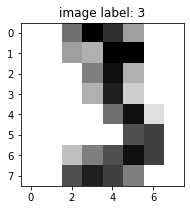

In [25]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

### Preprocessing

- normalization of your input data
- train/test split

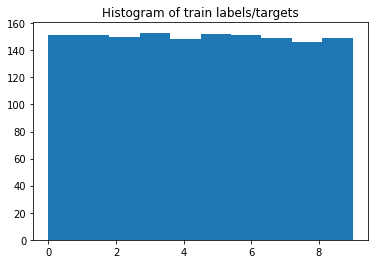

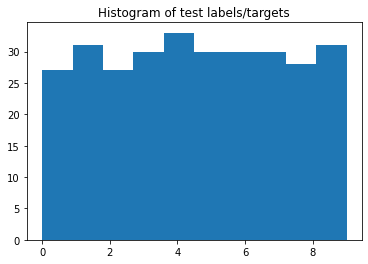

In [26]:
from sklearn import preprocessing
import numpy

#numpy.set_printoptions(threshold=numpy.nan)

####################
import sys
numpy.set_printoptions(threshold=sys.maxsize)

####################

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train = data[0:1500,:]
y_train = target[0:1500]

X_test = data[1500:,:]
y_test = target[1500:]

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()

# print(scaler.mean_)
# print(scaler.scale_)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Check that the train and test targets/labels are balanced within each set
plt.hist(y_train)  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of train labels/targets")
plt.show()

plt.hist(y_test)  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of test labels/targets")
plt.show()


Let's display the one of the transformed sample (after feature standardization):

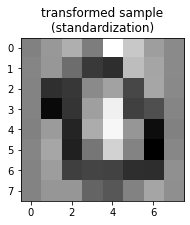

In [27]:
sample_index = 150
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

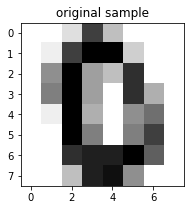

In [28]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1500, 64) (1500,)
(297, 64) (297,)


### TensorFlow is a symbolic graph computation engine, that allows automatic differentiation of each node
- https://www.tensorflow.org 
- https://www.tensorflow.org/tutorials/mnist/tf/

TensorFlow builds where nodes may be:
- **constant:** constants tensors, such as a learning rate
- **Variables:** any tensor, such as parameters of the models
- **Placeholders:** placeholders for inputs and outputs of your models
- many other types of nodes (functions, loss, ...)

The graph is symbolic, no computation is performed until a `Session` is defined and the command `run` or `eval` is invoked. TensorFlow may run this computation on (multiple) CPUs or GPUs

In [30]:
import tensorflow as tf

print(tf. __version__) #1.15

#from tensorflow.python.client import device_lib

#print(device_lib.list_local_devices())

a = tf.constant(3)
b = tf.constant(2)
c = tf.Variable(0)
c = a + b
with tf.Session() as sess:
    print(sess.run(c))

1.15.0
5


In [31]:
X = tf.placeholder("float32", name="input")
Y = X + tf.constant(3.0)
with tf.Session() as sess:
    print(sess.run(Y, feed_dict={X:2}))

5.0


**Note: batches in inputs**
- the first dimension of the input is usually kept for the batch dimension. A typical way to define an input placeholder with a 1D tensor of 128 dimensions, is:
```
X = tf.placeholder("float32", shape=[None, 128])
```

## 1) Build a model using TensorFlow

- Using TensorFlow, build a simple model (one hidden layer)

In [32]:
# helper functions

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def accuracy(y_pred, y=y_test):
    return np.mean(np.argmax(y_pred, axis=1) == y)  #######axis=1

In [10]:
# hyperparams
batch_size = 32
hid_size = 1
learning_rate = 0.01
num_epochs = 10
input_size = X_train.shape[1]
output_size = 10

# input and output
X = tf.placeholder("float32", shape=[None, input_size])
y = tf.placeholder("int32", shape=[None])

# build the model and weights
W_h = init_weights([input_size, hid_size])
b_h = init_weights([hid_size])
W_o = init_weights([hid_size, output_size])
b_o = init_weights([output_size])
h = tf.nn.relu(tf.matmul(X,W_h)+b_h) #tf.nn.tanh, tf.nn.relu, tf.nn.signmoid
out_act = tf.matmul(h, W_o)+b_o

# build the loss, predict, and train operator
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out_act, labels=y)
loss = tf.reduce_sum(cross_entropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

predict = tf.nn.softmax(out_act)

#writer = tf.summary.FileWriter('events_log', sess.graph)

loss_summ = tf.summary.scalar("cross_entropy_loss", loss)
W_h_summ = tf.summary.histogram("weights", W_h)
b_h_summ = tf.summary.histogram("biases", b_h)

#merge all summaries into a single "operation" which we can execute in a session
merged_summary_op = tf.summary.merge_all()

# Initialization of all variables in the graph
init = tf.global_variables_initializer()

### 2) Train your model using SGD algorithm and check the generalization on the test set of your dataset.

epoch: 0 train accuracy: 0.198 test accuracy: 0.172
epoch: 1 train accuracy: 0.275 test accuracy: 0.263
epoch: 2 train accuracy: 0.279 test accuracy: 0.300
epoch: 3 train accuracy: 0.290 test accuracy: 0.320
epoch: 4 train accuracy: 0.294 test accuracy: 0.327
epoch: 5 train accuracy: 0.299 test accuracy: 0.337
epoch: 6 train accuracy: 0.299 test accuracy: 0.333
epoch: 7 train accuracy: 0.305 test accuracy: 0.333
epoch: 8 train accuracy: 0.309 test accuracy: 0.337
epoch: 9 train accuracy: 0.312 test accuracy: 0.340


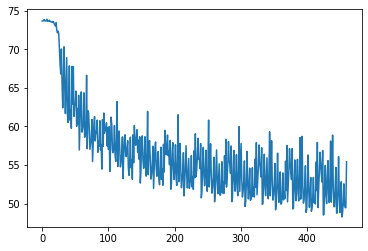

In [12]:
#Init your session, run training
#Render your graph and monitor your training procedure using TensorBoard

#%load_ext tensorboard
#%reload_ext tensorboard

# run training
with tf.Session() as sess: 
    sess.run(init)
    
    # For monitoring purposes
    writer = tf.summary.FileWriter('./events_log', sess.graph)
    #fw = tf.summary.FileWriter('./events_log')
    
    losses = []
    
    for e in range(num_epochs):
        for i in range(X_train.shape[0] // batch_size):
            idx, idxn = i * batch_size, min(X_train.shape[0]-1, (i+1) * batch_size)
            batch_xs, batch_ys = X_train[idx: idxn], y_train[idx: idxn]            
           
            _,l=sess.run([train_op, loss], feed_dict={X: batch_xs, y: batch_ys})
            
             #create a summary object and set its value
            summary = tf.Summary(value=[tf.Summary.Value(tag="cross_entropy_loss", simple_value=l)])
            writer.add_summary(summary, e * X_train.shape[0] // batch_size + i)
            
            losses.append(l)
            
        predicts_test = sess.run(predict, feed_dict={X: X_test})
        predicts_train = sess.run(predict, feed_dict={X: X_train})
        
        summary2 = tf.Summary(value=[tf.Summary.Value(tag="train_accuracy", simple_value=accuracy(predicts_train, y_train))])
        writer.add_summary(summary2,e)

        summary3 = tf.Summary(value=[tf.Summary.Value(tag="test_accuracy", simple_value=accuracy(predicts_test))])
        writer.add_summary(summary3,e)
        
        print("epoch: %d train accuracy: %0.3f test accuracy: %0.3f" % (e, accuracy(predicts_train, y_train), accuracy(predicts_test)))
        
plt.plot(losses);

writer.flush()
writer.close()

#IN CASE YOU MISSED IT 
#TODO: Do not forget to USE TENSORBOARD for graph rendereing + monitoring your training process 

#tensorboard --logdir ./events_log


### 3) In order to maximize the accuracy on the given dataset try different settings for your model

Play around with the structure of your NN model and fine-tune its hyperparameters.

- A. Experiment with different hyperparameters (learning rate = $0.001$,..,$0.1$, batch size = $8$,..,$128$, size of hidden layers = $5$,..,$25$, number of epochs).
- B. Try different activation functions (e.g., ReLU, TanH).
- C. Try to add more hidden layers and increase their size.
- D. Add L2 regularization (e.g., with regularization strength $10^{-4}$)

### Bonus: A + 15% will be distributed to the top-performing models based on the accuracy on the test set (e.g if there are K submissions with equal top performance, each one will get a bonus 15%/K)

In [34]:
#TODO: MAXimize the accuracy on the given dataset try different settings for your model

import random
import itertools

batch_size_list = [32, 64, 128]
hid_size_list = [15, 25, 30, 50]
learning_rate_list = [0.01, 0.025, 0.05, 0.1]
num_epochs_list = [20, 30, 50]
regularization_strength_list = [0.01, 0.001, 0.0001]
input_size = X_train.shape[1]
output_size = 10

X = tf.placeholder("float32", shape=[None, input_size])
y = tf.placeholder("int32", shape=[None])

max_accuracy = 0
best_batch_size = 0
best_hid_size = 0
best_learning_rate = 0
best_num_epochs = 0
best_regularization_strength = 0

def random_params():
    return (
        random.choice(batch_size_list),
        random.choice(hid_size_list),
        random.choice(learning_rate_list),
        random.choice(num_epochs_list),
        random.choice(regularization_strength_list),
    )

#perform random walk on 160 random hyperparameter configurations
params_list = [random_params() for _ in range(160)]

for batch_size, hid_size, learning_rate, num_epochs, regularization_strength in params_list:
    # build the model and weights
    W_h = init_weights([input_size, hid_size])
    b_h = init_weights([hid_size])
    W_o = init_weights([hid_size, output_size])
    b_o = init_weights([output_size])
    h = tf.nn.sigmoid(tf.matmul(X,W_h)+b_h)
    out_act = tf.matmul(h, W_o)+b_o + regularization_strength * tf.nn.l2_loss(W_h) + regularization_strength * tf.nn.l2_loss(W_o)
    
    # build the loss, predict, and train operator
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out_act, labels=y)
    loss = tf.reduce_sum(cross_entropy)

    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(loss)

    predict = tf.nn.softmax(out_act)

    # Initialization of all variables in the graph
    init = tf.global_variables_initializer()
    summary_op = tf.summary.merge_all()
    
    with tf.Session() as sess: 
        sess.run(init)
        losses = []
        for e in range(num_epochs):
            for i in range(X_train.shape[0] // batch_size):
                idx, idxn = i * batch_size, min(X_train.shape[0]-1, (i+1) * batch_size)
                batch_xs, batch_ys = X_train[idx: idxn], y_train[idx: idxn]            
                _, l=sess.run([train_op, loss], feed_dict={X: batch_xs, y: batch_ys})
                losses.append(l)
                predicts_test = sess.run(predict, feed_dict={X: X_test})
                predicts_train = sess.run(predict, feed_dict={X: X_train})
                print("epoch: %d train accuracy: %0.3f test accuracy: %0.3f" % (e, accuracy(predicts_train, y_train), accuracy(predicts_test)))
        if accuracy(predicts_test, y_test) > max_accuracy:
            max_accuracy = accuracy(predicts_test)
            best_batch_size = batch_size
            best_hid_size = hid_size
            best_learning_rate = learning_rate
            best_num_epochs = num_epochs
            best_regularization_strength = regularization_strength
    file_writer = tf.summary.FileWriter('/tmp/tensor', sess.graph)                                                                        

epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.187 test accuracy: 0.178
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.197 test accuracy: 0.175
epoch: 0 train accuracy: 0.163 test accuracy: 0.189
epoch: 0 train accuracy: 0.427 test accuracy: 0.360
epoch: 0 train accuracy: 0.227 test accuracy: 0.209
epoch: 0 train accuracy: 0.438 test accuracy: 0.431
epoch: 0 train accuracy: 0.627 test accuracy: 0.502
epoch: 0 train accuracy: 0.669 test accuracy: 0.613
epoch: 1 train accuracy: 0.644 test accuracy: 0.616
epoch: 1 train accuracy: 0.745 test accuracy: 0.704
epoch: 1 train accuracy: 0.781 test accuracy: 0.690
epoch: 1 train accuracy: 0.763 test accuracy: 0.684
epoch: 1 train accuracy: 0.767 test accuracy: 0.673
epoch: 1 train accuracy: 0.768 test accuracy: 0.684
epoch: 1 train accuracy: 0.846 test accuracy: 0.744
epoch: 1 train accuracy: 0.785 test accuracy: 0.660
epoch: 1 tra

epoch: 19 train accuracy: 0.995 test accuracy: 0.875
epoch: 19 train accuracy: 0.995 test accuracy: 0.879
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.886
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.879
epoch: 19 train accuracy: 0.995 test accuracy: 0.879
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.125 test accuracy: 0.108
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
e

epoch: 5 train accuracy: 0.970 test accuracy: 0.869
epoch: 5 train accuracy: 0.973 test accuracy: 0.872
epoch: 5 train accuracy: 0.976 test accuracy: 0.879
epoch: 5 train accuracy: 0.974 test accuracy: 0.872
epoch: 5 train accuracy: 0.972 test accuracy: 0.879
epoch: 5 train accuracy: 0.971 test accuracy: 0.879
epoch: 5 train accuracy: 0.969 test accuracy: 0.879
epoch: 5 train accuracy: 0.969 test accuracy: 0.872
epoch: 5 train accuracy: 0.973 test accuracy: 0.886
epoch: 5 train accuracy: 0.975 test accuracy: 0.886
epoch: 5 train accuracy: 0.976 test accuracy: 0.892
epoch: 5 train accuracy: 0.975 test accuracy: 0.886
epoch: 5 train accuracy: 0.978 test accuracy: 0.892
epoch: 5 train accuracy: 0.979 test accuracy: 0.886
epoch: 5 train accuracy: 0.978 test accuracy: 0.889
epoch: 5 train accuracy: 0.979 test accuracy: 0.886
epoch: 5 train accuracy: 0.979 test accuracy: 0.882
epoch: 5 train accuracy: 0.980 test accuracy: 0.886
epoch: 5 train accuracy: 0.978 test accuracy: 0.892
epoch: 5 tra

epoch: 9 train accuracy: 0.993 test accuracy: 0.899
epoch: 9 train accuracy: 0.993 test accuracy: 0.896
epoch: 9 train accuracy: 0.993 test accuracy: 0.896
epoch: 9 train accuracy: 0.993 test accuracy: 0.892
epoch: 9 train accuracy: 0.993 test accuracy: 0.896
epoch: 9 train accuracy: 0.993 test accuracy: 0.896
epoch: 9 train accuracy: 0.992 test accuracy: 0.902
epoch: 9 train accuracy: 0.991 test accuracy: 0.899
epoch: 9 train accuracy: 0.991 test accuracy: 0.899
epoch: 9 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 train accuracy: 0.990 test accuracy: 0.896
epoch: 9 train accuracy: 0.990 test accuracy: 0.896
epoch: 9 train accuracy: 0.991 test accuracy: 0.892
epoch: 9 train accuracy: 0.991 test accuracy: 0.896
epoch: 9 train accuracy: 0.991 test accuracy: 0.892
epoch: 9 train accuracy: 0.991 test accuracy: 0.892
epoch: 9 train accuracy: 0.989 test accuracy: 0.896
epoch: 9 train accuracy: 0.988 test accuracy: 0.896
epoch: 9 train accuracy: 0.988 test accuracy: 0.896
epoch: 9 tra

epoch: 13 train accuracy: 0.996 test accuracy: 0.899
epoch: 13 train accuracy: 0.997 test accuracy: 0.899
epoch: 13 train accuracy: 0.997 test accuracy: 0.899
epoch: 13 train accuracy: 0.997 test accuracy: 0.899
epoch: 13 train accuracy: 0.997 test accuracy: 0.896
epoch: 13 train accuracy: 0.997 test accuracy: 0.899
epoch: 13 train accuracy: 0.997 test accuracy: 0.899
epoch: 13 train accuracy: 0.995 test accuracy: 0.896
epoch: 13 train accuracy: 0.995 test accuracy: 0.896
epoch: 13 train accuracy: 0.993 test accuracy: 0.889
epoch: 13 train accuracy: 0.993 test accuracy: 0.892
epoch: 13 train accuracy: 0.993 test accuracy: 0.892
epoch: 13 train accuracy: 0.993 test accuracy: 0.892
epoch: 13 train accuracy: 0.993 test accuracy: 0.892
epoch: 13 train accuracy: 0.993 test accuracy: 0.892
epoch: 13 train accuracy: 0.995 test accuracy: 0.892
epoch: 14 train accuracy: 0.996 test accuracy: 0.892
epoch: 14 train accuracy: 0.996 test accuracy: 0.892
epoch: 14 train accuracy: 0.997 test accuracy:

epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.892
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.892
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.892
epoch: 18 train accuracy: 0.998 test accuracy: 0.896
epoch: 19 train accuracy: 0.998 test accuracy: 0.896
epoch: 19 train accuracy: 0.998 test accuracy: 0.896
epoch: 19 train accuracy: 0.998 test accuracy: 0.899
epoch: 19 train accuracy: 0.998 test accuracy: 0.899
epoch: 19 train accuracy: 0.998 test accuracy: 0.899
epoch: 19 train accuracy: 0.997 test accuracy:

epoch: 22 train accuracy: 0.998 test accuracy: 0.899
epoch: 22 train accuracy: 0.998 test accuracy: 0.896
epoch: 22 train accuracy: 0.998 test accuracy: 0.899
epoch: 22 train accuracy: 0.999 test accuracy: 0.899
epoch: 23 train accuracy: 0.999 test accuracy: 0.899
epoch: 23 train accuracy: 0.999 test accuracy: 0.899
epoch: 23 train accuracy: 0.999 test accuracy: 0.899
epoch: 23 train accuracy: 0.999 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.999 test accuracy: 0.899
epoch: 23 train accuracy: 0.999 test accuracy: 0.899
epoch: 23 train accuracy: 0.999 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy:

epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.899
epoch: 27 train accuracy: 0.999 test accuracy: 0.899
epoch: 27 train accuracy: 0.999 test accuracy: 0.899
epoch: 27 train accuracy: 0.999 test accuracy: 0.899
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.896
epoch: 27 train accuracy: 0.999 test accuracy: 0.896
epoch: 27 train accuracy: 0.999 test accuracy: 0.896
epoch: 27 train accuracy: 0.999 test accuracy: 0.896
epoch: 27 train accuracy: 0.999 test accuracy: 0.896
epoch: 27 train accuracy: 0.999 test accuracy:

epoch: 31 train accuracy: 0.999 test accuracy: 0.899
epoch: 31 train accuracy: 0.999 test accuracy: 0.899
epoch: 31 train accuracy: 0.999 test accuracy: 0.899
epoch: 31 train accuracy: 0.999 test accuracy: 0.899
epoch: 31 train accuracy: 0.999 test accuracy: 0.899
epoch: 31 train accuracy: 0.999 test accuracy: 0.899
epoch: 31 train accuracy: 0.999 test accuracy: 0.902
epoch: 31 train accuracy: 0.999 test accuracy: 0.899
epoch: 31 train accuracy: 0.999 test accuracy: 0.902
epoch: 31 train accuracy: 0.998 test accuracy: 0.899
epoch: 31 train accuracy: 0.998 test accuracy: 0.902
epoch: 31 train accuracy: 0.998 test accuracy: 0.902
epoch: 31 train accuracy: 0.998 test accuracy: 0.902
epoch: 31 train accuracy: 0.998 test accuracy: 0.902
epoch: 31 train accuracy: 0.998 test accuracy: 0.902
epoch: 31 train accuracy: 0.998 test accuracy: 0.902
epoch: 31 train accuracy: 0.998 test accuracy: 0.902
epoch: 31 train accuracy: 0.998 test accuracy: 0.902
epoch: 31 train accuracy: 0.998 test accuracy:

epoch: 35 train accuracy: 0.999 test accuracy: 0.896
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.896
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy:

epoch: 40 train accuracy: 0.999 test accuracy: 0.896
epoch: 40 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy:

epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.899
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy:

epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy:

epoch: 4 train accuracy: 0.987 test accuracy: 0.923
epoch: 4 train accuracy: 0.980 test accuracy: 0.912
epoch: 4 train accuracy: 0.981 test accuracy: 0.916
epoch: 4 train accuracy: 0.981 test accuracy: 0.912
epoch: 4 train accuracy: 0.987 test accuracy: 0.916
epoch: 4 train accuracy: 0.987 test accuracy: 0.909
epoch: 4 train accuracy: 0.985 test accuracy: 0.912
epoch: 4 train accuracy: 0.985 test accuracy: 0.909
epoch: 4 train accuracy: 0.985 test accuracy: 0.899
epoch: 4 train accuracy: 0.987 test accuracy: 0.896
epoch: 4 train accuracy: 0.987 test accuracy: 0.899
epoch: 4 train accuracy: 0.987 test accuracy: 0.899
epoch: 4 train accuracy: 0.987 test accuracy: 0.902
epoch: 4 train accuracy: 0.987 test accuracy: 0.902
epoch: 4 train accuracy: 0.987 test accuracy: 0.902
epoch: 4 train accuracy: 0.989 test accuracy: 0.892
epoch: 4 train accuracy: 0.989 test accuracy: 0.892
epoch: 4 train accuracy: 0.987 test accuracy: 0.896
epoch: 4 train accuracy: 0.987 test accuracy: 0.892
epoch: 4 tra

epoch: 8 train accuracy: 0.999 test accuracy: 0.926
epoch: 8 train accuracy: 0.999 test accuracy: 0.926
epoch: 8 train accuracy: 0.998 test accuracy: 0.919
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.998 test accuracy: 0.906
epoch: 8 train accuracy: 0.998 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 tra

epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.902
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy:

epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy:

epoch: 15 train accuracy: 0.985 test accuracy: 0.896
epoch: 15 train accuracy: 0.983 test accuracy: 0.892
epoch: 15 train accuracy: 0.985 test accuracy: 0.892
epoch: 16 train accuracy: 0.983 test accuracy: 0.892
epoch: 16 train accuracy: 0.983 test accuracy: 0.896
epoch: 16 train accuracy: 0.983 test accuracy: 0.892
epoch: 16 train accuracy: 0.985 test accuracy: 0.892
epoch: 16 train accuracy: 0.984 test accuracy: 0.892
epoch: 16 train accuracy: 0.985 test accuracy: 0.896
epoch: 16 train accuracy: 0.985 test accuracy: 0.896
epoch: 16 train accuracy: 0.985 test accuracy: 0.892
epoch: 16 train accuracy: 0.985 test accuracy: 0.896
epoch: 16 train accuracy: 0.985 test accuracy: 0.892
epoch: 16 train accuracy: 0.985 test accuracy: 0.892
epoch: 17 train accuracy: 0.984 test accuracy: 0.892
epoch: 17 train accuracy: 0.985 test accuracy: 0.896
epoch: 17 train accuracy: 0.985 test accuracy: 0.892
epoch: 17 train accuracy: 0.986 test accuracy: 0.892
epoch: 17 train accuracy: 0.985 test accuracy:

epoch: 4 train accuracy: 0.931 test accuracy: 0.835
epoch: 5 train accuracy: 0.935 test accuracy: 0.832
epoch: 5 train accuracy: 0.937 test accuracy: 0.842
epoch: 5 train accuracy: 0.936 test accuracy: 0.825
epoch: 5 train accuracy: 0.942 test accuracy: 0.845
epoch: 5 train accuracy: 0.943 test accuracy: 0.852
epoch: 5 train accuracy: 0.940 test accuracy: 0.852
epoch: 5 train accuracy: 0.935 test accuracy: 0.852
epoch: 5 train accuracy: 0.936 test accuracy: 0.842
epoch: 5 train accuracy: 0.935 test accuracy: 0.842
epoch: 5 train accuracy: 0.939 test accuracy: 0.848
epoch: 5 train accuracy: 0.931 test accuracy: 0.855
epoch: 5 train accuracy: 0.937 test accuracy: 0.859
epoch: 5 train accuracy: 0.937 test accuracy: 0.855
epoch: 5 train accuracy: 0.939 test accuracy: 0.855
epoch: 5 train accuracy: 0.935 test accuracy: 0.852
epoch: 5 train accuracy: 0.935 test accuracy: 0.855
epoch: 5 train accuracy: 0.935 test accuracy: 0.855
epoch: 5 train accuracy: 0.936 test accuracy: 0.859
epoch: 5 tra

epoch: 9 train accuracy: 0.969 test accuracy: 0.899
epoch: 9 train accuracy: 0.973 test accuracy: 0.899
epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.970 test accuracy: 0.892
epoch: 9 train accuracy: 0.971 test accuracy: 0.892
epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.973 test accuracy: 0.889
epoch: 9 train accuracy: 0.972 test accuracy: 0.889
epoch: 9 train accuracy: 0.971 test accuracy: 0.889
epoch: 9 train accuracy: 0.971 test accuracy: 0.889
epoch: 9 train accuracy: 0.969 test accuracy: 0.882
epoch: 9 train accuracy: 0.969 test accuracy: 0.889
epoch: 9 train accuracy: 0.971 test accuracy: 0.889
epoch: 9 train accuracy: 0.970 test accuracy: 0.889
epoch: 9 train accuracy: 0.969 test accuracy: 0.889
epoch: 9 train accuracy: 0.970 test accuracy: 0.886
epoch: 9 train accuracy: 0.969 test accuracy: 0.875
epoch: 9 train accuracy: 0.970 test accuracy: 0.872
epoch: 9 train accuracy: 0.969 test accuracy: 0.865
epoch: 9 tra

epoch: 13 train accuracy: 0.983 test accuracy: 0.896
epoch: 13 train accuracy: 0.983 test accuracy: 0.896
epoch: 13 train accuracy: 0.983 test accuracy: 0.899
epoch: 13 train accuracy: 0.983 test accuracy: 0.899
epoch: 13 train accuracy: 0.981 test accuracy: 0.899
epoch: 13 train accuracy: 0.982 test accuracy: 0.899
epoch: 13 train accuracy: 0.983 test accuracy: 0.899
epoch: 13 train accuracy: 0.983 test accuracy: 0.899
epoch: 13 train accuracy: 0.983 test accuracy: 0.896
epoch: 13 train accuracy: 0.983 test accuracy: 0.896
epoch: 13 train accuracy: 0.984 test accuracy: 0.896
epoch: 13 train accuracy: 0.983 test accuracy: 0.896
epoch: 13 train accuracy: 0.983 test accuracy: 0.896
epoch: 13 train accuracy: 0.984 test accuracy: 0.896
epoch: 13 train accuracy: 0.983 test accuracy: 0.896
epoch: 13 train accuracy: 0.983 test accuracy: 0.896
epoch: 13 train accuracy: 0.983 test accuracy: 0.896
epoch: 13 train accuracy: 0.983 test accuracy: 0.896
epoch: 13 train accuracy: 0.983 test accuracy:

epoch: 17 train accuracy: 0.989 test accuracy: 0.899
epoch: 17 train accuracy: 0.989 test accuracy: 0.899
epoch: 17 train accuracy: 0.989 test accuracy: 0.899
epoch: 17 train accuracy: 0.990 test accuracy: 0.899
epoch: 17 train accuracy: 0.991 test accuracy: 0.899
epoch: 17 train accuracy: 0.991 test accuracy: 0.899
epoch: 17 train accuracy: 0.991 test accuracy: 0.899
epoch: 17 train accuracy: 0.990 test accuracy: 0.899
epoch: 17 train accuracy: 0.990 test accuracy: 0.896
epoch: 17 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.990 test accuracy: 0.899
epoch: 18 train accuracy: 0.990 test accuracy: 0.902
epoch: 18 train accuracy: 0.990 test accuracy: 0.899
epoch: 18 train accuracy: 0.990 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.990 test accuracy:

epoch: 22 train accuracy: 0.992 test accuracy: 0.902
epoch: 22 train accuracy: 0.991 test accuracy: 0.902
epoch: 22 train accuracy: 0.992 test accuracy: 0.902
epoch: 22 train accuracy: 0.992 test accuracy: 0.902
epoch: 22 train accuracy: 0.992 test accuracy: 0.902
epoch: 22 train accuracy: 0.992 test accuracy: 0.902
epoch: 22 train accuracy: 0.992 test accuracy: 0.902
epoch: 22 train accuracy: 0.992 test accuracy: 0.902
epoch: 22 train accuracy: 0.992 test accuracy: 0.902
epoch: 22 train accuracy: 0.992 test accuracy: 0.902
epoch: 22 train accuracy: 0.992 test accuracy: 0.902
epoch: 22 train accuracy: 0.992 test accuracy: 0.906
epoch: 22 train accuracy: 0.992 test accuracy: 0.906
epoch: 22 train accuracy: 0.993 test accuracy: 0.909
epoch: 22 train accuracy: 0.993 test accuracy: 0.909
epoch: 22 train accuracy: 0.993 test accuracy: 0.909
epoch: 22 train accuracy: 0.993 test accuracy: 0.906
epoch: 22 train accuracy: 0.993 test accuracy: 0.906
epoch: 22 train accuracy: 0.993 test accuracy:

epoch: 26 train accuracy: 0.994 test accuracy: 0.909
epoch: 26 train accuracy: 0.994 test accuracy: 0.912
epoch: 26 train accuracy: 0.993 test accuracy: 0.912
epoch: 26 train accuracy: 0.993 test accuracy: 0.912
epoch: 26 train accuracy: 0.993 test accuracy: 0.912
epoch: 26 train accuracy: 0.993 test accuracy: 0.912
epoch: 26 train accuracy: 0.994 test accuracy: 0.909
epoch: 26 train accuracy: 0.994 test accuracy: 0.909
epoch: 26 train accuracy: 0.995 test accuracy: 0.909
epoch: 26 train accuracy: 0.994 test accuracy: 0.909
epoch: 26 train accuracy: 0.994 test accuracy: 0.909
epoch: 26 train accuracy: 0.994 test accuracy: 0.912
epoch: 26 train accuracy: 0.994 test accuracy: 0.909
epoch: 26 train accuracy: 0.994 test accuracy: 0.909
epoch: 26 train accuracy: 0.994 test accuracy: 0.909
epoch: 26 train accuracy: 0.994 test accuracy: 0.909
epoch: 26 train accuracy: 0.994 test accuracy: 0.909
epoch: 26 train accuracy: 0.994 test accuracy: 0.909
epoch: 26 train accuracy: 0.994 test accuracy:

epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.103 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.216 test accuracy: 0.212
epoch: 0 train accuracy: 0.363 test accuracy: 0.303
epoch: 0 train accuracy: 0.177 test accuracy: 0.175
epoch: 0 train accuracy: 0.270 test accuracy: 0.215
epoch: 0 train accuracy: 0.324 test accuracy: 0.320
epoch: 0 train accuracy: 0.433 test accuracy: 0.421
epoch: 0 train accuracy: 0.459 test accuracy: 0.475
epoch: 0 train accuracy: 0.577 test accuracy: 0.620
epoch: 0 train accuracy: 0.601 test accuracy: 0.556
epoch: 0 train accuracy: 0.670 test accuracy: 0.630
epoch: 0 train accuracy: 0.729 test accuracy: 0.650
epoch: 0 train accuracy: 0.761 test accuracy: 0.663
epoch: 0 train accuracy: 0.697 test accuracy: 0.609
epoch: 0 train accuracy: 0.714 test accuracy: 0.650
epoch: 0 tra

epoch: 8 train accuracy: 0.997 test accuracy: 0.896
epoch: 8 train accuracy: 0.997 test accuracy: 0.896
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.998 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.906
epoch: 9 train accuracy: 0.997 test accuracy: 0.906
epoch: 9 train accuracy: 0.997 test accuracy: 0.912
epoch: 9 train accuracy: 0.998 test accuracy: 0.912
epoch: 9 train accuracy: 0.997 test accuracy: 0.906
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.998 test accuracy: 0.909
epoch: 9 train accuracy: 0.999 test accuracy: 0.906
epoch: 9 train accuracy: 0.999 test accuracy: 0.906
epoch: 9 train accuracy: 0.998 test accuracy: 0.906
epoch: 9 train accuracy: 0.998 test accuracy: 0.906
epoch: 9 train accuracy: 0.998 test accuracy: 0.902
epoch: 9 train accuracy: 0.998 test accuracy: 0.902
epoch: 9 train accuracy: 0.998 test accuracy: 0.902
epoch: 9 train accuracy: 0.998 test accuracy: 0.902
epoch: 9 tra

epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.899
epoch: 17 train accuracy: 0.999 test accuracy: 0.899
epoch: 17 train accuracy: 0.999 test accuracy: 0.899
epoch: 17 train accuracy: 0.999 test accuracy: 0.899
epoch: 18 train accuracy: 0.999 test accuracy: 0.899
epoch: 18 train accuracy: 0.999 test accuracy: 0.899
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 4 train accuracy: 0.989 test accuracy: 0.892
epoch: 4 train accuracy: 0.989 test accuracy: 0.896
epoch: 4 train accuracy: 0.990 test accuracy: 0.889
epoch: 4 train accuracy: 0.989 test accuracy: 0.889
epoch: 4 train accuracy: 0.989 test accuracy: 0.886
epoch: 4 train accuracy: 0.989 test accuracy: 0.886
epoch: 4 train accuracy: 0.989 test accuracy: 0.886
epoch: 4 train accuracy: 0.991 test accuracy: 0.889
epoch: 4 train accuracy: 0.992 test accuracy: 0.889
epoch: 4 train accuracy: 0.992 test accuracy: 0.896
epoch: 4 train accuracy: 0.991 test accuracy: 0.896
epoch: 4 train accuracy: 0.993 test accuracy: 0.896
epoch: 4 train accuracy: 0.984 test accuracy: 0.886
epoch: 5 train accuracy: 0.986 test accuracy: 0.902
epoch: 5 train accuracy: 0.989 test accuracy: 0.902
epoch: 5 train accuracy: 0.991 test accuracy: 0.906
epoch: 5 train accuracy: 0.990 test accuracy: 0.902
epoch: 5 train accuracy: 0.986 test accuracy: 0.889
epoch: 5 train accuracy: 0.988 test accuracy: 0.889
epoch: 5 tra

epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.999 test accuracy: 0.906
epoch: 11 train accuracy: 0.999 test accuracy: 0.902
epoch: 12 train accuracy: 0.999 test accuracy: 0.902
epoch: 12 train accuracy: 0.999 test accuracy: 0.902
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy:

epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.998 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy:

epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy:

epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy:

epoch: 9 train accuracy: 0.994 test accuracy: 0.912
epoch: 9 train accuracy: 0.994 test accuracy: 0.912
epoch: 9 train accuracy: 0.994 test accuracy: 0.909
epoch: 9 train accuracy: 0.994 test accuracy: 0.909
epoch: 9 train accuracy: 0.994 test accuracy: 0.906
epoch: 9 train accuracy: 0.994 test accuracy: 0.906
epoch: 9 train accuracy: 0.994 test accuracy: 0.906
epoch: 9 train accuracy: 0.995 test accuracy: 0.909
epoch: 10 train accuracy: 0.995 test accuracy: 0.909
epoch: 10 train accuracy: 0.994 test accuracy: 0.906
epoch: 10 train accuracy: 0.995 test accuracy: 0.909
epoch: 10 train accuracy: 0.995 test accuracy: 0.909
epoch: 10 train accuracy: 0.995 test accuracy: 0.906
epoch: 10 train accuracy: 0.995 test accuracy: 0.906
epoch: 10 train accuracy: 0.995 test accuracy: 0.906
epoch: 10 train accuracy: 0.995 test accuracy: 0.906
epoch: 10 train accuracy: 0.995 test accuracy: 0.906
epoch: 10 train accuracy: 0.994 test accuracy: 0.906
epoch: 10 train accuracy: 0.994 test accuracy: 0.906
e

epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy:

epoch: 10 train accuracy: 0.991 test accuracy: 0.896
epoch: 10 train accuracy: 0.993 test accuracy: 0.896
epoch: 10 train accuracy: 0.993 test accuracy: 0.902
epoch: 10 train accuracy: 0.993 test accuracy: 0.899
epoch: 10 train accuracy: 0.993 test accuracy: 0.896
epoch: 10 train accuracy: 0.994 test accuracy: 0.896
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.896
epoch: 11 train accuracy: 0.992 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.896
epoch: 11 train accuracy: 0.993 test accuracy: 0.896
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.994 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.993 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 12 train accuracy: 0.995 test accuracy: 0.899
epoch: 12 train accuracy: 0.995 test accuracy:

epoch: 27 train accuracy: 0.997 test accuracy: 0.902
epoch: 27 train accuracy: 0.997 test accuracy: 0.902
epoch: 27 train accuracy: 0.997 test accuracy: 0.902
epoch: 27 train accuracy: 0.997 test accuracy: 0.902
epoch: 27 train accuracy: 0.997 test accuracy: 0.902
epoch: 27 train accuracy: 0.997 test accuracy: 0.902
epoch: 27 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 29 train accuracy: 0.997 test accuracy:

epoch: 42 train accuracy: 0.997 test accuracy: 0.902
epoch: 42 train accuracy: 0.997 test accuracy: 0.902
epoch: 42 train accuracy: 0.997 test accuracy: 0.902
epoch: 43 train accuracy: 0.997 test accuracy: 0.902
epoch: 43 train accuracy: 0.997 test accuracy: 0.902
epoch: 43 train accuracy: 0.997 test accuracy: 0.902
epoch: 43 train accuracy: 0.997 test accuracy: 0.902
epoch: 43 train accuracy: 0.997 test accuracy: 0.902
epoch: 43 train accuracy: 0.997 test accuracy: 0.902
epoch: 43 train accuracy: 0.997 test accuracy: 0.902
epoch: 43 train accuracy: 0.997 test accuracy: 0.902
epoch: 43 train accuracy: 0.997 test accuracy: 0.902
epoch: 43 train accuracy: 0.997 test accuracy: 0.902
epoch: 43 train accuracy: 0.997 test accuracy: 0.902
epoch: 44 train accuracy: 0.997 test accuracy: 0.902
epoch: 44 train accuracy: 0.997 test accuracy: 0.902
epoch: 44 train accuracy: 0.997 test accuracy: 0.902
epoch: 44 train accuracy: 0.997 test accuracy: 0.902
epoch: 44 train accuracy: 0.997 test accuracy:

epoch: 17 train accuracy: 0.983 test accuracy: 0.882
epoch: 17 train accuracy: 0.985 test accuracy: 0.879
epoch: 17 train accuracy: 0.986 test accuracy: 0.886
epoch: 17 train accuracy: 0.986 test accuracy: 0.886
epoch: 18 train accuracy: 0.985 test accuracy: 0.879
epoch: 18 train accuracy: 0.987 test accuracy: 0.882
epoch: 18 train accuracy: 0.985 test accuracy: 0.882
epoch: 18 train accuracy: 0.986 test accuracy: 0.882
epoch: 18 train accuracy: 0.986 test accuracy: 0.882
epoch: 18 train accuracy: 0.983 test accuracy: 0.882
epoch: 18 train accuracy: 0.985 test accuracy: 0.879
epoch: 18 train accuracy: 0.984 test accuracy: 0.882
epoch: 18 train accuracy: 0.985 test accuracy: 0.879
epoch: 18 train accuracy: 0.986 test accuracy: 0.886
epoch: 18 train accuracy: 0.987 test accuracy: 0.886
epoch: 19 train accuracy: 0.987 test accuracy: 0.879
epoch: 19 train accuracy: 0.988 test accuracy: 0.882
epoch: 19 train accuracy: 0.985 test accuracy: 0.882
epoch: 19 train accuracy: 0.987 test accuracy:

epoch: 4 train accuracy: 0.995 test accuracy: 0.916
epoch: 4 train accuracy: 0.993 test accuracy: 0.916
epoch: 4 train accuracy: 0.995 test accuracy: 0.916
epoch: 4 train accuracy: 0.996 test accuracy: 0.916
epoch: 4 train accuracy: 0.993 test accuracy: 0.906
epoch: 4 train accuracy: 0.993 test accuracy: 0.906
epoch: 4 train accuracy: 0.991 test accuracy: 0.902
epoch: 4 train accuracy: 0.991 test accuracy: 0.902
epoch: 4 train accuracy: 0.991 test accuracy: 0.909
epoch: 4 train accuracy: 0.989 test accuracy: 0.909
epoch: 4 train accuracy: 0.990 test accuracy: 0.906
epoch: 4 train accuracy: 0.990 test accuracy: 0.906
epoch: 4 train accuracy: 0.991 test accuracy: 0.906
epoch: 4 train accuracy: 0.991 test accuracy: 0.906
epoch: 4 train accuracy: 0.991 test accuracy: 0.906
epoch: 4 train accuracy: 0.992 test accuracy: 0.902
epoch: 4 train accuracy: 0.992 test accuracy: 0.902
epoch: 4 train accuracy: 0.991 test accuracy: 0.909
epoch: 4 train accuracy: 0.992 test accuracy: 0.909
epoch: 4 tra

epoch: 11 train accuracy: 0.999 test accuracy: 0.923
epoch: 11 train accuracy: 0.999 test accuracy: 0.923
epoch: 11 train accuracy: 0.999 test accuracy: 0.923
epoch: 11 train accuracy: 0.999 test accuracy: 0.923
epoch: 11 train accuracy: 0.999 test accuracy: 0.926
epoch: 11 train accuracy: 0.999 test accuracy: 0.923
epoch: 11 train accuracy: 0.999 test accuracy: 0.923
epoch: 11 train accuracy: 0.999 test accuracy: 0.923
epoch: 11 train accuracy: 0.999 test accuracy: 0.923
epoch: 11 train accuracy: 0.999 test accuracy: 0.923
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.923
epoch: 11 train accuracy: 0.999 test accuracy: 0.923
epoch: 11 train accuracy: 0.999 test accuracy: 0.923
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy:

epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.919
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.919
epoch: 17 train accuracy: 0.999 test accuracy: 0.919
epoch: 17 train accuracy: 0.999 test accuracy: 0.919
epoch: 17 train accuracy: 0.999 test accuracy: 0.919
epoch: 17 train accuracy: 0.999 test accuracy: 0.919
epoch: 17 train accuracy: 0.999 test accuracy: 0.919
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 18 train accuracy: 0.999 test accuracy: 0.923
epoch: 18 train accuracy: 0.999 test accuracy: 0.923
epoch: 18 train accuracy: 0.999 test accuracy: 0.923
epoch: 18 train accuracy: 0.999 test accuracy: 0.923
epoch: 18 train accuracy: 0.999 test accuracy: 0.923
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 9 train accuracy: 0.999 test accuracy: 0.879
epoch: 9 train accuracy: 0.999 test accuracy: 0.879
epoch: 9 train accuracy: 0.999 test accuracy: 0.869
epoch: 9 train accuracy: 0.999 test accuracy: 0.869
epoch: 9 train accuracy: 0.999 test accuracy: 0.869
epoch: 9 train accuracy: 0.999 test accuracy: 0.875
epoch: 9 train accuracy: 0.999 test accuracy: 0.869
epoch: 9 train accuracy: 0.999 test accuracy: 0.869
epoch: 9 train accuracy: 0.999 test accuracy: 0.869
epoch: 9 train accuracy: 0.999 test accuracy: 0.869
epoch: 9 train accuracy: 0.999 test accuracy: 0.872
epoch: 10 train accuracy: 0.999 test accuracy: 0.872
epoch: 10 train accuracy: 0.999 test accuracy: 0.875
epoch: 10 train accuracy: 0.999 test accuracy: 0.872
epoch: 10 train accuracy: 0.999 test accuracy: 0.875
epoch: 10 train accuracy: 0.999 test accuracy: 0.875
epoch: 10 train accuracy: 0.999 test accuracy: 0.875
epoch: 10 train accuracy: 0.999 test accuracy: 0.872
epoch: 10 train accuracy: 0.999 test accuracy: 0.875
epoc

epoch: 17 train accuracy: 0.999 test accuracy: 0.872
epoch: 17 train accuracy: 0.999 test accuracy: 0.872
epoch: 17 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy: 0.872
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy: 0.872
epoch: 26 train accuracy: 0.999 test accuracy:

epoch: 15 train accuracy: 0.996 test accuracy: 0.886
epoch: 15 train accuracy: 0.996 test accuracy: 0.886
epoch: 15 train accuracy: 0.995 test accuracy: 0.886
epoch: 15 train accuracy: 0.995 test accuracy: 0.886
epoch: 15 train accuracy: 0.995 test accuracy: 0.886
epoch: 15 train accuracy: 0.995 test accuracy: 0.886
epoch: 15 train accuracy: 0.995 test accuracy: 0.886
epoch: 15 train accuracy: 0.996 test accuracy: 0.886
epoch: 16 train accuracy: 0.995 test accuracy: 0.889
epoch: 16 train accuracy: 0.997 test accuracy: 0.889
epoch: 16 train accuracy: 0.996 test accuracy: 0.889
epoch: 16 train accuracy: 0.996 test accuracy: 0.886
epoch: 16 train accuracy: 0.996 test accuracy: 0.886
epoch: 16 train accuracy: 0.995 test accuracy: 0.886
epoch: 16 train accuracy: 0.995 test accuracy: 0.886
epoch: 16 train accuracy: 0.995 test accuracy: 0.886
epoch: 16 train accuracy: 0.995 test accuracy: 0.886
epoch: 16 train accuracy: 0.995 test accuracy: 0.886
epoch: 16 train accuracy: 0.996 test accuracy:

epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.233 test accuracy: 0.242
epoch: 0 train accuracy: 0.309 test accuracy: 0.259
epoch: 0 train accuracy: 0.171 test accuracy: 0.178
epoch: 0 train accuracy: 0.295 test accuracy: 0.286
epoch: 0 train accuracy: 0.363 test accuracy: 0.360
epoch: 0 train accuracy: 0.448 test accuracy: 0.448
epoch: 0 train accuracy: 0.386 test accuracy: 0.414
epoch: 0 train accuracy: 0.590 test accuracy: 0.579
epoch: 0 train accuracy: 0.621 test accuracy: 0.596
epoch: 0 train accuracy: 0.619 test accuracy: 0.556
epoch: 0 train accuracy: 0.695 test accuracy: 0.623
epoch: 0 train accuracy: 0.733 test accuracy: 0.650
epoch: 0 train accuracy: 0.707 test accuracy: 0.640
epoch: 0 train accuracy: 0.703 test accuracy: 0.650
epoch: 0 tra

epoch: 9 train accuracy: 0.997 test accuracy: 0.919
epoch: 9 train accuracy: 0.997 test accuracy: 0.919
epoch: 9 train accuracy: 0.998 test accuracy: 0.919
epoch: 9 train accuracy: 0.998 test accuracy: 0.919
epoch: 9 train accuracy: 0.998 test accuracy: 0.919
epoch: 9 train accuracy: 0.998 test accuracy: 0.912
epoch: 9 train accuracy: 0.998 test accuracy: 0.912
epoch: 9 train accuracy: 0.997 test accuracy: 0.916
epoch: 9 train accuracy: 0.997 test accuracy: 0.919
epoch: 9 train accuracy: 0.998 test accuracy: 0.912
epoch: 9 train accuracy: 0.997 test accuracy: 0.912
epoch: 9 train accuracy: 0.997 test accuracy: 0.916
epoch: 9 train accuracy: 0.997 test accuracy: 0.916
epoch: 9 train accuracy: 0.997 test accuracy: 0.916
epoch: 9 train accuracy: 0.997 test accuracy: 0.916
epoch: 9 train accuracy: 0.997 test accuracy: 0.919
epoch: 9 train accuracy: 0.997 test accuracy: 0.912
epoch: 9 train accuracy: 0.997 test accuracy: 0.912
epoch: 9 train accuracy: 0.997 test accuracy: 0.912
epoch: 9 tra

epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.926
epoch: 22 train accuracy: 0.999 test accuracy: 0.923
epoch: 22 train accuracy: 0.999 test accuracy: 0.923
epoch: 22 train accuracy: 0.999 test accuracy: 0.923
epoch: 22 train accuracy: 0.999 test accuracy: 0.923
epoch: 22 train accuracy: 0.999 test accuracy:

epoch: 29 train accuracy: 0.999 test accuracy: 0.923
epoch: 29 train accuracy: 0.999 test accuracy: 0.926
epoch: 29 train accuracy: 0.999 test accuracy: 0.926
epoch: 29 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy: 0.926
epoch: 30 train accuracy: 0.999 test accuracy:

epoch: 37 train accuracy: 0.999 test accuracy: 0.926
epoch: 37 train accuracy: 0.999 test accuracy: 0.923
epoch: 37 train accuracy: 0.999 test accuracy: 0.926
epoch: 37 train accuracy: 0.999 test accuracy: 0.923
epoch: 38 train accuracy: 0.999 test accuracy: 0.923
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy: 0.926
epoch: 38 train accuracy: 0.999 test accuracy:

epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.923
epoch: 46 train accuracy: 0.999 test accuracy: 0.923
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy:

epoch: 19 train accuracy: 0.996 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.996 test accuracy: 0.882
epoch: 19 train accuracy: 0.996 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.886
epoch: 19 train accuracy: 0.995 test accuracy: 0.886
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.879
epoch: 20 train accuracy: 0.995 test accuracy: 0.886
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.996 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.886
epoch: 20 train accuracy: 0.995 test accuracy: 0.886
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy:

epoch: 4 train accuracy: 0.992 test accuracy: 0.909
epoch: 4 train accuracy: 0.993 test accuracy: 0.906
epoch: 4 train accuracy: 0.992 test accuracy: 0.912
epoch: 4 train accuracy: 0.993 test accuracy: 0.912
epoch: 4 train accuracy: 0.992 test accuracy: 0.912
epoch: 5 train accuracy: 0.992 test accuracy: 0.906
epoch: 5 train accuracy: 0.993 test accuracy: 0.909
epoch: 5 train accuracy: 0.993 test accuracy: 0.909
epoch: 5 train accuracy: 0.994 test accuracy: 0.912
epoch: 5 train accuracy: 0.993 test accuracy: 0.909
epoch: 5 train accuracy: 0.991 test accuracy: 0.906
epoch: 5 train accuracy: 0.993 test accuracy: 0.912
epoch: 5 train accuracy: 0.993 test accuracy: 0.916
epoch: 5 train accuracy: 0.993 test accuracy: 0.919
epoch: 5 train accuracy: 0.993 test accuracy: 0.919
epoch: 5 train accuracy: 0.994 test accuracy: 0.916
epoch: 5 train accuracy: 0.993 test accuracy: 0.919
epoch: 5 train accuracy: 0.993 test accuracy: 0.919
epoch: 5 train accuracy: 0.994 test accuracy: 0.919
epoch: 5 tra

epoch: 8 train accuracy: 0.998 test accuracy: 0.919
epoch: 8 train accuracy: 0.998 test accuracy: 0.919
epoch: 8 train accuracy: 0.998 test accuracy: 0.919
epoch: 8 train accuracy: 0.998 test accuracy: 0.919
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.916
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 tra

epoch: 12 train accuracy: 0.999 test accuracy: 0.919
epoch: 12 train accuracy: 0.999 test accuracy: 0.919
epoch: 12 train accuracy: 0.999 test accuracy: 0.919
epoch: 12 train accuracy: 0.999 test accuracy: 0.919
epoch: 12 train accuracy: 0.999 test accuracy: 0.919
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy:

epoch: 16 train accuracy: 0.999 test accuracy: 0.919
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy:

epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy:

epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.919
epoch: 24 train accuracy: 0.999 test accuracy: 0.919
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.919
epoch: 24 train accuracy: 0.999 test accuracy: 0.919
epoch: 24 train accuracy: 0.999 test accuracy: 0.919
epoch: 24 train accuracy: 0.999 test accuracy: 0.919
epoch: 24 train accuracy: 0.999 test accuracy: 0.919
epoch: 24 train accuracy: 0.999 test accuracy: 0.919
epoch: 24 train accuracy: 0.999 test accuracy: 0.919
epoch: 24 train accuracy: 0.999 test accuracy: 0.919
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy:

epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.919
epoch: 28 train accuracy: 0.999 test accuracy: 0.916
epoch: 28 train accuracy: 0.999 test accuracy: 0.916
epoch: 28 train accuracy: 0.999 test accuracy: 0.919
epoch: 28 train accuracy: 0.999 test accuracy: 0.919
epoch: 28 train accuracy: 0.999 test accuracy: 0.919
epoch: 28 train accuracy: 0.999 test accuracy:

epoch: 19 train accuracy: 0.994 test accuracy: 0.896
epoch: 19 train accuracy: 0.995 test accuracy: 0.892
epoch: 19 train accuracy: 0.995 test accuracy: 0.896
epoch: 19 train accuracy: 0.995 test accuracy: 0.889
epoch: 19 train accuracy: 0.995 test accuracy: 0.889
epoch: 19 train accuracy: 0.993 test accuracy: 0.896
epoch: 19 train accuracy: 0.993 test accuracy: 0.892
epoch: 19 train accuracy: 0.993 test accuracy: 0.892
epoch: 19 train accuracy: 0.993 test accuracy: 0.892
epoch: 19 train accuracy: 0.993 test accuracy: 0.892
epoch: 19 train accuracy: 0.993 test accuracy: 0.896
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
e

epoch: 8 train accuracy: 0.973 test accuracy: 0.882
epoch: 8 train accuracy: 0.973 test accuracy: 0.882
epoch: 8 train accuracy: 0.971 test accuracy: 0.882
epoch: 8 train accuracy: 0.969 test accuracy: 0.875
epoch: 8 train accuracy: 0.969 test accuracy: 0.875
epoch: 8 train accuracy: 0.970 test accuracy: 0.875
epoch: 8 train accuracy: 0.969 test accuracy: 0.872
epoch: 9 train accuracy: 0.973 test accuracy: 0.875
epoch: 9 train accuracy: 0.972 test accuracy: 0.889
epoch: 9 train accuracy: 0.972 test accuracy: 0.886
epoch: 9 train accuracy: 0.970 test accuracy: 0.882
epoch: 9 train accuracy: 0.969 test accuracy: 0.886
epoch: 9 train accuracy: 0.971 test accuracy: 0.886
epoch: 9 train accuracy: 0.973 test accuracy: 0.889
epoch: 9 train accuracy: 0.971 test accuracy: 0.889
epoch: 9 train accuracy: 0.973 test accuracy: 0.882
epoch: 9 train accuracy: 0.971 test accuracy: 0.879
epoch: 9 train accuracy: 0.975 test accuracy: 0.886
epoch: 9 train accuracy: 0.973 test accuracy: 0.882
epoch: 9 tra

epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.103 test accuracy: 0.114
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.123 test accuracy: 0.108
epoch: 0 train accuracy: 0.138 test accuracy: 0.131
epoch: 0 train accuracy: 0.103 test accuracy: 0.094
epoch: 0 train accuracy: 0.199 test accuracy: 0.195
epoch: 0 train accuracy: 0.217 test accuracy: 0.205
epoch: 0 train accuracy: 0.203 test accuracy: 0.199
epoch: 0 train accuracy: 0.205 test accuracy: 0.182
epoch: 0 train accuracy: 0.279 test accuracy: 0.283
epoch: 0 train accuracy: 0.312 test accuracy: 0.290
epoch: 0 train accuracy: 0.441 test accuracy: 0.438
epoch: 0 train accuracy: 0.615 test accuracy: 0.596
epoch: 0 train accuracy: 0.540 test accuracy: 0.492
epoch: 0 train accuracy: 0.659 test accuracy: 0.613
epoch: 0 tra

epoch: 10 train accuracy: 0.995 test accuracy: 0.899
epoch: 10 train accuracy: 0.995 test accuracy: 0.899
epoch: 10 train accuracy: 0.995 test accuracy: 0.902
epoch: 10 train accuracy: 0.994 test accuracy: 0.899
epoch: 10 train accuracy: 0.995 test accuracy: 0.899
epoch: 10 train accuracy: 0.995 test accuracy: 0.902
epoch: 10 train accuracy: 0.995 test accuracy: 0.889
epoch: 10 train accuracy: 0.994 test accuracy: 0.896
epoch: 10 train accuracy: 0.995 test accuracy: 0.896
epoch: 10 train accuracy: 0.994 test accuracy: 0.899
epoch: 10 train accuracy: 0.995 test accuracy: 0.896
epoch: 10 train accuracy: 0.994 test accuracy: 0.899
epoch: 10 train accuracy: 0.995 test accuracy: 0.902
epoch: 10 train accuracy: 0.995 test accuracy: 0.889
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.995 test accuracy: 0.902
epoch: 10 train accuracy: 0.996 test accuracy: 0.899
epoch: 10 train accuracy: 0.996 test accuracy: 0.889
epoch: 10 train accuracy: 0.997 test accuracy:

epoch: 18 train accuracy: 0.998 test accuracy: 0.912
epoch: 18 train accuracy: 0.998 test accuracy: 0.909
epoch: 18 train accuracy: 0.998 test accuracy: 0.909
epoch: 18 train accuracy: 0.998 test accuracy: 0.912
epoch: 18 train accuracy: 0.998 test accuracy: 0.912
epoch: 18 train accuracy: 0.998 test accuracy: 0.912
epoch: 18 train accuracy: 0.998 test accuracy: 0.912
epoch: 18 train accuracy: 0.998 test accuracy: 0.912
epoch: 19 train accuracy: 0.998 test accuracy: 0.909
epoch: 19 train accuracy: 0.998 test accuracy: 0.909
epoch: 19 train accuracy: 0.998 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.998 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.998 test accuracy: 0.912
epoch: 19 train accuracy: 0.998 test accuracy: 0.912
epoch: 19 train accuracy: 0.998 test accuracy:

epoch: 4 train accuracy: 0.981 test accuracy: 0.909
epoch: 4 train accuracy: 0.982 test accuracy: 0.909
epoch: 4 train accuracy: 0.982 test accuracy: 0.906
epoch: 4 train accuracy: 0.985 test accuracy: 0.899
epoch: 4 train accuracy: 0.985 test accuracy: 0.899
epoch: 4 train accuracy: 0.985 test accuracy: 0.896
epoch: 4 train accuracy: 0.984 test accuracy: 0.886
epoch: 4 train accuracy: 0.984 test accuracy: 0.889
epoch: 4 train accuracy: 0.982 test accuracy: 0.889
epoch: 4 train accuracy: 0.982 test accuracy: 0.886
epoch: 4 train accuracy: 0.982 test accuracy: 0.889
epoch: 4 train accuracy: 0.983 test accuracy: 0.892
epoch: 4 train accuracy: 0.984 test accuracy: 0.896
epoch: 4 train accuracy: 0.985 test accuracy: 0.886
epoch: 4 train accuracy: 0.984 test accuracy: 0.882
epoch: 4 train accuracy: 0.985 test accuracy: 0.882
epoch: 4 train accuracy: 0.983 test accuracy: 0.886
epoch: 4 train accuracy: 0.984 test accuracy: 0.889
epoch: 4 train accuracy: 0.984 test accuracy: 0.889
epoch: 4 tra

epoch: 7 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.899
epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.996 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.902
epoch: 8 train accuracy: 0.999 test accuracy: 0.899
epoch: 8 train accuracy: 0.999 test accuracy: 0.899
epoch: 8 tra

epoch: 11 train accuracy: 0.998 test accuracy: 0.899
epoch: 11 train accuracy: 0.998 test accuracy: 0.899
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.899
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.997 test accuracy: 0.906
epoch: 11 train accuracy: 0.997 test accuracy: 0.899
epoch: 11 train accuracy: 0.997 test accuracy: 0.899
epoch: 11 train accuracy: 0.997 test accuracy: 0.899
epoch: 11 train accuracy: 0.997 test accuracy: 0.899
epoch: 11 train accuracy: 0.998 test accuracy: 0.899
epoch: 11 train accuracy: 0.999 test accuracy: 0.899
epoch: 12 train accuracy: 0.999 test accuracy: 0.896
epoch: 12 train accuracy: 0.999 test accuracy: 0.896
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy:

epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy:

epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy:

epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy:

epoch: 19 train accuracy: 0.997 test accuracy: 0.899
epoch: 19 train accuracy: 0.997 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 0 train accuracy: 0.079 test accuracy: 0.057
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.106 test accuracy: 0.104
epoch: 0 train accuracy: 0.100 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.125 test accuracy: 0.152
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.129 test accuracy: 0.111
epoch: 0

epoch: 4 train accuracy: 0.972 test accuracy: 0.892
epoch: 4 train accuracy: 0.973 test accuracy: 0.896
epoch: 4 train accuracy: 0.971 test accuracy: 0.896
epoch: 4 train accuracy: 0.972 test accuracy: 0.896
epoch: 4 train accuracy: 0.974 test accuracy: 0.899
epoch: 4 train accuracy: 0.973 test accuracy: 0.896
epoch: 4 train accuracy: 0.972 test accuracy: 0.892
epoch: 4 train accuracy: 0.971 test accuracy: 0.896
epoch: 4 train accuracy: 0.971 test accuracy: 0.899
epoch: 4 train accuracy: 0.971 test accuracy: 0.892
epoch: 4 train accuracy: 0.973 test accuracy: 0.886
epoch: 4 train accuracy: 0.974 test accuracy: 0.882
epoch: 4 train accuracy: 0.975 test accuracy: 0.879
epoch: 4 train accuracy: 0.977 test accuracy: 0.886
epoch: 4 train accuracy: 0.977 test accuracy: 0.882
epoch: 4 train accuracy: 0.971 test accuracy: 0.889
epoch: 5 train accuracy: 0.975 test accuracy: 0.886
epoch: 5 train accuracy: 0.974 test accuracy: 0.889
epoch: 5 train accuracy: 0.974 test accuracy: 0.892
epoch: 5 tra

epoch: 8 train accuracy: 0.992 test accuracy: 0.923
epoch: 8 train accuracy: 0.991 test accuracy: 0.923
epoch: 8 train accuracy: 0.991 test accuracy: 0.912
epoch: 8 train accuracy: 0.989 test accuracy: 0.909
epoch: 8 train accuracy: 0.989 test accuracy: 0.909
epoch: 8 train accuracy: 0.991 test accuracy: 0.912
epoch: 8 train accuracy: 0.991 test accuracy: 0.909
epoch: 8 train accuracy: 0.991 test accuracy: 0.912
epoch: 8 train accuracy: 0.991 test accuracy: 0.909
epoch: 8 train accuracy: 0.993 test accuracy: 0.909
epoch: 8 train accuracy: 0.993 test accuracy: 0.909
epoch: 8 train accuracy: 0.992 test accuracy: 0.909
epoch: 8 train accuracy: 0.991 test accuracy: 0.909
epoch: 8 train accuracy: 0.992 test accuracy: 0.909
epoch: 8 train accuracy: 0.993 test accuracy: 0.912
epoch: 8 train accuracy: 0.991 test accuracy: 0.912
epoch: 8 train accuracy: 0.991 test accuracy: 0.909
epoch: 8 train accuracy: 0.991 test accuracy: 0.909
epoch: 8 train accuracy: 0.993 test accuracy: 0.912
epoch: 8 tra

epoch: 12 train accuracy: 0.996 test accuracy: 0.916
epoch: 12 train accuracy: 0.996 test accuracy: 0.916
epoch: 12 train accuracy: 0.996 test accuracy: 0.916
epoch: 12 train accuracy: 0.997 test accuracy: 0.919
epoch: 12 train accuracy: 0.997 test accuracy: 0.923
epoch: 12 train accuracy: 0.997 test accuracy: 0.923
epoch: 12 train accuracy: 0.996 test accuracy: 0.923
epoch: 12 train accuracy: 0.996 test accuracy: 0.923
epoch: 12 train accuracy: 0.996 test accuracy: 0.919
epoch: 12 train accuracy: 0.995 test accuracy: 0.919
epoch: 12 train accuracy: 0.995 test accuracy: 0.919
epoch: 12 train accuracy: 0.995 test accuracy: 0.916
epoch: 12 train accuracy: 0.996 test accuracy: 0.916
epoch: 12 train accuracy: 0.996 test accuracy: 0.912
epoch: 12 train accuracy: 0.996 test accuracy: 0.916
epoch: 12 train accuracy: 0.996 test accuracy: 0.916
epoch: 12 train accuracy: 0.996 test accuracy: 0.912
epoch: 12 train accuracy: 0.995 test accuracy: 0.912
epoch: 12 train accuracy: 0.995 test accuracy:

epoch: 16 train accuracy: 0.998 test accuracy: 0.916
epoch: 16 train accuracy: 0.998 test accuracy: 0.919
epoch: 16 train accuracy: 0.998 test accuracy: 0.919
epoch: 16 train accuracy: 0.998 test accuracy: 0.923
epoch: 16 train accuracy: 0.997 test accuracy: 0.919
epoch: 16 train accuracy: 0.997 test accuracy: 0.923
epoch: 16 train accuracy: 0.997 test accuracy: 0.923
epoch: 16 train accuracy: 0.997 test accuracy: 0.923
epoch: 16 train accuracy: 0.998 test accuracy: 0.919
epoch: 16 train accuracy: 0.998 test accuracy: 0.919
epoch: 16 train accuracy: 0.998 test accuracy: 0.919
epoch: 16 train accuracy: 0.998 test accuracy: 0.916
epoch: 16 train accuracy: 0.998 test accuracy: 0.916
epoch: 16 train accuracy: 0.998 test accuracy: 0.916
epoch: 16 train accuracy: 0.998 test accuracy: 0.916
epoch: 16 train accuracy: 0.997 test accuracy: 0.916
epoch: 16 train accuracy: 0.997 test accuracy: 0.916
epoch: 16 train accuracy: 0.997 test accuracy: 0.916
epoch: 16 train accuracy: 0.998 test accuracy:

epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.923
epoch: 20 train accuracy: 0.999 test accuracy: 0.923
epoch: 20 train accuracy: 0.999 test accuracy: 0.923
epoch: 20 train accuracy: 0.999 test accuracy:

epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy:

epoch: 27 train accuracy: 0.999 test accuracy: 0.919
epoch: 27 train accuracy: 0.999 test accuracy: 0.919
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.919
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy: 0.916
epoch: 27 train accuracy: 0.999 test accuracy:

epoch: 4 train accuracy: 0.972 test accuracy: 0.879
epoch: 4 train accuracy: 0.970 test accuracy: 0.879
epoch: 4 train accuracy: 0.974 test accuracy: 0.879
epoch: 4 train accuracy: 0.974 test accuracy: 0.879
epoch: 4 train accuracy: 0.975 test accuracy: 0.875
epoch: 4 train accuracy: 0.975 test accuracy: 0.872
epoch: 4 train accuracy: 0.976 test accuracy: 0.875
epoch: 4 train accuracy: 0.969 test accuracy: 0.882
epoch: 5 train accuracy: 0.975 test accuracy: 0.889
epoch: 5 train accuracy: 0.973 test accuracy: 0.889
epoch: 5 train accuracy: 0.975 test accuracy: 0.886
epoch: 5 train accuracy: 0.974 test accuracy: 0.882
epoch: 5 train accuracy: 0.971 test accuracy: 0.872
epoch: 5 train accuracy: 0.971 test accuracy: 0.875
epoch: 5 train accuracy: 0.971 test accuracy: 0.872
epoch: 5 train accuracy: 0.969 test accuracy: 0.865
epoch: 5 train accuracy: 0.975 test accuracy: 0.879
epoch: 5 train accuracy: 0.977 test accuracy: 0.879
epoch: 5 train accuracy: 0.976 test accuracy: 0.882
epoch: 5 tra

epoch: 9 train accuracy: 0.991 test accuracy: 0.896
epoch: 9 train accuracy: 0.991 test accuracy: 0.899
epoch: 9 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 train accuracy: 0.990 test accuracy: 0.906
epoch: 9 train accuracy: 0.990 test accuracy: 0.906
epoch: 9 train accuracy: 0.991 test accuracy: 0.906
epoch: 9 train accuracy: 0.991 test accuracy: 0.906
epoch: 9 train accuracy: 0.990 test accuracy: 0.902
epoch: 9 train accuracy: 0.990 test accuracy: 0.902
epoch: 9 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 train accuracy: 0.991 test accuracy: 0.906
epoch: 9 train accuracy: 0.991 test accuracy: 0.906
epoch: 9 train accuracy: 0.991 test accuracy: 0.906
epoch: 9 train accuracy: 0.991 test accuracy: 0.899
epoch: 9 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 tra

epoch: 13 train accuracy: 0.995 test accuracy: 0.906
epoch: 13 train accuracy: 0.995 test accuracy: 0.912
epoch: 13 train accuracy: 0.995 test accuracy: 0.912
epoch: 13 train accuracy: 0.995 test accuracy: 0.916
epoch: 13 train accuracy: 0.995 test accuracy: 0.909
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.906
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.906
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.994 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.906
epoch: 13 train accuracy: 0.995 test accuracy:

epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.996 test accuracy: 0.906
epoch: 17 train accuracy: 0.996 test accuracy: 0.906
epoch: 17 train accuracy: 0.996 test accuracy: 0.912
epoch: 17 train accuracy: 0.997 test accuracy: 0.916
epoch: 17 train accuracy: 0.997 test accuracy: 0.912
epoch: 17 train accuracy: 0.997 test accuracy: 0.912
epoch: 17 train accuracy: 0.996 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.996 test accuracy: 0.902
epoch: 17 train accuracy: 0.996 test accuracy: 0.902
epoch: 17 train accuracy: 0.996 test accuracy: 0.902
epoch: 17 train accuracy: 0.996 test accuracy: 0.906
epoch: 17 train accuracy: 0.996 test accuracy:

epoch: 7 train accuracy: 0.990 test accuracy: 0.896
epoch: 7 train accuracy: 0.989 test accuracy: 0.896
epoch: 7 train accuracy: 0.991 test accuracy: 0.896
epoch: 7 train accuracy: 0.991 test accuracy: 0.896
epoch: 7 train accuracy: 0.990 test accuracy: 0.896
epoch: 7 train accuracy: 0.989 test accuracy: 0.902
epoch: 7 train accuracy: 0.991 test accuracy: 0.892
epoch: 7 train accuracy: 0.991 test accuracy: 0.896
epoch: 7 train accuracy: 0.989 test accuracy: 0.892
epoch: 7 train accuracy: 0.987 test accuracy: 0.892
epoch: 8 train accuracy: 0.990 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.989 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.987 test accuracy: 0.892
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 train accuracy: 0.993 test accuracy: 0.896
epoch: 8 tra

epoch: 20 train accuracy: 0.998 test accuracy: 0.902
epoch: 20 train accuracy: 0.998 test accuracy: 0.902
epoch: 20 train accuracy: 0.998 test accuracy: 0.902
epoch: 20 train accuracy: 0.998 test accuracy: 0.902
epoch: 20 train accuracy: 0.999 test accuracy: 0.902
epoch: 20 train accuracy: 0.999 test accuracy: 0.899
epoch: 20 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.899
epoch: 21 train accuracy: 0.999 test accuracy:

epoch: 33 train accuracy: 0.999 test accuracy: 0.906
epoch: 33 train accuracy: 0.999 test accuracy: 0.906
epoch: 33 train accuracy: 0.999 test accuracy: 0.906
epoch: 33 train accuracy: 0.999 test accuracy: 0.906
epoch: 33 train accuracy: 0.999 test accuracy: 0.906
epoch: 33 train accuracy: 0.999 test accuracy: 0.906
epoch: 33 train accuracy: 0.999 test accuracy: 0.906
epoch: 33 train accuracy: 0.999 test accuracy: 0.906
epoch: 33 train accuracy: 0.999 test accuracy: 0.906
epoch: 33 train accuracy: 0.999 test accuracy: 0.902
epoch: 33 train accuracy: 0.999 test accuracy: 0.902
epoch: 33 train accuracy: 0.999 test accuracy: 0.902
epoch: 33 train accuracy: 0.999 test accuracy: 0.902
epoch: 33 train accuracy: 0.999 test accuracy: 0.902
epoch: 33 train accuracy: 0.999 test accuracy: 0.902
epoch: 33 train accuracy: 0.999 test accuracy: 0.902
epoch: 33 train accuracy: 0.999 test accuracy: 0.902
epoch: 33 train accuracy: 0.999 test accuracy: 0.906
epoch: 33 train accuracy: 0.999 test accuracy:

epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy:

epoch: 47 train accuracy: 0.999 test accuracy: 0.906
epoch: 47 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy: 0.906
epoch: 48 train accuracy: 0.999 test accuracy:

epoch: 22 train accuracy: 0.995 test accuracy: 0.896
epoch: 22 train accuracy: 0.997 test accuracy: 0.899
epoch: 23 train accuracy: 0.995 test accuracy: 0.899
epoch: 23 train accuracy: 0.996 test accuracy: 0.896
epoch: 23 train accuracy: 0.996 test accuracy: 0.899
epoch: 23 train accuracy: 0.996 test accuracy: 0.896
epoch: 23 train accuracy: 0.996 test accuracy: 0.896
epoch: 23 train accuracy: 0.995 test accuracy: 0.896
epoch: 23 train accuracy: 0.995 test accuracy: 0.896
epoch: 23 train accuracy: 0.996 test accuracy: 0.896
epoch: 23 train accuracy: 0.996 test accuracy: 0.896
epoch: 23 train accuracy: 0.996 test accuracy: 0.896
epoch: 23 train accuracy: 0.997 test accuracy: 0.899
epoch: 24 train accuracy: 0.996 test accuracy: 0.899
epoch: 24 train accuracy: 0.996 test accuracy: 0.896
epoch: 24 train accuracy: 0.996 test accuracy: 0.899
epoch: 24 train accuracy: 0.996 test accuracy: 0.896
epoch: 24 train accuracy: 0.996 test accuracy: 0.896
epoch: 24 train accuracy: 0.995 test accuracy:

epoch: 40 train accuracy: 0.997 test accuracy: 0.902
epoch: 40 train accuracy: 0.997 test accuracy: 0.902
epoch: 40 train accuracy: 0.997 test accuracy: 0.902
epoch: 41 train accuracy: 0.997 test accuracy: 0.902
epoch: 41 train accuracy: 0.997 test accuracy: 0.902
epoch: 41 train accuracy: 0.996 test accuracy: 0.906
epoch: 41 train accuracy: 0.997 test accuracy: 0.899
epoch: 41 train accuracy: 0.997 test accuracy: 0.902
epoch: 41 train accuracy: 0.996 test accuracy: 0.902
epoch: 41 train accuracy: 0.997 test accuracy: 0.906
epoch: 41 train accuracy: 0.997 test accuracy: 0.906
epoch: 41 train accuracy: 0.997 test accuracy: 0.902
epoch: 41 train accuracy: 0.997 test accuracy: 0.902
epoch: 41 train accuracy: 0.997 test accuracy: 0.902
epoch: 42 train accuracy: 0.997 test accuracy: 0.902
epoch: 42 train accuracy: 0.997 test accuracy: 0.902
epoch: 42 train accuracy: 0.996 test accuracy: 0.906
epoch: 42 train accuracy: 0.997 test accuracy: 0.902
epoch: 42 train accuracy: 0.997 test accuracy:

epoch: 4 train accuracy: 0.974 test accuracy: 0.879
epoch: 4 train accuracy: 0.976 test accuracy: 0.879
epoch: 4 train accuracy: 0.975 test accuracy: 0.875
epoch: 4 train accuracy: 0.974 test accuracy: 0.875
epoch: 4 train accuracy: 0.975 test accuracy: 0.882
epoch: 4 train accuracy: 0.977 test accuracy: 0.882
epoch: 4 train accuracy: 0.977 test accuracy: 0.882
epoch: 4 train accuracy: 0.977 test accuracy: 0.882
epoch: 4 train accuracy: 0.978 test accuracy: 0.879
epoch: 4 train accuracy: 0.974 test accuracy: 0.886
epoch: 4 train accuracy: 0.975 test accuracy: 0.872
epoch: 4 train accuracy: 0.976 test accuracy: 0.875
epoch: 4 train accuracy: 0.978 test accuracy: 0.875
epoch: 4 train accuracy: 0.974 test accuracy: 0.879
epoch: 4 train accuracy: 0.974 test accuracy: 0.872
epoch: 4 train accuracy: 0.975 test accuracy: 0.879
epoch: 4 train accuracy: 0.975 test accuracy: 0.879
epoch: 4 train accuracy: 0.977 test accuracy: 0.879
epoch: 4 train accuracy: 0.979 test accuracy: 0.879
epoch: 4 tra

epoch: 8 train accuracy: 0.990 test accuracy: 0.892
epoch: 8 train accuracy: 0.989 test accuracy: 0.892
epoch: 8 train accuracy: 0.989 test accuracy: 0.896
epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.989 test accuracy: 0.896
epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.990 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.990 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.990 test accuracy: 0.896
epoch: 8 train accuracy: 0.990 test accuracy: 0.889
epoch: 8 train accuracy: 0.991 test accuracy: 0.892
epoch: 8 train accuracy: 0.991 test accuracy: 0.892
epoch: 8 train accuracy: 0.991 test accuracy: 0.892
epoch: 8 train accuracy: 0.991 test accuracy: 0.892
epoch: 8 train accuracy: 0.990 test accuracy: 0.892
epoch: 8 train accuracy: 0.991 test accuracy: 0.889
epoch: 8 tra

epoch: 12 train accuracy: 0.995 test accuracy: 0.892
epoch: 12 train accuracy: 0.995 test accuracy: 0.896
epoch: 12 train accuracy: 0.995 test accuracy: 0.896
epoch: 12 train accuracy: 0.995 test accuracy: 0.889
epoch: 12 train accuracy: 0.995 test accuracy: 0.889
epoch: 12 train accuracy: 0.995 test accuracy: 0.892
epoch: 12 train accuracy: 0.995 test accuracy: 0.892
epoch: 12 train accuracy: 0.995 test accuracy: 0.889
epoch: 12 train accuracy: 0.995 test accuracy: 0.886
epoch: 12 train accuracy: 0.995 test accuracy: 0.886
epoch: 12 train accuracy: 0.997 test accuracy: 0.886
epoch: 12 train accuracy: 0.997 test accuracy: 0.889
epoch: 12 train accuracy: 0.997 test accuracy: 0.889
epoch: 12 train accuracy: 0.997 test accuracy: 0.889
epoch: 12 train accuracy: 0.996 test accuracy: 0.889
epoch: 12 train accuracy: 0.997 test accuracy: 0.889
epoch: 12 train accuracy: 0.997 test accuracy: 0.889
epoch: 12 train accuracy: 0.996 test accuracy: 0.889
epoch: 12 train accuracy: 0.996 test accuracy:

epoch: 16 train accuracy: 0.997 test accuracy: 0.889
epoch: 16 train accuracy: 0.997 test accuracy: 0.889
epoch: 16 train accuracy: 0.997 test accuracy: 0.892
epoch: 16 train accuracy: 0.997 test accuracy: 0.892
epoch: 16 train accuracy: 0.997 test accuracy: 0.889
epoch: 16 train accuracy: 0.997 test accuracy: 0.889
epoch: 16 train accuracy: 0.997 test accuracy: 0.889
epoch: 16 train accuracy: 0.997 test accuracy: 0.889
epoch: 16 train accuracy: 0.997 test accuracy: 0.889
epoch: 16 train accuracy: 0.997 test accuracy: 0.889
epoch: 16 train accuracy: 0.997 test accuracy: 0.892
epoch: 16 train accuracy: 0.997 test accuracy: 0.896
epoch: 16 train accuracy: 0.997 test accuracy: 0.896
epoch: 16 train accuracy: 0.997 test accuracy: 0.896
epoch: 16 train accuracy: 0.997 test accuracy: 0.896
epoch: 16 train accuracy: 0.997 test accuracy: 0.896
epoch: 16 train accuracy: 0.997 test accuracy: 0.896
epoch: 17 train accuracy: 0.998 test accuracy: 0.896
epoch: 17 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.173 test accuracy: 0.152
epoch: 0 train accuracy: 0.193 test accuracy: 0.152
epoch: 0 train accuracy: 0.133 test accuracy: 0.148
epoch: 0 train accuracy: 0.335 test accuracy: 0.323
epoch: 0 train accuracy: 0.371 test accuracy: 0.380
epoch: 0 train accuracy: 0.431 test accuracy: 0.424
epoch: 0 train accuracy: 0.364 test accuracy: 0.313
epoch: 0 train accuracy: 0.439 test accuracy: 0.404
epoch: 0 train accuracy: 0.464 test accuracy: 0.428
epoch: 1 train accuracy: 0.548 test accuracy: 0.468
epoch: 1 train accuracy: 0.537 test accuracy: 0.515
epoch: 1 train accuracy: 0.627 test accuracy: 0.626
epoch: 1 train accuracy: 0.620 test accuracy: 0.559
epoch: 1 train accuracy: 0.703 test accuracy: 0.650
epoch: 1 train accuracy: 0.634 test accuracy: 0.616
epoch: 1 train accuracy: 0.731 test accuracy: 0.657
epoch: 1 train accuracy: 0.757 test accuracy: 0.667
epoch: 1 tra

epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy:

epoch: 35 train accuracy: 0.995 test accuracy: 0.875
epoch: 35 train accuracy: 0.995 test accuracy: 0.875
epoch: 35 train accuracy: 0.995 test accuracy: 0.875
epoch: 35 train accuracy: 0.995 test accuracy: 0.875
epoch: 35 train accuracy: 0.995 test accuracy: 0.875
epoch: 36 train accuracy: 0.995 test accuracy: 0.875
epoch: 36 train accuracy: 0.995 test accuracy: 0.875
epoch: 36 train accuracy: 0.995 test accuracy: 0.875
epoch: 36 train accuracy: 0.995 test accuracy: 0.875
epoch: 36 train accuracy: 0.995 test accuracy: 0.875
epoch: 36 train accuracy: 0.995 test accuracy: 0.875
epoch: 36 train accuracy: 0.995 test accuracy: 0.875
epoch: 36 train accuracy: 0.995 test accuracy: 0.875
epoch: 36 train accuracy: 0.995 test accuracy: 0.875
epoch: 36 train accuracy: 0.995 test accuracy: 0.875
epoch: 36 train accuracy: 0.995 test accuracy: 0.875
epoch: 37 train accuracy: 0.995 test accuracy: 0.875
epoch: 37 train accuracy: 0.995 test accuracy: 0.875
epoch: 37 train accuracy: 0.995 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.099 test accuracy: 0.101
epoch: 0 train accuracy: 0.178 test accuracy: 0.185
epoch: 0 train accuracy: 0.092 test accuracy: 0.088
epoch: 0 train accuracy: 0.217 test accuracy: 0.232
epoch: 0 train accuracy: 0.203 test accuracy: 0.185
epoch: 0 train accuracy: 0.181 test accuracy: 0.202
epoch: 0 train accuracy: 0.315 test accuracy: 0.337
epoch: 0 train accuracy: 0.450 test accuracy: 0.488
epoch: 0 train accuracy: 0.355 test accuracy: 0.387
epoch: 1 train accuracy: 0.531 test accuracy: 0.488
epoch: 1 train accuracy: 0.446 test accuracy: 0.441
epoch: 1 train accuracy: 0.539 test accuracy: 0.512
epoch: 1 train accuracy: 0.527 test accuracy: 0.519
epoch: 1 train accuracy: 0.539 test accuracy: 0.505
epoch: 1 train accuracy: 0.646 test accuracy: 0.566
epoch: 1 train accuracy: 0.727 test accuracy: 0.670
epoch: 1 train accuracy: 0.683 test accuracy: 0.626
epoch: 1 tra

epoch: 25 train accuracy: 0.993 test accuracy: 0.902
epoch: 25 train accuracy: 0.994 test accuracy: 0.902
epoch: 25 train accuracy: 0.994 test accuracy: 0.902
epoch: 25 train accuracy: 0.993 test accuracy: 0.899
epoch: 25 train accuracy: 0.993 test accuracy: 0.902
epoch: 25 train accuracy: 0.993 test accuracy: 0.902
epoch: 25 train accuracy: 0.993 test accuracy: 0.902
epoch: 25 train accuracy: 0.993 test accuracy: 0.902
epoch: 25 train accuracy: 0.993 test accuracy: 0.899
epoch: 26 train accuracy: 0.993 test accuracy: 0.902
epoch: 26 train accuracy: 0.993 test accuracy: 0.902
epoch: 26 train accuracy: 0.993 test accuracy: 0.902
epoch: 26 train accuracy: 0.994 test accuracy: 0.902
epoch: 26 train accuracy: 0.994 test accuracy: 0.902
epoch: 26 train accuracy: 0.993 test accuracy: 0.896
epoch: 26 train accuracy: 0.993 test accuracy: 0.902
epoch: 26 train accuracy: 0.993 test accuracy: 0.902
epoch: 26 train accuracy: 0.993 test accuracy: 0.902
epoch: 26 train accuracy: 0.993 test accuracy:

epoch: 8 train accuracy: 0.996 test accuracy: 0.919
epoch: 8 train accuracy: 0.996 test accuracy: 0.919
epoch: 8 train accuracy: 0.997 test accuracy: 0.923
epoch: 8 train accuracy: 0.997 test accuracy: 0.926
epoch: 8 train accuracy: 0.997 test accuracy: 0.926
epoch: 8 train accuracy: 0.997 test accuracy: 0.923
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.923
epoch: 9 train accuracy: 0.998 test accuracy: 0.919
epoch: 9 train accuracy: 0.998 test accuracy: 0.916
epoch: 9 tra

epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.919
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.101 test accuracy: 0.111
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.268 test accuracy: 0.253
epoch: 0 train accuracy: 0.255 test accuracy: 0.242
epoch: 0 train accuracy: 0.117 test accuracy: 0.104
epoch: 0 train accuracy: 0.394 test accuracy: 0.337
epoch: 0 train accuracy: 0.475 test accuracy: 0.465
epoch: 0 train accuracy: 0.431 test accuracy: 0.397
epoch: 0 train accuracy: 0.613 test accuracy: 0.559
epoch: 1 train accuracy: 0.609 test accuracy: 0.529
epoch: 1 train accuracy: 0.609 test accuracy: 0.519
epoch: 1 train accuracy: 0.754 test accuracy: 0.704
epoch: 1 train accuracy: 0.769 test accuracy: 0.697
epoch: 1 train accuracy: 0.795 test accuracy: 0.717
epoch: 1 train accuracy: 0.853 test accuracy: 0.761
epoch: 1 train accuracy: 0.855 test accuracy: 0.761
epoch: 1 train accuracy: 0.913 test accuracy: 0.811
epoch: 1 tra

epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 17 train accuracy: 0.997 test accuracy: 0.909
epoch: 17 train accuracy: 0.997 test accuracy: 0.912
epoch: 17 train accuracy: 0.997 test accuracy: 0.912
epoch: 17 train accuracy: 0.997 test accuracy: 0.909
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.996 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 18 train accuracy: 0.997 test accuracy: 0.912
epoch: 18 train accuracy: 0.997 test accuracy: 0.912
epoch: 18 train accuracy: 0.997 test accuracy: 0.912
epoch: 18 train accuracy: 0.997 test accuracy:

epoch: 41 train accuracy: 0.997 test accuracy: 0.912
epoch: 41 train accuracy: 0.997 test accuracy: 0.912
epoch: 41 train accuracy: 0.997 test accuracy: 0.912
epoch: 41 train accuracy: 0.997 test accuracy: 0.912
epoch: 41 train accuracy: 0.997 test accuracy: 0.909
epoch: 41 train accuracy: 0.997 test accuracy: 0.909
epoch: 42 train accuracy: 0.997 test accuracy: 0.912
epoch: 42 train accuracy: 0.997 test accuracy: 0.912
epoch: 42 train accuracy: 0.997 test accuracy: 0.912
epoch: 42 train accuracy: 0.997 test accuracy: 0.912
epoch: 42 train accuracy: 0.997 test accuracy: 0.912
epoch: 42 train accuracy: 0.997 test accuracy: 0.912
epoch: 42 train accuracy: 0.997 test accuracy: 0.912
epoch: 42 train accuracy: 0.997 test accuracy: 0.912
epoch: 42 train accuracy: 0.997 test accuracy: 0.912
epoch: 42 train accuracy: 0.997 test accuracy: 0.909
epoch: 42 train accuracy: 0.997 test accuracy: 0.909
epoch: 43 train accuracy: 0.997 test accuracy: 0.912
epoch: 43 train accuracy: 0.997 test accuracy:

epoch: 9 train accuracy: 0.996 test accuracy: 0.896
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.996 test accuracy: 0.906
epoch: 9 train accuracy: 0.997 test accuracy: 0.906
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 10 train accuracy: 0.997 test accuracy: 0.902
epoch: 10 train accuracy: 0.997 test accuracy: 0.906
epoch: 10 train accuracy: 0.996 test accuracy: 0.912
epoch: 10 train accuracy: 0.997 test accuracy: 0.912
epoch: 10 train accuracy: 0.997 test accuracy: 0.916
epoch: 10 train accuracy: 0.997 test accuracy: 0.909
epoch: 10 train accuracy: 0.997 test accuracy: 0.909
epoch: 10 train accuracy: 0.997 test accuracy: 0.906
epoch: 10 train accuracy: 0.997 test accuracy: 0.909
epoch: 10 train accuracy: 0.997 test accuracy: 0.909
epoch: 10 train accuracy: 0.997 test accuracy: 0.909
epoch: 10 train accuracy: 0.997 test accuracy: 0.899
epoch: 10 train accuracy: 0.997 test accuracy: 0.906

epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.899
epoch: 17 train accuracy: 0.999 test accuracy: 0.899
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 9 train accuracy: 0.971 test accuracy: 0.889
epoch: 9 train accuracy: 0.973 test accuracy: 0.889
epoch: 9 train accuracy: 0.969 test accuracy: 0.889
epoch: 9 train accuracy: 0.969 test accuracy: 0.896
epoch: 9 train accuracy: 0.971 test accuracy: 0.896
epoch: 9 train accuracy: 0.974 test accuracy: 0.899
epoch: 9 train accuracy: 0.967 test accuracy: 0.889
epoch: 9 train accuracy: 0.973 test accuracy: 0.889
epoch: 9 train accuracy: 0.971 test accuracy: 0.892
epoch: 9 train accuracy: 0.975 test accuracy: 0.889
epoch: 9 train accuracy: 0.975 test accuracy: 0.892
epoch: 9 train accuracy: 0.973 test accuracy: 0.886
epoch: 9 train accuracy: 0.974 test accuracy: 0.886
epoch: 9 train accuracy: 0.973 test accuracy: 0.882
epoch: 9 train accuracy: 0.971 test accuracy: 0.886
epoch: 9 train accuracy: 0.972 test accuracy: 0.875
epoch: 9 train accuracy: 0.973 test accuracy: 0.875
epoch: 9 train accuracy: 0.972 test accuracy: 0.875
epoch: 10 train accuracy: 0.976 test accuracy: 0.879
epoch: 10 t

epoch: 16 train accuracy: 0.989 test accuracy: 0.899
epoch: 16 train accuracy: 0.989 test accuracy: 0.899
epoch: 16 train accuracy: 0.989 test accuracy: 0.896
epoch: 16 train accuracy: 0.989 test accuracy: 0.899
epoch: 16 train accuracy: 0.988 test accuracy: 0.899
epoch: 16 train accuracy: 0.989 test accuracy: 0.902
epoch: 17 train accuracy: 0.989 test accuracy: 0.899
epoch: 17 train accuracy: 0.991 test accuracy: 0.902
epoch: 17 train accuracy: 0.990 test accuracy: 0.902
epoch: 17 train accuracy: 0.989 test accuracy: 0.902
epoch: 17 train accuracy: 0.990 test accuracy: 0.902
epoch: 17 train accuracy: 0.989 test accuracy: 0.902
epoch: 17 train accuracy: 0.989 test accuracy: 0.902
epoch: 17 train accuracy: 0.991 test accuracy: 0.902
epoch: 17 train accuracy: 0.990 test accuracy: 0.906
epoch: 17 train accuracy: 0.990 test accuracy: 0.906
epoch: 17 train accuracy: 0.989 test accuracy: 0.906
epoch: 17 train accuracy: 0.989 test accuracy: 0.902
epoch: 17 train accuracy: 0.989 test accuracy:

epoch: 28 train accuracy: 0.996 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.995 test accuracy: 0.906
epoch: 28 train accuracy: 0.995 test accuracy: 0.906
epoch: 28 train accuracy: 0.996 test accuracy: 0.902
epoch: 28 train accuracy: 0.996 test accuracy: 0.902
epoch: 28 train accuracy: 0.996 test accuracy: 0.902
epoch: 28 train accuracy: 0.995 test accuracy: 0.902
epoch: 28 train accuracy: 0.995 test accuracy: 0.906
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.996 test accuracy: 0.902
epoch: 28 train accuracy: 0.996 test accuracy: 0.902
epoch: 28 train accuracy: 0.995 test accuracy: 0.902
epoch: 28 train accuracy: 0.995 test accuracy:

epoch: 35 train accuracy: 0.997 test accuracy: 0.902
epoch: 35 train accuracy: 0.997 test accuracy: 0.902
epoch: 35 train accuracy: 0.997 test accuracy: 0.906
epoch: 36 train accuracy: 0.997 test accuracy: 0.906
epoch: 36 train accuracy: 0.998 test accuracy: 0.906
epoch: 36 train accuracy: 0.998 test accuracy: 0.906
epoch: 36 train accuracy: 0.998 test accuracy: 0.906
epoch: 36 train accuracy: 0.998 test accuracy: 0.906
epoch: 36 train accuracy: 0.998 test accuracy: 0.906
epoch: 36 train accuracy: 0.998 test accuracy: 0.906
epoch: 36 train accuracy: 0.998 test accuracy: 0.906
epoch: 36 train accuracy: 0.998 test accuracy: 0.906
epoch: 36 train accuracy: 0.998 test accuracy: 0.906
epoch: 36 train accuracy: 0.998 test accuracy: 0.906
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy:

epoch: 43 train accuracy: 0.999 test accuracy: 0.902
epoch: 44 train accuracy: 0.999 test accuracy: 0.902
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.999 test accuracy: 0.906
epoch: 44 train accuracy: 0.998 test accuracy: 0.906
epoch: 44 train accuracy: 0.998 test accuracy:

epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.996 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 18 train accuracy: 0.997 test accuracy: 0.902
epoch: 18 train accuracy: 0.997 test accuracy: 0.902
epoch: 18 train accuracy: 0.997 test accuracy: 0.909
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.909
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.996 test accuracy: 0.902
epoch: 18 train accuracy: 0.997 test accuracy: 0.902
epoch: 19 train accuracy: 0.997 test accuracy:

epoch: 45 train accuracy: 0.997 test accuracy: 0.909
epoch: 45 train accuracy: 0.997 test accuracy: 0.909
epoch: 45 train accuracy: 0.997 test accuracy: 0.909
epoch: 45 train accuracy: 0.997 test accuracy: 0.909
epoch: 45 train accuracy: 0.997 test accuracy: 0.909
epoch: 46 train accuracy: 0.997 test accuracy: 0.909
epoch: 46 train accuracy: 0.997 test accuracy: 0.909
epoch: 46 train accuracy: 0.997 test accuracy: 0.909
epoch: 46 train accuracy: 0.998 test accuracy: 0.909
epoch: 46 train accuracy: 0.998 test accuracy: 0.909
epoch: 46 train accuracy: 0.997 test accuracy: 0.909
epoch: 46 train accuracy: 0.997 test accuracy: 0.909
epoch: 46 train accuracy: 0.997 test accuracy: 0.909
epoch: 46 train accuracy: 0.997 test accuracy: 0.909
epoch: 46 train accuracy: 0.997 test accuracy: 0.909
epoch: 46 train accuracy: 0.997 test accuracy: 0.909
epoch: 47 train accuracy: 0.997 test accuracy: 0.909
epoch: 47 train accuracy: 0.997 test accuracy: 0.909
epoch: 47 train accuracy: 0.997 test accuracy:

epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.970 test accuracy: 0.896
epoch: 9 train accuracy: 0.975 test accuracy: 0.902
epoch: 9 train accuracy: 0.974 test accuracy: 0.902
epoch: 9 train accuracy: 0.976 test accuracy: 0.902
epoch: 9 train accuracy: 0.975 test accuracy: 0.899
epoch: 9 train accuracy: 0.975 test accuracy: 0.896
epoch: 9 train accuracy: 0.976 test accuracy: 0.902
epoch: 9 train accuracy: 0.975 test accuracy: 0.889
epoch: 9 train accuracy: 0.973 test accuracy: 0.889
epoch: 9 train accuracy: 0.975 test accuracy: 0.892
epoch: 9 train accuracy: 0.974 test accuracy: 0.889
epoch: 9 train accuracy: 0.974 test accuracy: 0.889
epoch: 9 train accuracy: 0.974 test accuracy: 0.886
epoch: 9 train accuracy: 0.976 test accuracy: 0.889
epoch: 9 train accuracy: 0.975 test accuracy: 0.889
epoch: 9 train accuracy: 0.976 test accuracy: 0.882
epoch: 10 tr

epoch: 16 train accuracy: 0.989 test accuracy: 0.902
epoch: 16 train accuracy: 0.990 test accuracy: 0.902
epoch: 16 train accuracy: 0.990 test accuracy: 0.902
epoch: 16 train accuracy: 0.990 test accuracy: 0.902
epoch: 16 train accuracy: 0.991 test accuracy: 0.899
epoch: 16 train accuracy: 0.991 test accuracy: 0.899
epoch: 16 train accuracy: 0.989 test accuracy: 0.902
epoch: 16 train accuracy: 0.988 test accuracy: 0.902
epoch: 16 train accuracy: 0.989 test accuracy: 0.906
epoch: 16 train accuracy: 0.989 test accuracy: 0.906
epoch: 16 train accuracy: 0.989 test accuracy: 0.906
epoch: 16 train accuracy: 0.989 test accuracy: 0.906
epoch: 16 train accuracy: 0.989 test accuracy: 0.906
epoch: 16 train accuracy: 0.989 test accuracy: 0.902
epoch: 16 train accuracy: 0.990 test accuracy: 0.906
epoch: 16 train accuracy: 0.990 test accuracy: 0.906
epoch: 16 train accuracy: 0.990 test accuracy: 0.899
epoch: 16 train accuracy: 0.989 test accuracy: 0.899
epoch: 16 train accuracy: 0.990 test accuracy:

epoch: 8 train accuracy: 0.989 test accuracy: 0.912
epoch: 8 train accuracy: 0.990 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.912
epoch: 8 train accuracy: 0.989 test accuracy: 0.906
epoch: 8 train accuracy: 0.989 test accuracy: 0.909
epoch: 8 train accuracy: 0.990 test accuracy: 0.906
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.990 test accuracy: 0.909
epoch: 9 train accuracy: 0.991 test accuracy: 0.916
epoch: 9 train accuracy: 0.993 test accuracy: 0.906
epoch: 9 train accuracy: 0.994 test accuracy: 0.912
epoch: 9 train accuracy: 0.995 test accuracy: 0.912
epoch: 9 train accuracy: 0.993 test accuracy: 0.909
epoch: 9 train accuracy: 0.992 test accuracy: 0.906
epoch: 9 train accuracy: 0.993 test accuracy: 0.909
epoch: 9 train accuracy: 0.991 test accuracy: 0.919
epoch: 9 train accuracy: 0.992 test accuracy: 0.916
epoch: 9 train accuracy: 0.992 test accuracy: 0.916
epoch: 9 train accuracy: 0.991 test accuracy: 0.909
epoch: 9 tra

epoch: 15 train accuracy: 0.998 test accuracy: 0.906
epoch: 15 train accuracy: 0.998 test accuracy: 0.906
epoch: 15 train accuracy: 0.998 test accuracy: 0.906
epoch: 15 train accuracy: 0.998 test accuracy: 0.906
epoch: 15 train accuracy: 0.998 test accuracy: 0.906
epoch: 15 train accuracy: 0.997 test accuracy: 0.909
epoch: 15 train accuracy: 0.997 test accuracy: 0.909
epoch: 15 train accuracy: 0.997 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy:

epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.909
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.909
epoch: 30 train accuracy: 0.999 test accuracy: 0.909
epoch: 30 train accuracy: 0.999 test accuracy: 0.909
epoch: 30 train accuracy: 0.999 test accuracy: 0.909
epoch: 30 train accuracy: 0.999 test accuracy: 0.909
epoch: 30 train accuracy: 0.999 test accuracy: 0.909
epoch: 30 train accuracy: 0.998 test accuracy: 0.906
epoch: 30 train accuracy: 0.998 test accuracy: 0.906
epoch: 30 train accuracy: 0.998 test accuracy: 0.906
epoch: 30 train accuracy: 0.998 test accuracy: 0.906
epoch: 30 train accuracy: 0.998 test accuracy: 0.906
epoch: 30 train accuracy: 0.998 test accuracy: 0.906
epoch: 30 train accuracy: 0.998 test accuracy:

epoch: 41 train accuracy: 0.999 test accuracy: 0.909
epoch: 42 train accuracy: 0.999 test accuracy: 0.909
epoch: 42 train accuracy: 0.999 test accuracy: 0.912
epoch: 42 train accuracy: 0.999 test accuracy: 0.912
epoch: 42 train accuracy: 0.999 test accuracy: 0.912
epoch: 42 train accuracy: 0.999 test accuracy: 0.912
epoch: 42 train accuracy: 0.999 test accuracy: 0.912
epoch: 42 train accuracy: 0.999 test accuracy: 0.912
epoch: 42 train accuracy: 0.999 test accuracy: 0.912
epoch: 42 train accuracy: 0.999 test accuracy: 0.909
epoch: 42 train accuracy: 0.999 test accuracy: 0.909
epoch: 42 train accuracy: 0.999 test accuracy: 0.912
epoch: 42 train accuracy: 0.999 test accuracy: 0.912
epoch: 42 train accuracy: 0.999 test accuracy: 0.909
epoch: 42 train accuracy: 0.999 test accuracy: 0.909
epoch: 42 train accuracy: 0.999 test accuracy: 0.909
epoch: 42 train accuracy: 0.999 test accuracy: 0.909
epoch: 42 train accuracy: 0.999 test accuracy: 0.909
epoch: 42 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.181 test accuracy: 0.182
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.185 test accuracy: 0.175
epoch: 0 train accuracy: 0.201 test accuracy: 0.165
epoch: 0 train accuracy: 0.201 test accuracy: 0.199
epoch: 0 train accuracy: 0.200 test accuracy: 0.185
epoch: 0 train accuracy: 0.215 test accuracy: 0.195
epoch: 0 train accuracy: 0.224 test accuracy: 0.205
epoch: 0 train accuracy: 0.379 test accuracy: 0.364
epoch: 0 train accuracy: 0.567 test accuracy: 0.542
epoch: 0 train accuracy: 0.504 test accuracy: 0.485
epoch: 0 train accuracy: 0.594 test accuracy: 0.603
epoch: 0 tra

epoch: 11 train accuracy: 0.993 test accuracy: 0.906
epoch: 11 train accuracy: 0.993 test accuracy: 0.909
epoch: 11 train accuracy: 0.993 test accuracy: 0.906
epoch: 11 train accuracy: 0.993 test accuracy: 0.906
epoch: 11 train accuracy: 0.994 test accuracy: 0.902
epoch: 11 train accuracy: 0.995 test accuracy: 0.896
epoch: 11 train accuracy: 0.993 test accuracy: 0.899
epoch: 11 train accuracy: 0.994 test accuracy: 0.902
epoch: 11 train accuracy: 0.994 test accuracy: 0.902
epoch: 11 train accuracy: 0.994 test accuracy: 0.902
epoch: 11 train accuracy: 0.995 test accuracy: 0.902
epoch: 11 train accuracy: 0.994 test accuracy: 0.902
epoch: 11 train accuracy: 0.994 test accuracy: 0.902
epoch: 11 train accuracy: 0.994 test accuracy: 0.902
epoch: 11 train accuracy: 0.994 test accuracy: 0.899
epoch: 11 train accuracy: 0.994 test accuracy: 0.902
epoch: 11 train accuracy: 0.994 test accuracy: 0.902
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 12 train accuracy: 0.995 test accuracy:

epoch: 21 train accuracy: 0.998 test accuracy: 0.902
epoch: 21 train accuracy: 0.998 test accuracy: 0.906
epoch: 21 train accuracy: 0.998 test accuracy: 0.909
epoch: 21 train accuracy: 0.998 test accuracy: 0.909
epoch: 21 train accuracy: 0.998 test accuracy: 0.902
epoch: 21 train accuracy: 0.998 test accuracy: 0.906
epoch: 21 train accuracy: 0.998 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.998 test accuracy: 0.909
epoch: 21 train accuracy: 0.998 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.899
epoch: 22 train accuracy: 0.999 test accuracy:

epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.998 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 30 train accuracy: 0.999 test accuracy: 0.896
epoch: 30 train accuracy: 0.999 test accuracy: 0.899
epoch: 30 train accuracy: 0.999 test accuracy: 0.899
epoch: 30 train accuracy: 0.999 test accuracy: 0.899
epoch: 30 train accuracy: 0.999 test accuracy: 0.899
epoch: 30 train accuracy: 0.999 test accuracy:

epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.902
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.902
epoch: 41 train accuracy: 0.999 test accuracy: 0.902
epoch: 41 train accuracy: 0.999 test accuracy: 0.902
epoch: 41 train accuracy: 0.999 test accuracy: 0.902
epoch: 41 train accuracy: 0.999 test accuracy: 0.902
epoch: 41 train accuracy: 0.999 test accuracy: 0.902
epoch: 41 train accuracy: 0.999 test accuracy: 0.902
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.109 test accuracy: 0.088
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.129 test accuracy: 0.104
epoch: 0 train accuracy: 0.192 test accuracy: 0.189
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.103 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.153 test accuracy: 0.158
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.123 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 tra

epoch: 4 train accuracy: 0.966 test accuracy: 0.875
epoch: 4 train accuracy: 0.963 test accuracy: 0.869
epoch: 4 train accuracy: 0.957 test accuracy: 0.848
epoch: 4 train accuracy: 0.964 test accuracy: 0.899
epoch: 4 train accuracy: 0.964 test accuracy: 0.902
epoch: 4 train accuracy: 0.964 test accuracy: 0.899
epoch: 4 train accuracy: 0.965 test accuracy: 0.906
epoch: 4 train accuracy: 0.972 test accuracy: 0.912
epoch: 4 train accuracy: 0.972 test accuracy: 0.909
epoch: 4 train accuracy: 0.972 test accuracy: 0.906
epoch: 4 train accuracy: 0.968 test accuracy: 0.899
epoch: 4 train accuracy: 0.969 test accuracy: 0.896
epoch: 4 train accuracy: 0.975 test accuracy: 0.899
epoch: 4 train accuracy: 0.950 test accuracy: 0.889
epoch: 4 train accuracy: 0.967 test accuracy: 0.899
epoch: 4 train accuracy: 0.979 test accuracy: 0.906
epoch: 4 train accuracy: 0.974 test accuracy: 0.902
epoch: 4 train accuracy: 0.973 test accuracy: 0.902
epoch: 4 train accuracy: 0.973 test accuracy: 0.896
epoch: 4 tra

epoch: 10 train accuracy: 0.995 test accuracy: 0.902
epoch: 10 train accuracy: 0.995 test accuracy: 0.902
epoch: 10 train accuracy: 0.995 test accuracy: 0.902
epoch: 10 train accuracy: 0.995 test accuracy: 0.902
epoch: 10 train accuracy: 0.994 test accuracy: 0.906
epoch: 10 train accuracy: 0.993 test accuracy: 0.912
epoch: 10 train accuracy: 0.994 test accuracy: 0.909
epoch: 10 train accuracy: 0.994 test accuracy: 0.909
epoch: 10 train accuracy: 0.994 test accuracy: 0.909
epoch: 10 train accuracy: 0.994 test accuracy: 0.906
epoch: 10 train accuracy: 0.993 test accuracy: 0.916
epoch: 10 train accuracy: 0.995 test accuracy: 0.916
epoch: 10 train accuracy: 0.993 test accuracy: 0.919
epoch: 10 train accuracy: 0.995 test accuracy: 0.919
epoch: 10 train accuracy: 0.995 test accuracy: 0.923
epoch: 10 train accuracy: 0.995 test accuracy: 0.909
epoch: 10 train accuracy: 0.993 test accuracy: 0.919
epoch: 10 train accuracy: 0.992 test accuracy: 0.919
epoch: 10 train accuracy: 0.996 test accuracy:

epoch: 14 train accuracy: 0.998 test accuracy: 0.912
epoch: 14 train accuracy: 0.997 test accuracy: 0.919
epoch: 14 train accuracy: 0.998 test accuracy: 0.916
epoch: 14 train accuracy: 0.997 test accuracy: 0.912
epoch: 14 train accuracy: 0.997 test accuracy: 0.912
epoch: 14 train accuracy: 0.996 test accuracy: 0.912
epoch: 14 train accuracy: 0.996 test accuracy: 0.912
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy:

epoch: 18 train accuracy: 0.998 test accuracy: 0.909
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.909
epoch: 18 train accuracy: 0.998 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.916
epoch: 18 train accuracy: 0.999 test accuracy: 0.916
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 4 train accuracy: 0.990 test accuracy: 0.912
epoch: 4 train accuracy: 0.991 test accuracy: 0.909
epoch: 4 train accuracy: 0.990 test accuracy: 0.909
epoch: 4 train accuracy: 0.991 test accuracy: 0.912
epoch: 4 train accuracy: 0.991 test accuracy: 0.912
epoch: 4 train accuracy: 0.991 test accuracy: 0.902
epoch: 4 train accuracy: 0.991 test accuracy: 0.899
epoch: 4 train accuracy: 0.989 test accuracy: 0.899
epoch: 4 train accuracy: 0.991 test accuracy: 0.906
epoch: 4 train accuracy: 0.992 test accuracy: 0.906
epoch: 4 train accuracy: 0.991 test accuracy: 0.906
epoch: 4 train accuracy: 0.991 test accuracy: 0.902
epoch: 4 train accuracy: 0.993 test accuracy: 0.902
epoch: 4 train accuracy: 0.989 test accuracy: 0.892
epoch: 5 train accuracy: 0.990 test accuracy: 0.889
epoch: 5 train accuracy: 0.991 test accuracy: 0.889
epoch: 5 train accuracy: 0.994 test accuracy: 0.899
epoch: 5 train accuracy: 0.993 test accuracy: 0.899
epoch: 5 train accuracy: 0.984 test accuracy: 0.892
epoch: 5 tra

epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.919
epoch: 11 train accuracy: 0.999 test accuracy: 0.916
epoch: 11 train accuracy: 0.999 test accuracy: 0.912
epoch: 11 train accuracy: 0.999 test accuracy: 0.912
epoch: 11 train accuracy: 0.999 test accuracy: 0.912
epoch: 11 train accuracy: 0.999 test accuracy: 0.912
epoch: 11 train accuracy: 0.999 test accuracy: 0.912
epoch: 11 train accuracy: 0.999 test accuracy: 0.912
epoch: 11 train accuracy: 0.999 test accuracy:

epoch: 18 train accuracy: 0.999 test accuracy: 0.919
epoch: 18 train accuracy: 0.999 test accuracy: 0.919
epoch: 18 train accuracy: 0.999 test accuracy: 0.919
epoch: 18 train accuracy: 0.999 test accuracy: 0.919
epoch: 18 train accuracy: 0.999 test accuracy: 0.919
epoch: 18 train accuracy: 0.999 test accuracy: 0.919
epoch: 18 train accuracy: 0.999 test accuracy: 0.919
epoch: 18 train accuracy: 0.999 test accuracy: 0.916
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.916
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.919
epoch: 18 train accuracy: 0.999 test accuracy: 0.916
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.916
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.916
epoch: 25 train accuracy: 0.999 test accuracy: 0.916
epoch: 25 train accuracy: 0.999 test accuracy: 0.916
epoch: 25 train accuracy: 0.999 test accuracy: 0.916
epoch: 25 train accuracy: 0.999 test accuracy: 0.916
epoch: 25 train accuracy: 0.999 test accuracy: 0.919
epoch: 25 train accuracy: 0.999 test accuracy: 0.919
epoch: 25 train accuracy: 0.999 test accuracy:

epoch: 31 train accuracy: 0.999 test accuracy: 0.912
epoch: 31 train accuracy: 0.999 test accuracy: 0.909
epoch: 32 train accuracy: 0.999 test accuracy: 0.909
epoch: 32 train accuracy: 0.999 test accuracy: 0.909
epoch: 32 train accuracy: 0.999 test accuracy: 0.909
epoch: 32 train accuracy: 0.999 test accuracy: 0.909
epoch: 32 train accuracy: 0.999 test accuracy: 0.912
epoch: 32 train accuracy: 0.999 test accuracy: 0.912
epoch: 32 train accuracy: 0.999 test accuracy: 0.909
epoch: 32 train accuracy: 0.999 test accuracy: 0.909
epoch: 32 train accuracy: 0.999 test accuracy: 0.912
epoch: 32 train accuracy: 0.999 test accuracy: 0.912
epoch: 32 train accuracy: 0.999 test accuracy: 0.912
epoch: 32 train accuracy: 0.999 test accuracy: 0.912
epoch: 32 train accuracy: 0.999 test accuracy: 0.912
epoch: 32 train accuracy: 0.999 test accuracy: 0.912
epoch: 32 train accuracy: 0.999 test accuracy: 0.912
epoch: 32 train accuracy: 0.999 test accuracy: 0.916
epoch: 32 train accuracy: 0.999 test accuracy:

epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy: 0.916
epoch: 35 train accuracy: 0.999 test accuracy:

epoch: 38 train accuracy: 0.999 test accuracy: 0.916
epoch: 38 train accuracy: 0.999 test accuracy: 0.916
epoch: 38 train accuracy: 0.999 test accuracy: 0.919
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.909
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.916
epoch: 39 train accuracy: 0.999 test accuracy: 0.916
epoch: 39 train accuracy: 0.999 test accuracy: 0.916
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.916
epoch: 39 train accuracy: 0.999 test accuracy: 0.916
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.916
epoch: 39 train accuracy: 0.999 test accuracy:

epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.916
epoch: 42 train accuracy: 0.999 test accuracy: 0.919
epoch: 43 train accuracy: 0.999 test accuracy: 0.919
epoch: 43 train accuracy: 0.999 test accuracy: 0.916
epoch: 43 train accuracy: 0.999 test accuracy: 0.919
epoch: 43 train accuracy: 0.999 test accuracy:

epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.919
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy: 0.916
epoch: 46 train accuracy: 0.999 test accuracy:

epoch: 49 train accuracy: 0.999 test accuracy: 0.919
epoch: 49 train accuracy: 0.999 test accuracy: 0.919
epoch: 49 train accuracy: 0.999 test accuracy: 0.919
epoch: 49 train accuracy: 0.999 test accuracy: 0.919
epoch: 49 train accuracy: 0.999 test accuracy: 0.919
epoch: 49 train accuracy: 0.999 test accuracy: 0.919
epoch: 49 train accuracy: 0.999 test accuracy: 0.919
epoch: 49 train accuracy: 0.999 test accuracy: 0.919
epoch: 49 train accuracy: 0.999 test accuracy: 0.919
epoch: 49 train accuracy: 0.999 test accuracy: 0.919
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
ep

epoch: 4 train accuracy: 0.975 test accuracy: 0.906
epoch: 4 train accuracy: 0.973 test accuracy: 0.902
epoch: 4 train accuracy: 0.969 test accuracy: 0.902
epoch: 4 train accuracy: 0.981 test accuracy: 0.906
epoch: 4 train accuracy: 0.979 test accuracy: 0.912
epoch: 4 train accuracy: 0.976 test accuracy: 0.912
epoch: 4 train accuracy: 0.977 test accuracy: 0.912
epoch: 4 train accuracy: 0.979 test accuracy: 0.906
epoch: 4 train accuracy: 0.977 test accuracy: 0.902
epoch: 4 train accuracy: 0.978 test accuracy: 0.909
epoch: 4 train accuracy: 0.976 test accuracy: 0.906
epoch: 4 train accuracy: 0.976 test accuracy: 0.902
epoch: 4 train accuracy: 0.977 test accuracy: 0.899
epoch: 4 train accuracy: 0.976 test accuracy: 0.899
epoch: 4 train accuracy: 0.978 test accuracy: 0.896
epoch: 4 train accuracy: 0.979 test accuracy: 0.896
epoch: 4 train accuracy: 0.979 test accuracy: 0.896
epoch: 4 train accuracy: 0.979 test accuracy: 0.889
epoch: 4 train accuracy: 0.977 test accuracy: 0.892
epoch: 4 tra

epoch: 8 train accuracy: 0.992 test accuracy: 0.899
epoch: 8 train accuracy: 0.992 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.909
epoch: 8 train accuracy: 0.992 test accuracy: 0.916
epoch: 8 train accuracy: 0.990 test accuracy: 0.916
epoch: 8 train accuracy: 0.990 test accuracy: 0.912
epoch: 8 train accuracy: 0.991 test accuracy: 0.912
epoch: 8 train accuracy: 0.991 test accuracy: 0.912
epoch: 8 train accuracy: 0.991 test accuracy: 0.916
epoch: 8 train accuracy: 0.991 test accuracy: 0.912
epoch: 8 train accuracy: 0.991 test accuracy: 0.916
epoch: 8 train accuracy: 0.992 test accuracy: 0.916
epoch: 8 train accuracy: 0.992 test accuracy: 0.916
epoch: 8 train accuracy: 0.992 test accuracy: 0.916
epoch: 8 train accuracy: 0.992 test accuracy: 0.916
epoch: 8 train accuracy: 0.991 test accuracy: 0.912
epoch: 8 train accuracy: 0.991 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.906
epoch: 8 tra

epoch: 12 train accuracy: 0.997 test accuracy: 0.909
epoch: 12 train accuracy: 0.996 test accuracy: 0.906
epoch: 12 train accuracy: 0.996 test accuracy: 0.906
epoch: 12 train accuracy: 0.997 test accuracy: 0.896
epoch: 12 train accuracy: 0.997 test accuracy: 0.896
epoch: 12 train accuracy: 0.995 test accuracy: 0.896
epoch: 12 train accuracy: 0.996 test accuracy: 0.896
epoch: 12 train accuracy: 0.996 test accuracy: 0.896
epoch: 12 train accuracy: 0.997 test accuracy: 0.896
epoch: 12 train accuracy: 0.996 test accuracy: 0.896
epoch: 12 train accuracy: 0.996 test accuracy: 0.896
epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 13 train accuracy: 0.997 test accuracy: 0.899
epoch: 13 train accuracy: 0.997 test accuracy: 0.902
epoch: 13 train accuracy: 0.997 test accuracy: 0.902
epoch: 13 train accuracy: 0.998 test accuracy: 0.902
epoch: 13 train accuracy: 0.997 test accuracy: 0.906
epoch: 13 train accuracy: 0.997 test accuracy: 0.906
epoch: 13 train accuracy: 0.997 test accuracy:

epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.896
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.997 test accuracy: 0.896
epoch: 16 train accuracy: 0.997 test accuracy: 0.896
epoch: 16 train accuracy: 0.997 test accuracy: 0.896
epoch: 16 train accuracy: 0.998 test accuracy: 0.902
epoch: 17 train accuracy: 0.998 test accuracy: 0.902
epoch: 17 train accuracy: 0.998 test accuracy:

epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.902
epoch: 20 train accuracy: 0.998 test accuracy: 0.906
epoch: 20 train accuracy: 0.998 test accuracy: 0.902
epoch: 20 train accuracy: 0.998 test accuracy: 0.906
epoch: 20 train accuracy: 0.998 test accuracy: 0.906
epoch: 20 train accuracy: 0.998 test accuracy: 0.906
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.899
epoch: 20 train accuracy: 0.997 test accuracy: 0.902
epoch: 20 train accuracy: 0.997 test accuracy: 0.909
epoch: 20 train accuracy: 0.997 test accuracy: 0.909
epoch: 20 train accuracy: 0.997 test accuracy: 0.906
epoch: 20 train accuracy: 0.997 test accuracy: 0.906
epoch: 20 train accuracy: 0.997 test accuracy:

epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.998 test accuracy: 0.906
epoch: 24 train accuracy: 0.998 test accuracy: 0.909
epoch: 24 train accuracy: 0.998 test accuracy: 0.909
epoch: 24 train accuracy: 0.999 test accuracy: 0.909
epoch: 24 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.100 test accuracy: 0.114
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoch: 0 train accuracy: 0.119 test accuracy: 0.118
epoch: 0 train accuracy: 0.151 test accuracy: 0.192
epoch: 0 train accuracy: 0.113 test accuracy: 0.111
epoch: 0 train accuracy: 0.123 test accuracy: 0.135
epoch: 0 train accuracy: 0.201 test accuracy: 0.212
epoch: 0 train accuracy: 0.199 test accuracy: 0.168
epoch: 0 train accuracy: 0.247 test accuracy: 0.215
epoch: 1 train accuracy: 0.291 test accuracy: 0.273
epoch: 1 train accuracy: 0.389 test accuracy: 0.320
epoch: 1 train accuracy: 0.599 test accuracy: 0.522
epoch: 1 train accuracy: 0.589 test accuracy: 0.522
epoch: 1 train accuracy: 0.692 test accuracy: 0.579
epoch: 1 train accuracy: 0.722 test accuracy: 0.606
epoch: 1 train accuracy: 0.770 test accuracy: 0.667
epoch: 1 train accuracy: 0.765 test accuracy: 0.630
epoch: 1 tra

epoch: 16 train accuracy: 0.996 test accuracy: 0.889
epoch: 16 train accuracy: 0.997 test accuracy: 0.882
epoch: 16 train accuracy: 0.997 test accuracy: 0.889
epoch: 16 train accuracy: 0.997 test accuracy: 0.892
epoch: 16 train accuracy: 0.997 test accuracy: 0.886
epoch: 17 train accuracy: 0.996 test accuracy: 0.889
epoch: 17 train accuracy: 0.996 test accuracy: 0.886
epoch: 17 train accuracy: 0.996 test accuracy: 0.886
epoch: 17 train accuracy: 0.996 test accuracy: 0.886
epoch: 17 train accuracy: 0.996 test accuracy: 0.879
epoch: 17 train accuracy: 0.996 test accuracy: 0.882
epoch: 17 train accuracy: 0.996 test accuracy: 0.886
epoch: 17 train accuracy: 0.997 test accuracy: 0.886
epoch: 17 train accuracy: 0.996 test accuracy: 0.889
epoch: 17 train accuracy: 0.997 test accuracy: 0.892
epoch: 17 train accuracy: 0.997 test accuracy: 0.886
epoch: 18 train accuracy: 0.996 test accuracy: 0.889
epoch: 18 train accuracy: 0.996 test accuracy: 0.889
epoch: 18 train accuracy: 0.996 test accuracy:

epoch: 18 train accuracy: 0.995 test accuracy: 0.882
epoch: 18 train accuracy: 0.995 test accuracy: 0.882
epoch: 18 train accuracy: 0.994 test accuracy: 0.882
epoch: 18 train accuracy: 0.995 test accuracy: 0.882
epoch: 18 train accuracy: 0.994 test accuracy: 0.882
epoch: 18 train accuracy: 0.994 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.994 test accuracy: 0.882
epoch: 19 train accuracy: 0.994 test accuracy: 0.882
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.101 test accuracy: 0

epoch: 4 train accuracy: 0.923 test accuracy: 0.822
epoch: 4 train accuracy: 0.923 test accuracy: 0.818
epoch: 4 train accuracy: 0.920 test accuracy: 0.822
epoch: 4 train accuracy: 0.924 test accuracy: 0.818
epoch: 4 train accuracy: 0.926 test accuracy: 0.818
epoch: 4 train accuracy: 0.926 test accuracy: 0.808
epoch: 4 train accuracy: 0.923 test accuracy: 0.811
epoch: 4 train accuracy: 0.921 test accuracy: 0.808
epoch: 4 train accuracy: 0.921 test accuracy: 0.818
epoch: 4 train accuracy: 0.926 test accuracy: 0.818
epoch: 4 train accuracy: 0.923 test accuracy: 0.818
epoch: 4 train accuracy: 0.921 test accuracy: 0.822
epoch: 4 train accuracy: 0.925 test accuracy: 0.828
epoch: 4 train accuracy: 0.921 test accuracy: 0.828
epoch: 5 train accuracy: 0.928 test accuracy: 0.825
epoch: 5 train accuracy: 0.926 test accuracy: 0.828
epoch: 5 train accuracy: 0.925 test accuracy: 0.832
epoch: 5 train accuracy: 0.930 test accuracy: 0.835
epoch: 5 train accuracy: 0.931 test accuracy: 0.845
epoch: 5 tra

epoch: 12 train accuracy: 0.981 test accuracy: 0.889
epoch: 12 train accuracy: 0.983 test accuracy: 0.889
epoch: 12 train accuracy: 0.982 test accuracy: 0.889
epoch: 12 train accuracy: 0.984 test accuracy: 0.886
epoch: 12 train accuracy: 0.982 test accuracy: 0.896
epoch: 12 train accuracy: 0.983 test accuracy: 0.899
epoch: 12 train accuracy: 0.981 test accuracy: 0.902
epoch: 12 train accuracy: 0.983 test accuracy: 0.902
epoch: 12 train accuracy: 0.984 test accuracy: 0.899
epoch: 12 train accuracy: 0.984 test accuracy: 0.899
epoch: 12 train accuracy: 0.981 test accuracy: 0.899
epoch: 12 train accuracy: 0.981 test accuracy: 0.902
epoch: 12 train accuracy: 0.981 test accuracy: 0.902
epoch: 12 train accuracy: 0.983 test accuracy: 0.892
epoch: 12 train accuracy: 0.981 test accuracy: 0.902
epoch: 12 train accuracy: 0.982 test accuracy: 0.902
epoch: 12 train accuracy: 0.982 test accuracy: 0.889
epoch: 12 train accuracy: 0.983 test accuracy: 0.886
epoch: 12 train accuracy: 0.983 test accuracy:

epoch: 16 train accuracy: 0.988 test accuracy: 0.896
epoch: 16 train accuracy: 0.989 test accuracy: 0.896
epoch: 16 train accuracy: 0.989 test accuracy: 0.896
epoch: 16 train accuracy: 0.988 test accuracy: 0.896
epoch: 16 train accuracy: 0.987 test accuracy: 0.892
epoch: 16 train accuracy: 0.987 test accuracy: 0.892
epoch: 16 train accuracy: 0.989 test accuracy: 0.892
epoch: 16 train accuracy: 0.988 test accuracy: 0.899
epoch: 16 train accuracy: 0.989 test accuracy: 0.896
epoch: 16 train accuracy: 0.988 test accuracy: 0.892
epoch: 16 train accuracy: 0.987 test accuracy: 0.899
epoch: 16 train accuracy: 0.987 test accuracy: 0.899
epoch: 16 train accuracy: 0.987 test accuracy: 0.899
epoch: 16 train accuracy: 0.987 test accuracy: 0.899
epoch: 16 train accuracy: 0.988 test accuracy: 0.892
epoch: 16 train accuracy: 0.988 test accuracy: 0.892
epoch: 16 train accuracy: 0.987 test accuracy: 0.892
epoch: 16 train accuracy: 0.987 test accuracy: 0.896
epoch: 16 train accuracy: 0.987 test accuracy:

epoch: 19 train accuracy: 0.990 test accuracy: 0.892
epoch: 20 train accuracy: 0.990 test accuracy: 0.892
epoch: 20 train accuracy: 0.991 test accuracy: 0.892
epoch: 20 train accuracy: 0.991 test accuracy: 0.896
epoch: 20 train accuracy: 0.991 test accuracy: 0.896
epoch: 20 train accuracy: 0.990 test accuracy: 0.899
epoch: 20 train accuracy: 0.990 test accuracy: 0.899
epoch: 20 train accuracy: 0.990 test accuracy: 0.902
epoch: 20 train accuracy: 0.991 test accuracy: 0.899
epoch: 20 train accuracy: 0.991 test accuracy: 0.899
epoch: 20 train accuracy: 0.991 test accuracy: 0.899
epoch: 20 train accuracy: 0.991 test accuracy: 0.896
epoch: 20 train accuracy: 0.992 test accuracy: 0.896
epoch: 20 train accuracy: 0.992 test accuracy: 0.896
epoch: 20 train accuracy: 0.992 test accuracy: 0.896
epoch: 20 train accuracy: 0.991 test accuracy: 0.896
epoch: 20 train accuracy: 0.991 test accuracy: 0.899
epoch: 20 train accuracy: 0.991 test accuracy: 0.899
epoch: 20 train accuracy: 0.991 test accuracy:

epoch: 23 train accuracy: 0.993 test accuracy: 0.899
epoch: 23 train accuracy: 0.993 test accuracy: 0.896
epoch: 23 train accuracy: 0.993 test accuracy: 0.896
epoch: 23 train accuracy: 0.993 test accuracy: 0.896
epoch: 23 train accuracy: 0.993 test accuracy: 0.896
epoch: 23 train accuracy: 0.993 test accuracy: 0.896
epoch: 23 train accuracy: 0.993 test accuracy: 0.896
epoch: 23 train accuracy: 0.993 test accuracy: 0.899
epoch: 24 train accuracy: 0.993 test accuracy: 0.899
epoch: 24 train accuracy: 0.993 test accuracy: 0.902
epoch: 24 train accuracy: 0.993 test accuracy: 0.899
epoch: 24 train accuracy: 0.993 test accuracy: 0.899
epoch: 24 train accuracy: 0.995 test accuracy: 0.899
epoch: 24 train accuracy: 0.995 test accuracy: 0.902
epoch: 24 train accuracy: 0.994 test accuracy: 0.902
epoch: 24 train accuracy: 0.994 test accuracy: 0.902
epoch: 24 train accuracy: 0.994 test accuracy: 0.902
epoch: 24 train accuracy: 0.995 test accuracy: 0.902
epoch: 24 train accuracy: 0.994 test accuracy:

epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.994 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.994 test accuracy: 0.899
epoch: 27 train accuracy: 0.994 test accuracy: 0.899
epoch: 27 train accuracy: 0.994 test accuracy: 0.899
epoch: 27 train accuracy: 0.994 test accuracy: 0.899
epoch: 27 train accuracy: 0.994 test accuracy: 0.899
epoch: 27 train accuracy: 0.994 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.902
epoch: 28 train accuracy: 0.995 test accuracy:

epoch: 4 train accuracy: 0.993 test accuracy: 0.899
epoch: 4 train accuracy: 0.993 test accuracy: 0.896
epoch: 4 train accuracy: 0.992 test accuracy: 0.892
epoch: 4 train accuracy: 0.995 test accuracy: 0.896
epoch: 4 train accuracy: 0.995 test accuracy: 0.896
epoch: 4 train accuracy: 0.995 test accuracy: 0.892
epoch: 4 train accuracy: 0.995 test accuracy: 0.892
epoch: 4 train accuracy: 0.995 test accuracy: 0.892
epoch: 4 train accuracy: 0.994 test accuracy: 0.892
epoch: 5 train accuracy: 0.995 test accuracy: 0.896
epoch: 5 train accuracy: 0.995 test accuracy: 0.896
epoch: 5 train accuracy: 0.998 test accuracy: 0.906
epoch: 5 train accuracy: 0.998 test accuracy: 0.909
epoch: 5 train accuracy: 0.996 test accuracy: 0.906
epoch: 5 train accuracy: 0.996 test accuracy: 0.906
epoch: 5 train accuracy: 0.997 test accuracy: 0.909
epoch: 5 train accuracy: 0.997 test accuracy: 0.909
epoch: 5 train accuracy: 0.997 test accuracy: 0.912
epoch: 5 train accuracy: 0.998 test accuracy: 0.916
epoch: 5 tra

epoch: 9 train accuracy: 0.999 test accuracy: 0.906
epoch: 9 train accuracy: 0.999 test accuracy: 0.906
epoch: 9 train accuracy: 0.999 test accuracy: 0.916
epoch: 9 train accuracy: 0.999 test accuracy: 0.916
epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.916
epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.916
epoch: 9 train accuracy: 0.999 test accuracy: 0.916
epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.916
epoch: 9 train accuracy: 0.999 test accuracy: 0.916
epoch: 9 train accuracy: 0.999 test accuracy: 0.916
epoch: 9 tra

epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy:

epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy: 0.912
epoch: 17 train accuracy: 0.999 test accuracy:

epoch: 21 train accuracy: 0.999 test accuracy: 0.916
epoch: 21 train accuracy: 0.999 test accuracy: 0.916
epoch: 21 train accuracy: 0.999 test accuracy: 0.916
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy:

epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy:

epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.906
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091

epoch: 5 train accuracy: 0.905 test accuracy: 0.815
epoch: 5 train accuracy: 0.913 test accuracy: 0.818
epoch: 5 train accuracy: 0.913 test accuracy: 0.815
epoch: 5 train accuracy: 0.915 test accuracy: 0.822
epoch: 5 train accuracy: 0.908 test accuracy: 0.825
epoch: 5 train accuracy: 0.915 test accuracy: 0.822
epoch: 5 train accuracy: 0.913 test accuracy: 0.822
epoch: 5 train accuracy: 0.917 test accuracy: 0.825
epoch: 5 train accuracy: 0.904 test accuracy: 0.818
epoch: 5 train accuracy: 0.907 test accuracy: 0.822
epoch: 5 train accuracy: 0.911 test accuracy: 0.825
epoch: 5 train accuracy: 0.919 test accuracy: 0.828
epoch: 5 train accuracy: 0.903 test accuracy: 0.838
epoch: 5 train accuracy: 0.913 test accuracy: 0.825
epoch: 5 train accuracy: 0.919 test accuracy: 0.825
epoch: 5 train accuracy: 0.923 test accuracy: 0.832
epoch: 5 train accuracy: 0.918 test accuracy: 0.832
epoch: 5 train accuracy: 0.915 test accuracy: 0.832
epoch: 5 train accuracy: 0.922 test accuracy: 0.832
epoch: 5 tra

epoch: 8 train accuracy: 0.957 test accuracy: 0.869
epoch: 8 train accuracy: 0.957 test accuracy: 0.869
epoch: 9 train accuracy: 0.959 test accuracy: 0.872
epoch: 9 train accuracy: 0.960 test accuracy: 0.872
epoch: 9 train accuracy: 0.961 test accuracy: 0.875
epoch: 9 train accuracy: 0.963 test accuracy: 0.875
epoch: 9 train accuracy: 0.965 test accuracy: 0.875
epoch: 9 train accuracy: 0.963 test accuracy: 0.872
epoch: 9 train accuracy: 0.961 test accuracy: 0.875
epoch: 9 train accuracy: 0.961 test accuracy: 0.872
epoch: 9 train accuracy: 0.965 test accuracy: 0.875
epoch: 9 train accuracy: 0.961 test accuracy: 0.875
epoch: 9 train accuracy: 0.963 test accuracy: 0.872
epoch: 9 train accuracy: 0.963 test accuracy: 0.872
epoch: 9 train accuracy: 0.962 test accuracy: 0.872
epoch: 9 train accuracy: 0.962 test accuracy: 0.875
epoch: 9 train accuracy: 0.961 test accuracy: 0.872
epoch: 9 train accuracy: 0.960 test accuracy: 0.875
epoch: 9 train accuracy: 0.961 test accuracy: 0.869
epoch: 9 tra

epoch: 12 train accuracy: 0.971 test accuracy: 0.879
epoch: 12 train accuracy: 0.973 test accuracy: 0.875
epoch: 12 train accuracy: 0.973 test accuracy: 0.875
epoch: 12 train accuracy: 0.973 test accuracy: 0.875
epoch: 12 train accuracy: 0.973 test accuracy: 0.875
epoch: 12 train accuracy: 0.973 test accuracy: 0.875
epoch: 12 train accuracy: 0.977 test accuracy: 0.886
epoch: 13 train accuracy: 0.979 test accuracy: 0.882
epoch: 13 train accuracy: 0.981 test accuracy: 0.889
epoch: 13 train accuracy: 0.981 test accuracy: 0.882
epoch: 13 train accuracy: 0.980 test accuracy: 0.882
epoch: 13 train accuracy: 0.978 test accuracy: 0.882
epoch: 13 train accuracy: 0.979 test accuracy: 0.886
epoch: 13 train accuracy: 0.980 test accuracy: 0.886
epoch: 13 train accuracy: 0.979 test accuracy: 0.886
epoch: 13 train accuracy: 0.978 test accuracy: 0.886
epoch: 13 train accuracy: 0.979 test accuracy: 0.886
epoch: 13 train accuracy: 0.977 test accuracy: 0.886
epoch: 13 train accuracy: 0.977 test accuracy:

epoch: 17 train accuracy: 0.983 test accuracy: 0.886
epoch: 17 train accuracy: 0.983 test accuracy: 0.886
epoch: 17 train accuracy: 0.983 test accuracy: 0.879
epoch: 17 train accuracy: 0.983 test accuracy: 0.879
epoch: 17 train accuracy: 0.983 test accuracy: 0.879
epoch: 17 train accuracy: 0.983 test accuracy: 0.882
epoch: 17 train accuracy: 0.983 test accuracy: 0.882
epoch: 17 train accuracy: 0.985 test accuracy: 0.886
epoch: 18 train accuracy: 0.986 test accuracy: 0.882
epoch: 18 train accuracy: 0.986 test accuracy: 0.882
epoch: 18 train accuracy: 0.985 test accuracy: 0.886
epoch: 18 train accuracy: 0.986 test accuracy: 0.886
epoch: 18 train accuracy: 0.987 test accuracy: 0.886
epoch: 18 train accuracy: 0.987 test accuracy: 0.886
epoch: 18 train accuracy: 0.988 test accuracy: 0.886
epoch: 18 train accuracy: 0.987 test accuracy: 0.889
epoch: 18 train accuracy: 0.987 test accuracy: 0.886
epoch: 18 train accuracy: 0.988 test accuracy: 0.886
epoch: 18 train accuracy: 0.985 test accuracy:

epoch: 22 train accuracy: 0.989 test accuracy: 0.896
epoch: 22 train accuracy: 0.991 test accuracy: 0.896
epoch: 23 train accuracy: 0.991 test accuracy: 0.892
epoch: 23 train accuracy: 0.991 test accuracy: 0.892
epoch: 23 train accuracy: 0.990 test accuracy: 0.889
epoch: 23 train accuracy: 0.990 test accuracy: 0.889
epoch: 23 train accuracy: 0.991 test accuracy: 0.892
epoch: 23 train accuracy: 0.991 test accuracy: 0.896
epoch: 23 train accuracy: 0.991 test accuracy: 0.896
epoch: 23 train accuracy: 0.991 test accuracy: 0.896
epoch: 23 train accuracy: 0.991 test accuracy: 0.896
epoch: 23 train accuracy: 0.991 test accuracy: 0.892
epoch: 23 train accuracy: 0.992 test accuracy: 0.902
epoch: 23 train accuracy: 0.991 test accuracy: 0.902
epoch: 23 train accuracy: 0.990 test accuracy: 0.902
epoch: 23 train accuracy: 0.990 test accuracy: 0.896
epoch: 23 train accuracy: 0.991 test accuracy: 0.896
epoch: 23 train accuracy: 0.991 test accuracy: 0.892
epoch: 23 train accuracy: 0.991 test accuracy:

epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.995 test accuracy: 0.899
epoch: 27 train accuracy: 0.994 test accuracy: 0.896
epoch: 27 train accuracy: 0.994 test accuracy: 0.902
epoch: 27 train accuracy: 0.993 test accuracy: 0.906
epoch: 27 train accuracy: 0.994 test accuracy: 0.899
epoch: 27 train accuracy: 0.994 test accuracy: 0.902
epoch: 27 train accuracy: 0.995 test accuracy: 0.902
epoch: 27 train accuracy: 0.995 test accuracy: 0.902
epoch: 27 train accuracy: 0.995 test accuracy: 0.902
epoch: 27 train accuracy: 0.995 test accuracy: 0.906
epoch: 27 train accuracy: 0.995 test accuracy: 0.902
epoch: 27 train accuracy: 0.995 test accuracy: 0.896
epoch: 27 train accuracy: 0.995 test accuracy:

epoch: 32 train accuracy: 0.996 test accuracy: 0.906
epoch: 32 train accuracy: 0.996 test accuracy: 0.906
epoch: 32 train accuracy: 0.996 test accuracy: 0.906
epoch: 32 train accuracy: 0.996 test accuracy: 0.906
epoch: 32 train accuracy: 0.996 test accuracy: 0.899
epoch: 32 train accuracy: 0.996 test accuracy: 0.899
epoch: 32 train accuracy: 0.996 test accuracy: 0.896
epoch: 32 train accuracy: 0.996 test accuracy: 0.896
epoch: 32 train accuracy: 0.996 test accuracy: 0.896
epoch: 32 train accuracy: 0.996 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.995 test accuracy: 0.896
epoch: 32 train accuracy: 0.995 test accuracy: 0.899
epoch: 32 train accuracy: 0.995 test accuracy: 0.906
epoch: 32 train accuracy: 0.995 test accuracy: 0.906
epoch: 32 train accuracy: 0.996 test accuracy: 0.906
epoch: 32 train accuracy: 0.996 test accuracy: 0.906
epoch: 32 train accuracy: 0.996 test accuracy: 0.899
epoch: 32 train accuracy: 0.996 test accuracy:

epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.906
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.906
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.906
epoch: 36 train accuracy: 0.997 test accuracy: 0.906
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.906
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy: 0.902
epoch: 36 train accuracy: 0.997 test accuracy:

epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.902
epoch: 40 train accuracy: 0.997 test accuracy:

epoch: 44 train accuracy: 0.997 test accuracy: 0.896
epoch: 44 train accuracy: 0.997 test accuracy: 0.896
epoch: 44 train accuracy: 0.997 test accuracy: 0.896
epoch: 44 train accuracy: 0.997 test accuracy: 0.899
epoch: 44 train accuracy: 0.997 test accuracy: 0.899
epoch: 44 train accuracy: 0.997 test accuracy: 0.899
epoch: 44 train accuracy: 0.997 test accuracy: 0.899
epoch: 44 train accuracy: 0.997 test accuracy: 0.899
epoch: 44 train accuracy: 0.997 test accuracy: 0.899
epoch: 45 train accuracy: 0.997 test accuracy: 0.899
epoch: 45 train accuracy: 0.997 test accuracy: 0.899
epoch: 45 train accuracy: 0.997 test accuracy: 0.899
epoch: 45 train accuracy: 0.998 test accuracy: 0.899
epoch: 45 train accuracy: 0.998 test accuracy: 0.899
epoch: 45 train accuracy: 0.997 test accuracy: 0.899
epoch: 45 train accuracy: 0.997 test accuracy: 0.899
epoch: 45 train accuracy: 0.998 test accuracy: 0.899
epoch: 45 train accuracy: 0.998 test accuracy: 0.899
epoch: 45 train accuracy: 0.997 test accuracy:

epoch: 48 train accuracy: 0.998 test accuracy: 0.899
epoch: 48 train accuracy: 0.998 test accuracy: 0.899
epoch: 48 train accuracy: 0.998 test accuracy: 0.899
epoch: 48 train accuracy: 0.998 test accuracy: 0.899
epoch: 48 train accuracy: 0.998 test accuracy: 0.899
epoch: 48 train accuracy: 0.998 test accuracy: 0.899
epoch: 48 train accuracy: 0.998 test accuracy: 0.899
epoch: 48 train accuracy: 0.998 test accuracy: 0.896
epoch: 48 train accuracy: 0.998 test accuracy: 0.896
epoch: 48 train accuracy: 0.998 test accuracy: 0.896
epoch: 48 train accuracy: 0.998 test accuracy: 0.896
epoch: 48 train accuracy: 0.997 test accuracy: 0.896
epoch: 48 train accuracy: 0.997 test accuracy: 0.896
epoch: 48 train accuracy: 0.997 test accuracy: 0.896
epoch: 48 train accuracy: 0.998 test accuracy: 0.899
epoch: 48 train accuracy: 0.998 test accuracy: 0.899
epoch: 48 train accuracy: 0.998 test accuracy: 0.899
epoch: 48 train accuracy: 0.998 test accuracy: 0.899
epoch: 48 train accuracy: 0.998 test accuracy:

epoch: 9 train accuracy: 0.973 test accuracy: 0.882
epoch: 10 train accuracy: 0.973 test accuracy: 0.886
epoch: 10 train accuracy: 0.973 test accuracy: 0.889
epoch: 10 train accuracy: 0.973 test accuracy: 0.889
epoch: 10 train accuracy: 0.973 test accuracy: 0.889
epoch: 10 train accuracy: 0.975 test accuracy: 0.889
epoch: 10 train accuracy: 0.974 test accuracy: 0.892
epoch: 10 train accuracy: 0.975 test accuracy: 0.892
epoch: 10 train accuracy: 0.973 test accuracy: 0.886
epoch: 10 train accuracy: 0.975 test accuracy: 0.889
epoch: 10 train accuracy: 0.975 test accuracy: 0.892
epoch: 10 train accuracy: 0.975 test accuracy: 0.892
epoch: 10 train accuracy: 0.972 test accuracy: 0.896
epoch: 10 train accuracy: 0.975 test accuracy: 0.886
epoch: 10 train accuracy: 0.974 test accuracy: 0.892
epoch: 10 train accuracy: 0.977 test accuracy: 0.889
epoch: 10 train accuracy: 0.975 test accuracy: 0.889
epoch: 10 train accuracy: 0.977 test accuracy: 0.886
epoch: 10 train accuracy: 0.977 test accuracy: 

epoch: 17 train accuracy: 0.988 test accuracy: 0.899
epoch: 17 train accuracy: 0.988 test accuracy: 0.902
epoch: 17 train accuracy: 0.988 test accuracy: 0.899
epoch: 17 train accuracy: 0.988 test accuracy: 0.902
epoch: 17 train accuracy: 0.987 test accuracy: 0.902
epoch: 17 train accuracy: 0.987 test accuracy: 0.899
epoch: 17 train accuracy: 0.987 test accuracy: 0.902
epoch: 17 train accuracy: 0.988 test accuracy: 0.902
epoch: 17 train accuracy: 0.988 test accuracy: 0.896
epoch: 17 train accuracy: 0.987 test accuracy: 0.892
epoch: 17 train accuracy: 0.987 test accuracy: 0.896
epoch: 17 train accuracy: 0.988 test accuracy: 0.892
epoch: 17 train accuracy: 0.988 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.989 test accuracy: 0.902
epoch: 18 train accuracy: 0.990 test accuracy: 0.899
epoch: 18 train accuracy: 0.990 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy:

epoch: 20 train accuracy: 0.993 test accuracy: 0.889
epoch: 20 train accuracy: 0.993 test accuracy: 0.886
epoch: 20 train accuracy: 0.993 test accuracy: 0.886
epoch: 20 train accuracy: 0.993 test accuracy: 0.886
epoch: 20 train accuracy: 0.993 test accuracy: 0.886
epoch: 20 train accuracy: 0.993 test accuracy: 0.886
epoch: 21 train accuracy: 0.993 test accuracy: 0.886
epoch: 21 train accuracy: 0.993 test accuracy: 0.886
epoch: 21 train accuracy: 0.993 test accuracy: 0.886
epoch: 21 train accuracy: 0.993 test accuracy: 0.889
epoch: 21 train accuracy: 0.993 test accuracy: 0.889
epoch: 21 train accuracy: 0.993 test accuracy: 0.889
epoch: 21 train accuracy: 0.993 test accuracy: 0.889
epoch: 21 train accuracy: 0.993 test accuracy: 0.889
epoch: 21 train accuracy: 0.993 test accuracy: 0.889
epoch: 21 train accuracy: 0.993 test accuracy: 0.889
epoch: 21 train accuracy: 0.993 test accuracy: 0.889
epoch: 22 train accuracy: 0.993 test accuracy: 0.886
epoch: 22 train accuracy: 0.993 test accuracy:

epoch: 3 train accuracy: 0.889 test accuracy: 0.818
epoch: 3 train accuracy: 0.919 test accuracy: 0.815
epoch: 3 train accuracy: 0.916 test accuracy: 0.811
epoch: 3 train accuracy: 0.897 test accuracy: 0.791
epoch: 3 train accuracy: 0.897 test accuracy: 0.795
epoch: 3 train accuracy: 0.911 test accuracy: 0.801
epoch: 3 train accuracy: 0.910 test accuracy: 0.801
epoch: 3 train accuracy: 0.905 test accuracy: 0.805
epoch: 3 train accuracy: 0.916 test accuracy: 0.811
epoch: 3 train accuracy: 0.918 test accuracy: 0.815
epoch: 3 train accuracy: 0.917 test accuracy: 0.805
epoch: 3 train accuracy: 0.913 test accuracy: 0.805
epoch: 3 train accuracy: 0.911 test accuracy: 0.808
epoch: 3 train accuracy: 0.913 test accuracy: 0.818
epoch: 3 train accuracy: 0.914 test accuracy: 0.818
epoch: 3 train accuracy: 0.916 test accuracy: 0.808
epoch: 3 train accuracy: 0.917 test accuracy: 0.811
epoch: 3 train accuracy: 0.917 test accuracy: 0.815
epoch: 3 train accuracy: 0.912 test accuracy: 0.818
epoch: 4 tra

epoch: 7 train accuracy: 0.961 test accuracy: 0.869
epoch: 7 train accuracy: 0.959 test accuracy: 0.865
epoch: 7 train accuracy: 0.961 test accuracy: 0.872
epoch: 7 train accuracy: 0.961 test accuracy: 0.869
epoch: 7 train accuracy: 0.959 test accuracy: 0.869
epoch: 7 train accuracy: 0.961 test accuracy: 0.862
epoch: 7 train accuracy: 0.959 test accuracy: 0.852
epoch: 7 train accuracy: 0.958 test accuracy: 0.865
epoch: 7 train accuracy: 0.961 test accuracy: 0.869
epoch: 7 train accuracy: 0.961 test accuracy: 0.865
epoch: 7 train accuracy: 0.961 test accuracy: 0.865
epoch: 7 train accuracy: 0.965 test accuracy: 0.872
epoch: 7 train accuracy: 0.963 test accuracy: 0.879
epoch: 7 train accuracy: 0.962 test accuracy: 0.886
epoch: 7 train accuracy: 0.962 test accuracy: 0.875
epoch: 7 train accuracy: 0.959 test accuracy: 0.882
epoch: 7 train accuracy: 0.961 test accuracy: 0.882
epoch: 7 train accuracy: 0.957 test accuracy: 0.886
epoch: 7 train accuracy: 0.961 test accuracy: 0.886
epoch: 7 tra

epoch: 13 train accuracy: 0.986 test accuracy: 0.889
epoch: 13 train accuracy: 0.984 test accuracy: 0.889
epoch: 13 train accuracy: 0.985 test accuracy: 0.889
epoch: 13 train accuracy: 0.987 test accuracy: 0.889
epoch: 13 train accuracy: 0.985 test accuracy: 0.886
epoch: 13 train accuracy: 0.985 test accuracy: 0.886
epoch: 13 train accuracy: 0.987 test accuracy: 0.886
epoch: 13 train accuracy: 0.984 test accuracy: 0.892
epoch: 13 train accuracy: 0.983 test accuracy: 0.892
epoch: 13 train accuracy: 0.984 test accuracy: 0.892
epoch: 13 train accuracy: 0.987 test accuracy: 0.892
epoch: 13 train accuracy: 0.987 test accuracy: 0.892
epoch: 13 train accuracy: 0.988 test accuracy: 0.892
epoch: 13 train accuracy: 0.987 test accuracy: 0.892
epoch: 13 train accuracy: 0.987 test accuracy: 0.889
epoch: 13 train accuracy: 0.984 test accuracy: 0.889
epoch: 14 train accuracy: 0.984 test accuracy: 0.889
epoch: 14 train accuracy: 0.985 test accuracy: 0.892
epoch: 14 train accuracy: 0.984 test accuracy:

epoch: 17 train accuracy: 0.991 test accuracy: 0.889
epoch: 17 train accuracy: 0.991 test accuracy: 0.892
epoch: 17 train accuracy: 0.991 test accuracy: 0.892
epoch: 17 train accuracy: 0.990 test accuracy: 0.896
epoch: 17 train accuracy: 0.990 test accuracy: 0.892
epoch: 17 train accuracy: 0.990 test accuracy: 0.892
epoch: 17 train accuracy: 0.990 test accuracy: 0.892
epoch: 17 train accuracy: 0.990 test accuracy: 0.892
epoch: 17 train accuracy: 0.989 test accuracy: 0.892
epoch: 17 train accuracy: 0.989 test accuracy: 0.892
epoch: 17 train accuracy: 0.989 test accuracy: 0.889
epoch: 17 train accuracy: 0.988 test accuracy: 0.886
epoch: 17 train accuracy: 0.989 test accuracy: 0.889
epoch: 17 train accuracy: 0.991 test accuracy: 0.892
epoch: 17 train accuracy: 0.991 test accuracy: 0.889
epoch: 17 train accuracy: 0.991 test accuracy: 0.886
epoch: 17 train accuracy: 0.991 test accuracy: 0.886
epoch: 17 train accuracy: 0.991 test accuracy: 0.896
epoch: 17 train accuracy: 0.990 test accuracy:

epoch: 23 train accuracy: 0.995 test accuracy: 0.899
epoch: 23 train accuracy: 0.994 test accuracy: 0.896
epoch: 23 train accuracy: 0.994 test accuracy: 0.896
epoch: 23 train accuracy: 0.994 test accuracy: 0.899
epoch: 23 train accuracy: 0.994 test accuracy: 0.899
epoch: 23 train accuracy: 0.993 test accuracy: 0.899
epoch: 23 train accuracy: 0.993 test accuracy: 0.892
epoch: 24 train accuracy: 0.993 test accuracy: 0.899
epoch: 24 train accuracy: 0.993 test accuracy: 0.896
epoch: 24 train accuracy: 0.994 test accuracy: 0.896
epoch: 24 train accuracy: 0.995 test accuracy: 0.896
epoch: 24 train accuracy: 0.995 test accuracy: 0.896
epoch: 24 train accuracy: 0.995 test accuracy: 0.896
epoch: 24 train accuracy: 0.995 test accuracy: 0.896
epoch: 24 train accuracy: 0.995 test accuracy: 0.896
epoch: 24 train accuracy: 0.993 test accuracy: 0.896
epoch: 24 train accuracy: 0.993 test accuracy: 0.896
epoch: 24 train accuracy: 0.993 test accuracy: 0.899
epoch: 24 train accuracy: 0.993 test accuracy:

epoch: 30 train accuracy: 0.997 test accuracy: 0.899
epoch: 30 train accuracy: 0.997 test accuracy: 0.896
epoch: 30 train accuracy: 0.997 test accuracy: 0.896
epoch: 30 train accuracy: 0.997 test accuracy: 0.896
epoch: 30 train accuracy: 0.997 test accuracy: 0.899
epoch: 30 train accuracy: 0.996 test accuracy: 0.899
epoch: 30 train accuracy: 0.996 test accuracy: 0.899
epoch: 30 train accuracy: 0.997 test accuracy: 0.902
epoch: 30 train accuracy: 0.997 test accuracy: 0.902
epoch: 30 train accuracy: 0.997 test accuracy: 0.902
epoch: 30 train accuracy: 0.997 test accuracy: 0.902
epoch: 30 train accuracy: 0.997 test accuracy: 0.899
epoch: 30 train accuracy: 0.997 test accuracy: 0.902
epoch: 30 train accuracy: 0.997 test accuracy: 0.902
epoch: 30 train accuracy: 0.997 test accuracy: 0.899
epoch: 30 train accuracy: 0.997 test accuracy: 0.896
epoch: 30 train accuracy: 0.997 test accuracy: 0.896
epoch: 30 train accuracy: 0.997 test accuracy: 0.896
epoch: 30 train accuracy: 0.997 test accuracy:

epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 37 train accuracy: 0.998 test accuracy: 0.902
epoch: 37 train accuracy: 0.998 test accuracy:

epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.998 test accuracy: 0.896
epoch: 43 train accuracy: 0.998 test accuracy: 0.896
epoch: 43 train accuracy: 0.998 test accuracy: 0.896
epoch: 43 train accuracy: 0.998 test accuracy: 0.896
epoch: 43 train accuracy: 0.998 test accuracy:

epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy: 0.896
epoch: 49 train accuracy: 0.998 test accuracy:

epoch: 21 train accuracy: 0.994 test accuracy: 0.875
epoch: 21 train accuracy: 0.994 test accuracy: 0.875
epoch: 21 train accuracy: 0.994 test accuracy: 0.875
epoch: 22 train accuracy: 0.994 test accuracy: 0.875
epoch: 22 train accuracy: 0.994 test accuracy: 0.875
epoch: 22 train accuracy: 0.994 test accuracy: 0.875
epoch: 22 train accuracy: 0.994 test accuracy: 0.875
epoch: 22 train accuracy: 0.994 test accuracy: 0.879
epoch: 22 train accuracy: 0.994 test accuracy: 0.879
epoch: 22 train accuracy: 0.994 test accuracy: 0.875
epoch: 22 train accuracy: 0.994 test accuracy: 0.875
epoch: 22 train accuracy: 0.994 test accuracy: 0.875
epoch: 22 train accuracy: 0.994 test accuracy: 0.875
epoch: 22 train accuracy: 0.994 test accuracy: 0.875
epoch: 23 train accuracy: 0.994 test accuracy: 0.875
epoch: 23 train accuracy: 0.994 test accuracy: 0.875
epoch: 23 train accuracy: 0.994 test accuracy: 0.875
epoch: 23 train accuracy: 0.994 test accuracy: 0.875
epoch: 23 train accuracy: 0.994 test accuracy:

epoch: 49 train accuracy: 0.995 test accuracy: 0.882
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoch: 0 train accuracy: 0.169 test accuracy: 0.189
epoch: 0 train accuracy: 0.176 test accuracy: 0.192
epoch: 0 train accuracy: 0.170 test accuracy: 0.192
epoch: 0 train accuracy: 0.241 test accuracy: 0.263
epoch: 0 train accuracy: 0.223 test accuracy: 0.266
epoch: 0 train accuracy: 0.364 test accuracy: 0.350
epoch: 0 train accuracy: 0.235 test accuracy: 0.212
epoch: 0 train accuracy: 0.383 test accuracy: 0.350
epoch: 0 train accuracy: 0.411 test accuracy: 0.387
epoch: 0 train accuracy: 0.443 test accuracy: 0.431
epoch: 0 train accuracy: 0.506 test accuracy: 0.465
epoch: 0 train accuracy: 0.529 test accuracy: 0.475
epoch: 0 train accuracy: 0.605 test accuracy: 0.535
epoch: 0 train accuracy: 0.637 test accuracy: 0.549
epoch: 0 tr

epoch: 9 train accuracy: 0.996 test accuracy: 0.906
epoch: 9 train accuracy: 0.996 test accuracy: 0.906
epoch: 9 train accuracy: 0.995 test accuracy: 0.906
epoch: 9 train accuracy: 0.996 test accuracy: 0.906
epoch: 9 train accuracy: 0.996 test accuracy: 0.906
epoch: 9 train accuracy: 0.996 test accuracy: 0.906
epoch: 10 train accuracy: 0.996 test accuracy: 0.906
epoch: 10 train accuracy: 0.996 test accuracy: 0.906
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.906
epoch: 10 train accuracy: 0.996 test accuracy: 0.906
epoch: 10 train accuracy: 0.997 test accuracy: 0.909
epoch: 10 train accuracy: 0.997 test accuracy: 0.906
epoch: 10 train accuracy: 0.997 test accuracy: 0.902
epoch: 10 train accuracy: 0.996 test accuracy: 0.902
epoch: 10 train accuracy: 0.996 test accuracy: 0.902
epoch: 10 train accuracy: 0.996 test accuracy: 0.899

epoch: 19 train accuracy: 0.997 test accuracy: 0.899
epoch: 19 train accuracy: 0.997 test accuracy: 0.902
epoch: 19 train accuracy: 0.997 test accuracy: 0.902
epoch: 19 train accuracy: 0.997 test accuracy: 0.909
epoch: 19 train accuracy: 0.997 test accuracy: 0.909
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.909
epoch: 19 train accuracy: 0.997 test accuracy: 0.909
epoch: 19 train accuracy: 0.997 test accuracy: 0.909
epoch: 19 train accuracy: 0.997 test accuracy: 0.909
epoch: 20 train accuracy: 0.997 test accuracy: 0.909
epoch: 20 train accuracy: 0.997 test accuracy: 0.909
epoch: 20 train accuracy: 0.997 test accuracy: 0.906
epoch: 20 train accuracy: 0.997 test accuracy: 0.906
epoch: 20 train accuracy: 0.997 test accuracy:

epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.906
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.998 test accuracy: 0.899
epoch: 29 train accuracy: 0.997 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.998 test accuracy: 0.902
epoch: 29 train accuracy: 0.999 test accuracy: 0.902
epoch: 29 train accuracy: 0.998 test accuracy: 0.899
epoch: 29 train accuracy: 0.998 test accuracy: 0.899
epoch: 29 train accuracy: 0.998 test accuracy: 0.899
epoch: 29 train accuracy: 0.998 test accuracy: 0.902
epoch: 29 train accuracy: 0.998 test accuracy:

epoch: 37 train accuracy: 0.998 test accuracy: 0.902
epoch: 37 train accuracy: 0.998 test accuracy: 0.902
epoch: 38 train accuracy: 0.998 test accuracy: 0.902
epoch: 38 train accuracy: 0.998 test accuracy: 0.902
epoch: 38 train accuracy: 0.999 test accuracy: 0.902
epoch: 38 train accuracy: 0.999 test accuracy: 0.902
epoch: 38 train accuracy: 0.999 test accuracy: 0.902
epoch: 38 train accuracy: 0.999 test accuracy: 0.902
epoch: 38 train accuracy: 0.999 test accuracy: 0.902
epoch: 38 train accuracy: 0.999 test accuracy: 0.902
epoch: 38 train accuracy: 0.999 test accuracy: 0.902
epoch: 38 train accuracy: 0.999 test accuracy: 0.902
epoch: 38 train accuracy: 0.998 test accuracy: 0.902
epoch: 38 train accuracy: 0.998 test accuracy: 0.899
epoch: 38 train accuracy: 0.998 test accuracy: 0.902
epoch: 38 train accuracy: 0.998 test accuracy: 0.902
epoch: 38 train accuracy: 0.998 test accuracy: 0.902
epoch: 38 train accuracy: 0.998 test accuracy: 0.902
epoch: 38 train accuracy: 0.998 test accuracy:

epoch: 47 train accuracy: 0.998 test accuracy: 0.906
epoch: 47 train accuracy: 0.998 test accuracy: 0.902
epoch: 47 train accuracy: 0.998 test accuracy: 0.902
epoch: 47 train accuracy: 0.998 test accuracy: 0.902
epoch: 47 train accuracy: 0.998 test accuracy: 0.902
epoch: 47 train accuracy: 0.998 test accuracy: 0.906
epoch: 47 train accuracy: 0.998 test accuracy: 0.906
epoch: 47 train accuracy: 0.998 test accuracy: 0.906
epoch: 47 train accuracy: 0.998 test accuracy: 0.906
epoch: 47 train accuracy: 0.998 test accuracy: 0.906
epoch: 47 train accuracy: 0.998 test accuracy: 0.906
epoch: 47 train accuracy: 0.998 test accuracy: 0.906
epoch: 47 train accuracy: 0.998 test accuracy: 0.902
epoch: 47 train accuracy: 0.998 test accuracy: 0.902
epoch: 47 train accuracy: 0.998 test accuracy: 0.902
epoch: 47 train accuracy: 0.998 test accuracy: 0.902
epoch: 48 train accuracy: 0.998 test accuracy: 0.902
epoch: 48 train accuracy: 0.998 test accuracy: 0.902
epoch: 48 train accuracy: 0.998 test accuracy:

epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.896
epoch: 9 train accuracy: 0.997 test accuracy: 0.892
epoch: 9 train accuracy: 0.997 test accuracy: 0.892
epoch: 9 train accuracy: 0.997 test accuracy: 0.892
epoch: 9 train accuracy: 0.997 test accuracy: 0.896
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 tra

epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.899
epoch: 16 train accuracy: 0.999 test accuracy: 0.899
epoch: 16 train accuracy: 0.999 test accuracy: 0.899
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.899
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy:

epoch: 31 train accuracy: 0.999 test accuracy: 0.902
epoch: 31 train accuracy: 0.999 test accuracy: 0.902
epoch: 31 train accuracy: 0.999 test accuracy: 0.902
epoch: 31 train accuracy: 0.999 test accuracy: 0.902
epoch: 31 train accuracy: 0.999 test accuracy: 0.902
epoch: 31 train accuracy: 0.999 test accuracy: 0.899
epoch: 31 train accuracy: 0.999 test accuracy: 0.899
epoch: 31 train accuracy: 0.999 test accuracy: 0.899
epoch: 31 train accuracy: 0.999 test accuracy: 0.899
epoch: 31 train accuracy: 0.999 test accuracy: 0.899
epoch: 31 train accuracy: 0.999 test accuracy: 0.902
epoch: 31 train accuracy: 0.999 test accuracy: 0.902
epoch: 31 train accuracy: 0.999 test accuracy: 0.902
epoch: 31 train accuracy: 0.999 test accuracy: 0.902
epoch: 32 train accuracy: 0.999 test accuracy: 0.902
epoch: 32 train accuracy: 0.999 test accuracy: 0.902
epoch: 32 train accuracy: 0.999 test accuracy: 0.902
epoch: 32 train accuracy: 0.999 test accuracy: 0.902
epoch: 32 train accuracy: 0.999 test accuracy:

epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy:

epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy: 0.902
epoch: 49 train accuracy: 0.999 test accuracy:

epoch: 9 train accuracy: 0.990 test accuracy: 0.906
epoch: 9 train accuracy: 0.989 test accuracy: 0.906
epoch: 9 train accuracy: 0.987 test accuracy: 0.906
epoch: 9 train accuracy: 0.990 test accuracy: 0.906
epoch: 9 train accuracy: 0.989 test accuracy: 0.906
epoch: 9 train accuracy: 0.990 test accuracy: 0.906
epoch: 9 train accuracy: 0.989 test accuracy: 0.902
epoch: 9 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 train accuracy: 0.992 test accuracy: 0.899
epoch: 9 train accuracy: 0.991 test accuracy: 0.906
epoch: 9 train accuracy: 0.989 test accuracy: 0.902
epoch: 9 train accuracy: 0.989 test accuracy: 0.909
epoch: 9 train accuracy: 0.989 test accuracy: 0.909
epoch: 9 train accuracy: 0.990 test accuracy: 0.906
epoch: 9 train accuracy: 0.990 test accuracy: 0.906
epoch: 9 train accuracy: 0.990 test accuracy: 0.909
epoch: 9 train accuracy: 0.991 test accuracy: 0.906
epoch: 9 train accuracy: 0.990 test accuracy: 0.906
epoch: 9 train accuracy: 0.989 test accuracy: 0.906
epoch: 9 tra

epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.909
epoch: 18 train accuracy: 0.998 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 25 train accuracy: 0.998 test accuracy: 0.906
epoch: 25 train accuracy: 0.998 test accuracy: 0.909
epoch: 25 train accuracy: 0.998 test accuracy: 0.909
epoch: 25 train accuracy: 0.998 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.998 test accuracy: 0.906
epoch: 26 train accuracy: 0.998 test accuracy: 0.902
epoch: 26 train accuracy: 0.998 test accuracy:

epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.997 test accuracy: 0.902
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.906
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.919
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 tra

epoch: 19 train accuracy: 0.999 test accuracy: 0.919
epoch: 19 train accuracy: 0.999 test accuracy: 0.919
epoch: 19 train accuracy: 0.999 test accuracy: 0.919
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.916
epoch: 0 train accuracy: 0.101 test accuracy: 

epoch: 4 train accuracy: 0.975 test accuracy: 0.889
epoch: 4 train accuracy: 0.974 test accuracy: 0.886
epoch: 4 train accuracy: 0.975 test accuracy: 0.879
epoch: 4 train accuracy: 0.977 test accuracy: 0.872
epoch: 4 train accuracy: 0.979 test accuracy: 0.879
epoch: 4 train accuracy: 0.979 test accuracy: 0.879
epoch: 4 train accuracy: 0.980 test accuracy: 0.882
epoch: 4 train accuracy: 0.973 test accuracy: 0.889
epoch: 5 train accuracy: 0.975 test accuracy: 0.886
epoch: 5 train accuracy: 0.976 test accuracy: 0.889
epoch: 5 train accuracy: 0.977 test accuracy: 0.896
epoch: 5 train accuracy: 0.977 test accuracy: 0.896
epoch: 5 train accuracy: 0.978 test accuracy: 0.899
epoch: 5 train accuracy: 0.975 test accuracy: 0.899
epoch: 5 train accuracy: 0.975 test accuracy: 0.899
epoch: 5 train accuracy: 0.974 test accuracy: 0.892
epoch: 5 train accuracy: 0.976 test accuracy: 0.902
epoch: 5 train accuracy: 0.977 test accuracy: 0.902
epoch: 5 train accuracy: 0.976 test accuracy: 0.902
epoch: 5 tra

epoch: 8 train accuracy: 0.992 test accuracy: 0.906
epoch: 8 train accuracy: 0.993 test accuracy: 0.899
epoch: 8 train accuracy: 0.992 test accuracy: 0.899
epoch: 8 train accuracy: 0.993 test accuracy: 0.899
epoch: 8 train accuracy: 0.992 test accuracy: 0.899
epoch: 8 train accuracy: 0.992 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 train accuracy: 0.992 test accuracy: 0.902
epoch: 8 train accuracy: 0.993 test accuracy: 0.902
epoch: 8 train accuracy: 0.993 test accuracy: 0.902
epoch: 8 train accuracy: 0.994 test accuracy: 0.902
epoch: 8 train accuracy: 0.993 test accuracy: 0.902
epoch: 8 train accuracy: 0.993 test accuracy: 0.902
epoch: 8 train accuracy: 0.992 test accuracy: 0.906
epoch: 8 train accuracy: 0.992 test accuracy: 0.906
epoch: 8 train accuracy: 0.992 test accuracy: 0.906
epoch: 8 train accuracy: 0.991 test accuracy: 0.906
epoch: 8 train accuracy: 0.993 test accuracy: 0.906
epoch: 8 train accuracy: 0.992 test accuracy: 0.906
epoch: 9 tra

epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.998 test accuracy: 0.909
epoch: 12 train accuracy: 0.998 test accuracy: 0.909
epoch: 12 train accuracy: 0.998 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.909
epoch: 12 train accuracy: 0.997 test accuracy: 0.909
epoch: 12 train accuracy: 0.996 test accuracy: 0.909
epoch: 12 train accuracy: 0.996 test accuracy: 0.909
epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 12 train accuracy: 0.996 test accuracy: 0.906
epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy:

epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy:

epoch: 18 train accuracy: 0.995 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.995 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.902
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101


epoch: 4 train accuracy: 0.980 test accuracy: 0.886
epoch: 4 train accuracy: 0.980 test accuracy: 0.899
epoch: 4 train accuracy: 0.981 test accuracy: 0.899
epoch: 4 train accuracy: 0.979 test accuracy: 0.902
epoch: 4 train accuracy: 0.975 test accuracy: 0.889
epoch: 4 train accuracy: 0.976 test accuracy: 0.892
epoch: 4 train accuracy: 0.977 test accuracy: 0.902
epoch: 4 train accuracy: 0.978 test accuracy: 0.906
epoch: 4 train accuracy: 0.980 test accuracy: 0.906
epoch: 4 train accuracy: 0.982 test accuracy: 0.909
epoch: 4 train accuracy: 0.977 test accuracy: 0.909
epoch: 4 train accuracy: 0.977 test accuracy: 0.909
epoch: 4 train accuracy: 0.981 test accuracy: 0.909
epoch: 4 train accuracy: 0.983 test accuracy: 0.912
epoch: 4 train accuracy: 0.986 test accuracy: 0.916
epoch: 4 train accuracy: 0.984 test accuracy: 0.909
epoch: 4 train accuracy: 0.982 test accuracy: 0.909
epoch: 4 train accuracy: 0.987 test accuracy: 0.919
epoch: 4 train accuracy: 0.985 test accuracy: 0.916
epoch: 4 tra

epoch: 7 train accuracy: 0.997 test accuracy: 0.912
epoch: 7 train accuracy: 0.997 test accuracy: 0.912
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.997 test accuracy: 0.909
epoch: 7 train accuracy: 0.996 test accuracy: 0.909
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.997 test accuracy: 0.902
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.997 test accuracy: 0.912
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.996 test accuracy: 0.906
epoch: 7 train accuracy: 0.996 test accuracy: 0.906
epoch: 7 train accuracy: 0.996 test accuracy: 0.906
epoch: 7 train accuracy: 0.996 test accuracy: 0.902
epoch: 7 tra

epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.997 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.999 test accuracy: 0.899
epoch: 12 train accuracy: 0.999 test accuracy: 0.899
epoch: 12 train accuracy: 0.999 test accuracy: 0.899
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.902
epoch: 12 train accuracy: 0.999 test accuracy: 0.902
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy:

epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.912
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.998 test accuracy: 0.916
epoch: 16 train accuracy: 0.998 test accuracy: 0.916
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.222 test accuracy: 0.222
epoch: 0 train accuracy: 0.300 test accuracy: 0.239
epoch: 0 train accuracy: 0.173 test accuracy: 0.172
epoch: 0 train accuracy: 0.323 test accuracy: 0.330
epoch: 0 train accuracy: 0.291 test accuracy: 0.290
epoch: 0 train accuracy: 0.432 test accuracy: 0.428
epoch: 0 train accuracy: 0.387 test accuracy: 0.411
epoch: 0 train accuracy: 0.574 test accuracy: 0.582
epoch: 0 train accuracy: 0.586 test accuracy: 0.545
epoch: 0 train accuracy: 0.611 test accuracy: 0.556
epoch: 0 train accuracy: 0.648 test accuracy: 0.603
epoch: 0 train accuracy: 0.741 test accuracy: 0.653
epoch: 0 train accuracy: 0.761 test accuracy: 0.657
epoch: 0 train accuracy: 0.697 test accuracy: 0.630
epoch: 0 tra

epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.916
epoch: 12 train accuracy: 0.999 test accuracy: 0.919
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.902
epoch: 12 train accuracy: 0.998 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.902
epoch: 12 train accuracy: 0.998 test accuracy: 0.896
epoch: 12 train accuracy: 0.999 test accuracy: 0.896
epoch: 12 train accuracy: 0.999 test accuracy: 0.896
epoch: 12 train accuracy: 0.999 test accuracy: 0.902
epoch: 13 train accuracy: 0.999 test accuracy: 0.902
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy:

epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy:

epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 30 train accuracy: 0.999 test accuracy: 0.909
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.909
epoch: 30 train accuracy: 0.999 test accuracy: 0.909
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy: 0.912
epoch: 30 train accuracy: 0.999 test accuracy:

epoch: 38 train accuracy: 0.999 test accuracy: 0.909
epoch: 39 train accuracy: 0.999 test accuracy: 0.909
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy: 0.912
epoch: 39 train accuracy: 0.999 test accuracy:

epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 47 train accuracy: 0.999 test accuracy: 0.912
epoch: 48 train accuracy: 0.999 test accuracy: 0.912
epoch: 48 train accuracy: 0.999 test accuracy: 0.912
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy:

epoch: 15 train accuracy: 0.996 test accuracy: 0.912
epoch: 15 train accuracy: 0.996 test accuracy: 0.909
epoch: 15 train accuracy: 0.996 test accuracy: 0.906
epoch: 15 train accuracy: 0.996 test accuracy: 0.896
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.912
epoch: 16 train accuracy: 0.997 test accuracy: 0.916
epoch: 16 train accuracy: 0.997 test accuracy: 0.916
epoch: 16 train accuracy: 0.997 test accuracy: 0.916
epoch: 16 train accuracy: 0.997 test accuracy: 0.916
epoch: 16 train accuracy: 0.997 test accuracy: 0.909
epoch: 16 train accuracy: 0.996 test accuracy: 0.912
epoch: 16 train accuracy: 0.996 test accuracy: 0.909
epoch: 16 train accuracy: 0.996 test accuracy: 0.906
epoch: 16 train accuracy: 0.996 test accuracy: 0.909
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.912
epoch: 17 train accuracy: 0.997 test accuracy: 0.916
epoch: 17 train accuracy: 0.997 test accuracy:

epoch: 30 train accuracy: 0.997 test accuracy: 0.912
epoch: 30 train accuracy: 0.997 test accuracy: 0.912
epoch: 30 train accuracy: 0.997 test accuracy: 0.912
epoch: 30 train accuracy: 0.997 test accuracy: 0.912
epoch: 30 train accuracy: 0.997 test accuracy: 0.912
epoch: 30 train accuracy: 0.997 test accuracy: 0.912
epoch: 30 train accuracy: 0.997 test accuracy: 0.912
epoch: 30 train accuracy: 0.997 test accuracy: 0.912
epoch: 30 train accuracy: 0.997 test accuracy: 0.912
epoch: 30 train accuracy: 0.997 test accuracy: 0.912
epoch: 31 train accuracy: 0.997 test accuracy: 0.912
epoch: 31 train accuracy: 0.997 test accuracy: 0.912
epoch: 31 train accuracy: 0.997 test accuracy: 0.912
epoch: 31 train accuracy: 0.997 test accuracy: 0.912
epoch: 31 train accuracy: 0.997 test accuracy: 0.912
epoch: 31 train accuracy: 0.997 test accuracy: 0.912
epoch: 31 train accuracy: 0.997 test accuracy: 0.912
epoch: 31 train accuracy: 0.997 test accuracy: 0.912
epoch: 31 train accuracy: 0.997 test accuracy:

epoch: 0 train accuracy: 0.099 test accuracy: 0.101
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.116 test accuracy: 0.101
epoch: 0 train accuracy: 0.172 test accuracy: 0.138
epoch: 0 train accuracy: 0.237 test accuracy: 0.236
epoch: 0 train accuracy: 0.195 test accuracy: 0.192
epoch: 0 train accuracy: 0.209 test accuracy: 0.236
epoch: 0 train accuracy: 0.333 test accuracy: 0.303
epoch: 0 train accuracy: 0.241 test accuracy: 0.229
epoch: 0 train accuracy: 0.296 test accuracy: 0.259
epoch: 0 train accuracy: 0.311 test accuracy: 0.273
epoch: 1 train accuracy: 0.423 test accuracy: 0.411
epoch: 1 train accuracy: 0.579 test accuracy: 0.532
epoch: 1 train accuracy: 0.725 test accuracy: 0.700
epoch: 1 train accuracy: 0.799 test accuracy: 0.680
epoch: 1 train accuracy: 0.817 test accuracy: 0.717
epoch: 1 train accuracy: 0.787 test accuracy: 0.724
epoch: 1 train accuracy: 0.780 test accuracy: 0.704
epoch: 1 train accuracy: 0.745 test accuracy: 0.650
epoch: 1 tra

epoch: 16 train accuracy: 0.995 test accuracy: 0.886
epoch: 16 train accuracy: 0.995 test accuracy: 0.886
epoch: 17 train accuracy: 0.995 test accuracy: 0.886
epoch: 17 train accuracy: 0.996 test accuracy: 0.892
epoch: 17 train accuracy: 0.996 test accuracy: 0.889
epoch: 17 train accuracy: 0.996 test accuracy: 0.892
epoch: 17 train accuracy: 0.995 test accuracy: 0.889
epoch: 17 train accuracy: 0.994 test accuracy: 0.889
epoch: 17 train accuracy: 0.994 test accuracy: 0.889
epoch: 17 train accuracy: 0.995 test accuracy: 0.889
epoch: 17 train accuracy: 0.995 test accuracy: 0.889
epoch: 17 train accuracy: 0.995 test accuracy: 0.886
epoch: 17 train accuracy: 0.995 test accuracy: 0.886
epoch: 18 train accuracy: 0.995 test accuracy: 0.886
epoch: 18 train accuracy: 0.996 test accuracy: 0.889
epoch: 18 train accuracy: 0.996 test accuracy: 0.889
epoch: 18 train accuracy: 0.997 test accuracy: 0.886
epoch: 18 train accuracy: 0.995 test accuracy: 0.892
epoch: 18 train accuracy: 0.994 test accuracy:

epoch: 8 train accuracy: 0.969 test accuracy: 0.875
epoch: 9 train accuracy: 0.971 test accuracy: 0.879
epoch: 9 train accuracy: 0.971 test accuracy: 0.875
epoch: 9 train accuracy: 0.973 test accuracy: 0.875
epoch: 9 train accuracy: 0.971 test accuracy: 0.865
epoch: 9 train accuracy: 0.973 test accuracy: 0.879
epoch: 9 train accuracy: 0.973 test accuracy: 0.889
epoch: 9 train accuracy: 0.975 test accuracy: 0.889
epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.974 test accuracy: 0.899
epoch: 9 train accuracy: 0.971 test accuracy: 0.896
epoch: 9 train accuracy: 0.977 test accuracy: 0.899
epoch: 9 train accuracy: 0.975 test accuracy: 0.896
epoch: 9 train accuracy: 0.977 test accuracy: 0.892
epoch: 9 train accuracy: 0.975 test accuracy: 0.896
epoch: 9 train accuracy: 0.973 test accuracy: 0.886
epoch: 9 train accuracy: 0.972 test accuracy: 0.886
epoch: 9 train accuracy: 0.975 test accuracy: 0.882
epoch: 9 train accuracy: 0.976 test accuracy: 0.882
epoch: 9 tra

epoch: 22 train accuracy: 0.994 test accuracy: 0.896
epoch: 22 train accuracy: 0.995 test accuracy: 0.896
epoch: 22 train accuracy: 0.995 test accuracy: 0.896
epoch: 22 train accuracy: 0.995 test accuracy: 0.896
epoch: 23 train accuracy: 0.995 test accuracy: 0.899
epoch: 23 train accuracy: 0.995 test accuracy: 0.899
epoch: 23 train accuracy: 0.997 test accuracy: 0.899
epoch: 23 train accuracy: 0.997 test accuracy: 0.899
epoch: 23 train accuracy: 0.997 test accuracy: 0.899
epoch: 23 train accuracy: 0.996 test accuracy: 0.902
epoch: 23 train accuracy: 0.996 test accuracy: 0.899
epoch: 23 train accuracy: 0.996 test accuracy: 0.899
epoch: 23 train accuracy: 0.996 test accuracy: 0.899
epoch: 23 train accuracy: 0.995 test accuracy: 0.899
epoch: 23 train accuracy: 0.995 test accuracy: 0.899
epoch: 23 train accuracy: 0.995 test accuracy: 0.896
epoch: 23 train accuracy: 0.995 test accuracy: 0.896
epoch: 23 train accuracy: 0.995 test accuracy: 0.896
epoch: 23 train accuracy: 0.996 test accuracy:

epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoch: 0 train accuracy: 0.105 test accuracy: 0.114
epoch: 0 train accuracy: 0.127 test accuracy: 0.108
epoch: 0 train accuracy: 0.151 test accuracy: 0.138
epoch: 0 train accuracy: 0.227 test accuracy: 0.239
epoch: 0 train accuracy: 0.205 test accuracy: 0.199
epoch: 0 train accuracy: 0.304 test accuracy: 0.256
epoch: 0 train accuracy: 0.301 test accuracy: 0.269
epoch: 0 train accuracy: 0.391 test accuracy: 0.343
epoch: 0 train accuracy: 0.413 test accuracy: 0.394
epoch: 0 train accuracy: 0.581 test accuracy: 0.512
epoch: 0 train accuracy: 0.558 test accuracy: 0.542
epoch: 0 train accuracy: 0.613 test accuracy: 0.539
epoch: 0 train accuracy: 0.626 test accuracy: 0.545
epoch: 0 train accuracy: 0.561 test accuracy: 0.545
epoch: 0 train accuracy: 0.676 test accuracy: 0.630
epoch: 0 tra

epoch: 8 train accuracy: 0.996 test accuracy: 0.892
epoch: 8 train accuracy: 0.996 test accuracy: 0.896
epoch: 8 train accuracy: 0.996 test accuracy: 0.896
epoch: 8 train accuracy: 0.996 test accuracy: 0.896
epoch: 8 train accuracy: 0.996 test accuracy: 0.896
epoch: 8 train accuracy: 0.996 test accuracy: 0.896
epoch: 8 train accuracy: 0.996 test accuracy: 0.896
epoch: 8 train accuracy: 0.996 test accuracy: 0.896
epoch: 8 train accuracy: 0.996 test accuracy: 0.892
epoch: 8 train accuracy: 0.996 test accuracy: 0.892
epoch: 8 train accuracy: 0.997 test accuracy: 0.882
epoch: 8 train accuracy: 0.997 test accuracy: 0.882
epoch: 8 train accuracy: 0.997 test accuracy: 0.886
epoch: 8 train accuracy: 0.997 test accuracy: 0.882
epoch: 8 train accuracy: 0.997 test accuracy: 0.879
epoch: 8 train accuracy: 0.997 test accuracy: 0.892
epoch: 8 train accuracy: 0.997 test accuracy: 0.892
epoch: 8 train accuracy: 0.997 test accuracy: 0.892
epoch: 8 train accuracy: 0.997 test accuracy: 0.896
epoch: 9 tra

epoch: 20 train accuracy: 0.997 test accuracy: 0.906
epoch: 20 train accuracy: 0.997 test accuracy: 0.906
epoch: 20 train accuracy: 0.997 test accuracy: 0.906
epoch: 20 train accuracy: 0.997 test accuracy: 0.906
epoch: 20 train accuracy: 0.997 test accuracy: 0.906
epoch: 20 train accuracy: 0.997 test accuracy: 0.906
epoch: 20 train accuracy: 0.998 test accuracy: 0.906
epoch: 20 train accuracy: 0.998 test accuracy: 0.906
epoch: 20 train accuracy: 0.998 test accuracy: 0.906
epoch: 20 train accuracy: 0.998 test accuracy: 0.906
epoch: 21 train accuracy: 0.998 test accuracy: 0.902
epoch: 21 train accuracy: 0.998 test accuracy: 0.906
epoch: 21 train accuracy: 0.998 test accuracy: 0.906
epoch: 21 train accuracy: 0.998 test accuracy: 0.909
epoch: 21 train accuracy: 0.998 test accuracy: 0.909
epoch: 21 train accuracy: 0.998 test accuracy: 0.906
epoch: 21 train accuracy: 0.998 test accuracy: 0.906
epoch: 21 train accuracy: 0.998 test accuracy: 0.909
epoch: 21 train accuracy: 0.998 test accuracy:

epoch: 33 train accuracy: 0.998 test accuracy: 0.909
epoch: 33 train accuracy: 0.998 test accuracy: 0.909
epoch: 33 train accuracy: 0.998 test accuracy: 0.909
epoch: 33 train accuracy: 0.998 test accuracy: 0.909
epoch: 33 train accuracy: 0.998 test accuracy: 0.909
epoch: 33 train accuracy: 0.998 test accuracy: 0.909
epoch: 33 train accuracy: 0.998 test accuracy: 0.909
epoch: 33 train accuracy: 0.998 test accuracy: 0.909
epoch: 34 train accuracy: 0.998 test accuracy: 0.909
epoch: 34 train accuracy: 0.998 test accuracy: 0.909
epoch: 34 train accuracy: 0.998 test accuracy: 0.909
epoch: 34 train accuracy: 0.998 test accuracy: 0.909
epoch: 34 train accuracy: 0.998 test accuracy: 0.909
epoch: 34 train accuracy: 0.998 test accuracy: 0.909
epoch: 34 train accuracy: 0.998 test accuracy: 0.909
epoch: 34 train accuracy: 0.998 test accuracy: 0.909
epoch: 34 train accuracy: 0.998 test accuracy: 0.909
epoch: 34 train accuracy: 0.998 test accuracy: 0.909
epoch: 34 train accuracy: 0.998 test accuracy:

epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 47 train accuracy: 0.999 test accuracy: 0.909
epoch: 48 train accuracy: 0.999 test accuracy: 0.909
epoch: 48 train accuracy: 0.999 test accuracy: 0.909
epoch: 48 train accuracy: 0.999 test accuracy: 0.909
epoch: 48 train accuracy: 0.999 test accuracy:

epoch: 18 train accuracy: 0.995 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.996 test accuracy: 0.896
epoch: 18 train accuracy: 0.995 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.899
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.996 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.996 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.996 test accuracy: 0.896
epoch: 19 train accuracy: 0.995 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 20 train accuracy: 0.997 test accuracy: 0.899
epoch: 20 train accuracy: 0.997 test accuracy: 0.896
epoch: 20 train accuracy: 0.996 test accuracy:

epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.184 test accuracy: 0.192
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.137 test accuracy: 0.131
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.179 test accuracy: 0.172
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.194 test accuracy: 0.182
epoch: 0 train accuracy: 0.103 test accuracy: 0.108
epoch: 0 train accuracy: 0.197 test accuracy: 0.165
epoch: 0 train accuracy: 0.148 test accuracy: 0.162
epoch: 0 tra

epoch: 9 train accuracy: 0.971 test accuracy: 0.886
epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.972 test accuracy: 0.896
epoch: 9 train accuracy: 0.975 test accuracy: 0.892
epoch: 9 train accuracy: 0.974 test accuracy: 0.892
epoch: 9 train accuracy: 0.974 test accuracy: 0.899
epoch: 9 train accuracy: 0.972 test accuracy: 0.892
epoch: 9 train accuracy: 0.975 test accuracy: 0.899
epoch: 9 train accuracy: 0.973 test accuracy: 0.889
epoch: 9 train accuracy: 0.973 test accuracy: 0.896
epoch: 9 train accuracy: 0.975 test accuracy: 0.896
epoch: 9 train accuracy: 0.975 test accuracy: 0.896
epoch: 9 train accuracy: 0.975 test accuracy: 0.892
epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.972 test accuracy: 0.882
epoch: 9 train accuracy: 0.973 test accuracy: 0.875
epoch: 9 train accuracy: 0.973 test accuracy: 0.879
epoch: 9 train accuracy: 0.971 test accuracy: 0.879
epoch: 10 tr

epoch: 16 train accuracy: 0.989 test accuracy: 0.892
epoch: 16 train accuracy: 0.989 test accuracy: 0.896
epoch: 16 train accuracy: 0.989 test accuracy: 0.899
epoch: 16 train accuracy: 0.989 test accuracy: 0.902
epoch: 16 train accuracy: 0.987 test accuracy: 0.899
epoch: 16 train accuracy: 0.987 test accuracy: 0.902
epoch: 16 train accuracy: 0.988 test accuracy: 0.909
epoch: 16 train accuracy: 0.989 test accuracy: 0.906
epoch: 16 train accuracy: 0.987 test accuracy: 0.909
epoch: 16 train accuracy: 0.989 test accuracy: 0.909
epoch: 16 train accuracy: 0.989 test accuracy: 0.909
epoch: 16 train accuracy: 0.989 test accuracy: 0.906
epoch: 16 train accuracy: 0.989 test accuracy: 0.909
epoch: 16 train accuracy: 0.989 test accuracy: 0.902
epoch: 16 train accuracy: 0.989 test accuracy: 0.906
epoch: 16 train accuracy: 0.989 test accuracy: 0.906
epoch: 16 train accuracy: 0.989 test accuracy: 0.906
epoch: 16 train accuracy: 0.989 test accuracy: 0.906
epoch: 16 train accuracy: 0.991 test accuracy:

epoch: 26 train accuracy: 0.995 test accuracy: 0.902
epoch: 26 train accuracy: 0.995 test accuracy: 0.896
epoch: 26 train accuracy: 0.995 test accuracy: 0.896
epoch: 26 train accuracy: 0.996 test accuracy: 0.896
epoch: 26 train accuracy: 0.996 test accuracy: 0.896
epoch: 26 train accuracy: 0.996 test accuracy: 0.896
epoch: 27 train accuracy: 0.996 test accuracy: 0.899
epoch: 27 train accuracy: 0.997 test accuracy: 0.892
epoch: 27 train accuracy: 0.996 test accuracy: 0.899
epoch: 27 train accuracy: 0.996 test accuracy: 0.899
epoch: 27 train accuracy: 0.996 test accuracy: 0.899
epoch: 27 train accuracy: 0.997 test accuracy: 0.902
epoch: 27 train accuracy: 0.997 test accuracy: 0.902
epoch: 27 train accuracy: 0.996 test accuracy: 0.902
epoch: 27 train accuracy: 0.997 test accuracy: 0.899
epoch: 27 train accuracy: 0.997 test accuracy: 0.902
epoch: 27 train accuracy: 0.997 test accuracy: 0.899
epoch: 27 train accuracy: 0.996 test accuracy: 0.902
epoch: 27 train accuracy: 0.996 test accuracy:

epoch: 41 train accuracy: 0.998 test accuracy: 0.899
epoch: 41 train accuracy: 0.998 test accuracy: 0.899
epoch: 41 train accuracy: 0.998 test accuracy: 0.899
epoch: 41 train accuracy: 0.998 test accuracy: 0.899
epoch: 41 train accuracy: 0.998 test accuracy: 0.899
epoch: 41 train accuracy: 0.998 test accuracy: 0.896
epoch: 42 train accuracy: 0.998 test accuracy: 0.896
epoch: 42 train accuracy: 0.998 test accuracy: 0.896
epoch: 42 train accuracy: 0.999 test accuracy: 0.896
epoch: 42 train accuracy: 0.998 test accuracy: 0.899
epoch: 42 train accuracy: 0.998 test accuracy: 0.899
epoch: 42 train accuracy: 0.998 test accuracy: 0.899
epoch: 42 train accuracy: 0.998 test accuracy: 0.899
epoch: 42 train accuracy: 0.998 test accuracy: 0.902
epoch: 42 train accuracy: 0.998 test accuracy: 0.896
epoch: 42 train accuracy: 0.998 test accuracy: 0.896
epoch: 42 train accuracy: 0.998 test accuracy: 0.896
epoch: 42 train accuracy: 0.998 test accuracy: 0.896
epoch: 42 train accuracy: 0.998 test accuracy:

epoch: 49 train accuracy: 0.998 test accuracy: 0.892
epoch: 49 train accuracy: 0.999 test accuracy: 0.892
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.153 test accuracy: 0.175
epoch: 0 train accuracy: 0.116 test accuracy: 0.104
epoch: 0 train accuracy: 0.228 test accuracy: 0.226
epoch: 0 train accuracy: 0.259 test accuracy: 0.259
epoch: 0 train accuracy: 0.290 test accuracy: 0.296
epoch: 0 train accuracy: 0.494 test accuracy: 0.556
epoch: 0 train accuracy: 0.383 test accuracy: 0.323
epoch: 0 train accuracy: 0.481 test accuracy: 0.441
epoch: 0 train accuracy: 0.575 test accuracy: 0.576
epoch: 0 train accuracy: 0.690 test accuracy: 0.673
epoch: 0 train accuracy: 0.762 test accuracy: 0.677
epoch: 0 train accuracy: 0.731 test accuracy: 0.660
epoch: 0 t

epoch: 4 train accuracy: 0.990 test accuracy: 0.906
epoch: 4 train accuracy: 0.991 test accuracy: 0.899
epoch: 4 train accuracy: 0.991 test accuracy: 0.899
epoch: 4 train accuracy: 0.991 test accuracy: 0.889
epoch: 4 train accuracy: 0.991 test accuracy: 0.889
epoch: 4 train accuracy: 0.989 test accuracy: 0.889
epoch: 4 train accuracy: 0.994 test accuracy: 0.892
epoch: 4 train accuracy: 0.994 test accuracy: 0.892
epoch: 4 train accuracy: 0.994 test accuracy: 0.896
epoch: 4 train accuracy: 0.994 test accuracy: 0.896
epoch: 4 train accuracy: 0.995 test accuracy: 0.899
epoch: 4 train accuracy: 0.978 test accuracy: 0.892
epoch: 5 train accuracy: 0.987 test accuracy: 0.889
epoch: 5 train accuracy: 0.986 test accuracy: 0.896
epoch: 5 train accuracy: 0.989 test accuracy: 0.899
epoch: 5 train accuracy: 0.988 test accuracy: 0.899
epoch: 5 train accuracy: 0.986 test accuracy: 0.899
epoch: 5 train accuracy: 0.987 test accuracy: 0.902
epoch: 5 train accuracy: 0.987 test accuracy: 0.902
epoch: 5 tra

epoch: 8 train accuracy: 0.999 test accuracy: 0.916
epoch: 8 train accuracy: 0.999 test accuracy: 0.916
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.916
epoch: 8 train accuracy: 0.998 test accuracy: 0.916
epoch: 8 train accuracy: 0.998 test accuracy: 0.916
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.906
epoch: 8 tra

epoch: 11 train accuracy: 0.998 test accuracy: 0.899
epoch: 11 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.998 test accuracy: 0.909
epoch: 12 train accuracy: 0.998 test accuracy: 0.909
epoch: 12 train accuracy: 0.998 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.998 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy:

epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.998 test accuracy: 0.909
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.998 test accuracy:

epoch: 4 train accuracy: 0.965 test accuracy: 0.892
epoch: 4 train accuracy: 0.967 test accuracy: 0.892
epoch: 4 train accuracy: 0.971 test accuracy: 0.902
epoch: 4 train accuracy: 0.973 test accuracy: 0.899
epoch: 4 train accuracy: 0.973 test accuracy: 0.906
epoch: 4 train accuracy: 0.973 test accuracy: 0.899
epoch: 4 train accuracy: 0.968 test accuracy: 0.892
epoch: 4 train accuracy: 0.977 test accuracy: 0.902
epoch: 4 train accuracy: 0.961 test accuracy: 0.899
epoch: 4 train accuracy: 0.972 test accuracy: 0.892
epoch: 4 train accuracy: 0.979 test accuracy: 0.902
epoch: 4 train accuracy: 0.973 test accuracy: 0.889
epoch: 4 train accuracy: 0.972 test accuracy: 0.889
epoch: 4 train accuracy: 0.969 test accuracy: 0.886
epoch: 4 train accuracy: 0.976 test accuracy: 0.886
epoch: 4 train accuracy: 0.980 test accuracy: 0.882
epoch: 4 train accuracy: 0.977 test accuracy: 0.892
epoch: 4 train accuracy: 0.979 test accuracy: 0.879
epoch: 4 train accuracy: 0.976 test accuracy: 0.886
epoch: 4 tra

epoch: 8 train accuracy: 0.990 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 train accuracy: 0.990 test accuracy: 0.892
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 train accuracy: 0.989 test accuracy: 0.902
epoch: 8 train accuracy: 0.990 test accuracy: 0.902
epoch: 8 train accuracy: 0.990 test accuracy: 0.902
epoch: 8 train accuracy: 0.989 test accuracy: 0.906
epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.988 test accuracy: 0.899
epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.990 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.909
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 train accuracy: 0.989 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.912
epoch: 8 train accuracy: 0.989 test accuracy: 0.916
epoch: 8 train accuracy: 0.991 test accuracy: 0.909
epoch: 8 tra

epoch: 11 train accuracy: 0.996 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.902
epoch: 11 train accuracy: 0.996 test accuracy: 0.896
epoch: 11 train accuracy: 0.996 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.996 test accuracy: 0.899
epoch: 11 train accuracy: 0.996 test accuracy: 0.902
epoch: 12 train accuracy: 0.995 test accuracy: 0.899
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.909
epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 12 train accuracy: 0.997 test accuracy:

epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.998 test accuracy: 0.902
epoch: 15 train accuracy: 0.998 test accuracy: 0.902
epoch: 15 train accuracy: 0.998 test accuracy: 0.902
epoch: 15 train accuracy: 0.998 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy:

epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy:

epoch: 4 train accuracy: 0.908 test accuracy: 0.825
epoch: 4 train accuracy: 0.915 test accuracy: 0.815
epoch: 4 train accuracy: 0.919 test accuracy: 0.808
epoch: 4 train accuracy: 0.912 test accuracy: 0.815
epoch: 4 train accuracy: 0.919 test accuracy: 0.815
epoch: 4 train accuracy: 0.921 test accuracy: 0.818
epoch: 4 train accuracy: 0.925 test accuracy: 0.811
epoch: 4 train accuracy: 0.920 test accuracy: 0.808
epoch: 4 train accuracy: 0.921 test accuracy: 0.805
epoch: 4 train accuracy: 0.923 test accuracy: 0.818
epoch: 4 train accuracy: 0.925 test accuracy: 0.815
epoch: 4 train accuracy: 0.921 test accuracy: 0.811
epoch: 4 train accuracy: 0.920 test accuracy: 0.822
epoch: 4 train accuracy: 0.921 test accuracy: 0.818
epoch: 4 train accuracy: 0.919 test accuracy: 0.825
epoch: 5 train accuracy: 0.923 test accuracy: 0.822
epoch: 5 train accuracy: 0.927 test accuracy: 0.822
epoch: 5 train accuracy: 0.925 test accuracy: 0.818
epoch: 5 train accuracy: 0.926 test accuracy: 0.828
epoch: 5 tra

epoch: 8 train accuracy: 0.968 test accuracy: 0.879
epoch: 8 train accuracy: 0.968 test accuracy: 0.879
epoch: 8 train accuracy: 0.969 test accuracy: 0.879
epoch: 8 train accuracy: 0.969 test accuracy: 0.879
epoch: 8 train accuracy: 0.969 test accuracy: 0.875
epoch: 8 train accuracy: 0.965 test accuracy: 0.872
epoch: 8 train accuracy: 0.966 test accuracy: 0.882
epoch: 8 train accuracy: 0.967 test accuracy: 0.889
epoch: 8 train accuracy: 0.967 test accuracy: 0.889
epoch: 8 train accuracy: 0.971 test accuracy: 0.886
epoch: 8 train accuracy: 0.967 test accuracy: 0.889
epoch: 8 train accuracy: 0.967 test accuracy: 0.882
epoch: 8 train accuracy: 0.966 test accuracy: 0.886
epoch: 8 train accuracy: 0.968 test accuracy: 0.882
epoch: 8 train accuracy: 0.969 test accuracy: 0.889
epoch: 8 train accuracy: 0.967 test accuracy: 0.892
epoch: 8 train accuracy: 0.969 test accuracy: 0.886
epoch: 8 train accuracy: 0.969 test accuracy: 0.886
epoch: 8 train accuracy: 0.969 test accuracy: 0.889
epoch: 8 tra

epoch: 11 train accuracy: 0.979 test accuracy: 0.892
epoch: 11 train accuracy: 0.979 test accuracy: 0.892
epoch: 11 train accuracy: 0.979 test accuracy: 0.892
epoch: 11 train accuracy: 0.980 test accuracy: 0.889
epoch: 11 train accuracy: 0.979 test accuracy: 0.892
epoch: 11 train accuracy: 0.980 test accuracy: 0.892
epoch: 11 train accuracy: 0.979 test accuracy: 0.889
epoch: 11 train accuracy: 0.978 test accuracy: 0.886
epoch: 11 train accuracy: 0.978 test accuracy: 0.886
epoch: 11 train accuracy: 0.979 test accuracy: 0.886
epoch: 11 train accuracy: 0.981 test accuracy: 0.886
epoch: 11 train accuracy: 0.980 test accuracy: 0.886
epoch: 11 train accuracy: 0.981 test accuracy: 0.886
epoch: 11 train accuracy: 0.981 test accuracy: 0.886
epoch: 11 train accuracy: 0.979 test accuracy: 0.886
epoch: 11 train accuracy: 0.979 test accuracy: 0.875
epoch: 12 train accuracy: 0.982 test accuracy: 0.879
epoch: 12 train accuracy: 0.982 test accuracy: 0.882
epoch: 12 train accuracy: 0.980 test accuracy:

epoch: 15 train accuracy: 0.988 test accuracy: 0.896
epoch: 15 train accuracy: 0.987 test accuracy: 0.896
epoch: 15 train accuracy: 0.989 test accuracy: 0.892
epoch: 15 train accuracy: 0.989 test accuracy: 0.892
epoch: 15 train accuracy: 0.989 test accuracy: 0.899
epoch: 15 train accuracy: 0.989 test accuracy: 0.896
epoch: 15 train accuracy: 0.989 test accuracy: 0.892
epoch: 15 train accuracy: 0.987 test accuracy: 0.896
epoch: 15 train accuracy: 0.987 test accuracy: 0.896
epoch: 15 train accuracy: 0.988 test accuracy: 0.892
epoch: 15 train accuracy: 0.988 test accuracy: 0.892
epoch: 15 train accuracy: 0.988 test accuracy: 0.892
epoch: 15 train accuracy: 0.989 test accuracy: 0.896
epoch: 15 train accuracy: 0.989 test accuracy: 0.896
epoch: 15 train accuracy: 0.989 test accuracy: 0.889
epoch: 15 train accuracy: 0.988 test accuracy: 0.886
epoch: 16 train accuracy: 0.987 test accuracy: 0.889
epoch: 16 train accuracy: 0.987 test accuracy: 0.889
epoch: 16 train accuracy: 0.988 test accuracy:

epoch: 19 train accuracy: 0.990 test accuracy: 0.896
epoch: 19 train accuracy: 0.990 test accuracy: 0.896
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.892
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.991 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.993 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.993 test accuracy:

epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.997 test accuracy: 0.896
epoch: 25 train accuracy: 0.997 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.996 test accuracy: 0.892
epoch: 25 train accuracy: 0.995 test accuracy: 0.892
epoch: 25 train accuracy: 0.996 test accuracy: 0.896
epoch: 25 train accuracy: 0.996 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.996 test accuracy: 0.896
epoch: 25 train accuracy: 0.996 test accuracy: 0.896
epoch: 25 train accuracy: 0.996 test accuracy:

epoch: 28 train accuracy: 0.997 test accuracy: 0.896
epoch: 28 train accuracy: 0.997 test accuracy: 0.896
epoch: 28 train accuracy: 0.997 test accuracy: 0.896
epoch: 28 train accuracy: 0.997 test accuracy: 0.896
epoch: 28 train accuracy: 0.997 test accuracy: 0.896
epoch: 28 train accuracy: 0.997 test accuracy: 0.896
epoch: 28 train accuracy: 0.997 test accuracy: 0.896
epoch: 28 train accuracy: 0.997 test accuracy: 0.896
epoch: 28 train accuracy: 0.997 test accuracy: 0.892
epoch: 29 train accuracy: 0.997 test accuracy: 0.892
epoch: 29 train accuracy: 0.997 test accuracy: 0.892
epoch: 29 train accuracy: 0.997 test accuracy: 0.892
epoch: 29 train accuracy: 0.997 test accuracy: 0.892
epoch: 29 train accuracy: 0.997 test accuracy: 0.892
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy:

epoch: 32 train accuracy: 0.997 test accuracy: 0.892
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy: 0.896
epoch: 32 train accuracy: 0.997 test accuracy:

epoch: 36 train accuracy: 0.997 test accuracy: 0.892
epoch: 36 train accuracy: 0.997 test accuracy: 0.892
epoch: 36 train accuracy: 0.997 test accuracy: 0.892
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.892
epoch: 36 train accuracy: 0.997 test accuracy: 0.892
epoch: 36 train accuracy: 0.997 test accuracy: 0.892
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.896
epoch: 36 train accuracy: 0.997 test accuracy: 0.892
epoch: 36 train accuracy: 0.997 test accuracy:

epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.998 test accuracy: 0.896
epoch: 40 train accuracy: 0.999 test accuracy: 0.892
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.998 test accuracy: 0.892
epoch: 40 train accuracy: 0.998 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.892
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.892
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy:

epoch: 44 train accuracy: 0.998 test accuracy: 0.896
epoch: 44 train accuracy: 0.998 test accuracy: 0.896
epoch: 44 train accuracy: 0.998 test accuracy: 0.896
epoch: 44 train accuracy: 0.998 test accuracy: 0.896
epoch: 44 train accuracy: 0.999 test accuracy: 0.892
epoch: 44 train accuracy: 0.999 test accuracy: 0.892
epoch: 44 train accuracy: 0.999 test accuracy: 0.892
epoch: 44 train accuracy: 0.998 test accuracy: 0.892
epoch: 44 train accuracy: 0.998 test accuracy: 0.892
epoch: 44 train accuracy: 0.998 test accuracy: 0.892
epoch: 44 train accuracy: 0.998 test accuracy: 0.892
epoch: 44 train accuracy: 0.998 test accuracy: 0.892
epoch: 44 train accuracy: 0.998 test accuracy: 0.892
epoch: 44 train accuracy: 0.998 test accuracy: 0.892
epoch: 44 train accuracy: 0.998 test accuracy: 0.892
epoch: 44 train accuracy: 0.998 test accuracy: 0.892
epoch: 44 train accuracy: 0.998 test accuracy: 0.892
epoch: 44 train accuracy: 0.998 test accuracy: 0.892
epoch: 44 train accuracy: 0.998 test accuracy:

epoch: 48 train accuracy: 0.999 test accuracy: 0.892
epoch: 48 train accuracy: 0.999 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy:

epoch: 8 train accuracy: 0.996 test accuracy: 0.902
epoch: 8 train accuracy: 0.995 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.996 test accuracy: 0.906
epoch: 8 train accuracy: 0.996 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.996 test accuracy: 0.909
epoch: 9 train accuracy: 0.997 test accuracy: 0.906
epoch: 9 train accuracy: 0.997 test accuracy: 0.906
epoch: 9 train accuracy: 0.996 test accuracy: 0.906
epoch: 9 train accuracy: 0.995 test accuracy: 0.906
epoch: 9 train accuracy: 0.996 test accuracy: 0.906
epoch: 9 train accuracy: 0.996 test accuracy: 0.906
epoch: 9 train accuracy: 0.996 test accuracy: 0.906
epoch: 9 train accuracy: 0.996 test accuracy: 0.902
epoch: 9 tra

epoch: 15 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.902
epoch: 16 train accuracy: 0.998 test accuracy: 0.902
epoch: 16 train accuracy: 0.998 test accuracy: 0.902
epoch: 16 train accuracy: 0.998 test accuracy: 0.902
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.899
epoch: 16 train accuracy: 0.999 test accuracy: 0.899
epoch: 16 train accuracy: 0.999 test accuracy: 0.899
epoch: 16 train accuracy: 0.999 test accuracy: 0.899
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy:

epoch: 23 train accuracy: 0.999 test accuracy: 0.902
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy:

epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 31 train accuracy: 0.999 test accuracy: 0.906
epoch: 31 train accuracy: 0.999 test accuracy:

epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 43 train accuracy: 0.999 test accuracy: 0.909
epoch: 44 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.165 test accuracy: 0.168
epoch: 0 train accuracy: 0.100 test accuracy: 0.091
epoch: 0 train accuracy: 0.121 test accuracy: 0.118
epoch: 0 train accuracy: 0.132 test accuracy: 0.148
epoch: 0 train accuracy: 0.209 test accuracy: 0.209
epoch: 0 train accuracy: 0.191 test accuracy: 0.212
epoch: 0 train accuracy: 0.203 test accuracy: 0.199
epoch: 0 train accuracy: 0.420 test accuracy: 0.387
epoch: 0 train accuracy: 0.339 test accuracy: 0.327
epoch: 0 train accuracy: 0.521 test accuracy: 0.505
epoch: 1 train accuracy: 0.584 test accuracy: 0.566
epoch: 1 train accuracy: 0.653 test accuracy: 0.582
epoch: 1 train accuracy: 0.710 test accuracy: 0.606
epoch: 1 train accuracy: 0.732 test accuracy: 0.599
epoch: 1 train accuracy: 0.722 test accuracy: 0.633
epoch: 1 train accuracy: 0.773 test accuracy: 0.721
epoch: 1 train accuracy: 0.845 test accuracy: 0.734
epoch: 1 train accuracy: 0.778 test accuracy: 0.704
epoch: 1 tra

epoch: 19 train accuracy: 0.996 test accuracy: 0.892
epoch: 19 train accuracy: 0.996 test accuracy: 0.892
epoch: 19 train accuracy: 0.996 test accuracy: 0.892
epoch: 20 train accuracy: 0.996 test accuracy: 0.892
epoch: 20 train accuracy: 0.996 test accuracy: 0.892
epoch: 20 train accuracy: 0.996 test accuracy: 0.892
epoch: 20 train accuracy: 0.996 test accuracy: 0.892
epoch: 20 train accuracy: 0.995 test accuracy: 0.892
epoch: 20 train accuracy: 0.995 test accuracy: 0.892
epoch: 20 train accuracy: 0.996 test accuracy: 0.892
epoch: 20 train accuracy: 0.996 test accuracy: 0.892
epoch: 20 train accuracy: 0.996 test accuracy: 0.892
epoch: 20 train accuracy: 0.996 test accuracy: 0.889
epoch: 20 train accuracy: 0.996 test accuracy: 0.889
epoch: 21 train accuracy: 0.996 test accuracy: 0.892
epoch: 21 train accuracy: 0.996 test accuracy: 0.892
epoch: 21 train accuracy: 0.996 test accuracy: 0.892
epoch: 21 train accuracy: 0.996 test accuracy: 0.892
epoch: 21 train accuracy: 0.995 test accuracy:

epoch: 41 train accuracy: 0.997 test accuracy: 0.882
epoch: 41 train accuracy: 0.997 test accuracy: 0.882
epoch: 41 train accuracy: 0.997 test accuracy: 0.882
epoch: 41 train accuracy: 0.996 test accuracy: 0.882
epoch: 41 train accuracy: 0.996 test accuracy: 0.882
epoch: 41 train accuracy: 0.997 test accuracy: 0.886
epoch: 41 train accuracy: 0.997 test accuracy: 0.882
epoch: 41 train accuracy: 0.997 test accuracy: 0.882
epoch: 41 train accuracy: 0.997 test accuracy: 0.882
epoch: 41 train accuracy: 0.997 test accuracy: 0.882
epoch: 42 train accuracy: 0.997 test accuracy: 0.882
epoch: 42 train accuracy: 0.997 test accuracy: 0.882
epoch: 42 train accuracy: 0.997 test accuracy: 0.882
epoch: 42 train accuracy: 0.997 test accuracy: 0.882
epoch: 42 train accuracy: 0.996 test accuracy: 0.882
epoch: 42 train accuracy: 0.996 test accuracy: 0.882
epoch: 42 train accuracy: 0.997 test accuracy: 0.886
epoch: 42 train accuracy: 0.997 test accuracy: 0.886
epoch: 42 train accuracy: 0.997 test accuracy:

epoch: 4 train accuracy: 0.930 test accuracy: 0.859
epoch: 4 train accuracy: 0.935 test accuracy: 0.855
epoch: 4 train accuracy: 0.929 test accuracy: 0.848
epoch: 4 train accuracy: 0.921 test accuracy: 0.828
epoch: 4 train accuracy: 0.933 test accuracy: 0.848
epoch: 4 train accuracy: 0.935 test accuracy: 0.845
epoch: 4 train accuracy: 0.928 test accuracy: 0.838
epoch: 4 train accuracy: 0.929 test accuracy: 0.838
epoch: 4 train accuracy: 0.937 test accuracy: 0.842
epoch: 4 train accuracy: 0.938 test accuracy: 0.852
epoch: 4 train accuracy: 0.930 test accuracy: 0.842
epoch: 4 train accuracy: 0.931 test accuracy: 0.835
epoch: 4 train accuracy: 0.935 test accuracy: 0.845
epoch: 4 train accuracy: 0.933 test accuracy: 0.835
epoch: 4 train accuracy: 0.934 test accuracy: 0.825
epoch: 4 train accuracy: 0.937 test accuracy: 0.835
epoch: 4 train accuracy: 0.937 test accuracy: 0.838
epoch: 4 train accuracy: 0.936 test accuracy: 0.855
epoch: 4 train accuracy: 0.936 test accuracy: 0.838
epoch: 4 tra

epoch: 8 train accuracy: 0.973 test accuracy: 0.879
epoch: 8 train accuracy: 0.970 test accuracy: 0.882
epoch: 8 train accuracy: 0.969 test accuracy: 0.886
epoch: 8 train accuracy: 0.971 test accuracy: 0.879
epoch: 8 train accuracy: 0.971 test accuracy: 0.882
epoch: 8 train accuracy: 0.970 test accuracy: 0.886
epoch: 8 train accuracy: 0.969 test accuracy: 0.882
epoch: 8 train accuracy: 0.968 test accuracy: 0.882
epoch: 8 train accuracy: 0.969 test accuracy: 0.882
epoch: 8 train accuracy: 0.969 test accuracy: 0.882
epoch: 8 train accuracy: 0.968 test accuracy: 0.882
epoch: 8 train accuracy: 0.969 test accuracy: 0.879
epoch: 8 train accuracy: 0.967 test accuracy: 0.879
epoch: 8 train accuracy: 0.963 test accuracy: 0.882
epoch: 9 train accuracy: 0.970 test accuracy: 0.879
epoch: 9 train accuracy: 0.970 test accuracy: 0.879
epoch: 9 train accuracy: 0.973 test accuracy: 0.875
epoch: 9 train accuracy: 0.972 test accuracy: 0.886
epoch: 9 train accuracy: 0.974 test accuracy: 0.886
epoch: 9 tra

epoch: 12 train accuracy: 0.981 test accuracy: 0.896
epoch: 12 train accuracy: 0.982 test accuracy: 0.892
epoch: 12 train accuracy: 0.982 test accuracy: 0.892
epoch: 12 train accuracy: 0.985 test accuracy: 0.889
epoch: 12 train accuracy: 0.986 test accuracy: 0.889
epoch: 12 train accuracy: 0.987 test accuracy: 0.889
epoch: 12 train accuracy: 0.986 test accuracy: 0.889
epoch: 12 train accuracy: 0.987 test accuracy: 0.886
epoch: 12 train accuracy: 0.983 test accuracy: 0.882
epoch: 13 train accuracy: 0.986 test accuracy: 0.886
epoch: 13 train accuracy: 0.985 test accuracy: 0.886
epoch: 13 train accuracy: 0.983 test accuracy: 0.882
epoch: 13 train accuracy: 0.983 test accuracy: 0.886
epoch: 13 train accuracy: 0.982 test accuracy: 0.886
epoch: 13 train accuracy: 0.983 test accuracy: 0.889
epoch: 13 train accuracy: 0.983 test accuracy: 0.889
epoch: 13 train accuracy: 0.981 test accuracy: 0.889
epoch: 13 train accuracy: 0.981 test accuracy: 0.892
epoch: 13 train accuracy: 0.981 test accuracy:

epoch: 17 train accuracy: 0.991 test accuracy: 0.896
epoch: 17 train accuracy: 0.990 test accuracy: 0.896
epoch: 17 train accuracy: 0.989 test accuracy: 0.896
epoch: 17 train accuracy: 0.990 test accuracy: 0.892
epoch: 17 train accuracy: 0.990 test accuracy: 0.892
epoch: 17 train accuracy: 0.990 test accuracy: 0.896
epoch: 17 train accuracy: 0.991 test accuracy: 0.899
epoch: 17 train accuracy: 0.990 test accuracy: 0.899
epoch: 17 train accuracy: 0.989 test accuracy: 0.899
epoch: 17 train accuracy: 0.990 test accuracy: 0.899
epoch: 17 train accuracy: 0.990 test accuracy: 0.899
epoch: 17 train accuracy: 0.991 test accuracy: 0.899
epoch: 17 train accuracy: 0.991 test accuracy: 0.899
epoch: 17 train accuracy: 0.991 test accuracy: 0.899
epoch: 17 train accuracy: 0.989 test accuracy: 0.899
epoch: 17 train accuracy: 0.991 test accuracy: 0.899
epoch: 17 train accuracy: 0.991 test accuracy: 0.899
epoch: 17 train accuracy: 0.991 test accuracy: 0.899
epoch: 17 train accuracy: 0.991 test accuracy:

epoch: 21 train accuracy: 0.992 test accuracy: 0.899
epoch: 21 train accuracy: 0.992 test accuracy: 0.899
epoch: 21 train accuracy: 0.991 test accuracy: 0.899
epoch: 21 train accuracy: 0.991 test accuracy: 0.899
epoch: 21 train accuracy: 0.993 test accuracy: 0.899
epoch: 21 train accuracy: 0.994 test accuracy: 0.899
epoch: 21 train accuracy: 0.993 test accuracy: 0.902
epoch: 21 train accuracy: 0.994 test accuracy: 0.899
epoch: 21 train accuracy: 0.994 test accuracy: 0.899
epoch: 21 train accuracy: 0.994 test accuracy: 0.899
epoch: 21 train accuracy: 0.994 test accuracy: 0.899
epoch: 21 train accuracy: 0.994 test accuracy: 0.899
epoch: 21 train accuracy: 0.993 test accuracy: 0.899
epoch: 21 train accuracy: 0.993 test accuracy: 0.902
epoch: 21 train accuracy: 0.993 test accuracy: 0.899
epoch: 21 train accuracy: 0.993 test accuracy: 0.899
epoch: 21 train accuracy: 0.993 test accuracy: 0.899
epoch: 21 train accuracy: 0.994 test accuracy: 0.899
epoch: 21 train accuracy: 0.993 test accuracy:

epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.906
epoch: 25 train accuracy: 0.996 test accuracy: 0.906
epoch: 25 train accuracy: 0.996 test accuracy: 0.906
epoch: 25 train accuracy: 0.996 test accuracy: 0.906
epoch: 25 train accuracy: 0.995 test accuracy: 0.906
epoch: 25 train accuracy: 0.996 test accuracy: 0.906
epoch: 25 train accuracy: 0.995 test accuracy: 0.912
epoch: 26 train accuracy: 0.995 test accuracy: 0.909
epoch: 26 train accuracy: 0.996 test accuracy: 0.909
epoch: 26 train accuracy: 0.995 test accuracy: 0.902
epoch: 26 train accuracy: 0.995 test accuracy:

epoch: 29 train accuracy: 0.997 test accuracy: 0.902
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.912
epoch: 0 train accuracy: 0.109 test accuracy: 0.108
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.161 test accuracy: 0.168
epoch: 0 train accuracy: 0.143 test accuracy: 0.125
epoch: 0 train accuracy: 0.201 test accuracy: 0.205
epoch: 0 train accuracy: 0.263 test accuracy: 0.266
epoch: 0 train accuracy: 0.281 test accuracy: 0.296
epoch: 0 train accuracy: 0.452 test accuracy: 0.492
epoc

epoch: 4 train accuracy: 0.990 test accuracy: 0.899
epoch: 4 train accuracy: 0.991 test accuracy: 0.892
epoch: 4 train accuracy: 0.991 test accuracy: 0.899
epoch: 4 train accuracy: 0.990 test accuracy: 0.896
epoch: 4 train accuracy: 0.993 test accuracy: 0.892
epoch: 4 train accuracy: 0.993 test accuracy: 0.892
epoch: 4 train accuracy: 0.992 test accuracy: 0.892
epoch: 4 train accuracy: 0.993 test accuracy: 0.899
epoch: 4 train accuracy: 0.991 test accuracy: 0.899
epoch: 4 train accuracy: 0.993 test accuracy: 0.882
epoch: 4 train accuracy: 0.991 test accuracy: 0.875
epoch: 4 train accuracy: 0.991 test accuracy: 0.875
epoch: 4 train accuracy: 0.991 test accuracy: 0.875
epoch: 4 train accuracy: 0.992 test accuracy: 0.872
epoch: 4 train accuracy: 0.992 test accuracy: 0.882
epoch: 4 train accuracy: 0.996 test accuracy: 0.879
epoch: 4 train accuracy: 0.996 test accuracy: 0.889
epoch: 4 train accuracy: 0.996 test accuracy: 0.889
epoch: 4 train accuracy: 0.997 test accuracy: 0.886
epoch: 4 tra

epoch: 8 train accuracy: 0.999 test accuracy: 0.906
epoch: 8 train accuracy: 0.999 test accuracy: 0.906
epoch: 8 train accuracy: 0.999 test accuracy: 0.906
epoch: 8 train accuracy: 0.999 test accuracy: 0.902
epoch: 8 train accuracy: 0.999 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.906
epoch: 8 train accuracy: 0.998 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.899
epoch: 8 train accuracy: 0.998 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.899
epoch: 8 train accuracy: 0.998 test accuracy: 0.899
epoch: 8 train accuracy: 0.998 test accuracy: 0.896
epoch: 8 train accuracy: 0.998 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.899
epoch: 8 train accuracy: 0.998 test accuracy: 0.892
epoch: 8 train accuracy: 0.998 test accuracy: 0.892
epoch: 8 train accuracy: 0.998 test accuracy: 0.892
epoch: 8 train accuracy: 0.998 test accuracy: 0.892
epoch: 8 train accuracy: 0.998 test accuracy: 0.892
epoch: 8 tra

epoch: 14 train accuracy: 0.999 test accuracy: 0.899
epoch: 14 train accuracy: 0.999 test accuracy: 0.902
epoch: 15 train accuracy: 0.999 test accuracy: 0.902
epoch: 15 train accuracy: 0.999 test accuracy: 0.902
epoch: 15 train accuracy: 0.999 test accuracy: 0.899
epoch: 15 train accuracy: 0.999 test accuracy: 0.899
epoch: 15 train accuracy: 0.999 test accuracy: 0.899
epoch: 15 train accuracy: 0.999 test accuracy: 0.902
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.902
epoch: 15 train accuracy: 0.999 test accuracy: 0.902
epoch: 15 train accuracy: 0.999 test accuracy: 0.902
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy:

epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy:

epoch: 17 train accuracy: 0.997 test accuracy: 0.889
epoch: 17 train accuracy: 0.997 test accuracy: 0.889
epoch: 17 train accuracy: 0.997 test accuracy: 0.889
epoch: 17 train accuracy: 0.996 test accuracy: 0.889
epoch: 17 train accuracy: 0.997 test accuracy: 0.889
epoch: 18 train accuracy: 0.996 test accuracy: 0.889
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.892
epoch: 18 train accuracy: 0.997 test accuracy: 0.892
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.892
epoch: 18 train accuracy: 0.997 test accuracy: 0.889
epoch: 18 train accuracy: 0.997 test accuracy: 0.889
epoch: 18 train accuracy: 0.997 test accuracy: 0.889
epoch: 18 train accuracy: 0.997 test accuracy: 0.889
epoch: 18 train accuracy: 0.997 test accuracy: 0.889
epoch: 19 train accuracy: 0.996 test accuracy: 0.889
epoch: 19 train accuracy: 0.997 test accuracy: 0.899
epoch: 19 train accuracy: 0.997 test accuracy:

epoch: 33 train accuracy: 0.997 test accuracy: 0.902
epoch: 33 train accuracy: 0.997 test accuracy: 0.899
epoch: 33 train accuracy: 0.997 test accuracy: 0.902
epoch: 34 train accuracy: 0.997 test accuracy: 0.906
epoch: 34 train accuracy: 0.997 test accuracy: 0.906
epoch: 34 train accuracy: 0.997 test accuracy: 0.906
epoch: 34 train accuracy: 0.997 test accuracy: 0.906
epoch: 34 train accuracy: 0.997 test accuracy: 0.906
epoch: 34 train accuracy: 0.997 test accuracy: 0.906
epoch: 34 train accuracy: 0.997 test accuracy: 0.902
epoch: 34 train accuracy: 0.997 test accuracy: 0.902
epoch: 34 train accuracy: 0.997 test accuracy: 0.902
epoch: 34 train accuracy: 0.997 test accuracy: 0.902
epoch: 34 train accuracy: 0.997 test accuracy: 0.906
epoch: 35 train accuracy: 0.997 test accuracy: 0.906
epoch: 35 train accuracy: 0.997 test accuracy: 0.906
epoch: 35 train accuracy: 0.997 test accuracy: 0.906
epoch: 35 train accuracy: 0.997 test accuracy: 0.909
epoch: 35 train accuracy: 0.997 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.133 test accuracy: 0.135
epoch: 0 train accuracy: 0.144 test accuracy: 0.121
epoch: 0 train accuracy: 0.283 test accuracy: 0.236
epoch: 0 train accuracy: 0.176 test accuracy: 0.175
epoch: 0 train accuracy: 0.198 test accuracy: 0.148
epoch: 0 train accuracy: 0.250 test accuracy: 0.327
epoch: 0 train accuracy: 0.267 test accuracy: 0.263
epoch: 0 train accuracy: 0.483 test accuracy: 0.492
epoch: 0 train accuracy: 0.470 test accuracy: 0.498
epoch: 0 train accuracy: 0.655 test accuracy: 0.620
epoch: 0 train accuracy: 0.724 test accuracy: 0.633
epoch: 0 train accuracy: 0.669 test accuracy: 0.589
epoch: 0 train accuracy: 0.619 test accuracy: 0.596
epoch: 0 train accuracy: 0.647 test accuracy: 0.609
epoch: 0 tra

epoch: 4 train accuracy: 0.996 test accuracy: 0.916
epoch: 4 train accuracy: 0.994 test accuracy: 0.912
epoch: 4 train accuracy: 0.996 test accuracy: 0.912
epoch: 4 train accuracy: 0.996 test accuracy: 0.909
epoch: 4 train accuracy: 0.993 test accuracy: 0.916
epoch: 4 train accuracy: 0.991 test accuracy: 0.912
epoch: 4 train accuracy: 0.991 test accuracy: 0.916
epoch: 4 train accuracy: 0.992 test accuracy: 0.906
epoch: 4 train accuracy: 0.991 test accuracy: 0.912
epoch: 4 train accuracy: 0.991 test accuracy: 0.909
epoch: 4 train accuracy: 0.991 test accuracy: 0.912
epoch: 4 train accuracy: 0.991 test accuracy: 0.902
epoch: 4 train accuracy: 0.993 test accuracy: 0.902
epoch: 4 train accuracy: 0.993 test accuracy: 0.899
epoch: 4 train accuracy: 0.993 test accuracy: 0.899
epoch: 4 train accuracy: 0.992 test accuracy: 0.899
epoch: 4 train accuracy: 0.992 test accuracy: 0.896
epoch: 4 train accuracy: 0.993 test accuracy: 0.896
epoch: 4 train accuracy: 0.993 test accuracy: 0.889
epoch: 4 tra

epoch: 9 train accuracy: 0.999 test accuracy: 0.912
epoch: 9 train accuracy: 0.999 test accuracy: 0.906
epoch: 9 train accuracy: 0.999 test accuracy: 0.909
epoch: 9 train accuracy: 0.999 test accuracy: 0.912
epoch: 9 train accuracy: 0.999 test accuracy: 0.909
epoch: 9 train accuracy: 0.999 test accuracy: 0.909
epoch: 9 train accuracy: 0.999 test accuracy: 0.916
epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.912
epoch: 9 train accuracy: 0.999 test accuracy: 0.912
epoch: 9 train accuracy: 0.999 test accuracy: 0.916
epoch: 9 train accuracy: 0.999 test accuracy: 0.909
epoch: 9 train accuracy: 0.999 test accuracy: 0.909
epoch: 9 train accuracy: 0.999 test accuracy: 0.906
epoch: 9 train accuracy: 0.999 test accuracy: 0.906
epoch: 9 train accuracy: 0.999 test accuracy: 0.906
epoch: 9 train accuracy: 0.999 test accuracy: 0.906
epoch: 9 train accuracy: 0.999 test accuracy: 0.906
epoch: 9 train accuracy: 0.999 test accuracy: 0.906
epoch: 9 tra

epoch: 13 train accuracy: 0.999 test accuracy: 0.902
epoch: 13 train accuracy: 0.999 test accuracy: 0.902
epoch: 13 train accuracy: 0.999 test accuracy: 0.902
epoch: 13 train accuracy: 0.999 test accuracy: 0.899
epoch: 14 train accuracy: 0.999 test accuracy: 0.896
epoch: 14 train accuracy: 0.999 test accuracy: 0.899
epoch: 14 train accuracy: 0.999 test accuracy: 0.902
epoch: 14 train accuracy: 0.999 test accuracy: 0.902
epoch: 14 train accuracy: 0.999 test accuracy: 0.902
epoch: 14 train accuracy: 0.999 test accuracy: 0.902
epoch: 14 train accuracy: 0.999 test accuracy: 0.902
epoch: 14 train accuracy: 0.999 test accuracy: 0.902
epoch: 14 train accuracy: 0.999 test accuracy: 0.902
epoch: 14 train accuracy: 0.999 test accuracy: 0.902
epoch: 14 train accuracy: 0.999 test accuracy: 0.906
epoch: 14 train accuracy: 0.999 test accuracy: 0.906
epoch: 14 train accuracy: 0.999 test accuracy: 0.906
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy:

epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy:

epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.902
epoch: 26 train accuracy: 0.999 test accuracy: 0.902
epoch: 26 train accuracy: 0.999 test accuracy: 0.902
epoch: 26 train accuracy: 0.999 test accuracy: 0.902
epoch: 26 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoch: 0 train accuracy: 0.110 test accuracy: 0.104
epoch: 0 train accuracy: 0.117 test accuracy: 0.121
epoch: 0 train accuracy: 0.165 test accuracy: 0.162
epoch: 0 train accuracy: 0.157 test accuracy: 0.202
epoch: 0 train accuracy: 0.223 test accuracy: 0.229
epoch: 0 train accuracy: 0.309 test accuracy: 0.279
epoch: 0 train accuracy: 0.344 test accuracy: 0.283
epoch: 0 train accuracy: 0.380 test accuracy: 0.337
epoch: 0 train accuracy: 0.521 test accuracy: 0.471
epoch: 0 train accuracy: 0.491 test accuracy: 0.444
epoch: 0 train accuracy: 0.488 test accuracy: 0.508
epoch: 0 train accuracy: 0.479 test accuracy: 0.485
epoch: 0 train accuracy: 0.642 test accuracy: 0.566
epoch: 0 train accuracy: 0.691 test accuracy: 0.582
epoch: 0 train accuracy: 0.665 test accuracy: 0.576
epoch: 0 tra

epoch: 8 train accuracy: 0.998 test accuracy: 0.889
epoch: 8 train accuracy: 0.997 test accuracy: 0.886
epoch: 8 train accuracy: 0.997 test accuracy: 0.886
epoch: 8 train accuracy: 0.997 test accuracy: 0.886
epoch: 8 train accuracy: 0.997 test accuracy: 0.886
epoch: 9 train accuracy: 0.997 test accuracy: 0.889
epoch: 9 train accuracy: 0.997 test accuracy: 0.886
epoch: 9 train accuracy: 0.997 test accuracy: 0.892
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.998 test accuracy: 0.902
epoch: 9 train accuracy: 0.998 test accuracy: 0.902
epoch: 9 train accuracy: 0.998 test accuracy: 0.902
epoch: 9 train accuracy: 0.998 test accuracy: 0.902
epoch: 9 train accuracy: 0.998 test accuracy: 0.899
epoch: 9 train accuracy: 0.999 test accuracy: 0.899
epoch: 9 train accuracy: 0.999 test accuracy: 0.896
epoch: 9 tra

epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.899
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.899
epoch: 16 train accuracy: 0.999 test accuracy: 0.899
epoch: 16 train accuracy: 0.999 test accuracy: 0.899
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.892
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy:

epoch: 23 train accuracy: 0.999 test accuracy: 0.896
epoch: 23 train accuracy: 0.999 test accuracy: 0.896
epoch: 24 train accuracy: 0.999 test accuracy: 0.896
epoch: 24 train accuracy: 0.999 test accuracy: 0.899
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.899
epoch: 24 train accuracy: 0.999 test accuracy: 0.899
epoch: 24 train accuracy: 0.999 test accuracy: 0.899
epoch: 24 train accuracy: 0.999 test accuracy: 0.899
epoch: 24 train accuracy: 0.999 test accuracy: 0.899
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.899
epoch: 24 train accuracy: 0.999 test accuracy: 0.899
epoch: 24 train accuracy: 0.999 test accuracy: 0.896
epoch: 24 train accuracy: 0.999 test accuracy: 0.896
epoch: 24 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.132 test accuracy: 0.175
epoch: 0 train accuracy: 0.102 test accuracy: 0.104
epoch: 0 train accuracy: 0.117 test accuracy: 0.141
epoch: 0 train accuracy: 0.143 test accuracy: 0.141
epoch: 0 train accuracy: 0.119 test accuracy: 0.125
epoch: 0 train accuracy: 0.148 test accuracy: 0.172
epoch: 0 train accuracy: 0.175 test accuracy: 0.229
epoch: 0 train accuracy: 0.331 test accuracy: 0.330
epoch: 0 train accuracy: 0.367 test accuracy: 0.374
epoch: 1 train accuracy: 0.409 test accuracy: 0.404
epoch: 1 train accuracy: 0.412 test accuracy: 0.377
epoch: 1 train accuracy: 0.615 test accuracy: 0.559
epoch: 1 train accuracy: 0.539 test accuracy: 0.525
epoch: 1 train accuracy: 0.423 test accuracy: 0.387
epoch: 1 train accuracy: 0.567 test accuracy: 0.525
epoch: 1 train accuracy: 0.723 test accuracy: 0.673
epoch: 1 train accuracy: 0.728 test accuracy: 0.704
epoch: 1 tra

epoch: 17 train accuracy: 0.994 test accuracy: 0.879
epoch: 17 train accuracy: 0.994 test accuracy: 0.879
epoch: 17 train accuracy: 0.994 test accuracy: 0.882
epoch: 17 train accuracy: 0.994 test accuracy: 0.882
epoch: 18 train accuracy: 0.995 test accuracy: 0.882
epoch: 18 train accuracy: 0.995 test accuracy: 0.879
epoch: 18 train accuracy: 0.995 test accuracy: 0.879
epoch: 18 train accuracy: 0.994 test accuracy: 0.879
epoch: 18 train accuracy: 0.994 test accuracy: 0.879
epoch: 18 train accuracy: 0.994 test accuracy: 0.879
epoch: 18 train accuracy: 0.994 test accuracy: 0.882
epoch: 18 train accuracy: 0.994 test accuracy: 0.879
epoch: 18 train accuracy: 0.994 test accuracy: 0.879
epoch: 18 train accuracy: 0.994 test accuracy: 0.882
epoch: 18 train accuracy: 0.994 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.879
epoch: 19 train accuracy: 0.995 test accuracy: 0.879
epoch: 19 train accuracy: 0.994 test accuracy:

epoch: 4 train accuracy: 0.902 test accuracy: 0.848
epoch: 4 train accuracy: 0.908 test accuracy: 0.845
epoch: 4 train accuracy: 0.911 test accuracy: 0.842
epoch: 4 train accuracy: 0.928 test accuracy: 0.848
epoch: 4 train accuracy: 0.878 test accuracy: 0.825
epoch: 4 train accuracy: 0.912 test accuracy: 0.848
epoch: 4 train accuracy: 0.928 test accuracy: 0.855
epoch: 4 train accuracy: 0.929 test accuracy: 0.859
epoch: 4 train accuracy: 0.924 test accuracy: 0.842
epoch: 4 train accuracy: 0.915 test accuracy: 0.838
epoch: 4 train accuracy: 0.933 test accuracy: 0.845
epoch: 4 train accuracy: 0.937 test accuracy: 0.848
epoch: 4 train accuracy: 0.922 test accuracy: 0.842
epoch: 4 train accuracy: 0.923 test accuracy: 0.838
epoch: 4 train accuracy: 0.935 test accuracy: 0.838
epoch: 4 train accuracy: 0.935 test accuracy: 0.845
epoch: 4 train accuracy: 0.930 test accuracy: 0.842
epoch: 4 train accuracy: 0.929 test accuracy: 0.842
epoch: 4 train accuracy: 0.935 test accuracy: 0.838
epoch: 4 tra

epoch: 11 train accuracy: 0.980 test accuracy: 0.879
epoch: 11 train accuracy: 0.980 test accuracy: 0.882
epoch: 11 train accuracy: 0.981 test accuracy: 0.886
epoch: 11 train accuracy: 0.981 test accuracy: 0.886
epoch: 11 train accuracy: 0.981 test accuracy: 0.889
epoch: 11 train accuracy: 0.979 test accuracy: 0.889
epoch: 11 train accuracy: 0.977 test accuracy: 0.882
epoch: 11 train accuracy: 0.978 test accuracy: 0.889
epoch: 11 train accuracy: 0.977 test accuracy: 0.889
epoch: 11 train accuracy: 0.977 test accuracy: 0.889
epoch: 11 train accuracy: 0.978 test accuracy: 0.892
epoch: 11 train accuracy: 0.978 test accuracy: 0.889
epoch: 11 train accuracy: 0.978 test accuracy: 0.886
epoch: 11 train accuracy: 0.979 test accuracy: 0.889
epoch: 11 train accuracy: 0.979 test accuracy: 0.886
epoch: 11 train accuracy: 0.979 test accuracy: 0.892
epoch: 11 train accuracy: 0.981 test accuracy: 0.896
epoch: 11 train accuracy: 0.978 test accuracy: 0.902
epoch: 11 train accuracy: 0.980 test accuracy:

epoch: 18 train accuracy: 0.990 test accuracy: 0.906
epoch: 18 train accuracy: 0.989 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.989 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.990 test accuracy: 0.899
epoch: 18 train accuracy: 0.990 test accuracy: 0.896
epoch: 18 train accuracy: 0.991 test accuracy: 0.902
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.899
epoch: 18 train accuracy: 0.991 test accuracy: 0.896
epoch: 18 train accuracy: 0.991 test accuracy:

epoch: 22 train accuracy: 0.993 test accuracy: 0.899
epoch: 22 train accuracy: 0.993 test accuracy: 0.899
epoch: 22 train accuracy: 0.992 test accuracy: 0.899
epoch: 22 train accuracy: 0.992 test accuracy: 0.899
epoch: 22 train accuracy: 0.992 test accuracy: 0.899
epoch: 22 train accuracy: 0.992 test accuracy: 0.899
epoch: 22 train accuracy: 0.992 test accuracy: 0.899
epoch: 22 train accuracy: 0.992 test accuracy: 0.899
epoch: 22 train accuracy: 0.993 test accuracy: 0.896
epoch: 23 train accuracy: 0.993 test accuracy: 0.896
epoch: 23 train accuracy: 0.993 test accuracy: 0.896
epoch: 23 train accuracy: 0.993 test accuracy: 0.902
epoch: 23 train accuracy: 0.993 test accuracy: 0.902
epoch: 23 train accuracy: 0.993 test accuracy: 0.899
epoch: 23 train accuracy: 0.993 test accuracy: 0.899
epoch: 23 train accuracy: 0.993 test accuracy: 0.896
epoch: 23 train accuracy: 0.993 test accuracy: 0.902
epoch: 23 train accuracy: 0.993 test accuracy: 0.906
epoch: 23 train accuracy: 0.993 test accuracy:

epoch: 26 train accuracy: 0.995 test accuracy: 0.902
epoch: 26 train accuracy: 0.995 test accuracy: 0.902
epoch: 26 train accuracy: 0.995 test accuracy: 0.902
epoch: 26 train accuracy: 0.995 test accuracy: 0.902
epoch: 26 train accuracy: 0.995 test accuracy: 0.902
epoch: 26 train accuracy: 0.996 test accuracy: 0.902
epoch: 26 train accuracy: 0.996 test accuracy: 0.902
epoch: 26 train accuracy: 0.996 test accuracy: 0.902
epoch: 26 train accuracy: 0.996 test accuracy: 0.902
epoch: 26 train accuracy: 0.995 test accuracy: 0.899
epoch: 26 train accuracy: 0.996 test accuracy: 0.899
epoch: 27 train accuracy: 0.997 test accuracy: 0.896
epoch: 27 train accuracy: 0.996 test accuracy: 0.896
epoch: 27 train accuracy: 0.997 test accuracy: 0.902
epoch: 27 train accuracy: 0.997 test accuracy: 0.906
epoch: 27 train accuracy: 0.997 test accuracy: 0.906
epoch: 27 train accuracy: 0.997 test accuracy: 0.906
epoch: 27 train accuracy: 0.997 test accuracy: 0.906
epoch: 27 train accuracy: 0.996 test accuracy:

epoch: 9 train accuracy: 0.969 test accuracy: 0.882
epoch: 10 train accuracy: 0.967 test accuracy: 0.882
epoch: 10 train accuracy: 0.970 test accuracy: 0.882
epoch: 10 train accuracy: 0.971 test accuracy: 0.882
epoch: 10 train accuracy: 0.970 test accuracy: 0.879
epoch: 10 train accuracy: 0.972 test accuracy: 0.879
epoch: 10 train accuracy: 0.969 test accuracy: 0.879
epoch: 10 train accuracy: 0.969 test accuracy: 0.879
epoch: 10 train accuracy: 0.975 test accuracy: 0.879
epoch: 10 train accuracy: 0.975 test accuracy: 0.882
epoch: 10 train accuracy: 0.974 test accuracy: 0.882
epoch: 10 train accuracy: 0.976 test accuracy: 0.886
epoch: 10 train accuracy: 0.973 test accuracy: 0.886
epoch: 10 train accuracy: 0.976 test accuracy: 0.886
epoch: 10 train accuracy: 0.975 test accuracy: 0.886
epoch: 10 train accuracy: 0.974 test accuracy: 0.886
epoch: 10 train accuracy: 0.973 test accuracy: 0.886
epoch: 10 train accuracy: 0.975 test accuracy: 0.886
epoch: 10 train accuracy: 0.975 test accuracy: 

epoch: 17 train accuracy: 0.989 test accuracy: 0.896
epoch: 17 train accuracy: 0.989 test accuracy: 0.892
epoch: 17 train accuracy: 0.988 test accuracy: 0.892
epoch: 17 train accuracy: 0.989 test accuracy: 0.899
epoch: 18 train accuracy: 0.990 test accuracy: 0.899
epoch: 18 train accuracy: 0.990 test accuracy: 0.899
epoch: 18 train accuracy: 0.990 test accuracy: 0.902
epoch: 18 train accuracy: 0.990 test accuracy: 0.899
epoch: 18 train accuracy: 0.990 test accuracy: 0.896
epoch: 18 train accuracy: 0.989 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.990 test accuracy: 0.892
epoch: 18 train accuracy: 0.990 test accuracy: 0.899
epoch: 18 train accuracy: 0.987 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.988 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy:

epoch: 24 train accuracy: 0.991 test accuracy: 0.896
epoch: 24 train accuracy: 0.991 test accuracy: 0.896
epoch: 24 train accuracy: 0.991 test accuracy: 0.899
epoch: 25 train accuracy: 0.991 test accuracy: 0.899
epoch: 25 train accuracy: 0.991 test accuracy: 0.899
epoch: 25 train accuracy: 0.992 test accuracy: 0.899
epoch: 25 train accuracy: 0.992 test accuracy: 0.899
epoch: 25 train accuracy: 0.992 test accuracy: 0.899
epoch: 25 train accuracy: 0.992 test accuracy: 0.899
epoch: 25 train accuracy: 0.992 test accuracy: 0.899
epoch: 25 train accuracy: 0.992 test accuracy: 0.899
epoch: 25 train accuracy: 0.991 test accuracy: 0.899
epoch: 25 train accuracy: 0.991 test accuracy: 0.896
epoch: 25 train accuracy: 0.991 test accuracy: 0.899
epoch: 25 train accuracy: 0.991 test accuracy: 0.899
epoch: 25 train accuracy: 0.991 test accuracy: 0.902
epoch: 25 train accuracy: 0.991 test accuracy: 0.899
epoch: 25 train accuracy: 0.991 test accuracy: 0.899
epoch: 25 train accuracy: 0.991 test accuracy:

epoch: 16 train accuracy: 0.985 test accuracy: 0.882
epoch: 16 train accuracy: 0.984 test accuracy: 0.886
epoch: 16 train accuracy: 0.985 test accuracy: 0.882
epoch: 16 train accuracy: 0.985 test accuracy: 0.886
epoch: 16 train accuracy: 0.987 test accuracy: 0.889
epoch: 17 train accuracy: 0.987 test accuracy: 0.882
epoch: 17 train accuracy: 0.989 test accuracy: 0.889
epoch: 17 train accuracy: 0.987 test accuracy: 0.886
epoch: 17 train accuracy: 0.987 test accuracy: 0.886
epoch: 17 train accuracy: 0.987 test accuracy: 0.889
epoch: 17 train accuracy: 0.984 test accuracy: 0.892
epoch: 17 train accuracy: 0.987 test accuracy: 0.882
epoch: 17 train accuracy: 0.986 test accuracy: 0.886
epoch: 17 train accuracy: 0.986 test accuracy: 0.882
epoch: 17 train accuracy: 0.986 test accuracy: 0.886
epoch: 17 train accuracy: 0.987 test accuracy: 0.889
epoch: 18 train accuracy: 0.989 test accuracy: 0.892
epoch: 18 train accuracy: 0.989 test accuracy: 0.889
epoch: 18 train accuracy: 0.988 test accuracy:

epoch: 43 train accuracy: 0.997 test accuracy: 0.896
epoch: 44 train accuracy: 0.996 test accuracy: 0.899
epoch: 44 train accuracy: 0.997 test accuracy: 0.899
epoch: 44 train accuracy: 0.997 test accuracy: 0.902
epoch: 44 train accuracy: 0.997 test accuracy: 0.902
epoch: 44 train accuracy: 0.997 test accuracy: 0.902
epoch: 44 train accuracy: 0.997 test accuracy: 0.899
epoch: 44 train accuracy: 0.996 test accuracy: 0.899
epoch: 44 train accuracy: 0.996 test accuracy: 0.899
epoch: 44 train accuracy: 0.996 test accuracy: 0.899
epoch: 44 train accuracy: 0.996 test accuracy: 0.896
epoch: 44 train accuracy: 0.997 test accuracy: 0.896
epoch: 45 train accuracy: 0.996 test accuracy: 0.899
epoch: 45 train accuracy: 0.997 test accuracy: 0.899
epoch: 45 train accuracy: 0.997 test accuracy: 0.902
epoch: 45 train accuracy: 0.997 test accuracy: 0.902
epoch: 45 train accuracy: 0.997 test accuracy: 0.902
epoch: 45 train accuracy: 0.997 test accuracy: 0.899
epoch: 45 train accuracy: 0.996 test accuracy:

epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.909
epoch: 18 train accuracy: 0.995 test accuracy: 0.909
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.909
epoch: 19 train accuracy: 0.995 test accuracy: 0.909
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy:

epoch: 8 train accuracy: 0.990 test accuracy: 0.909
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.992 test accuracy: 0.902
epoch: 8 train accuracy: 0.992 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.906
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.992 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.992 test accuracy: 0.899
epoch: 8 train accuracy: 0.993 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.993 test accuracy: 0.899
epoch: 8 train accuracy: 0.992 test accuracy: 0.902
epoch: 8 train accuracy: 0.992 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 train accuracy: 0.995 test accuracy: 0.906
epoch: 9 tra

epoch: 16 train accuracy: 0.998 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.998 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.902
epoch: 17 train accuracy: 0.998 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy:

epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.909
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 30 train accuracy: 0.999 test accuracy: 0.906
epoch: 31 train accuracy: 0.999 test accuracy: 0.906
epoch: 31 train accuracy: 0.999 test accuracy: 0.906
epoch: 31 train accuracy: 0.999 test accuracy: 0.906
epoch: 31 train accuracy: 0.999 test accuracy: 0.906
epoch: 31 train accuracy: 0.999 test accuracy: 0.906
epoch: 31 train accuracy: 0.999 test accuracy:

epoch: 37 train accuracy: 0.999 test accuracy: 0.906
epoch: 37 train accuracy: 0.999 test accuracy: 0.906
epoch: 37 train accuracy: 0.999 test accuracy: 0.906
epoch: 37 train accuracy: 0.999 test accuracy: 0.906
epoch: 37 train accuracy: 0.999 test accuracy: 0.906
epoch: 37 train accuracy: 0.999 test accuracy: 0.906
epoch: 37 train accuracy: 0.999 test accuracy: 0.909
epoch: 38 train accuracy: 0.999 test accuracy: 0.906
epoch: 38 train accuracy: 0.999 test accuracy: 0.906
epoch: 38 train accuracy: 0.999 test accuracy: 0.906
epoch: 38 train accuracy: 0.999 test accuracy: 0.906
epoch: 38 train accuracy: 0.999 test accuracy: 0.906
epoch: 38 train accuracy: 0.999 test accuracy: 0.906
epoch: 38 train accuracy: 0.999 test accuracy: 0.906
epoch: 38 train accuracy: 0.999 test accuracy: 0.906
epoch: 38 train accuracy: 0.999 test accuracy: 0.906
epoch: 38 train accuracy: 0.999 test accuracy: 0.906
epoch: 38 train accuracy: 0.999 test accuracy: 0.906
epoch: 38 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.100 test accuracy: 0.091
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.153 test accuracy: 0.172
epoch: 0 train accuracy: 0.172 test accuracy: 0.155
epoch: 0 train accuracy: 0.239 test accuracy: 0.232
epoch: 0 train accuracy: 0.216 test accuracy: 0.172
epoch: 0 train accuracy: 0.302 test accuracy: 0.279
epoch: 0 train accuracy: 0.319 test accuracy: 0.293
epoch: 0 train accuracy: 0.398 test accuracy: 0.374
epoch: 0 train accuracy: 0.375 test accuracy: 0.357
epoch: 0 train accuracy: 0.354 test accuracy: 0.323
epoch: 1 train accuracy: 0.551 test accuracy: 0.468
epoch: 1 train accuracy: 0.611 test accuracy: 0.488
epoch: 1 train accuracy: 0.709 test accuracy: 0.596
epoch: 1 train accuracy: 0.793 test accuracy: 0.640
epoch: 1 train accuracy: 0.777 test accuracy: 0.663
epoch: 1 train accuracy: 0.797 test accuracy: 0.727
epoch: 1 train accuracy: 0.850 test accuracy: 0.774
epoch: 1 train accuracy: 0.873 test accuracy: 0.778
epoch: 1 tra

epoch: 16 train accuracy: 0.995 test accuracy: 0.879
epoch: 16 train accuracy: 0.995 test accuracy: 0.879
epoch: 17 train accuracy: 0.995 test accuracy: 0.879
epoch: 17 train accuracy: 0.996 test accuracy: 0.875
epoch: 17 train accuracy: 0.996 test accuracy: 0.879
epoch: 17 train accuracy: 0.996 test accuracy: 0.875
epoch: 17 train accuracy: 0.996 test accuracy: 0.875
epoch: 17 train accuracy: 0.996 test accuracy: 0.875
epoch: 17 train accuracy: 0.995 test accuracy: 0.875
epoch: 17 train accuracy: 0.995 test accuracy: 0.875
epoch: 17 train accuracy: 0.995 test accuracy: 0.875
epoch: 17 train accuracy: 0.995 test accuracy: 0.879
epoch: 17 train accuracy: 0.995 test accuracy: 0.879
epoch: 18 train accuracy: 0.995 test accuracy: 0.879
epoch: 18 train accuracy: 0.996 test accuracy: 0.875
epoch: 18 train accuracy: 0.996 test accuracy: 0.879
epoch: 18 train accuracy: 0.996 test accuracy: 0.875
epoch: 18 train accuracy: 0.996 test accuracy: 0.875
epoch: 18 train accuracy: 0.996 test accuracy:

epoch: 4 train accuracy: 0.989 test accuracy: 0.889
epoch: 4 train accuracy: 0.989 test accuracy: 0.896
epoch: 4 train accuracy: 0.987 test accuracy: 0.889
epoch: 5 train accuracy: 0.985 test accuracy: 0.892
epoch: 5 train accuracy: 0.985 test accuracy: 0.896
epoch: 5 train accuracy: 0.985 test accuracy: 0.892
epoch: 5 train accuracy: 0.983 test accuracy: 0.889
epoch: 5 train accuracy: 0.979 test accuracy: 0.872
epoch: 5 train accuracy: 0.977 test accuracy: 0.875
epoch: 5 train accuracy: 0.982 test accuracy: 0.892
epoch: 5 train accuracy: 0.983 test accuracy: 0.889
epoch: 5 train accuracy: 0.987 test accuracy: 0.896
epoch: 5 train accuracy: 0.988 test accuracy: 0.902
epoch: 5 train accuracy: 0.987 test accuracy: 0.912
epoch: 5 train accuracy: 0.986 test accuracy: 0.909
epoch: 5 train accuracy: 0.987 test accuracy: 0.919
epoch: 5 train accuracy: 0.989 test accuracy: 0.912
epoch: 5 train accuracy: 0.989 test accuracy: 0.912
epoch: 5 train accuracy: 0.991 test accuracy: 0.906
epoch: 5 tra

epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.998 test accuracy: 0.896
epoch: 9 train accuracy: 0.998 test accuracy: 0.892
epoch: 9 train accuracy: 0.998 test accuracy: 0.896
epoch: 9 train accuracy: 0.996 test accuracy: 0.896
epoch: 9 train accuracy: 0.994 test accuracy: 0.896
epoch: 9 train accuracy: 0.994 test accuracy: 0.896
epoch: 9 train accuracy: 0.995 test accuracy: 0.896
epoch: 9 train accuracy: 0.995 test accuracy: 0.896
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.996 test accuracy: 0.899
epoch: 9 train accuracy: 0.996 test accuracy: 0.899
epoch: 9 train accuracy: 0.996 test accuracy: 0.899
epoch: 9 train accuracy: 0.996 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.896
epoch: 9 train accuracy: 0.996 test accuracy: 0.892
epoch: 9 train accuracy: 0.997 test accuracy: 0.889
epoch: 9 train accuracy: 0.997 test accuracy: 0.892
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 tra

epoch: 14 train accuracy: 0.999 test accuracy: 0.902
epoch: 14 train accuracy: 0.999 test accuracy: 0.899
epoch: 14 train accuracy: 0.999 test accuracy: 0.896
epoch: 14 train accuracy: 0.999 test accuracy: 0.899
epoch: 14 train accuracy: 0.999 test accuracy: 0.892
epoch: 14 train accuracy: 0.999 test accuracy: 0.896
epoch: 14 train accuracy: 0.999 test accuracy: 0.896
epoch: 14 train accuracy: 0.999 test accuracy: 0.899
epoch: 14 train accuracy: 0.999 test accuracy: 0.896
epoch: 14 train accuracy: 0.999 test accuracy: 0.896
epoch: 14 train accuracy: 0.999 test accuracy: 0.896
epoch: 14 train accuracy: 0.999 test accuracy: 0.896
epoch: 14 train accuracy: 0.998 test accuracy: 0.896
epoch: 14 train accuracy: 0.998 test accuracy: 0.892
epoch: 14 train accuracy: 0.998 test accuracy: 0.892
epoch: 14 train accuracy: 0.998 test accuracy: 0.892
epoch: 14 train accuracy: 0.998 test accuracy: 0.892
epoch: 14 train accuracy: 0.998 test accuracy: 0.892
epoch: 14 train accuracy: 0.998 test accuracy:

epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.896
epoch: 17 train accuracy: 0.998 test accuracy: 0.896
epoch: 17 train accuracy: 0.998 test accuracy: 0.896
epoch: 17 train accuracy: 0.998 test accuracy: 0.896
epoch: 17 train accuracy: 0.998 test accuracy: 0.896
epoch: 17 train accuracy: 0.998 test accuracy: 0.896
epoch: 17 train accuracy: 0.999 test accuracy: 0.896
epoch: 18 train accuracy: 0.999 test accuracy: 0.896
epoch: 18 train accuracy: 0.999 test accuracy: 0.896
epoch: 18 train accuracy: 0.999 test accuracy: 0.892
epoch: 18 train accuracy: 0.999 test accuracy: 0.892
epoch: 18 train accuracy: 0.999 test accuracy: 0.892
epoch: 18 train accuracy: 0.999 test accuracy: 0.892
epoch: 18 train accuracy: 0.999 test accuracy: 0.896
epoch: 18 train accuracy: 0.999 test accuracy: 0.892
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 23 train accuracy: 0.998 test accuracy: 0.892
epoch: 23 train accuracy: 0.998 test accuracy: 0.892
epoch: 23 train accuracy: 0.998 test accuracy: 0.896
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.896
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.899
epoch: 23 train accuracy: 0.998 test accuracy: 0.896
epoch: 23 train accuracy: 0.998 test accuracy: 0.896
epoch: 23 train accuracy: 0.998 test accuracy: 0.896
epoch: 23 train accuracy: 0.998 test accuracy: 0.896
epoch: 23 train accuracy: 0.998 test accuracy: 0.896
epoch: 23 train accuracy: 0.999 test accuracy: 0.896
epoch: 24 train accuracy: 0.999 test accuracy: 0.896
epoch: 24 train accuracy: 0.999 test accuracy: 0.896
epoch: 24 train accuracy: 0.999 test accuracy: 0.896
epoch: 24 train accuracy: 0.999 test accuracy:

epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.896
epoch: 29 train accuracy: 0.999 test accuracy: 0.896
epoch: 29 train accuracy: 0.999 test accuracy: 0.892
epoch: 29 train accuracy: 0.999 test accuracy: 0.896
epoch: 29 train accuracy: 0.999 test accuracy: 0.896
epoch: 29 train accuracy: 0.999 test accuracy: 0.896
epoch: 29 train accuracy: 0.999 test accuracy: 0.896
epoch: 29 train accuracy: 0.999 test accuracy: 0.896
epoch: 29 train accuracy: 0.999 test accuracy: 0.896
epoch: 29 train accuracy: 0.998 test accuracy: 0.896
epoch: 29 train accuracy: 0.998 test accuracy: 0.896
epoch: 29 train accuracy: 0.998 test accuracy: 0.896
epoch: 29 train accuracy: 0.998 test accuracy: 0.896
epoch: 29 train accuracy: 0.998 test accuracy: 0.896
epoch: 29 train accuracy: 0.998 test accuracy: 0.896
epoch: 29 train accuracy: 0.998 test accuracy: 0.896
epoch: 29 train accuracy: 0.998 test accuracy:

epoch: 34 train accuracy: 0.999 test accuracy: 0.896
epoch: 34 train accuracy: 0.999 test accuracy: 0.896
epoch: 34 train accuracy: 0.999 test accuracy: 0.896
epoch: 34 train accuracy: 0.999 test accuracy: 0.896
epoch: 34 train accuracy: 0.999 test accuracy: 0.896
epoch: 34 train accuracy: 0.998 test accuracy: 0.896
epoch: 34 train accuracy: 0.998 test accuracy: 0.896
epoch: 34 train accuracy: 0.998 test accuracy: 0.896
epoch: 34 train accuracy: 0.998 test accuracy: 0.896
epoch: 34 train accuracy: 0.998 test accuracy: 0.896
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy:

epoch: 38 train accuracy: 0.999 test accuracy: 0.896
epoch: 39 train accuracy: 0.999 test accuracy: 0.896
epoch: 39 train accuracy: 0.999 test accuracy: 0.896
epoch: 39 train accuracy: 0.999 test accuracy: 0.896
epoch: 39 train accuracy: 0.999 test accuracy: 0.896
epoch: 39 train accuracy: 0.999 test accuracy: 0.896
epoch: 39 train accuracy: 0.999 test accuracy: 0.892
epoch: 39 train accuracy: 0.999 test accuracy: 0.896
epoch: 39 train accuracy: 0.999 test accuracy: 0.892
epoch: 39 train accuracy: 0.999 test accuracy: 0.892
epoch: 39 train accuracy: 0.999 test accuracy: 0.892
epoch: 39 train accuracy: 0.999 test accuracy: 0.896
epoch: 39 train accuracy: 0.999 test accuracy: 0.896
epoch: 39 train accuracy: 0.999 test accuracy: 0.899
epoch: 39 train accuracy: 0.999 test accuracy: 0.899
epoch: 39 train accuracy: 0.999 test accuracy: 0.896
epoch: 39 train accuracy: 0.999 test accuracy: 0.896
epoch: 39 train accuracy: 0.999 test accuracy: 0.896
epoch: 39 train accuracy: 0.999 test accuracy:

epoch: 43 train accuracy: 0.999 test accuracy: 0.892
epoch: 43 train accuracy: 0.999 test accuracy: 0.896
epoch: 43 train accuracy: 0.999 test accuracy: 0.892
epoch: 43 train accuracy: 0.999 test accuracy: 0.896
epoch: 43 train accuracy: 0.999 test accuracy: 0.896
epoch: 43 train accuracy: 0.999 test accuracy: 0.896
epoch: 43 train accuracy: 0.999 test accuracy: 0.896
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.899
epoch: 43 train accuracy: 0.999 test accuracy: 0.896
epoch: 43 train accuracy: 0.999 test accuracy: 0.896
epoch: 43 train accuracy: 0.999 test accuracy: 0.896
epoch: 43 train accuracy: 0.999 test accuracy: 0.896
epoch: 43 train accuracy: 0.999 test accuracy: 0.896
epoch: 43 train accuracy: 0.999 test accuracy: 0.896
epoch: 43 train accuracy: 0.999 test accuracy: 0.896
epoch: 43 train accuracy: 0.998 test accuracy: 0.896
epoch: 43 train accuracy: 0.998 test accuracy:

epoch: 46 train accuracy: 0.999 test accuracy: 0.892
epoch: 47 train accuracy: 0.999 test accuracy: 0.892
epoch: 47 train accuracy: 0.999 test accuracy: 0.892
epoch: 47 train accuracy: 0.999 test accuracy: 0.892
epoch: 47 train accuracy: 0.999 test accuracy: 0.892
epoch: 47 train accuracy: 0.999 test accuracy: 0.892
epoch: 47 train accuracy: 0.999 test accuracy: 0.892
epoch: 47 train accuracy: 0.999 test accuracy: 0.892
epoch: 47 train accuracy: 0.999 test accuracy: 0.892
epoch: 47 train accuracy: 0.999 test accuracy: 0.896
epoch: 47 train accuracy: 0.999 test accuracy: 0.896
epoch: 47 train accuracy: 0.999 test accuracy: 0.896
epoch: 47 train accuracy: 0.999 test accuracy: 0.902
epoch: 47 train accuracy: 0.999 test accuracy: 0.902
epoch: 47 train accuracy: 0.999 test accuracy: 0.902
epoch: 47 train accuracy: 0.999 test accuracy: 0.899
epoch: 47 train accuracy: 0.999 test accuracy: 0.896
epoch: 47 train accuracy: 0.999 test accuracy: 0.896
epoch: 47 train accuracy: 0.999 test accuracy:

epoch: 12 train accuracy: 0.992 test accuracy: 0.899
epoch: 12 train accuracy: 0.992 test accuracy: 0.899
epoch: 12 train accuracy: 0.992 test accuracy: 0.899
epoch: 12 train accuracy: 0.992 test accuracy: 0.899
epoch: 12 train accuracy: 0.992 test accuracy: 0.899
epoch: 12 train accuracy: 0.992 test accuracy: 0.902
epoch: 12 train accuracy: 0.992 test accuracy: 0.902
epoch: 13 train accuracy: 0.993 test accuracy: 0.902
epoch: 13 train accuracy: 0.993 test accuracy: 0.906
epoch: 13 train accuracy: 0.993 test accuracy: 0.902
epoch: 13 train accuracy: 0.993 test accuracy: 0.902
epoch: 13 train accuracy: 0.992 test accuracy: 0.902
epoch: 13 train accuracy: 0.992 test accuracy: 0.902
epoch: 13 train accuracy: 0.992 test accuracy: 0.902
epoch: 13 train accuracy: 0.992 test accuracy: 0.902
epoch: 13 train accuracy: 0.992 test accuracy: 0.902
epoch: 13 train accuracy: 0.992 test accuracy: 0.902
epoch: 13 train accuracy: 0.992 test accuracy: 0.902
epoch: 14 train accuracy: 0.993 test accuracy:

epoch: 10 train accuracy: 0.997 test accuracy: 0.909
epoch: 10 train accuracy: 0.997 test accuracy: 0.909
epoch: 10 train accuracy: 0.998 test accuracy: 0.906
epoch: 10 train accuracy: 0.999 test accuracy: 0.899
epoch: 10 train accuracy: 0.999 test accuracy: 0.899
epoch: 10 train accuracy: 0.998 test accuracy: 0.899
epoch: 10 train accuracy: 0.997 test accuracy: 0.902
epoch: 10 train accuracy: 0.998 test accuracy: 0.896
epoch: 10 train accuracy: 0.997 test accuracy: 0.899
epoch: 10 train accuracy: 0.998 test accuracy: 0.899
epoch: 10 train accuracy: 0.999 test accuracy: 0.899
epoch: 10 train accuracy: 0.998 test accuracy: 0.899
epoch: 10 train accuracy: 0.998 test accuracy: 0.899
epoch: 10 train accuracy: 0.998 test accuracy: 0.899
epoch: 10 train accuracy: 0.997 test accuracy: 0.902
epoch: 10 train accuracy: 0.997 test accuracy: 0.899
epoch: 10 train accuracy: 0.997 test accuracy: 0.899
epoch: 10 train accuracy: 0.997 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy:

epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy:

epoch: 26 train accuracy: 0.999 test accuracy: 0.909
epoch: 26 train accuracy: 0.999 test accuracy: 0.909
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.909
epoch: 26 train accuracy: 0.999 test accuracy: 0.909
epoch: 26 train accuracy: 0.999 test accuracy: 0.909
epoch: 26 train accuracy: 0.999 test accuracy: 0.909
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy:

epoch: 4 train accuracy: 0.982 test accuracy: 0.906
epoch: 4 train accuracy: 0.986 test accuracy: 0.909
epoch: 4 train accuracy: 0.987 test accuracy: 0.912
epoch: 4 train accuracy: 0.977 test accuracy: 0.902
epoch: 4 train accuracy: 0.979 test accuracy: 0.902
epoch: 4 train accuracy: 0.979 test accuracy: 0.899
epoch: 4 train accuracy: 0.984 test accuracy: 0.912
epoch: 4 train accuracy: 0.985 test accuracy: 0.896
epoch: 4 train accuracy: 0.985 test accuracy: 0.896
epoch: 4 train accuracy: 0.984 test accuracy: 0.902
epoch: 4 train accuracy: 0.986 test accuracy: 0.892
epoch: 4 train accuracy: 0.987 test accuracy: 0.892
epoch: 4 train accuracy: 0.988 test accuracy: 0.886
epoch: 4 train accuracy: 0.988 test accuracy: 0.886
epoch: 4 train accuracy: 0.987 test accuracy: 0.889
epoch: 4 train accuracy: 0.987 test accuracy: 0.889
epoch: 4 train accuracy: 0.987 test accuracy: 0.896
epoch: 4 train accuracy: 0.988 test accuracy: 0.879
epoch: 4 train accuracy: 0.989 test accuracy: 0.882
epoch: 4 tra

epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.998 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.995 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.998 test accuracy: 0.899
epoch: 8 train accuracy: 0.998 test accuracy: 0.899
epoch: 8 tra

epoch: 14 train accuracy: 0.998 test accuracy: 0.899
epoch: 14 train accuracy: 0.998 test accuracy: 0.902
epoch: 14 train accuracy: 0.998 test accuracy: 0.902
epoch: 14 train accuracy: 0.998 test accuracy: 0.902
epoch: 14 train accuracy: 0.998 test accuracy: 0.902
epoch: 14 train accuracy: 0.999 test accuracy: 0.902
epoch: 14 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.902
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy:

epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 21 train accuracy: 0.999 test accuracy: 0.899
epoch: 21 train accuracy: 0.999 test accuracy: 0.899
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy:

epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.101
epoch: 0 train accuracy: 0.185 test accuracy: 0.192
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.185 test accuracy: 0.152
epoch: 0 train accuracy: 0.165 test accuracy: 0.168
epoch: 0 train accuracy: 0.332 test accuracy: 0.242
epoch: 0 train accuracy: 0.279 test accuracy: 0.296
epoch: 0 train accuracy: 0.299 test accuracy: 0.253
epoch: 0 train accuracy: 0.678 test accuracy: 0.586
epoch: 0 train accuracy: 0.484 test accuracy: 0.424
epoch: 0 train accuracy: 0.485 test accuracy: 0.471
epoch: 0 tra

epoch: 4 train accuracy: 0.987 test accuracy: 0.899
epoch: 4 train accuracy: 0.986 test accuracy: 0.902
epoch: 4 train accuracy: 0.987 test accuracy: 0.909
epoch: 4 train accuracy: 0.989 test accuracy: 0.899
epoch: 4 train accuracy: 0.989 test accuracy: 0.902
epoch: 4 train accuracy: 0.986 test accuracy: 0.902
epoch: 4 train accuracy: 0.988 test accuracy: 0.906
epoch: 4 train accuracy: 0.988 test accuracy: 0.906
epoch: 4 train accuracy: 0.989 test accuracy: 0.899
epoch: 4 train accuracy: 0.989 test accuracy: 0.899
epoch: 4 train accuracy: 0.991 test accuracy: 0.889
epoch: 4 train accuracy: 0.991 test accuracy: 0.896
epoch: 4 train accuracy: 0.989 test accuracy: 0.889
epoch: 4 train accuracy: 0.985 test accuracy: 0.886
epoch: 5 train accuracy: 0.985 test accuracy: 0.889
epoch: 5 train accuracy: 0.985 test accuracy: 0.892
epoch: 5 train accuracy: 0.990 test accuracy: 0.902
epoch: 5 train accuracy: 0.990 test accuracy: 0.906
epoch: 5 train accuracy: 0.985 test accuracy: 0.892
epoch: 5 tra

epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 9 train accuracy: 0.998 test accuracy: 0.906
epoch: 9 train accuracy: 0.998 test accuracy: 0.906
epoch: 9 tra

epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.909
epoch: 12 train accuracy: 0.998 test accuracy: 0.909
epoch: 12 train accuracy: 0.998 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy: 0.912
epoch: 13 train accuracy: 0.999 test accuracy:

epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy:

epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.909
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy:

epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy:

epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy: 0.909
epoch: 29 train accuracy: 0.999 test accuracy:

epoch: 8 train accuracy: 0.968 test accuracy: 0.886
epoch: 8 train accuracy: 0.966 test accuracy: 0.886
epoch: 8 train accuracy: 0.967 test accuracy: 0.886
epoch: 8 train accuracy: 0.966 test accuracy: 0.886
epoch: 8 train accuracy: 0.963 test accuracy: 0.882
epoch: 8 train accuracy: 0.964 test accuracy: 0.875
epoch: 8 train accuracy: 0.963 test accuracy: 0.875
epoch: 9 train accuracy: 0.965 test accuracy: 0.872
epoch: 9 train accuracy: 0.970 test accuracy: 0.879
epoch: 9 train accuracy: 0.970 test accuracy: 0.875
epoch: 9 train accuracy: 0.964 test accuracy: 0.875
epoch: 9 train accuracy: 0.969 test accuracy: 0.882
epoch: 9 train accuracy: 0.967 test accuracy: 0.886
epoch: 9 train accuracy: 0.969 test accuracy: 0.889
epoch: 9 train accuracy: 0.967 test accuracy: 0.892
epoch: 9 train accuracy: 0.968 test accuracy: 0.892
epoch: 9 train accuracy: 0.969 test accuracy: 0.892
epoch: 9 train accuracy: 0.968 test accuracy: 0.892
epoch: 9 train accuracy: 0.966 test accuracy: 0.889
epoch: 9 tra

epoch: 15 train accuracy: 0.982 test accuracy: 0.892
epoch: 15 train accuracy: 0.982 test accuracy: 0.886
epoch: 15 train accuracy: 0.983 test accuracy: 0.892
epoch: 15 train accuracy: 0.984 test accuracy: 0.892
epoch: 15 train accuracy: 0.983 test accuracy: 0.892
epoch: 16 train accuracy: 0.986 test accuracy: 0.892
epoch: 16 train accuracy: 0.987 test accuracy: 0.896
epoch: 16 train accuracy: 0.989 test accuracy: 0.896
epoch: 16 train accuracy: 0.988 test accuracy: 0.896
epoch: 16 train accuracy: 0.989 test accuracy: 0.896
epoch: 16 train accuracy: 0.986 test accuracy: 0.899
epoch: 16 train accuracy: 0.987 test accuracy: 0.896
epoch: 16 train accuracy: 0.987 test accuracy: 0.892
epoch: 16 train accuracy: 0.987 test accuracy: 0.892
epoch: 16 train accuracy: 0.985 test accuracy: 0.892
epoch: 16 train accuracy: 0.986 test accuracy: 0.896
epoch: 16 train accuracy: 0.985 test accuracy: 0.896
epoch: 16 train accuracy: 0.985 test accuracy: 0.889
epoch: 16 train accuracy: 0.983 test accuracy:

epoch: 4 train accuracy: 0.987 test accuracy: 0.886
epoch: 4 train accuracy: 0.987 test accuracy: 0.889
epoch: 4 train accuracy: 0.986 test accuracy: 0.889
epoch: 4 train accuracy: 0.984 test accuracy: 0.896
epoch: 5 train accuracy: 0.984 test accuracy: 0.882
epoch: 5 train accuracy: 0.983 test accuracy: 0.889
epoch: 5 train accuracy: 0.981 test accuracy: 0.902
epoch: 5 train accuracy: 0.981 test accuracy: 0.896
epoch: 5 train accuracy: 0.977 test accuracy: 0.889
epoch: 5 train accuracy: 0.977 test accuracy: 0.892
epoch: 5 train accuracy: 0.979 test accuracy: 0.896
epoch: 5 train accuracy: 0.979 test accuracy: 0.892
epoch: 5 train accuracy: 0.983 test accuracy: 0.906
epoch: 5 train accuracy: 0.983 test accuracy: 0.909
epoch: 5 train accuracy: 0.983 test accuracy: 0.916
epoch: 5 train accuracy: 0.984 test accuracy: 0.916
epoch: 5 train accuracy: 0.989 test accuracy: 0.919
epoch: 5 train accuracy: 0.989 test accuracy: 0.919
epoch: 5 train accuracy: 0.987 test accuracy: 0.916
epoch: 5 tra

epoch: 8 train accuracy: 0.996 test accuracy: 0.896
epoch: 8 train accuracy: 0.996 test accuracy: 0.896
epoch: 8 train accuracy: 0.996 test accuracy: 0.899
epoch: 8 train accuracy: 0.996 test accuracy: 0.899
epoch: 8 train accuracy: 0.996 test accuracy: 0.896
epoch: 8 train accuracy: 0.995 test accuracy: 0.896
epoch: 8 train accuracy: 0.995 test accuracy: 0.896
epoch: 8 train accuracy: 0.995 test accuracy: 0.899
epoch: 8 train accuracy: 0.995 test accuracy: 0.899
epoch: 8 train accuracy: 0.995 test accuracy: 0.899
epoch: 8 train accuracy: 0.996 test accuracy: 0.899
epoch: 9 train accuracy: 0.995 test accuracy: 0.899
epoch: 9 train accuracy: 0.996 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.996 test accuracy: 0.896
epoch: 9 train accuracy: 0.996 test accuracy: 0.896
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.906
epoch: 9 tra

epoch: 13 train accuracy: 0.999 test accuracy: 0.902
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.902
epoch: 13 train accuracy: 0.999 test accuracy: 0.902
epoch: 13 train accuracy: 0.999 test accuracy: 0.902
epoch: 13 train accuracy: 0.999 test accuracy: 0.899
epoch: 13 train accuracy: 0.999 test accuracy: 0.899
epoch: 13 train accuracy: 0.999 test accuracy: 0.899
epoch: 13 train accuracy: 0.999 test accuracy: 0.899
epoch: 13 train accuracy: 0.999 test accuracy: 0.899
epoch: 13 train accuracy: 0.999 test accuracy: 0.899
epoch: 13 train accuracy: 0.998 test accuracy: 0.899
epoch: 13 train accuracy: 0.998 test accuracy: 0.902
epoch: 13 train accuracy: 0.998 test accuracy: 0.902
epoch: 13 train accuracy: 0.998 test accuracy:

epoch: 17 train accuracy: 0.999 test accuracy: 0.899
epoch: 17 train accuracy: 0.999 test accuracy: 0.899
epoch: 17 train accuracy: 0.999 test accuracy: 0.899
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.899
epoch: 17 train accuracy: 0.999 test accuracy: 0.896
epoch: 17 train accuracy: 0.999 test accuracy: 0.896
epoch: 17 train accuracy: 0.999 test accuracy: 0.896
epoch: 17 train accuracy: 0.999 test accuracy: 0.896
epoch: 17 train accuracy: 0.999 test accuracy: 0.896
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy:

epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.899
epoch: 21 train accuracy: 0.999 test accuracy: 0.899
epoch: 21 train accuracy: 0.999 test accuracy: 0.896
epoch: 21 train accuracy: 0.999 test accuracy: 0.896
epoch: 21 train accuracy: 0.999 test accuracy: 0.896
epoch: 21 train accuracy: 0.999 test accuracy: 0.896
epoch: 21 train accuracy: 0.999 test accuracy:

epoch: 24 train accuracy: 0.999 test accuracy: 0.899
epoch: 24 train accuracy: 0.999 test accuracy: 0.899
epoch: 24 train accuracy: 0.999 test accuracy: 0.899
epoch: 24 train accuracy: 0.999 test accuracy: 0.896
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy: 0.899
epoch: 25 train accuracy: 0.999 test accuracy:

epoch: 28 train accuracy: 0.999 test accuracy: 0.899
epoch: 28 train accuracy: 0.999 test accuracy: 0.899
epoch: 28 train accuracy: 0.999 test accuracy: 0.899
epoch: 28 train accuracy: 0.999 test accuracy: 0.899
epoch: 28 train accuracy: 0.999 test accuracy: 0.899
epoch: 28 train accuracy: 0.999 test accuracy: 0.899
epoch: 28 train accuracy: 0.999 test accuracy: 0.899
epoch: 28 train accuracy: 0.999 test accuracy: 0.899
epoch: 28 train accuracy: 0.999 test accuracy: 0.896
epoch: 29 train accuracy: 0.999 test accuracy: 0.896
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy:

epoch: 33 train accuracy: 0.999 test accuracy: 0.899
epoch: 33 train accuracy: 0.999 test accuracy: 0.899
epoch: 33 train accuracy: 0.999 test accuracy: 0.899
epoch: 33 train accuracy: 0.999 test accuracy: 0.899
epoch: 33 train accuracy: 0.999 test accuracy: 0.899
epoch: 33 train accuracy: 0.999 test accuracy: 0.899
epoch: 33 train accuracy: 0.999 test accuracy: 0.899
epoch: 33 train accuracy: 0.999 test accuracy: 0.899
epoch: 33 train accuracy: 0.999 test accuracy: 0.899
epoch: 33 train accuracy: 0.999 test accuracy: 0.899
epoch: 33 train accuracy: 0.999 test accuracy: 0.896
epoch: 33 train accuracy: 0.999 test accuracy: 0.896
epoch: 33 train accuracy: 0.999 test accuracy: 0.896
epoch: 33 train accuracy: 0.999 test accuracy: 0.896
epoch: 33 train accuracy: 0.999 test accuracy: 0.896
epoch: 33 train accuracy: 0.999 test accuracy: 0.896
epoch: 33 train accuracy: 0.999 test accuracy: 0.896
epoch: 33 train accuracy: 0.999 test accuracy: 0.896
epoch: 33 train accuracy: 0.999 test accuracy:

epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.896
epoch: 37 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.899
epoch: 37 train accuracy: 0.999 test accuracy: 0.896
epoch: 37 train accuracy: 0.999 test accuracy: 0.896
epoch: 37 train accuracy: 0.999 test accuracy: 0.896
epoch: 37 train accuracy: 0.999 test accuracy:

epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.899
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy:

epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.899
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy: 0.896
epoch: 45 train accuracy: 0.999 test accuracy:

epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy: 0.896
epoch: 49 train accuracy: 0.999 test accuracy:

epoch: 4 train accuracy: 0.967 test accuracy: 0.889
epoch: 4 train accuracy: 0.967 test accuracy: 0.882
epoch: 4 train accuracy: 0.971 test accuracy: 0.899
epoch: 4 train accuracy: 0.969 test accuracy: 0.886
epoch: 4 train accuracy: 0.969 test accuracy: 0.892
epoch: 4 train accuracy: 0.975 test accuracy: 0.892
epoch: 4 train accuracy: 0.974 test accuracy: 0.892
epoch: 4 train accuracy: 0.971 test accuracy: 0.896
epoch: 4 train accuracy: 0.965 test accuracy: 0.889
epoch: 4 train accuracy: 0.973 test accuracy: 0.899
epoch: 4 train accuracy: 0.973 test accuracy: 0.892
epoch: 4 train accuracy: 0.971 test accuracy: 0.889
epoch: 4 train accuracy: 0.972 test accuracy: 0.892
epoch: 4 train accuracy: 0.973 test accuracy: 0.889
epoch: 4 train accuracy: 0.974 test accuracy: 0.882
epoch: 4 train accuracy: 0.972 test accuracy: 0.882
epoch: 4 train accuracy: 0.973 test accuracy: 0.879
epoch: 4 train accuracy: 0.975 test accuracy: 0.879
epoch: 4 train accuracy: 0.973 test accuracy: 0.886
epoch: 4 tra

epoch: 8 train accuracy: 0.991 test accuracy: 0.892
epoch: 8 train accuracy: 0.989 test accuracy: 0.889
epoch: 8 train accuracy: 0.989 test accuracy: 0.889
epoch: 8 train accuracy: 0.989 test accuracy: 0.896
epoch: 8 train accuracy: 0.989 test accuracy: 0.896
epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.989 test accuracy: 0.902
epoch: 8 train accuracy: 0.989 test accuracy: 0.906
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.989 test accuracy: 0.909
epoch: 8 train accuracy: 0.987 test accuracy: 0.909
epoch: 8 train accuracy: 0.989 test accuracy: 0.909
epoch: 8 train accuracy: 0.991 test accuracy: 0.906
epoch: 8 train accuracy: 0.991 test accuracy: 0.906
epoch: 8 train accuracy: 0.991 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.909
epoch: 8 train accuracy: 0.988 test accuracy: 0.906
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 tra

epoch: 11 train accuracy: 0.996 test accuracy: 0.906
epoch: 11 train accuracy: 0.996 test accuracy: 0.909
epoch: 11 train accuracy: 0.996 test accuracy: 0.902
epoch: 11 train accuracy: 0.996 test accuracy: 0.902
epoch: 11 train accuracy: 0.997 test accuracy: 0.902
epoch: 11 train accuracy: 0.997 test accuracy: 0.902
epoch: 11 train accuracy: 0.996 test accuracy: 0.902
epoch: 11 train accuracy: 0.996 test accuracy: 0.906
epoch: 11 train accuracy: 0.996 test accuracy: 0.906
epoch: 11 train accuracy: 0.996 test accuracy: 0.906
epoch: 11 train accuracy: 0.996 test accuracy: 0.906
epoch: 11 train accuracy: 0.996 test accuracy: 0.906
epoch: 11 train accuracy: 0.995 test accuracy: 0.902
epoch: 12 train accuracy: 0.995 test accuracy: 0.902
epoch: 12 train accuracy: 0.996 test accuracy: 0.902
epoch: 12 train accuracy: 0.996 test accuracy: 0.899
epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy:

epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy:

epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.916
epoch: 20 train accuracy: 0.999 test accuracy: 0.912
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy:

epoch: 24 train accuracy: 0.999 test accuracy: 0.912
epoch: 24 train accuracy: 0.999 test accuracy: 0.912
epoch: 24 train accuracy: 0.999 test accuracy: 0.912
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.916
epoch: 24 train accuracy: 0.999 test accuracy: 0.912
epoch: 24 train accuracy: 0.999 test accuracy: 0.909
epoch: 24 train accuracy: 0.999 test accuracy: 0.909
epoch: 24 train accuracy: 0.998 test accuracy: 0.909
epoch: 24 train accuracy: 0.998 test accuracy: 0.909
epoch: 24 train accuracy: 0.998 test accuracy: 0.909
epoch: 24 train accuracy: 0.998 test accuracy: 0.909
epoch: 24 train accuracy: 0.998 test accuracy: 0.909
epoch: 24 train accuracy: 0.998 test accuracy: 0.909
epoch: 24 train accuracy: 0.998 test accuracy: 0.909
epoch: 24 train accuracy: 0.998 test accuracy:

epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.998 test accuracy: 0.909
epoch: 28 train accuracy: 0.999 test accuracy: 0.916
epoch: 29 train accuracy: 0.999 test accuracy: 0.916
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy:

epoch: 5 train accuracy: 0.972 test accuracy: 0.879
epoch: 5 train accuracy: 0.973 test accuracy: 0.875
epoch: 5 train accuracy: 0.974 test accuracy: 0.886
epoch: 5 train accuracy: 0.976 test accuracy: 0.882
epoch: 5 train accuracy: 0.973 test accuracy: 0.875
epoch: 5 train accuracy: 0.971 test accuracy: 0.879
epoch: 5 train accuracy: 0.971 test accuracy: 0.886
epoch: 5 train accuracy: 0.969 test accuracy: 0.872
epoch: 5 train accuracy: 0.972 test accuracy: 0.879
epoch: 5 train accuracy: 0.975 test accuracy: 0.886
epoch: 5 train accuracy: 0.973 test accuracy: 0.906
epoch: 5 train accuracy: 0.974 test accuracy: 0.902
epoch: 5 train accuracy: 0.978 test accuracy: 0.906
epoch: 5 train accuracy: 0.977 test accuracy: 0.899
epoch: 5 train accuracy: 0.979 test accuracy: 0.902
epoch: 5 train accuracy: 0.978 test accuracy: 0.892
epoch: 5 train accuracy: 0.977 test accuracy: 0.899
epoch: 5 train accuracy: 0.981 test accuracy: 0.899
epoch: 5 train accuracy: 0.975 test accuracy: 0.902
epoch: 5 tra

epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.989 test accuracy: 0.902
epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.989 test accuracy: 0.896
epoch: 8 train accuracy: 0.989 test accuracy: 0.896
epoch: 8 train accuracy: 0.989 test accuracy: 0.896
epoch: 8 train accuracy: 0.989 test accuracy: 0.896
epoch: 8 train accuracy: 0.990 test accuracy: 0.896
epoch: 8 train accuracy: 0.990 test accuracy: 0.899
epoch: 8 train accuracy: 0.990 test accuracy: 0.896
epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.990 test accuracy: 0.899
epoch: 9 train accuracy: 0.990 test accuracy: 0.899
epoch: 9 train accuracy: 0.990 test accuracy: 0.899
epoch: 9 train accuracy: 0.990 test accuracy: 0.902
epoch: 9 train accuracy: 0.990 test accuracy: 0.902
epoch: 9 train accuracy: 0.989 test accuracy: 0.902
epoch: 9 train accuracy: 0.989 test accuracy: 0.902
epoch: 9 tra

epoch: 12 train accuracy: 0.993 test accuracy: 0.899
epoch: 12 train accuracy: 0.993 test accuracy: 0.899
epoch: 13 train accuracy: 0.994 test accuracy: 0.899
epoch: 13 train accuracy: 0.995 test accuracy: 0.899
epoch: 13 train accuracy: 0.997 test accuracy: 0.899
epoch: 13 train accuracy: 0.997 test accuracy: 0.899
epoch: 13 train accuracy: 0.997 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.899
epoch: 13 train accuracy: 0.995 test accuracy: 0.899
epoch: 13 train accuracy: 0.995 test accuracy: 0.899
epoch: 13 train accuracy: 0.996 test accuracy: 0.902
epoch: 13 train accuracy: 0.997 test accuracy: 0.902
epoch: 13 train accuracy: 0.997 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy: 0.902
epoch: 13 train accuracy: 0.995 test accuracy:

epoch: 16 train accuracy: 0.998 test accuracy: 0.899
epoch: 16 train accuracy: 0.998 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.998 test accuracy: 0.892
epoch: 16 train accuracy: 0.998 test accuracy: 0.896
epoch: 16 train accuracy: 0.998 test accuracy: 0.896
epoch: 16 train accuracy: 0.998 test accuracy: 0.892
epoch: 16 train accuracy: 0.998 test accuracy: 0.892
epoch: 16 train accuracy: 0.998 test accuracy: 0.892
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.896
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.998 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.998 test accuracy: 0.899
epoch: 17 train accuracy: 0.999 test accuracy: 0.896
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy:

epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.902
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.998 test accuracy: 0.902
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.902
epoch: 20 train accuracy: 0.999 test accuracy: 0.902
epoch: 20 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.899
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.899
epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 21 train accuracy: 0.999 test accuracy:

epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.909
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.133 test accuracy: 0.104
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 tra

epoch: 4 train accuracy: 0.910 test accuracy: 0.845
epoch: 4 train accuracy: 0.920 test accuracy: 0.852
epoch: 4 train accuracy: 0.918 test accuracy: 0.852
epoch: 4 train accuracy: 0.933 test accuracy: 0.859
epoch: 4 train accuracy: 0.881 test accuracy: 0.822
epoch: 4 train accuracy: 0.914 test accuracy: 0.848
epoch: 4 train accuracy: 0.935 test accuracy: 0.865
epoch: 4 train accuracy: 0.937 test accuracy: 0.859
epoch: 4 train accuracy: 0.929 test accuracy: 0.842
epoch: 4 train accuracy: 0.921 test accuracy: 0.835
epoch: 4 train accuracy: 0.935 test accuracy: 0.859
epoch: 4 train accuracy: 0.937 test accuracy: 0.855
epoch: 4 train accuracy: 0.929 test accuracy: 0.848
epoch: 4 train accuracy: 0.931 test accuracy: 0.842
epoch: 4 train accuracy: 0.940 test accuracy: 0.845
epoch: 4 train accuracy: 0.940 test accuracy: 0.848
epoch: 4 train accuracy: 0.935 test accuracy: 0.848
epoch: 4 train accuracy: 0.932 test accuracy: 0.845
epoch: 4 train accuracy: 0.939 test accuracy: 0.835
epoch: 4 tra

epoch: 8 train accuracy: 0.971 test accuracy: 0.889
epoch: 8 train accuracy: 0.971 test accuracy: 0.886
epoch: 8 train accuracy: 0.970 test accuracy: 0.886
epoch: 8 train accuracy: 0.970 test accuracy: 0.886
epoch: 8 train accuracy: 0.967 test accuracy: 0.869
epoch: 8 train accuracy: 0.968 test accuracy: 0.882
epoch: 8 train accuracy: 0.970 test accuracy: 0.879
epoch: 8 train accuracy: 0.969 test accuracy: 0.889
epoch: 8 train accuracy: 0.969 test accuracy: 0.886
epoch: 8 train accuracy: 0.971 test accuracy: 0.892
epoch: 8 train accuracy: 0.969 test accuracy: 0.892
epoch: 8 train accuracy: 0.969 test accuracy: 0.902
epoch: 8 train accuracy: 0.969 test accuracy: 0.902
epoch: 8 train accuracy: 0.969 test accuracy: 0.892
epoch: 8 train accuracy: 0.970 test accuracy: 0.899
epoch: 8 train accuracy: 0.969 test accuracy: 0.896
epoch: 8 train accuracy: 0.968 test accuracy: 0.892
epoch: 8 train accuracy: 0.971 test accuracy: 0.899
epoch: 8 train accuracy: 0.973 test accuracy: 0.902
epoch: 8 tra

epoch: 11 train accuracy: 0.982 test accuracy: 0.889
epoch: 11 train accuracy: 0.981 test accuracy: 0.886
epoch: 11 train accuracy: 0.982 test accuracy: 0.899
epoch: 11 train accuracy: 0.983 test accuracy: 0.889
epoch: 11 train accuracy: 0.983 test accuracy: 0.886
epoch: 11 train accuracy: 0.983 test accuracy: 0.892
epoch: 11 train accuracy: 0.983 test accuracy: 0.892
epoch: 11 train accuracy: 0.983 test accuracy: 0.889
epoch: 11 train accuracy: 0.984 test accuracy: 0.892
epoch: 11 train accuracy: 0.983 test accuracy: 0.892
epoch: 11 train accuracy: 0.985 test accuracy: 0.886
epoch: 11 train accuracy: 0.985 test accuracy: 0.882
epoch: 11 train accuracy: 0.983 test accuracy: 0.882
epoch: 11 train accuracy: 0.981 test accuracy: 0.882
epoch: 12 train accuracy: 0.983 test accuracy: 0.882
epoch: 12 train accuracy: 0.983 test accuracy: 0.886
epoch: 12 train accuracy: 0.983 test accuracy: 0.886
epoch: 12 train accuracy: 0.983 test accuracy: 0.889
epoch: 12 train accuracy: 0.984 test accuracy:

epoch: 16 train accuracy: 0.991 test accuracy: 0.896
epoch: 16 train accuracy: 0.990 test accuracy: 0.896
epoch: 16 train accuracy: 0.988 test accuracy: 0.896
epoch: 16 train accuracy: 0.988 test accuracy: 0.892
epoch: 16 train accuracy: 0.989 test accuracy: 0.892
epoch: 16 train accuracy: 0.989 test accuracy: 0.899
epoch: 16 train accuracy: 0.989 test accuracy: 0.902
epoch: 16 train accuracy: 0.989 test accuracy: 0.899
epoch: 16 train accuracy: 0.991 test accuracy: 0.899
epoch: 16 train accuracy: 0.990 test accuracy: 0.899
epoch: 16 train accuracy: 0.989 test accuracy: 0.899
epoch: 16 train accuracy: 0.990 test accuracy: 0.899
epoch: 16 train accuracy: 0.989 test accuracy: 0.896
epoch: 16 train accuracy: 0.990 test accuracy: 0.889
epoch: 16 train accuracy: 0.990 test accuracy: 0.892
epoch: 16 train accuracy: 0.988 test accuracy: 0.889
epoch: 16 train accuracy: 0.989 test accuracy: 0.892
epoch: 16 train accuracy: 0.989 test accuracy: 0.889
epoch: 16 train accuracy: 0.989 test accuracy:

epoch: 20 train accuracy: 0.991 test accuracy: 0.896
epoch: 20 train accuracy: 0.991 test accuracy: 0.899
epoch: 21 train accuracy: 0.991 test accuracy: 0.896
epoch: 21 train accuracy: 0.991 test accuracy: 0.899
epoch: 21 train accuracy: 0.992 test accuracy: 0.896
epoch: 21 train accuracy: 0.992 test accuracy: 0.892
epoch: 21 train accuracy: 0.992 test accuracy: 0.892
epoch: 21 train accuracy: 0.992 test accuracy: 0.896
epoch: 21 train accuracy: 0.991 test accuracy: 0.896
epoch: 21 train accuracy: 0.992 test accuracy: 0.896
epoch: 21 train accuracy: 0.992 test accuracy: 0.896
epoch: 21 train accuracy: 0.992 test accuracy: 0.896
epoch: 21 train accuracy: 0.993 test accuracy: 0.902
epoch: 21 train accuracy: 0.992 test accuracy: 0.902
epoch: 21 train accuracy: 0.992 test accuracy: 0.902
epoch: 21 train accuracy: 0.993 test accuracy: 0.899
epoch: 21 train accuracy: 0.993 test accuracy: 0.899
epoch: 21 train accuracy: 0.993 test accuracy: 0.899
epoch: 21 train accuracy: 0.994 test accuracy:

epoch: 25 train accuracy: 0.994 test accuracy: 0.902
epoch: 25 train accuracy: 0.994 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.994 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.996 test accuracy: 0.899
epoch: 25 train accuracy: 0.996 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy: 0.906
epoch: 25 train accuracy: 0.995 test accuracy: 0.902
epoch: 25 train accuracy: 0.995 test accuracy:

epoch: 29 train accuracy: 0.997 test accuracy: 0.909
epoch: 29 train accuracy: 0.997 test accuracy: 0.909
epoch: 29 train accuracy: 0.997 test accuracy: 0.909
epoch: 29 train accuracy: 0.997 test accuracy: 0.909
epoch: 29 train accuracy: 0.996 test accuracy: 0.909
epoch: 29 train accuracy: 0.996 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy: 0.906
epoch: 29 train accuracy: 0.997 test accuracy:

epoch: 17 train accuracy: 0.995 test accuracy: 0.906
epoch: 17 train accuracy: 0.995 test accuracy: 0.906
epoch: 17 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.996 test accuracy: 0.906
epoch: 18 train accuracy: 0.996 test accuracy: 0.906
epoch: 18 train accuracy: 0.996 test accuracy: 0.906
epoch: 18 train accuracy: 0.996 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.996 test accuracy: 0.906
epoch: 19 train accuracy: 0.996 test accuracy: 0.906
epoch: 19 train accuracy: 0.996 test accuracy: 0.906
epoch: 19 train accuracy: 0.996 test accuracy:

epoch: 37 train accuracy: 0.996 test accuracy: 0.902
epoch: 37 train accuracy: 0.996 test accuracy: 0.902
epoch: 37 train accuracy: 0.996 test accuracy: 0.902
epoch: 37 train accuracy: 0.996 test accuracy: 0.902
epoch: 37 train accuracy: 0.996 test accuracy: 0.902
epoch: 37 train accuracy: 0.996 test accuracy: 0.902
epoch: 37 train accuracy: 0.996 test accuracy: 0.902
epoch: 37 train accuracy: 0.996 test accuracy: 0.902
epoch: 37 train accuracy: 0.996 test accuracy: 0.902
epoch: 37 train accuracy: 0.996 test accuracy: 0.902
epoch: 37 train accuracy: 0.996 test accuracy: 0.902
epoch: 38 train accuracy: 0.996 test accuracy: 0.902
epoch: 38 train accuracy: 0.996 test accuracy: 0.902
epoch: 38 train accuracy: 0.996 test accuracy: 0.902
epoch: 38 train accuracy: 0.996 test accuracy: 0.902
epoch: 38 train accuracy: 0.996 test accuracy: 0.902
epoch: 38 train accuracy: 0.996 test accuracy: 0.902
epoch: 38 train accuracy: 0.996 test accuracy: 0.902
epoch: 38 train accuracy: 0.996 test accuracy:

epoch: 4 train accuracy: 0.925 test accuracy: 0.815
epoch: 4 train accuracy: 0.931 test accuracy: 0.805
epoch: 4 train accuracy: 0.930 test accuracy: 0.811
epoch: 4 train accuracy: 0.931 test accuracy: 0.815
epoch: 4 train accuracy: 0.927 test accuracy: 0.815
epoch: 4 train accuracy: 0.928 test accuracy: 0.815
epoch: 4 train accuracy: 0.929 test accuracy: 0.815
epoch: 4 train accuracy: 0.929 test accuracy: 0.822
epoch: 4 train accuracy: 0.930 test accuracy: 0.815
epoch: 4 train accuracy: 0.931 test accuracy: 0.818
epoch: 4 train accuracy: 0.931 test accuracy: 0.825
epoch: 4 train accuracy: 0.929 test accuracy: 0.822
epoch: 5 train accuracy: 0.930 test accuracy: 0.822
epoch: 5 train accuracy: 0.932 test accuracy: 0.825
epoch: 5 train accuracy: 0.929 test accuracy: 0.825
epoch: 5 train accuracy: 0.931 test accuracy: 0.838
epoch: 5 train accuracy: 0.935 test accuracy: 0.842
epoch: 5 train accuracy: 0.932 test accuracy: 0.845
epoch: 5 train accuracy: 0.929 test accuracy: 0.848
epoch: 5 tra

epoch: 8 train accuracy: 0.966 test accuracy: 0.892
epoch: 8 train accuracy: 0.965 test accuracy: 0.902
epoch: 8 train accuracy: 0.966 test accuracy: 0.896
epoch: 8 train accuracy: 0.967 test accuracy: 0.896
epoch: 8 train accuracy: 0.967 test accuracy: 0.899
epoch: 8 train accuracy: 0.966 test accuracy: 0.896
epoch: 8 train accuracy: 0.967 test accuracy: 0.899
epoch: 8 train accuracy: 0.966 test accuracy: 0.896
epoch: 8 train accuracy: 0.965 test accuracy: 0.892
epoch: 8 train accuracy: 0.966 test accuracy: 0.892
epoch: 8 train accuracy: 0.967 test accuracy: 0.892
epoch: 8 train accuracy: 0.966 test accuracy: 0.889
epoch: 8 train accuracy: 0.964 test accuracy: 0.889
epoch: 8 train accuracy: 0.965 test accuracy: 0.889
epoch: 8 train accuracy: 0.965 test accuracy: 0.889
epoch: 8 train accuracy: 0.966 test accuracy: 0.892
epoch: 8 train accuracy: 0.965 test accuracy: 0.886
epoch: 8 train accuracy: 0.966 test accuracy: 0.886
epoch: 8 train accuracy: 0.966 test accuracy: 0.882
epoch: 8 tra

epoch: 13 train accuracy: 0.989 test accuracy: 0.896
epoch: 13 train accuracy: 0.988 test accuracy: 0.899
epoch: 13 train accuracy: 0.988 test accuracy: 0.899
epoch: 13 train accuracy: 0.988 test accuracy: 0.896
epoch: 13 train accuracy: 0.985 test accuracy: 0.896
epoch: 14 train accuracy: 0.985 test accuracy: 0.896
epoch: 14 train accuracy: 0.986 test accuracy: 0.899
epoch: 14 train accuracy: 0.985 test accuracy: 0.892
epoch: 14 train accuracy: 0.985 test accuracy: 0.892
epoch: 14 train accuracy: 0.985 test accuracy: 0.892
epoch: 14 train accuracy: 0.985 test accuracy: 0.892
epoch: 14 train accuracy: 0.985 test accuracy: 0.892
epoch: 14 train accuracy: 0.985 test accuracy: 0.892
epoch: 14 train accuracy: 0.985 test accuracy: 0.892
epoch: 14 train accuracy: 0.985 test accuracy: 0.892
epoch: 14 train accuracy: 0.987 test accuracy: 0.896
epoch: 14 train accuracy: 0.987 test accuracy: 0.896
epoch: 14 train accuracy: 0.986 test accuracy: 0.896
epoch: 14 train accuracy: 0.987 test accuracy:

epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.990 test accuracy: 0.899
epoch: 19 train accuracy: 0.989 test accuracy: 0.899
epoch: 19 train accuracy: 0.989 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.099 test accuracy: 0

epoch: 16 train accuracy: 0.995 test accuracy: 0.896
epoch: 16 train accuracy: 0.995 test accuracy: 0.896
epoch: 16 train accuracy: 0.995 test accuracy: 0.896
epoch: 17 train accuracy: 0.995 test accuracy: 0.896
epoch: 17 train accuracy: 0.995 test accuracy: 0.896
epoch: 17 train accuracy: 0.995 test accuracy: 0.892
epoch: 17 train accuracy: 0.995 test accuracy: 0.892
epoch: 17 train accuracy: 0.995 test accuracy: 0.892
epoch: 17 train accuracy: 0.995 test accuracy: 0.896
epoch: 17 train accuracy: 0.995 test accuracy: 0.896
epoch: 17 train accuracy: 0.995 test accuracy: 0.896
epoch: 17 train accuracy: 0.995 test accuracy: 0.896
epoch: 17 train accuracy: 0.995 test accuracy: 0.896
epoch: 17 train accuracy: 0.995 test accuracy: 0.896
epoch: 18 train accuracy: 0.995 test accuracy: 0.896
epoch: 18 train accuracy: 0.995 test accuracy: 0.892
epoch: 18 train accuracy: 0.995 test accuracy: 0.892
epoch: 18 train accuracy: 0.996 test accuracy: 0.892
epoch: 18 train accuracy: 0.996 test accuracy:

epoch: 41 train accuracy: 0.996 test accuracy: 0.896
epoch: 41 train accuracy: 0.996 test accuracy: 0.899
epoch: 41 train accuracy: 0.996 test accuracy: 0.899
epoch: 42 train accuracy: 0.996 test accuracy: 0.896
epoch: 42 train accuracy: 0.996 test accuracy: 0.896
epoch: 42 train accuracy: 0.996 test accuracy: 0.896
epoch: 42 train accuracy: 0.996 test accuracy: 0.896
epoch: 42 train accuracy: 0.996 test accuracy: 0.896
epoch: 42 train accuracy: 0.996 test accuracy: 0.896
epoch: 42 train accuracy: 0.996 test accuracy: 0.896
epoch: 42 train accuracy: 0.996 test accuracy: 0.896
epoch: 42 train accuracy: 0.996 test accuracy: 0.896
epoch: 42 train accuracy: 0.996 test accuracy: 0.899
epoch: 42 train accuracy: 0.996 test accuracy: 0.899
epoch: 43 train accuracy: 0.996 test accuracy: 0.896
epoch: 43 train accuracy: 0.996 test accuracy: 0.896
epoch: 43 train accuracy: 0.996 test accuracy: 0.896
epoch: 43 train accuracy: 0.996 test accuracy: 0.896
epoch: 43 train accuracy: 0.996 test accuracy:

epoch: 4 train accuracy: 0.929 test accuracy: 0.818
epoch: 4 train accuracy: 0.927 test accuracy: 0.818
epoch: 4 train accuracy: 0.927 test accuracy: 0.822
epoch: 4 train accuracy: 0.924 test accuracy: 0.818
epoch: 5 train accuracy: 0.927 test accuracy: 0.815
epoch: 5 train accuracy: 0.930 test accuracy: 0.822
epoch: 5 train accuracy: 0.927 test accuracy: 0.818
epoch: 5 train accuracy: 0.929 test accuracy: 0.828
epoch: 5 train accuracy: 0.930 test accuracy: 0.835
epoch: 5 train accuracy: 0.930 test accuracy: 0.828
epoch: 5 train accuracy: 0.927 test accuracy: 0.838
epoch: 5 train accuracy: 0.930 test accuracy: 0.842
epoch: 5 train accuracy: 0.930 test accuracy: 0.848
epoch: 5 train accuracy: 0.931 test accuracy: 0.848
epoch: 5 train accuracy: 0.929 test accuracy: 0.848
epoch: 5 train accuracy: 0.932 test accuracy: 0.848
epoch: 5 train accuracy: 0.932 test accuracy: 0.852
epoch: 5 train accuracy: 0.934 test accuracy: 0.848
epoch: 5 train accuracy: 0.928 test accuracy: 0.852
epoch: 5 tra

epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.973 test accuracy: 0.896
epoch: 9 train accuracy: 0.973 test accuracy: 0.902
epoch: 9 train accuracy: 0.976 test accuracy: 0.902
epoch: 9 train accuracy: 0.973 test accuracy: 0.902
epoch: 9 train accuracy: 0.974 test accuracy: 0.899
epoch: 9 train accuracy: 0.975 test accuracy: 0.902
epoch: 9 train accuracy: 0.973 test accuracy: 0.902
epoch: 9 train accuracy: 0.973 test accuracy: 0.899
epoch: 9 train accuracy: 0.976 test accuracy: 0.899
epoch: 9 train accuracy: 0.975 test accuracy: 0.899
epoch: 9 train accuracy: 0.975 test accuracy: 0.899
epoch: 9 train accuracy: 0.975 test accuracy: 0.902
epoch: 9 train accuracy: 0.975 test accuracy: 0.902
epoch: 9 train accuracy: 0.974 test accuracy: 0.896
epoch: 9 train accuracy: 0.972 test accuracy: 0.896
epoch: 9 train accuracy: 0.976 test accuracy: 0.896
epoch: 9 train accuracy: 0.976 test accuracy: 0.896
epoch: 9 train accuracy: 0.973 test accuracy: 0.896
epoch: 9 tra

epoch: 14 train accuracy: 0.988 test accuracy: 0.892
epoch: 14 train accuracy: 0.988 test accuracy: 0.892
epoch: 14 train accuracy: 0.987 test accuracy: 0.892
epoch: 14 train accuracy: 0.987 test accuracy: 0.892
epoch: 14 train accuracy: 0.988 test accuracy: 0.896
epoch: 14 train accuracy: 0.987 test accuracy: 0.892
epoch: 14 train accuracy: 0.987 test accuracy: 0.892
epoch: 14 train accuracy: 0.987 test accuracy: 0.889
epoch: 14 train accuracy: 0.988 test accuracy: 0.896
epoch: 14 train accuracy: 0.989 test accuracy: 0.902
epoch: 14 train accuracy: 0.989 test accuracy: 0.892
epoch: 14 train accuracy: 0.988 test accuracy: 0.892
epoch: 14 train accuracy: 0.987 test accuracy: 0.896
epoch: 14 train accuracy: 0.987 test accuracy: 0.899
epoch: 14 train accuracy: 0.988 test accuracy: 0.902
epoch: 14 train accuracy: 0.988 test accuracy: 0.906
epoch: 14 train accuracy: 0.987 test accuracy: 0.902
epoch: 14 train accuracy: 0.989 test accuracy: 0.902
epoch: 14 train accuracy: 0.987 test accuracy:

epoch: 19 train accuracy: 0.993 test accuracy: 0.892
epoch: 19 train accuracy: 0.993 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.902
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.902
epoch: 19 train accuracy: 0.992 test accuracy: 0.902
epoch: 19 train accuracy: 0.992 test accuracy: 0.902
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.902
epoch: 19 train accuracy: 0.991 test accuracy: 0.902
epoch: 19 train accuracy: 0.991 test accuracy: 0.902
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.902
epoch: 19 train accuracy: 0.991 test accuracy: 0.896
epoch: 19 train accuracy: 0.991 test accuracy:

epoch: 4 train accuracy: 0.986 test accuracy: 0.902
epoch: 4 train accuracy: 0.984 test accuracy: 0.902
epoch: 4 train accuracy: 0.985 test accuracy: 0.906
epoch: 4 train accuracy: 0.983 test accuracy: 0.902
epoch: 4 train accuracy: 0.986 test accuracy: 0.899
epoch: 4 train accuracy: 0.985 test accuracy: 0.899
epoch: 4 train accuracy: 0.985 test accuracy: 0.899
epoch: 4 train accuracy: 0.985 test accuracy: 0.896
epoch: 4 train accuracy: 0.986 test accuracy: 0.892
epoch: 4 train accuracy: 0.987 test accuracy: 0.899
epoch: 4 train accuracy: 0.986 test accuracy: 0.882
epoch: 4 train accuracy: 0.986 test accuracy: 0.889
epoch: 4 train accuracy: 0.979 test accuracy: 0.889
epoch: 4 train accuracy: 0.981 test accuracy: 0.892
epoch: 4 train accuracy: 0.985 test accuracy: 0.899
epoch: 4 train accuracy: 0.987 test accuracy: 0.892
epoch: 4 train accuracy: 0.989 test accuracy: 0.896
epoch: 4 train accuracy: 0.989 test accuracy: 0.896
epoch: 4 train accuracy: 0.988 test accuracy: 0.896
epoch: 4 tra

epoch: 10 train accuracy: 0.999 test accuracy: 0.916
epoch: 10 train accuracy: 0.999 test accuracy: 0.909
epoch: 10 train accuracy: 0.999 test accuracy: 0.916
epoch: 10 train accuracy: 0.999 test accuracy: 0.919
epoch: 10 train accuracy: 0.999 test accuracy: 0.916
epoch: 10 train accuracy: 0.998 test accuracy: 0.909
epoch: 10 train accuracy: 0.998 test accuracy: 0.902
epoch: 10 train accuracy: 0.998 test accuracy: 0.902
epoch: 10 train accuracy: 0.998 test accuracy: 0.902
epoch: 10 train accuracy: 0.998 test accuracy: 0.902
epoch: 10 train accuracy: 0.998 test accuracy: 0.902
epoch: 10 train accuracy: 0.998 test accuracy: 0.902
epoch: 10 train accuracy: 0.998 test accuracy: 0.902
epoch: 10 train accuracy: 0.998 test accuracy: 0.902
epoch: 10 train accuracy: 0.998 test accuracy: 0.902
epoch: 10 train accuracy: 0.998 test accuracy: 0.902
epoch: 10 train accuracy: 0.998 test accuracy: 0.906
epoch: 10 train accuracy: 0.998 test accuracy: 0.906
epoch: 10 train accuracy: 0.998 test accuracy:

epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.906
epoch: 14 train accuracy: 0.998 test accuracy: 0.906
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy:

epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy:

epoch: 9 train accuracy: 0.993 test accuracy: 0.875
epoch: 9 train accuracy: 0.993 test accuracy: 0.875
epoch: 9 train accuracy: 0.993 test accuracy: 0.875
epoch: 9 train accuracy: 0.994 test accuracy: 0.875
epoch: 9 train accuracy: 0.994 test accuracy: 0.872
epoch: 9 train accuracy: 0.994 test accuracy: 0.879
epoch: 9 train accuracy: 0.993 test accuracy: 0.882
epoch: 9 train accuracy: 0.992 test accuracy: 0.882
epoch: 9 train accuracy: 0.992 test accuracy: 0.879
epoch: 9 train accuracy: 0.993 test accuracy: 0.879
epoch: 9 train accuracy: 0.993 test accuracy: 0.886
epoch: 9 train accuracy: 0.992 test accuracy: 0.886
epoch: 9 train accuracy: 0.992 test accuracy: 0.886
epoch: 9 train accuracy: 0.992 test accuracy: 0.882
epoch: 9 train accuracy: 0.991 test accuracy: 0.889
epoch: 9 train accuracy: 0.991 test accuracy: 0.882
epoch: 9 train accuracy: 0.991 test accuracy: 0.882
epoch: 9 train accuracy: 0.991 test accuracy: 0.882
epoch: 9 train accuracy: 0.992 test accuracy: 0.882
epoch: 10 tr

epoch: 17 train accuracy: 0.998 test accuracy: 0.896
epoch: 17 train accuracy: 0.998 test accuracy: 0.896
epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.896
epoch: 17 train accuracy: 0.997 test accuracy: 0.892
epoch: 17 train accuracy: 0.997 test accuracy: 0.889
epoch: 17 train accuracy: 0.997 test accuracy: 0.892
epoch: 17 train accuracy: 0.997 test accuracy: 0.892
epoch: 17 train accuracy: 0.997 test accuracy: 0.899
epoch: 17 train accuracy: 0.997 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.997 test accuracy: 0.892
epoch: 17 train accuracy: 0.997 test accuracy: 0.892
epoch: 18 train accuracy: 0.998 test accuracy: 0.892
epoch: 18 train accuracy: 0.998 test accuracy: 0.892
epoch: 18 train accuracy: 0.998 test accuracy: 0.899
epoch: 18 train accuracy: 0.998 test accuracy: 0.896
epoch: 18 train accuracy: 0.998 test accuracy: 0.896
epoch: 18 train accuracy: 0.998 test accuracy:

epoch: 5 train accuracy: 0.935 test accuracy: 0.832
epoch: 5 train accuracy: 0.939 test accuracy: 0.835
epoch: 5 train accuracy: 0.931 test accuracy: 0.835
epoch: 5 train accuracy: 0.939 test accuracy: 0.842
epoch: 5 train accuracy: 0.939 test accuracy: 0.848
epoch: 5 train accuracy: 0.937 test accuracy: 0.852
epoch: 5 train accuracy: 0.937 test accuracy: 0.848
epoch: 5 train accuracy: 0.935 test accuracy: 0.835
epoch: 5 train accuracy: 0.936 test accuracy: 0.842
epoch: 5 train accuracy: 0.938 test accuracy: 0.848
epoch: 5 train accuracy: 0.935 test accuracy: 0.852
epoch: 5 train accuracy: 0.937 test accuracy: 0.852
epoch: 5 train accuracy: 0.936 test accuracy: 0.855
epoch: 5 train accuracy: 0.936 test accuracy: 0.848
epoch: 5 train accuracy: 0.932 test accuracy: 0.859
epoch: 5 train accuracy: 0.934 test accuracy: 0.859
epoch: 5 train accuracy: 0.935 test accuracy: 0.862
epoch: 5 train accuracy: 0.939 test accuracy: 0.862
epoch: 5 train accuracy: 0.929 test accuracy: 0.865
epoch: 5 tra

epoch: 9 train accuracy: 0.973 test accuracy: 0.882
epoch: 9 train accuracy: 0.973 test accuracy: 0.882
epoch: 9 train accuracy: 0.972 test accuracy: 0.882
epoch: 9 train accuracy: 0.973 test accuracy: 0.879
epoch: 9 train accuracy: 0.973 test accuracy: 0.879
epoch: 9 train accuracy: 0.974 test accuracy: 0.879
epoch: 9 train accuracy: 0.976 test accuracy: 0.879
epoch: 9 train accuracy: 0.977 test accuracy: 0.879
epoch: 9 train accuracy: 0.973 test accuracy: 0.879
epoch: 10 train accuracy: 0.977 test accuracy: 0.882
epoch: 10 train accuracy: 0.975 test accuracy: 0.882
epoch: 10 train accuracy: 0.976 test accuracy: 0.882
epoch: 10 train accuracy: 0.977 test accuracy: 0.886
epoch: 10 train accuracy: 0.976 test accuracy: 0.886
epoch: 10 train accuracy: 0.975 test accuracy: 0.882
epoch: 10 train accuracy: 0.975 test accuracy: 0.882
epoch: 10 train accuracy: 0.971 test accuracy: 0.875
epoch: 10 train accuracy: 0.975 test accuracy: 0.875
epoch: 10 train accuracy: 0.975 test accuracy: 0.875
ep

epoch: 13 train accuracy: 0.985 test accuracy: 0.886
epoch: 13 train accuracy: 0.985 test accuracy: 0.886
epoch: 13 train accuracy: 0.985 test accuracy: 0.889
epoch: 13 train accuracy: 0.985 test accuracy: 0.892
epoch: 13 train accuracy: 0.985 test accuracy: 0.892
epoch: 13 train accuracy: 0.985 test accuracy: 0.889
epoch: 13 train accuracy: 0.986 test accuracy: 0.892
epoch: 13 train accuracy: 0.986 test accuracy: 0.892
epoch: 13 train accuracy: 0.985 test accuracy: 0.892
epoch: 13 train accuracy: 0.984 test accuracy: 0.899
epoch: 13 train accuracy: 0.985 test accuracy: 0.896
epoch: 13 train accuracy: 0.987 test accuracy: 0.896
epoch: 13 train accuracy: 0.985 test accuracy: 0.896
epoch: 13 train accuracy: 0.986 test accuracy: 0.896
epoch: 13 train accuracy: 0.985 test accuracy: 0.896
epoch: 13 train accuracy: 0.985 test accuracy: 0.899
epoch: 13 train accuracy: 0.985 test accuracy: 0.899
epoch: 13 train accuracy: 0.985 test accuracy: 0.896
epoch: 13 train accuracy: 0.985 test accuracy:

epoch: 19 train accuracy: 0.991 test accuracy: 0.892
epoch: 19 train accuracy: 0.991 test accuracy: 0.892
epoch: 19 train accuracy: 0.991 test accuracy: 0.892
epoch: 19 train accuracy: 0.991 test accuracy: 0.892
epoch: 19 train accuracy: 0.991 test accuracy: 0.892
epoch: 19 train accuracy: 0.991 test accuracy: 0.892
epoch: 19 train accuracy: 0.990 test accuracy: 0.892
epoch: 19 train accuracy: 0.989 test accuracy: 0.889
epoch: 19 train accuracy: 0.990 test accuracy: 0.892
epoch: 19 train accuracy: 0.991 test accuracy: 0.892
epoch: 19 train accuracy: 0.990 test accuracy: 0.889
epoch: 19 train accuracy: 0.989 test accuracy: 0.889
epoch: 19 train accuracy: 0.990 test accuracy: 0.889
epoch: 19 train accuracy: 0.991 test accuracy: 0.892
epoch: 19 train accuracy: 0.991 test accuracy: 0.889
epoch: 19 train accuracy: 0.991 test accuracy: 0.889
epoch: 19 train accuracy: 0.990 test accuracy: 0.889
epoch: 19 train accuracy: 0.990 test accuracy: 0.889
epoch: 19 train accuracy: 0.990 test accuracy:

epoch: 25 train accuracy: 0.996 test accuracy: 0.896
epoch: 25 train accuracy: 0.996 test accuracy: 0.892
epoch: 25 train accuracy: 0.997 test accuracy: 0.892
epoch: 25 train accuracy: 0.997 test accuracy: 0.892
epoch: 25 train accuracy: 0.997 test accuracy: 0.892
epoch: 25 train accuracy: 0.997 test accuracy: 0.896
epoch: 25 train accuracy: 0.997 test accuracy: 0.896
epoch: 25 train accuracy: 0.996 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.994 test accuracy: 0.896
epoch: 25 train accuracy: 0.994 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy:

epoch: 29 train accuracy: 0.997 test accuracy: 0.892
epoch: 29 train accuracy: 0.997 test accuracy: 0.892
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.892
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.892
epoch: 29 train accuracy: 0.997 test accuracy: 0.892
epoch: 29 train accuracy: 0.997 test accuracy: 0.892
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.899
epoch: 30 train accuracy: 0.997 test accuracy: 0.899
epoch: 30 train accuracy: 0.997 test accuracy: 0.899
epoch: 30 train accuracy: 0.997 test accuracy: 0.896
epoch: 30 train accuracy: 0.997 test accuracy: 0.896
epoch: 30 train accuracy: 0.997 test accuracy: 0.896
epoch: 30 train accuracy: 0.997 test accuracy: 0.896
epoch: 30 train accuracy: 0.997 test accuracy: 0.896
epoch: 30 train accuracy: 0.997 test accuracy:

epoch: 34 train accuracy: 0.997 test accuracy: 0.899
epoch: 34 train accuracy: 0.997 test accuracy: 0.899
epoch: 34 train accuracy: 0.997 test accuracy: 0.902
epoch: 34 train accuracy: 0.997 test accuracy: 0.902
epoch: 34 train accuracy: 0.997 test accuracy: 0.902
epoch: 34 train accuracy: 0.997 test accuracy: 0.899
epoch: 35 train accuracy: 0.997 test accuracy: 0.902
epoch: 35 train accuracy: 0.997 test accuracy: 0.902
epoch: 35 train accuracy: 0.997 test accuracy: 0.899
epoch: 35 train accuracy: 0.997 test accuracy: 0.899
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.899
epoch: 35 train accuracy: 0.998 test accuracy: 0.899
epoch: 35 train accuracy: 0.998 test accuracy:

epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.997 test accuracy: 0.896
epoch: 40 train accuracy: 0.998 test accuracy: 0.896
epoch: 41 train accuracy: 0.999 test accuracy: 0.896
epoch: 41 train accuracy: 0.998 test accuracy: 0.896
epoch: 41 train accuracy: 0.998 test accuracy: 0.896
epoch: 41 train accuracy: 0.998 test accuracy: 0.896
epoch: 41 train accuracy: 0.998 test accuracy: 0.896
epoch: 41 train accuracy: 0.998 test accuracy:

epoch: 44 train accuracy: 0.999 test accuracy: 0.896
epoch: 44 train accuracy: 0.999 test accuracy: 0.896
epoch: 44 train accuracy: 0.999 test accuracy: 0.896
epoch: 44 train accuracy: 0.999 test accuracy: 0.896
epoch: 44 train accuracy: 0.999 test accuracy: 0.896
epoch: 44 train accuracy: 0.999 test accuracy: 0.896
epoch: 44 train accuracy: 0.999 test accuracy: 0.896
epoch: 44 train accuracy: 0.999 test accuracy: 0.896
epoch: 44 train accuracy: 0.998 test accuracy: 0.899
epoch: 44 train accuracy: 0.998 test accuracy: 0.899
epoch: 44 train accuracy: 0.998 test accuracy: 0.899
epoch: 44 train accuracy: 0.998 test accuracy: 0.899
epoch: 44 train accuracy: 0.998 test accuracy: 0.899
epoch: 44 train accuracy: 0.998 test accuracy: 0.899
epoch: 44 train accuracy: 0.998 test accuracy: 0.899
epoch: 44 train accuracy: 0.998 test accuracy: 0.899
epoch: 44 train accuracy: 0.998 test accuracy: 0.899
epoch: 44 train accuracy: 0.998 test accuracy: 0.899
epoch: 44 train accuracy: 0.998 test accuracy:

epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy: 0.899
epoch: 49 train accuracy: 0.998 test accuracy:

epoch: 4 train accuracy: 0.969 test accuracy: 0.899
epoch: 4 train accuracy: 0.969 test accuracy: 0.902
epoch: 4 train accuracy: 0.966 test accuracy: 0.892
epoch: 4 train accuracy: 0.964 test accuracy: 0.886
epoch: 4 train accuracy: 0.971 test accuracy: 0.886
epoch: 4 train accuracy: 0.955 test accuracy: 0.886
epoch: 4 train accuracy: 0.969 test accuracy: 0.886
epoch: 4 train accuracy: 0.976 test accuracy: 0.896
epoch: 4 train accuracy: 0.973 test accuracy: 0.902
epoch: 4 train accuracy: 0.968 test accuracy: 0.896
epoch: 4 train accuracy: 0.966 test accuracy: 0.882
epoch: 4 train accuracy: 0.976 test accuracy: 0.896
epoch: 4 train accuracy: 0.974 test accuracy: 0.882
epoch: 4 train accuracy: 0.971 test accuracy: 0.889
epoch: 4 train accuracy: 0.973 test accuracy: 0.889
epoch: 4 train accuracy: 0.973 test accuracy: 0.879
epoch: 4 train accuracy: 0.973 test accuracy: 0.882
epoch: 4 train accuracy: 0.973 test accuracy: 0.886
epoch: 4 train accuracy: 0.972 test accuracy: 0.875
epoch: 4 tra

epoch: 8 train accuracy: 0.987 test accuracy: 0.899
epoch: 8 train accuracy: 0.987 test accuracy: 0.899
epoch: 8 train accuracy: 0.987 test accuracy: 0.899
epoch: 8 train accuracy: 0.989 test accuracy: 0.896
epoch: 8 train accuracy: 0.989 test accuracy: 0.892
epoch: 8 train accuracy: 0.988 test accuracy: 0.896
epoch: 8 train accuracy: 0.986 test accuracy: 0.899
epoch: 8 train accuracy: 0.986 test accuracy: 0.899
epoch: 8 train accuracy: 0.987 test accuracy: 0.899
epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.906
epoch: 8 train accuracy: 0.989 test accuracy: 0.896
epoch: 8 train accuracy: 0.989 test accuracy: 0.902
epoch: 8 train accuracy: 0.989 test accuracy: 0.909
epoch: 8 train accuracy: 0.991 test accuracy: 0.906
epoch: 8 train accuracy: 0.991 test accuracy: 0.909
epoch: 8 train accuracy: 0.987 test accuracy: 0.902
epoch: 8 train accuracy: 0.986 test accuracy: 0.902
epoch: 8 tra

epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.995 test accuracy: 0.902
epoch: 12 train accuracy: 0.995 test accuracy: 0.896
epoch: 12 train accuracy: 0.995 test accuracy: 0.899
epoch: 12 train accuracy: 0.996 test accuracy: 0.902
epoch: 12 train accuracy: 0.996 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.996 test accuracy: 0.906
epoch: 12 train accuracy: 0.996 test accuracy: 0.906
epoch: 12 train accuracy: 0.997 test accuracy: 0.909
epoch: 12 train accuracy: 0.997 test accuracy: 0.909
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.896
epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.995 test accuracy: 0.906
epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.996 test accuracy:

epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.906
epoch: 15 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.163 test accuracy: 0.148
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.111 test accuracy: 0.091
epoch: 0 train accuracy: 0.289 test accuracy: 0.290
epoch: 0 train accuracy: 0.325 test accuracy: 0.276
epoch: 1 train accuracy: 0.315 test accuracy: 0.290
epoch: 1 train accuracy: 0.225 test accuracy: 0.209
epoch: 1 train accuracy: 0.510 test accuracy: 0.431
epoch: 1 train accuracy: 0.565 test accuracy: 0.556
epoch: 1 train accuracy: 0.738 test accuracy: 0.616
epoch: 1 train accuracy: 0.600 test accuracy: 0.603
epoch: 1 train accuracy: 0.732 test accuracy: 0.609
epoch: 1 train accuracy: 0.493 test accuracy: 0.421
epoch: 1 tra

epoch: 15 train accuracy: 0.985 test accuracy: 0.892
epoch: 15 train accuracy: 0.984 test accuracy: 0.889
epoch: 15 train accuracy: 0.983 test accuracy: 0.889
epoch: 15 train accuracy: 0.982 test accuracy: 0.892
epoch: 15 train accuracy: 0.985 test accuracy: 0.882
epoch: 15 train accuracy: 0.985 test accuracy: 0.886
epoch: 15 train accuracy: 0.987 test accuracy: 0.879
epoch: 16 train accuracy: 0.985 test accuracy: 0.886
epoch: 16 train accuracy: 0.987 test accuracy: 0.886
epoch: 16 train accuracy: 0.986 test accuracy: 0.892
epoch: 16 train accuracy: 0.985 test accuracy: 0.889
epoch: 16 train accuracy: 0.987 test accuracy: 0.889
epoch: 16 train accuracy: 0.986 test accuracy: 0.889
epoch: 16 train accuracy: 0.987 test accuracy: 0.886
epoch: 16 train accuracy: 0.985 test accuracy: 0.886
epoch: 16 train accuracy: 0.985 test accuracy: 0.882
epoch: 16 train accuracy: 0.986 test accuracy: 0.886
epoch: 16 train accuracy: 0.987 test accuracy: 0.882
epoch: 17 train accuracy: 0.986 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.250 test accuracy: 0.246
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.221 test accuracy: 0.175
epoch: 0 train accuracy: 0.198 test accuracy: 0.182
epoch: 0 train accuracy: 0.375 test accuracy: 0.320
epoch: 0 train accuracy: 0.224 test accuracy: 0.189
epoch: 0 train accuracy: 0.477 test accuracy: 0.414
epoch: 0 train accuracy: 0.600 test accuracy: 0.478
epoch: 0 train accuracy: 0.543 test accuracy: 0.488
epoch: 1 train accuracy: 0.628 test accuracy: 0.589
epoch: 1 train accuracy: 0.715 test accuracy: 0.657
epoch: 1 train accuracy: 0.705 test accuracy: 0.623
epoch: 1 train accuracy: 0.690 test accuracy: 0.620
epoch: 1 train accuracy: 0.727 test accuracy: 0.623
epoch: 1 train accuracy: 0.716 test accuracy: 0.613
epoch: 1 train accuracy: 0.747 test accuracy: 0.690
epoch: 1 train accuracy: 0.686 test accuracy: 0.623
epoch: 1 tra

epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.892
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.996 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.996 test accuracy: 0.892
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 20 train accuracy: 0.997 test accuracy: 0.896
epoch: 20 train accuracy: 0.997 test accuracy: 0.892
epoch: 20 train accuracy: 0.997 test accuracy: 0.896
epoch: 20 train accuracy: 0.997 test accuracy: 0.892
epoch: 20 train accuracy: 0.997 test accuracy: 0.892
epoch: 20 train accuracy: 0.997 test accuracy: 0.896
epoch: 20 train accuracy: 0.997 test accuracy: 0.896
epoch: 20 train accuracy: 0.997 test accuracy: 0.896
epoch: 20 train accuracy: 0.997 test accuracy: 0.896
epoch: 20 train accuracy: 0.997 test accuracy:

epoch: 43 train accuracy: 0.997 test accuracy: 0.892
epoch: 43 train accuracy: 0.997 test accuracy: 0.892
epoch: 43 train accuracy: 0.997 test accuracy: 0.892
epoch: 44 train accuracy: 0.997 test accuracy: 0.892
epoch: 44 train accuracy: 0.997 test accuracy: 0.896
epoch: 44 train accuracy: 0.997 test accuracy: 0.896
epoch: 44 train accuracy: 0.997 test accuracy: 0.892
epoch: 44 train accuracy: 0.997 test accuracy: 0.892
epoch: 44 train accuracy: 0.997 test accuracy: 0.896
epoch: 44 train accuracy: 0.997 test accuracy: 0.896
epoch: 44 train accuracy: 0.997 test accuracy: 0.892
epoch: 44 train accuracy: 0.997 test accuracy: 0.896
epoch: 44 train accuracy: 0.997 test accuracy: 0.892
epoch: 44 train accuracy: 0.997 test accuracy: 0.892
epoch: 45 train accuracy: 0.997 test accuracy: 0.896
epoch: 45 train accuracy: 0.997 test accuracy: 0.896
epoch: 45 train accuracy: 0.997 test accuracy: 0.896
epoch: 45 train accuracy: 0.997 test accuracy: 0.896
epoch: 45 train accuracy: 0.997 test accuracy:

epoch: 4 train accuracy: 0.893 test accuracy: 0.822
epoch: 4 train accuracy: 0.915 test accuracy: 0.848
epoch: 4 train accuracy: 0.934 test accuracy: 0.859
epoch: 4 train accuracy: 0.938 test accuracy: 0.855
epoch: 4 train accuracy: 0.932 test accuracy: 0.842
epoch: 4 train accuracy: 0.921 test accuracy: 0.842
epoch: 4 train accuracy: 0.937 test accuracy: 0.859
epoch: 4 train accuracy: 0.941 test accuracy: 0.848
epoch: 4 train accuracy: 0.931 test accuracy: 0.842
epoch: 4 train accuracy: 0.929 test accuracy: 0.845
epoch: 4 train accuracy: 0.939 test accuracy: 0.848
epoch: 4 train accuracy: 0.943 test accuracy: 0.855
epoch: 4 train accuracy: 0.935 test accuracy: 0.842
epoch: 4 train accuracy: 0.931 test accuracy: 0.838
epoch: 4 train accuracy: 0.940 test accuracy: 0.845
epoch: 4 train accuracy: 0.936 test accuracy: 0.845
epoch: 4 train accuracy: 0.935 test accuracy: 0.828
epoch: 4 train accuracy: 0.943 test accuracy: 0.845
epoch: 4 train accuracy: 0.945 test accuracy: 0.842
epoch: 4 tra

epoch: 8 train accuracy: 0.969 test accuracy: 0.875
epoch: 8 train accuracy: 0.967 test accuracy: 0.865
epoch: 8 train accuracy: 0.967 test accuracy: 0.872
epoch: 8 train accuracy: 0.968 test accuracy: 0.875
epoch: 8 train accuracy: 0.967 test accuracy: 0.879
epoch: 8 train accuracy: 0.969 test accuracy: 0.879
epoch: 8 train accuracy: 0.969 test accuracy: 0.882
epoch: 8 train accuracy: 0.971 test accuracy: 0.882
epoch: 8 train accuracy: 0.970 test accuracy: 0.896
epoch: 8 train accuracy: 0.966 test accuracy: 0.882
epoch: 8 train accuracy: 0.967 test accuracy: 0.886
epoch: 8 train accuracy: 0.971 test accuracy: 0.889
epoch: 8 train accuracy: 0.968 test accuracy: 0.886
epoch: 8 train accuracy: 0.969 test accuracy: 0.886
epoch: 8 train accuracy: 0.970 test accuracy: 0.892
epoch: 8 train accuracy: 0.973 test accuracy: 0.896
epoch: 8 train accuracy: 0.971 test accuracy: 0.892
epoch: 8 train accuracy: 0.969 test accuracy: 0.889
epoch: 8 train accuracy: 0.977 test accuracy: 0.896
epoch: 8 tra

epoch: 13 train accuracy: 0.986 test accuracy: 0.896
epoch: 13 train accuracy: 0.985 test accuracy: 0.892
epoch: 13 train accuracy: 0.986 test accuracy: 0.892
epoch: 13 train accuracy: 0.984 test accuracy: 0.892
epoch: 13 train accuracy: 0.985 test accuracy: 0.889
epoch: 13 train accuracy: 0.985 test accuracy: 0.889
epoch: 13 train accuracy: 0.986 test accuracy: 0.889
epoch: 13 train accuracy: 0.985 test accuracy: 0.889
epoch: 13 train accuracy: 0.985 test accuracy: 0.889
epoch: 13 train accuracy: 0.986 test accuracy: 0.892
epoch: 13 train accuracy: 0.985 test accuracy: 0.889
epoch: 13 train accuracy: 0.985 test accuracy: 0.889
epoch: 13 train accuracy: 0.983 test accuracy: 0.892
epoch: 13 train accuracy: 0.983 test accuracy: 0.892
epoch: 13 train accuracy: 0.984 test accuracy: 0.892
epoch: 13 train accuracy: 0.987 test accuracy: 0.892
epoch: 13 train accuracy: 0.987 test accuracy: 0.892
epoch: 13 train accuracy: 0.987 test accuracy: 0.889
epoch: 13 train accuracy: 0.987 test accuracy:

epoch: 18 train accuracy: 0.989 test accuracy: 0.892
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.991 test accuracy: 0.896
epoch: 18 train accuracy: 0.991 test accuracy: 0.896
epoch: 18 train accuracy: 0.990 test accuracy: 0.896
epoch: 18 train accuracy: 0.989 test accuracy: 0.892
epoch: 18 train accuracy: 0.989 test accuracy: 0.892
epoch: 18 train accuracy: 0.989 test accuracy: 0.892
epoch: 18 train accuracy: 0.989 test accuracy: 0.892
epoch: 18 train accuracy: 0.988 test accuracy: 0.896
epoch: 18 train accuracy: 0.990 test accuracy: 0.889
epoch: 18 train accuracy: 0.990 test accuracy: 0.889
epoch: 18 train accuracy: 0.989 test accuracy: 0.889
epoch: 18 train accuracy: 0.989 test accuracy: 0.889
epoch: 18 train accuracy: 0.990 test accuracy: 0.892
epoch: 18 train accuracy: 0.991 test accuracy: 0.892
epoch: 18 train accuracy: 0.991 test accuracy:

epoch: 25 train accuracy: 0.994 test accuracy: 0.896
epoch: 25 train accuracy: 0.996 test accuracy: 0.896
epoch: 25 train accuracy: 0.996 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.994 test accuracy: 0.896
epoch: 25 train accuracy: 0.996 test accuracy: 0.896
epoch: 25 train accuracy: 0.996 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.896
epoch: 25 train accuracy: 0.995 test accuracy: 0.899
epoch: 25 train accuracy: 0.996 test accuracy: 0.896
epoch: 25 train accuracy: 0.996 test accuracy: 0.896
epoch: 25 train accuracy: 0.997 test accuracy: 0.892
epoch: 25 train accuracy: 0.996 test accuracy:

epoch: 29 train accuracy: 0.997 test accuracy: 0.899
epoch: 29 train accuracy: 0.997 test accuracy: 0.902
epoch: 29 train accuracy: 0.997 test accuracy: 0.902
epoch: 29 train accuracy: 0.997 test accuracy: 0.899
epoch: 29 train accuracy: 0.997 test accuracy: 0.899
epoch: 29 train accuracy: 0.997 test accuracy: 0.902
epoch: 29 train accuracy: 0.996 test accuracy: 0.899
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.899
epoch: 29 train accuracy: 0.997 test accuracy: 0.899
epoch: 29 train accuracy: 0.997 test accuracy: 0.899
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.896
epoch: 29 train accuracy: 0.997 test accuracy: 0.899
epoch: 29 train accuracy: 0.997 test accuracy: 0.899
epoch: 29 train accuracy: 0.997 test accuracy:

epoch: 35 train accuracy: 0.998 test accuracy: 0.909
epoch: 35 train accuracy: 0.997 test accuracy: 0.909
epoch: 35 train accuracy: 0.997 test accuracy: 0.909
epoch: 35 train accuracy: 0.998 test accuracy: 0.909
epoch: 35 train accuracy: 0.997 test accuracy: 0.909
epoch: 35 train accuracy: 0.998 test accuracy: 0.909
epoch: 35 train accuracy: 0.998 test accuracy: 0.909
epoch: 35 train accuracy: 0.998 test accuracy: 0.912
epoch: 35 train accuracy: 0.998 test accuracy: 0.912
epoch: 35 train accuracy: 0.998 test accuracy: 0.912
epoch: 35 train accuracy: 0.998 test accuracy: 0.912
epoch: 35 train accuracy: 0.997 test accuracy: 0.912
epoch: 35 train accuracy: 0.997 test accuracy: 0.912
epoch: 35 train accuracy: 0.997 test accuracy: 0.909
epoch: 35 train accuracy: 0.997 test accuracy: 0.909
epoch: 35 train accuracy: 0.997 test accuracy: 0.909
epoch: 35 train accuracy: 0.997 test accuracy: 0.906
epoch: 35 train accuracy: 0.997 test accuracy: 0.909
epoch: 35 train accuracy: 0.997 test accuracy:

epoch: 40 train accuracy: 0.999 test accuracy: 0.909
epoch: 40 train accuracy: 0.999 test accuracy: 0.912
epoch: 40 train accuracy: 0.999 test accuracy: 0.912
epoch: 40 train accuracy: 0.999 test accuracy: 0.912
epoch: 40 train accuracy: 0.999 test accuracy: 0.912
epoch: 40 train accuracy: 0.998 test accuracy: 0.912
epoch: 40 train accuracy: 0.997 test accuracy: 0.912
epoch: 40 train accuracy: 0.997 test accuracy: 0.912
epoch: 40 train accuracy: 0.997 test accuracy: 0.912
epoch: 40 train accuracy: 0.998 test accuracy: 0.912
epoch: 40 train accuracy: 0.997 test accuracy: 0.912
epoch: 40 train accuracy: 0.997 test accuracy: 0.912
epoch: 40 train accuracy: 0.998 test accuracy: 0.912
epoch: 40 train accuracy: 0.998 test accuracy: 0.916
epoch: 40 train accuracy: 0.998 test accuracy: 0.916
epoch: 40 train accuracy: 0.998 test accuracy: 0.916
epoch: 40 train accuracy: 0.998 test accuracy: 0.916
epoch: 40 train accuracy: 0.998 test accuracy: 0.909
epoch: 40 train accuracy: 0.997 test accuracy:

epoch: 45 train accuracy: 0.999 test accuracy: 0.912
epoch: 45 train accuracy: 0.999 test accuracy: 0.912
epoch: 45 train accuracy: 0.999 test accuracy: 0.912
epoch: 45 train accuracy: 0.999 test accuracy: 0.912
epoch: 45 train accuracy: 0.998 test accuracy: 0.912
epoch: 45 train accuracy: 0.998 test accuracy: 0.912
epoch: 45 train accuracy: 0.998 test accuracy: 0.912
epoch: 45 train accuracy: 0.998 test accuracy: 0.916
epoch: 45 train accuracy: 0.998 test accuracy: 0.916
epoch: 45 train accuracy: 0.998 test accuracy: 0.916
epoch: 45 train accuracy: 0.998 test accuracy: 0.916
epoch: 45 train accuracy: 0.998 test accuracy: 0.916
epoch: 45 train accuracy: 0.998 test accuracy: 0.916
epoch: 45 train accuracy: 0.998 test accuracy: 0.916
epoch: 45 train accuracy: 0.998 test accuracy: 0.916
epoch: 45 train accuracy: 0.998 test accuracy: 0.916
epoch: 45 train accuracy: 0.998 test accuracy: 0.916
epoch: 45 train accuracy: 0.998 test accuracy: 0.916
epoch: 45 train accuracy: 0.998 test accuracy:

epoch: 49 train accuracy: 0.998 test accuracy: 0.916
epoch: 49 train accuracy: 0.998 test accuracy: 0.916
epoch: 49 train accuracy: 0.998 test accuracy: 0.916
epoch: 49 train accuracy: 0.998 test accuracy: 0.916
epoch: 49 train accuracy: 0.998 test accuracy: 0.916
epoch: 49 train accuracy: 0.998 test accuracy: 0.916
epoch: 49 train accuracy: 0.998 test accuracy: 0.916
epoch: 49 train accuracy: 0.999 test accuracy: 0.916
epoch: 49 train accuracy: 0.999 test accuracy: 0.916
epoch: 49 train accuracy: 0.999 test accuracy: 0.916
epoch: 49 train accuracy: 0.999 test accuracy: 0.916
epoch: 49 train accuracy: 0.999 test accuracy: 0.916
epoch: 49 train accuracy: 0.999 test accuracy: 0.912
epoch: 0 train accuracy: 0.193 test accuracy: 0.175
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.195 test accuracy: 0.215
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.389 test accuracy: 0.316
epoch: 0 train accuracy: 0.101 test accuracy: 0.101

epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.902
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.899
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.902
epoch: 18 train accuracy: 0.995 test accuracy: 0.902
epoch: 18 train accuracy: 0.995 test accuracy: 0.892
epoch: 18 train accuracy: 0.995 test accuracy: 0.896
epoch: 19 train accuracy: 0.995 test accuracy: 0.902
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.902
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.902
epoch: 19 train accuracy: 0.995 test accuracy:

epoch: 40 train accuracy: 0.995 test accuracy: 0.906
epoch: 40 train accuracy: 0.995 test accuracy: 0.906
epoch: 40 train accuracy: 0.995 test accuracy: 0.902
epoch: 40 train accuracy: 0.995 test accuracy: 0.899
epoch: 41 train accuracy: 0.995 test accuracy: 0.906
epoch: 41 train accuracy: 0.995 test accuracy: 0.906
epoch: 41 train accuracy: 0.995 test accuracy: 0.902
epoch: 41 train accuracy: 0.995 test accuracy: 0.906
epoch: 41 train accuracy: 0.995 test accuracy: 0.906
epoch: 41 train accuracy: 0.995 test accuracy: 0.902
epoch: 41 train accuracy: 0.995 test accuracy: 0.906
epoch: 41 train accuracy: 0.995 test accuracy: 0.906
epoch: 41 train accuracy: 0.995 test accuracy: 0.906
epoch: 41 train accuracy: 0.995 test accuracy: 0.899
epoch: 41 train accuracy: 0.995 test accuracy: 0.899
epoch: 42 train accuracy: 0.995 test accuracy: 0.906
epoch: 42 train accuracy: 0.995 test accuracy: 0.906
epoch: 42 train accuracy: 0.995 test accuracy: 0.906
epoch: 42 train accuracy: 0.995 test accuracy:

epoch: 9 train accuracy: 0.999 test accuracy: 0.926
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.936
epoch: 9 train accuracy: 0.998 test accuracy: 0.936
epoch: 9 train accuracy: 0.998 test accuracy: 0.933
epoch: 9 train accuracy: 0.998 test accuracy: 0.923
epoch: 9 train accuracy: 0.998 test accuracy: 0.926
epoch: 9 train accuracy: 0.998 test accuracy: 0.926
epoch: 9 train accuracy: 0.998 test accuracy: 0.929
epoch: 9 train accuracy: 0.998 test accuracy: 0.926
epoch: 9 train accuracy: 0.998 test accuracy: 0.926
epoch: 9 train accuracy: 0.998 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.926
epoch: 9 train accuracy: 0.999 test accuracy: 0.926
epoch: 9 train accuracy: 0.999 test accuracy: 0.926
epoch: 9 train accuracy: 0.999 test accuracy: 0.926
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 tra

epoch: 16 train accuracy: 0.999 test accuracy: 0.923
epoch: 16 train accuracy: 0.999 test accuracy: 0.923
epoch: 16 train accuracy: 0.999 test accuracy: 0.923
epoch: 16 train accuracy: 0.999 test accuracy: 0.923
epoch: 16 train accuracy: 0.999 test accuracy: 0.923
epoch: 16 train accuracy: 0.999 test accuracy: 0.923
epoch: 16 train accuracy: 0.999 test accuracy: 0.923
epoch: 16 train accuracy: 0.999 test accuracy: 0.923
epoch: 16 train accuracy: 0.999 test accuracy: 0.923
epoch: 16 train accuracy: 0.999 test accuracy: 0.926
epoch: 17 train accuracy: 0.999 test accuracy: 0.926
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.926
epoch: 17 train accuracy: 0.999 test accuracy: 0.926
epoch: 17 train accuracy: 0.999 test accuracy: 0.926
epoch: 17 train accuracy: 0.999 test accuracy: 0.926
epoch: 17 train accuracy: 0.999 test accuracy: 0.926
epoch: 17 train accuracy: 0.999 test accuracy: 0.926
epoch: 17 train accuracy: 0.999 test accuracy:

epoch: 4 train accuracy: 0.974 test accuracy: 0.879
epoch: 4 train accuracy: 0.973 test accuracy: 0.882
epoch: 4 train accuracy: 0.975 test accuracy: 0.882
epoch: 4 train accuracy: 0.974 test accuracy: 0.882
epoch: 4 train accuracy: 0.975 test accuracy: 0.879
epoch: 4 train accuracy: 0.975 test accuracy: 0.886
epoch: 4 train accuracy: 0.975 test accuracy: 0.875
epoch: 4 train accuracy: 0.975 test accuracy: 0.879
epoch: 4 train accuracy: 0.973 test accuracy: 0.882
epoch: 4 train accuracy: 0.974 test accuracy: 0.879
epoch: 4 train accuracy: 0.975 test accuracy: 0.872
epoch: 4 train accuracy: 0.975 test accuracy: 0.872
epoch: 4 train accuracy: 0.977 test accuracy: 0.872
epoch: 4 train accuracy: 0.976 test accuracy: 0.875
epoch: 4 train accuracy: 0.977 test accuracy: 0.872
epoch: 4 train accuracy: 0.978 test accuracy: 0.875
epoch: 4 train accuracy: 0.978 test accuracy: 0.882
epoch: 5 train accuracy: 0.977 test accuracy: 0.879
epoch: 5 train accuracy: 0.975 test accuracy: 0.882
epoch: 5 tra

epoch: 8 train accuracy: 0.990 test accuracy: 0.899
epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.988 test accuracy: 0.899
epoch: 8 train accuracy: 0.990 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 train accuracy: 0.992 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.990 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 train accuracy: 0.992 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.992 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 tra

epoch: 12 train accuracy: 0.995 test accuracy: 0.902
epoch: 12 train accuracy: 0.995 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.996 test accuracy: 0.899
epoch: 12 train accuracy: 0.996 test accuracy: 0.899
epoch: 12 train accuracy: 0.995 test accuracy: 0.902
epoch: 12 train accuracy: 0.996 test accuracy:

epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.909
epoch: 18 train accuracy: 0.998 test accuracy: 0.909
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.909
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.997 test accuracy:

epoch: 21 train accuracy: 0.999 test accuracy: 0.902
epoch: 21 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.902
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.906
epoch: 22 train accuracy: 0.999 test accuracy:

epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 26 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.902
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy:

epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 10 train accuracy: 0.997 test accuracy: 0.896
epoch: 10 train accuracy: 0.997 test accuracy: 0.899
epoch: 10 train accuracy: 0.997 test accuracy: 0.899
epoch: 10 train accuracy: 0.997 test accuracy: 0.896
epoch: 10 train accuracy: 0.997 test accuracy: 0.899
epoch: 10 train accuracy: 0.997 test accuracy: 0.899
epoch: 10 train accuracy: 0.997 test accuracy: 0.899
epoch: 10 train accuracy: 0.997 test accuracy: 0.902
epoch: 10 train accuracy: 0.997 test accuracy: 0.902
epoch: 10 train accuracy: 0.997 test accuracy: 0.902
epoch: 10 train accuracy: 0.997 test accuracy: 0.902
epoch: 10 train accuracy: 0.997 test accuracy: 0.902


epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy:

epoch: 25 train accuracy: 0.997 test accuracy: 0.899
epoch: 25 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy: 0.899
epoch: 26 train accuracy: 0.997 test accuracy:

epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.892
epoch: 34 train accuracy: 0.997 test accuracy: 0.892
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.892
epoch: 34 train accuracy: 0.997 test accuracy: 0.896
epoch: 34 train accuracy: 0.997 test accuracy: 0.892
epoch: 34 train accuracy: 0.997 test accuracy:

epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy:

epoch: 0 train accuracy: 0.103 test accuracy: 0.101
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.167 test accuracy: 0.148
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.281 test accuracy: 0.239
epoch: 0 train accuracy: 0.551 test accuracy: 0.478
epoch: 0 train accuracy: 0.467 test accuracy: 0.377
epoch: 0 train accuracy: 0.103 test accuracy: 0.118
epoch: 0 train accuracy: 0.491 test accuracy: 0.364
epoch: 0 train accuracy: 0.608 test accuracy: 0.481
epoch: 0 train accuracy: 0.659 test accuracy: 0.532
epoch: 1 train accuracy: 0.641 test accuracy: 0.593
epoch: 1 train accuracy: 0.435 test accuracy: 0.364
epoch: 1 train accuracy: 0.653 test accuracy: 0.589
epoch: 1 train accuracy: 0.557 test accuracy: 0.505
epoch: 1 train accuracy: 0.717 test accuracy: 0.623
epoch: 1 train accuracy: 0.695 test accuracy: 0.626
epoch: 1 train accuracy: 0.696 test accuracy: 0.589
epoch: 1 train accuracy: 0.578 test accuracy: 0.458
epoch: 1 tra

epoch: 19 train accuracy: 0.989 test accuracy: 0.886
epoch: 19 train accuracy: 0.989 test accuracy: 0.886
epoch: 19 train accuracy: 0.989 test accuracy: 0.886
epoch: 19 train accuracy: 0.991 test accuracy: 0.889
epoch: 19 train accuracy: 0.989 test accuracy: 0.889
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.180 test accuracy: 0.158
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.198 test accuracy: 0.185
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 

epoch: 9 train accuracy: 0.972 test accuracy: 0.879
epoch: 9 train accuracy: 0.973 test accuracy: 0.879
epoch: 10 train accuracy: 0.973 test accuracy: 0.879
epoch: 10 train accuracy: 0.975 test accuracy: 0.882
epoch: 10 train accuracy: 0.973 test accuracy: 0.882
epoch: 10 train accuracy: 0.973 test accuracy: 0.882
epoch: 10 train accuracy: 0.973 test accuracy: 0.889
epoch: 10 train accuracy: 0.973 test accuracy: 0.892
epoch: 10 train accuracy: 0.975 test accuracy: 0.889
epoch: 10 train accuracy: 0.975 test accuracy: 0.889
epoch: 10 train accuracy: 0.976 test accuracy: 0.899
epoch: 10 train accuracy: 0.976 test accuracy: 0.906
epoch: 10 train accuracy: 0.977 test accuracy: 0.899
epoch: 10 train accuracy: 0.973 test accuracy: 0.899
epoch: 10 train accuracy: 0.975 test accuracy: 0.896
epoch: 10 train accuracy: 0.975 test accuracy: 0.899
epoch: 10 train accuracy: 0.977 test accuracy: 0.899
epoch: 10 train accuracy: 0.973 test accuracy: 0.896
epoch: 10 train accuracy: 0.975 test accuracy: 0

epoch: 20 train accuracy: 0.992 test accuracy: 0.906
epoch: 20 train accuracy: 0.992 test accuracy: 0.899
epoch: 20 train accuracy: 0.993 test accuracy: 0.899
epoch: 20 train accuracy: 0.992 test accuracy: 0.902
epoch: 20 train accuracy: 0.991 test accuracy: 0.902
epoch: 20 train accuracy: 0.991 test accuracy: 0.902
epoch: 20 train accuracy: 0.992 test accuracy: 0.899
epoch: 20 train accuracy: 0.992 test accuracy: 0.899
epoch: 20 train accuracy: 0.992 test accuracy: 0.899
epoch: 20 train accuracy: 0.991 test accuracy: 0.899
epoch: 20 train accuracy: 0.992 test accuracy: 0.899
epoch: 20 train accuracy: 0.992 test accuracy: 0.899
epoch: 20 train accuracy: 0.991 test accuracy: 0.896
epoch: 20 train accuracy: 0.991 test accuracy: 0.896
epoch: 20 train accuracy: 0.991 test accuracy: 0.892
epoch: 20 train accuracy: 0.991 test accuracy: 0.892
epoch: 20 train accuracy: 0.991 test accuracy: 0.892
epoch: 20 train accuracy: 0.992 test accuracy: 0.892
epoch: 20 train accuracy: 0.992 test accuracy:

epoch: 29 train accuracy: 0.996 test accuracy: 0.902
epoch: 29 train accuracy: 0.997 test accuracy: 0.902
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoch: 0 train accuracy: 0.134 test accuracy: 0.152
epoch: 0 train accuracy: 0.183 test accuracy: 0.205
epoch: 0 train accuracy: 0.133 test accuracy: 0.165
epoch: 0 train accuracy: 0.231 test accuracy: 0.293
epoch: 0 train accuracy: 0.242 test accuracy: 0.266
epoch: 0 train accuracy: 0.424 test accuracy: 0.377
epoch: 0 train accuracy: 0.208 test accuracy: 0.195
epoch: 0 train accuracy: 0.447 test accuracy: 0.418
epoch: 0 train accuracy: 0.457 test accuracy: 0.424
epoch: 0 train accuracy: 0.601 test accuracy: 0.582
epoch: 0 train accuracy: 0.551 test accuracy: 0.519
epoch: 0 train accuracy: 0.623 test accuracy: 0.599
epoch: 0 train accuracy: 0.682 test accuracy: 0.657
epoch: 0 t

epoch: 10 train accuracy: 0.997 test accuracy: 0.892
epoch: 10 train accuracy: 0.997 test accuracy: 0.892
epoch: 10 train accuracy: 0.997 test accuracy: 0.892
epoch: 10 train accuracy: 0.997 test accuracy: 0.892
epoch: 10 train accuracy: 0.997 test accuracy: 0.892
epoch: 10 train accuracy: 0.997 test accuracy: 0.892
epoch: 10 train accuracy: 0.997 test accuracy: 0.892
epoch: 10 train accuracy: 0.997 test accuracy: 0.896
epoch: 10 train accuracy: 0.997 test accuracy: 0.892
epoch: 10 train accuracy: 0.997 test accuracy: 0.892
epoch: 10 train accuracy: 0.997 test accuracy: 0.892
epoch: 10 train accuracy: 0.997 test accuracy: 0.892
epoch: 10 train accuracy: 0.997 test accuracy: 0.889
epoch: 10 train accuracy: 0.997 test accuracy: 0.886
epoch: 10 train accuracy: 0.997 test accuracy: 0.882
epoch: 10 train accuracy: 0.997 test accuracy: 0.882
epoch: 10 train accuracy: 0.997 test accuracy: 0.889
epoch: 11 train accuracy: 0.997 test accuracy: 0.889
epoch: 11 train accuracy: 0.997 test accuracy:

epoch: 17 train accuracy: 0.998 test accuracy: 0.886
epoch: 18 train accuracy: 0.998 test accuracy: 0.886
epoch: 18 train accuracy: 0.998 test accuracy: 0.889
epoch: 18 train accuracy: 0.998 test accuracy: 0.889
epoch: 18 train accuracy: 0.998 test accuracy: 0.889
epoch: 18 train accuracy: 0.998 test accuracy: 0.889
epoch: 18 train accuracy: 0.998 test accuracy: 0.889
epoch: 18 train accuracy: 0.998 test accuracy: 0.889
epoch: 18 train accuracy: 0.998 test accuracy: 0.889
epoch: 18 train accuracy: 0.999 test accuracy: 0.892
epoch: 18 train accuracy: 0.999 test accuracy: 0.892
epoch: 18 train accuracy: 0.999 test accuracy: 0.892
epoch: 18 train accuracy: 0.999 test accuracy: 0.892
epoch: 18 train accuracy: 0.999 test accuracy: 0.892
epoch: 18 train accuracy: 0.999 test accuracy: 0.892
epoch: 18 train accuracy: 0.998 test accuracy: 0.892
epoch: 18 train accuracy: 0.998 test accuracy: 0.892
epoch: 18 train accuracy: 0.998 test accuracy: 0.892
epoch: 18 train accuracy: 0.998 test accuracy:

epoch: 24 train accuracy: 0.999 test accuracy: 0.886
epoch: 24 train accuracy: 0.999 test accuracy: 0.886
epoch: 24 train accuracy: 0.999 test accuracy: 0.886
epoch: 24 train accuracy: 0.999 test accuracy: 0.882
epoch: 24 train accuracy: 0.999 test accuracy: 0.882
epoch: 24 train accuracy: 0.999 test accuracy: 0.882
epoch: 24 train accuracy: 0.999 test accuracy: 0.882
epoch: 25 train accuracy: 0.999 test accuracy: 0.882
epoch: 25 train accuracy: 0.999 test accuracy: 0.882
epoch: 25 train accuracy: 0.999 test accuracy: 0.882
epoch: 25 train accuracy: 0.999 test accuracy: 0.882
epoch: 25 train accuracy: 0.999 test accuracy: 0.882
epoch: 25 train accuracy: 0.999 test accuracy: 0.886
epoch: 25 train accuracy: 0.999 test accuracy: 0.886
epoch: 25 train accuracy: 0.999 test accuracy: 0.882
epoch: 25 train accuracy: 0.999 test accuracy: 0.886
epoch: 25 train accuracy: 0.999 test accuracy: 0.882
epoch: 25 train accuracy: 0.999 test accuracy: 0.882
epoch: 25 train accuracy: 0.999 test accuracy:

epoch: 8 train accuracy: 0.992 test accuracy: 0.906
epoch: 8 train accuracy: 0.993 test accuracy: 0.909
epoch: 9 train accuracy: 0.993 test accuracy: 0.909
epoch: 9 train accuracy: 0.993 test accuracy: 0.909
epoch: 9 train accuracy: 0.994 test accuracy: 0.909
epoch: 9 train accuracy: 0.994 test accuracy: 0.912
epoch: 9 train accuracy: 0.994 test accuracy: 0.909
epoch: 9 train accuracy: 0.993 test accuracy: 0.909
epoch: 9 train accuracy: 0.993 test accuracy: 0.906
epoch: 9 train accuracy: 0.994 test accuracy: 0.909
epoch: 9 train accuracy: 0.993 test accuracy: 0.912
epoch: 9 train accuracy: 0.993 test accuracy: 0.916
epoch: 9 train accuracy: 0.993 test accuracy: 0.909
epoch: 9 train accuracy: 0.992 test accuracy: 0.909
epoch: 9 train accuracy: 0.993 test accuracy: 0.906
epoch: 9 train accuracy: 0.993 test accuracy: 0.906
epoch: 9 train accuracy: 0.993 test accuracy: 0.909
epoch: 9 train accuracy: 0.991 test accuracy: 0.906
epoch: 9 train accuracy: 0.993 test accuracy: 0.906
epoch: 9 tra

epoch: 22 train accuracy: 0.999 test accuracy: 0.919
epoch: 22 train accuracy: 0.999 test accuracy: 0.919
epoch: 22 train accuracy: 0.999 test accuracy: 0.919
epoch: 22 train accuracy: 0.999 test accuracy: 0.919
epoch: 22 train accuracy: 0.999 test accuracy: 0.919
epoch: 22 train accuracy: 0.999 test accuracy: 0.919
epoch: 22 train accuracy: 0.999 test accuracy: 0.919
epoch: 22 train accuracy: 0.999 test accuracy: 0.919
epoch: 22 train accuracy: 0.999 test accuracy: 0.919
epoch: 22 train accuracy: 0.999 test accuracy: 0.919
epoch: 22 train accuracy: 0.999 test accuracy: 0.919
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.916
epoch: 23 train accuracy: 0.999 test accuracy: 0.919
epoch: 23 train accuracy: 0.999 test accuracy: 0.919
epoch: 23 train accuracy: 0.999 test accuracy: 0.919
epoch: 23 train accuracy: 0.999 test accuracy: 0.919
epoch: 23 train accuracy: 0.999 test accuracy:

epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.916
epoch: 29 train accuracy: 0.999 test accuracy: 0.916
epoch: 29 train accuracy: 0.999 test accuracy: 0.916
epoch: 29 train accuracy: 0.999 test accuracy:

epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy: 0.916
epoch: 41 train accuracy: 0.999 test accuracy:

epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy: 0.916
epoch: 48 train accuracy: 0.999 test accuracy:

epoch: 4 train accuracy: 0.985 test accuracy: 0.933
epoch: 4 train accuracy: 0.982 test accuracy: 0.916
epoch: 4 train accuracy: 0.981 test accuracy: 0.906
epoch: 4 train accuracy: 0.983 test accuracy: 0.919
epoch: 4 train accuracy: 0.981 test accuracy: 0.912
epoch: 4 train accuracy: 0.985 test accuracy: 0.916
epoch: 4 train accuracy: 0.986 test accuracy: 0.923
epoch: 4 train accuracy: 0.977 test accuracy: 0.909
epoch: 4 train accuracy: 0.978 test accuracy: 0.906
epoch: 4 train accuracy: 0.980 test accuracy: 0.909
epoch: 4 train accuracy: 0.985 test accuracy: 0.896
epoch: 4 train accuracy: 0.985 test accuracy: 0.899
epoch: 4 train accuracy: 0.984 test accuracy: 0.896
epoch: 4 train accuracy: 0.984 test accuracy: 0.896
epoch: 4 train accuracy: 0.985 test accuracy: 0.899
epoch: 4 train accuracy: 0.985 test accuracy: 0.892
epoch: 4 train accuracy: 0.985 test accuracy: 0.899
epoch: 4 train accuracy: 0.986 test accuracy: 0.896
epoch: 4 train accuracy: 0.986 test accuracy: 0.892
epoch: 4 tra

epoch: 7 train accuracy: 0.996 test accuracy: 0.896
epoch: 7 train accuracy: 0.997 test accuracy: 0.896
epoch: 7 train accuracy: 0.997 test accuracy: 0.896
epoch: 7 train accuracy: 0.997 test accuracy: 0.899
epoch: 7 train accuracy: 0.997 test accuracy: 0.899
epoch: 7 train accuracy: 0.996 test accuracy: 0.902
epoch: 7 train accuracy: 0.995 test accuracy: 0.902
epoch: 7 train accuracy: 0.997 test accuracy: 0.902
epoch: 7 train accuracy: 0.995 test accuracy: 0.899
epoch: 7 train accuracy: 0.995 test accuracy: 0.892
epoch: 7 train accuracy: 0.997 test accuracy: 0.899
epoch: 7 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.995 test accuracy: 0.899
epoch: 8 train accuracy: 0.996 test accuracy: 0.896
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.995 test accuracy: 0.909
epoch: 8 train accuracy: 0.995 test accuracy: 0.906
epoch: 8 train accuracy: 0.996 test accuracy: 0.902
epoch: 8 tra

epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.899
epoch: 11 train accuracy: 0.998 test accuracy: 0.899
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.899
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.997 test accuracy:

epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.902
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.902
epoch: 15 train accuracy: 0.999 test accuracy:

epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.909
epoch: 22 train accuracy: 0.999 test accuracy: 0.909
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.912
epoch: 22 train accuracy: 0.999 test accuracy: 0.909
epoch: 22 train accuracy: 0.999 test accuracy:

epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy: 0.912
epoch: 25 train accuracy: 0.999 test accuracy:

epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy: 0.912
epoch: 29 train accuracy: 0.999 test accuracy:

epoch: 8 train accuracy: 0.997 test accuracy: 0.889
epoch: 8 train accuracy: 0.997 test accuracy: 0.889
epoch: 8 train accuracy: 0.997 test accuracy: 0.889
epoch: 8 train accuracy: 0.997 test accuracy: 0.889
epoch: 8 train accuracy: 0.997 test accuracy: 0.889
epoch: 8 train accuracy: 0.997 test accuracy: 0.886
epoch: 8 train accuracy: 0.997 test accuracy: 0.886
epoch: 8 train accuracy: 0.997 test accuracy: 0.886
epoch: 8 train accuracy: 0.997 test accuracy: 0.889
epoch: 9 train accuracy: 0.998 test accuracy: 0.886
epoch: 9 train accuracy: 0.998 test accuracy: 0.886
epoch: 9 train accuracy: 0.997 test accuracy: 0.889
epoch: 9 train accuracy: 0.997 test accuracy: 0.889
epoch: 9 train accuracy: 0.997 test accuracy: 0.889
epoch: 9 train accuracy: 0.997 test accuracy: 0.892
epoch: 9 train accuracy: 0.997 test accuracy: 0.892
epoch: 9 train accuracy: 0.997 test accuracy: 0.889
epoch: 9 train accuracy: 0.997 test accuracy: 0.889
epoch: 9 train accuracy: 0.997 test accuracy: 0.889
epoch: 9 tra

epoch: 16 train accuracy: 0.998 test accuracy: 0.889
epoch: 16 train accuracy: 0.998 test accuracy: 0.889
epoch: 16 train accuracy: 0.998 test accuracy: 0.889
epoch: 16 train accuracy: 0.999 test accuracy: 0.889
epoch: 16 train accuracy: 0.999 test accuracy: 0.889
epoch: 16 train accuracy: 0.999 test accuracy: 0.889
epoch: 16 train accuracy: 0.999 test accuracy: 0.892
epoch: 17 train accuracy: 0.999 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy: 0.896
epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy:

epoch: 4 train accuracy: 0.992 test accuracy: 0.889
epoch: 4 train accuracy: 0.993 test accuracy: 0.889
epoch: 4 train accuracy: 0.991 test accuracy: 0.886
epoch: 4 train accuracy: 0.989 test accuracy: 0.882
epoch: 4 train accuracy: 0.988 test accuracy: 0.875
epoch: 4 train accuracy: 0.992 test accuracy: 0.872
epoch: 4 train accuracy: 0.993 test accuracy: 0.872
epoch: 4 train accuracy: 0.993 test accuracy: 0.875
epoch: 4 train accuracy: 0.993 test accuracy: 0.875
epoch: 4 train accuracy: 0.992 test accuracy: 0.879
epoch: 4 train accuracy: 0.990 test accuracy: 0.882
epoch: 5 train accuracy: 0.991 test accuracy: 0.882
epoch: 5 train accuracy: 0.993 test accuracy: 0.882
epoch: 5 train accuracy: 0.994 test accuracy: 0.892
epoch: 5 train accuracy: 0.995 test accuracy: 0.899
epoch: 5 train accuracy: 0.985 test accuracy: 0.879
epoch: 5 train accuracy: 0.985 test accuracy: 0.882
epoch: 5 train accuracy: 0.990 test accuracy: 0.896
epoch: 5 train accuracy: 0.989 test accuracy: 0.902
epoch: 5 tra

epoch: 11 train accuracy: 0.998 test accuracy: 0.896
epoch: 11 train accuracy: 0.998 test accuracy: 0.892
epoch: 11 train accuracy: 0.998 test accuracy: 0.892
epoch: 11 train accuracy: 0.998 test accuracy: 0.896
epoch: 11 train accuracy: 0.998 test accuracy: 0.889
epoch: 11 train accuracy: 0.998 test accuracy: 0.889
epoch: 11 train accuracy: 0.998 test accuracy: 0.892
epoch: 11 train accuracy: 0.998 test accuracy: 0.896
epoch: 11 train accuracy: 0.998 test accuracy: 0.892
epoch: 11 train accuracy: 0.998 test accuracy: 0.892
epoch: 11 train accuracy: 0.998 test accuracy: 0.892
epoch: 11 train accuracy: 0.998 test accuracy: 0.886
epoch: 11 train accuracy: 0.998 test accuracy: 0.886
epoch: 11 train accuracy: 0.998 test accuracy: 0.889
epoch: 11 train accuracy: 0.999 test accuracy: 0.892
epoch: 12 train accuracy: 0.999 test accuracy: 0.892
epoch: 12 train accuracy: 0.999 test accuracy: 0.892
epoch: 12 train accuracy: 0.999 test accuracy: 0.892
epoch: 12 train accuracy: 0.999 test accuracy:

epoch: 15 train accuracy: 0.998 test accuracy: 0.896
epoch: 15 train accuracy: 0.998 test accuracy: 0.896
epoch: 15 train accuracy: 0.998 test accuracy: 0.896
epoch: 15 train accuracy: 0.998 test accuracy: 0.896
epoch: 15 train accuracy: 0.998 test accuracy: 0.896
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy: 0.892
epoch: 15 train accuracy: 0.998 test accuracy:

epoch: 18 train accuracy: 0.998 test accuracy: 0.892
epoch: 18 train accuracy: 0.998 test accuracy: 0.892
epoch: 18 train accuracy: 0.998 test accuracy: 0.892
epoch: 18 train accuracy: 0.998 test accuracy: 0.892
epoch: 18 train accuracy: 0.998 test accuracy: 0.892
epoch: 19 train accuracy: 0.998 test accuracy: 0.892
epoch: 19 train accuracy: 0.998 test accuracy: 0.892
epoch: 19 train accuracy: 0.998 test accuracy: 0.889
epoch: 19 train accuracy: 0.998 test accuracy: 0.889
epoch: 19 train accuracy: 0.998 test accuracy: 0.889
epoch: 19 train accuracy: 0.999 test accuracy: 0.889
epoch: 19 train accuracy: 0.999 test accuracy: 0.889
epoch: 19 train accuracy: 0.999 test accuracy: 0.892
epoch: 19 train accuracy: 0.999 test accuracy: 0.892
epoch: 19 train accuracy: 0.999 test accuracy: 0.892
epoch: 19 train accuracy: 0.999 test accuracy: 0.896
epoch: 19 train accuracy: 0.999 test accuracy: 0.896
epoch: 19 train accuracy: 0.999 test accuracy: 0.896
epoch: 19 train accuracy: 0.999 test accuracy:

epoch: 22 train accuracy: 0.998 test accuracy: 0.889
epoch: 22 train accuracy: 0.998 test accuracy: 0.889
epoch: 22 train accuracy: 0.998 test accuracy: 0.892
epoch: 22 train accuracy: 0.998 test accuracy: 0.892
epoch: 22 train accuracy: 0.998 test accuracy: 0.892
epoch: 22 train accuracy: 0.998 test accuracy: 0.892
epoch: 22 train accuracy: 0.998 test accuracy: 0.892
epoch: 22 train accuracy: 0.998 test accuracy: 0.892
epoch: 22 train accuracy: 0.998 test accuracy: 0.892
epoch: 23 train accuracy: 0.998 test accuracy: 0.892
epoch: 23 train accuracy: 0.998 test accuracy: 0.892
epoch: 23 train accuracy: 0.998 test accuracy: 0.892
epoch: 23 train accuracy: 0.998 test accuracy: 0.889
epoch: 23 train accuracy: 0.998 test accuracy: 0.889
epoch: 23 train accuracy: 0.998 test accuracy: 0.889
epoch: 23 train accuracy: 0.999 test accuracy: 0.892
epoch: 23 train accuracy: 0.998 test accuracy: 0.892
epoch: 23 train accuracy: 0.998 test accuracy: 0.892
epoch: 23 train accuracy: 0.998 test accuracy:

epoch: 26 train accuracy: 0.998 test accuracy: 0.896
epoch: 26 train accuracy: 0.998 test accuracy: 0.896
epoch: 26 train accuracy: 0.998 test accuracy: 0.896
epoch: 26 train accuracy: 0.998 test accuracy: 0.896
epoch: 26 train accuracy: 0.998 test accuracy: 0.896
epoch: 26 train accuracy: 0.998 test accuracy: 0.892
epoch: 26 train accuracy: 0.998 test accuracy: 0.892
epoch: 26 train accuracy: 0.998 test accuracy: 0.892
epoch: 26 train accuracy: 0.998 test accuracy: 0.892
epoch: 26 train accuracy: 0.998 test accuracy: 0.892
epoch: 26 train accuracy: 0.998 test accuracy: 0.892
epoch: 26 train accuracy: 0.998 test accuracy: 0.892
epoch: 26 train accuracy: 0.998 test accuracy: 0.892
epoch: 26 train accuracy: 0.998 test accuracy: 0.892
epoch: 26 train accuracy: 0.998 test accuracy: 0.889
epoch: 26 train accuracy: 0.998 test accuracy: 0.889
epoch: 26 train accuracy: 0.998 test accuracy: 0.892
epoch: 26 train accuracy: 0.998 test accuracy: 0.889
epoch: 26 train accuracy: 0.998 test accuracy:

epoch: 30 train accuracy: 0.998 test accuracy: 0.892
epoch: 30 train accuracy: 0.998 test accuracy: 0.892
epoch: 30 train accuracy: 0.998 test accuracy: 0.892
epoch: 30 train accuracy: 0.998 test accuracy: 0.892
epoch: 30 train accuracy: 0.998 test accuracy: 0.889
epoch: 30 train accuracy: 0.998 test accuracy: 0.889
epoch: 30 train accuracy: 0.998 test accuracy: 0.889
epoch: 30 train accuracy: 0.998 test accuracy: 0.889
epoch: 30 train accuracy: 0.998 test accuracy: 0.892
epoch: 30 train accuracy: 0.998 test accuracy: 0.892
epoch: 30 train accuracy: 0.998 test accuracy: 0.889
epoch: 30 train accuracy: 0.998 test accuracy: 0.889
epoch: 30 train accuracy: 0.998 test accuracy: 0.889
epoch: 30 train accuracy: 0.998 test accuracy: 0.892
epoch: 30 train accuracy: 0.998 test accuracy: 0.892
epoch: 31 train accuracy: 0.998 test accuracy: 0.892
epoch: 31 train accuracy: 0.998 test accuracy: 0.889
epoch: 31 train accuracy: 0.998 test accuracy: 0.896
epoch: 31 train accuracy: 0.998 test accuracy:

epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.892
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy: 0.896
epoch: 35 train accuracy: 0.998 test accuracy:

epoch: 38 train accuracy: 0.998 test accuracy: 0.896
epoch: 38 train accuracy: 0.998 test accuracy: 0.896
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.896
epoch: 38 train accuracy: 0.998 test accuracy: 0.896
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy: 0.892
epoch: 38 train accuracy: 0.998 test accuracy:

epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 42 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.892
epoch: 43 train accuracy: 0.998 test accuracy: 0.896
epoch: 43 train accuracy: 0.998 test accuracy: 0.896
epoch: 43 train accuracy: 0.998 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.194 test accuracy: 0.189
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.204 test accuracy: 0.199
epoch: 0 train accuracy: 0.241 test accuracy: 0.246
epoch: 0 train accuracy: 0.252 test accuracy: 0.266
epoch: 0 train accuracy: 0.194 test accuracy: 0.192
epoch: 0 train accuracy: 0.369 test accuracy: 0.343
epoch: 0 train accuracy: 0.233 test accuracy: 0.226
epoch: 0 train accuracy: 0.294 test accuracy: 0.293
epoch: 1 train accuracy: 0.417 test accuracy: 0.340
epoch: 1 train accuracy: 0.553 test accuracy: 0.485
epoch: 1 train accuracy: 0.700 test accuracy: 0.650
epoch: 1 train accuracy: 0.739 test accuracy: 0.697
epoch: 1 train accuracy: 0.669 test accuracy: 0.576
epoch: 1 train accuracy: 0.793 test accuracy: 0.700
epoch: 1 train accuracy: 0.789 test accuracy: 0.717
epoch: 1 train accuracy: 0.727 test accuracy: 0.606
epoch: 1 tra

epoch: 17 train accuracy: 0.996 test accuracy: 0.902
epoch: 17 train accuracy: 0.996 test accuracy: 0.899
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.909
epoch: 18 train accuracy: 0.995 test accuracy: 0.909
epoch: 18 train accuracy: 0.996 test accuracy: 0.909
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.902
epoch: 18 train accuracy: 0.995 test accuracy: 0.902
epoch: 18 train accuracy: 0.996 test accuracy: 0.902
epoch: 18 train accuracy: 0.996 test accuracy: 0.902
epoch: 18 train accuracy: 0.996 test accuracy: 0.902
epoch: 18 train accuracy: 0.996 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.909
epoch: 19 train accuracy: 0.995 test accuracy: 0.909
epoch: 19 train accuracy: 0.995 test accuracy: 0.909
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy:

epoch: 40 train accuracy: 0.995 test accuracy: 0.912
epoch: 40 train accuracy: 0.995 test accuracy: 0.912
epoch: 40 train accuracy: 0.995 test accuracy: 0.912
epoch: 40 train accuracy: 0.995 test accuracy: 0.912
epoch: 40 train accuracy: 0.995 test accuracy: 0.909
epoch: 41 train accuracy: 0.995 test accuracy: 0.909
epoch: 41 train accuracy: 0.995 test accuracy: 0.909
epoch: 41 train accuracy: 0.995 test accuracy: 0.912
epoch: 41 train accuracy: 0.995 test accuracy: 0.912
epoch: 41 train accuracy: 0.995 test accuracy: 0.912
epoch: 41 train accuracy: 0.995 test accuracy: 0.912
epoch: 41 train accuracy: 0.995 test accuracy: 0.912
epoch: 41 train accuracy: 0.995 test accuracy: 0.912
epoch: 41 train accuracy: 0.995 test accuracy: 0.912
epoch: 41 train accuracy: 0.995 test accuracy: 0.912
epoch: 41 train accuracy: 0.995 test accuracy: 0.909
epoch: 42 train accuracy: 0.995 test accuracy: 0.909
epoch: 42 train accuracy: 0.995 test accuracy: 0.909
epoch: 42 train accuracy: 0.995 test accuracy:

epoch: 15 train accuracy: 0.995 test accuracy: 0.902
epoch: 15 train accuracy: 0.995 test accuracy: 0.902
epoch: 15 train accuracy: 0.994 test accuracy: 0.902
epoch: 15 train accuracy: 0.995 test accuracy: 0.902
epoch: 15 train accuracy: 0.995 test accuracy: 0.906
epoch: 16 train accuracy: 0.995 test accuracy: 0.902
epoch: 16 train accuracy: 0.995 test accuracy: 0.902
epoch: 16 train accuracy: 0.995 test accuracy: 0.902
epoch: 16 train accuracy: 0.995 test accuracy: 0.906
epoch: 16 train accuracy: 0.995 test accuracy: 0.909
epoch: 16 train accuracy: 0.995 test accuracy: 0.906
epoch: 16 train accuracy: 0.995 test accuracy: 0.906
epoch: 16 train accuracy: 0.995 test accuracy: 0.906
epoch: 16 train accuracy: 0.995 test accuracy: 0.906
epoch: 16 train accuracy: 0.995 test accuracy: 0.906
epoch: 16 train accuracy: 0.995 test accuracy: 0.906
epoch: 17 train accuracy: 0.995 test accuracy: 0.902
epoch: 17 train accuracy: 0.995 test accuracy: 0.902
epoch: 17 train accuracy: 0.995 test accuracy:

epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.906
epoch: 8 train accuracy: 0.998 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.906
epoch: 8 train accuracy: 0.998 test accuracy: 0.906
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 9 train accuracy: 0.998 test accuracy: 0.912
epoch: 9 train accuracy: 0.998 test accuracy: 0.912
epoch: 9 train accuracy: 0.998 test accuracy: 0.916
epoch: 9 train accuracy: 0.998 test accuracy: 0.916
epoch: 9 train accuracy: 0.998 test accuracy: 0.916
epoch: 9 train accuracy: 0.997 test accuracy: 0.916
epoch: 9 train accuracy: 0.997 test accuracy: 0.916
epoch: 9 train accuracy: 0.998 test accuracy: 0.916
epoch: 9 tra

epoch: 15 train accuracy: 0.998 test accuracy: 0.916
epoch: 15 train accuracy: 0.998 test accuracy: 0.912
epoch: 15 train accuracy: 0.998 test accuracy: 0.916
epoch: 15 train accuracy: 0.998 test accuracy: 0.912
epoch: 15 train accuracy: 0.998 test accuracy: 0.916
epoch: 15 train accuracy: 0.998 test accuracy: 0.912
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.912
epoch: 15 train accuracy: 0.998 test accuracy: 0.916
epoch: 15 train accuracy: 0.998 test accuracy: 0.916
epoch: 15 train accuracy: 0.998 test accuracy: 0.919
epoch: 16 train accuracy: 0.998 test accuracy: 0.919
epoch: 16 train accuracy: 0.998 test accuracy: 0.916
epoch: 16 train accuracy: 0.998 test accuracy: 0.919
epoch: 16 train accuracy: 0.998 test accuracy: 0.919
epoch: 16 train accuracy: 0.998 test accuracy: 0.919
epoch: 16 train accuracy: 0.998 test accuracy: 0.919
epoch: 16 train accuracy: 0.998 test accuracy: 0.919
epoch: 16 train accuracy: 0.998 test accuracy:

epoch: 19 train accuracy: 0.995 test accuracy: 0.889
epoch: 19 train accuracy: 0.995 test accuracy: 0.889
epoch: 19 train accuracy: 0.995 test accuracy: 0.889
epoch: 19 train accuracy: 0.995 test accuracy: 0.889
epoch: 19 train accuracy: 0.995 test accuracy: 0.889
epoch: 19 train accuracy: 0.995 test accuracy: 0.889
epoch: 19 train accuracy: 0.995 test accuracy: 0.886
epoch: 19 train accuracy: 0.995 test accuracy: 0.886
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.143 test accuracy: 0.185
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoc

epoch: 5 train accuracy: 0.909 test accuracy: 0.825
epoch: 5 train accuracy: 0.907 test accuracy: 0.815
epoch: 5 train accuracy: 0.910 test accuracy: 0.815
epoch: 5 train accuracy: 0.915 test accuracy: 0.822
epoch: 5 train accuracy: 0.906 test accuracy: 0.818
epoch: 5 train accuracy: 0.910 test accuracy: 0.818
epoch: 5 train accuracy: 0.922 test accuracy: 0.832
epoch: 5 train accuracy: 0.921 test accuracy: 0.838
epoch: 5 train accuracy: 0.915 test accuracy: 0.838
epoch: 5 train accuracy: 0.915 test accuracy: 0.825
epoch: 5 train accuracy: 0.921 test accuracy: 0.828
epoch: 5 train accuracy: 0.930 test accuracy: 0.828
epoch: 5 train accuracy: 0.917 test accuracy: 0.825
epoch: 5 train accuracy: 0.915 test accuracy: 0.832
epoch: 5 train accuracy: 0.921 test accuracy: 0.828
epoch: 5 train accuracy: 0.924 test accuracy: 0.828
epoch: 5 train accuracy: 0.917 test accuracy: 0.825
epoch: 5 train accuracy: 0.915 test accuracy: 0.822
epoch: 5 train accuracy: 0.918 test accuracy: 0.825
epoch: 5 tra

epoch: 9 train accuracy: 0.966 test accuracy: 0.865
epoch: 9 train accuracy: 0.965 test accuracy: 0.862
epoch: 9 train accuracy: 0.965 test accuracy: 0.865
epoch: 9 train accuracy: 0.963 test accuracy: 0.865
epoch: 9 train accuracy: 0.965 test accuracy: 0.869
epoch: 9 train accuracy: 0.967 test accuracy: 0.865
epoch: 9 train accuracy: 0.963 test accuracy: 0.872
epoch: 9 train accuracy: 0.964 test accuracy: 0.865
epoch: 9 train accuracy: 0.965 test accuracy: 0.865
epoch: 9 train accuracy: 0.967 test accuracy: 0.869
epoch: 9 train accuracy: 0.965 test accuracy: 0.862
epoch: 9 train accuracy: 0.965 test accuracy: 0.862
epoch: 9 train accuracy: 0.965 test accuracy: 0.862
epoch: 9 train accuracy: 0.963 test accuracy: 0.865
epoch: 9 train accuracy: 0.962 test accuracy: 0.862
epoch: 9 train accuracy: 0.964 test accuracy: 0.865
epoch: 9 train accuracy: 0.965 test accuracy: 0.865
epoch: 9 train accuracy: 0.964 test accuracy: 0.862
epoch: 9 train accuracy: 0.963 test accuracy: 0.862
epoch: 9 tra

epoch: 13 train accuracy: 0.977 test accuracy: 0.872
epoch: 13 train accuracy: 0.978 test accuracy: 0.875
epoch: 13 train accuracy: 0.977 test accuracy: 0.875
epoch: 13 train accuracy: 0.977 test accuracy: 0.879
epoch: 13 train accuracy: 0.978 test accuracy: 0.879
epoch: 13 train accuracy: 0.977 test accuracy: 0.879
epoch: 13 train accuracy: 0.977 test accuracy: 0.869
epoch: 13 train accuracy: 0.980 test accuracy: 0.872
epoch: 13 train accuracy: 0.979 test accuracy: 0.872
epoch: 13 train accuracy: 0.981 test accuracy: 0.875
epoch: 13 train accuracy: 0.979 test accuracy: 0.875
epoch: 13 train accuracy: 0.979 test accuracy: 0.875
epoch: 13 train accuracy: 0.979 test accuracy: 0.872
epoch: 13 train accuracy: 0.979 test accuracy: 0.872
epoch: 13 train accuracy: 0.979 test accuracy: 0.875
epoch: 13 train accuracy: 0.979 test accuracy: 0.875
epoch: 13 train accuracy: 0.980 test accuracy: 0.872
epoch: 13 train accuracy: 0.981 test accuracy: 0.872
epoch: 13 train accuracy: 0.979 test accuracy:

epoch: 19 train accuracy: 0.989 test accuracy: 0.889
epoch: 19 train accuracy: 0.989 test accuracy: 0.886
epoch: 19 train accuracy: 0.989 test accuracy: 0.886
epoch: 19 train accuracy: 0.987 test accuracy: 0.886
epoch: 19 train accuracy: 0.987 test accuracy: 0.886
epoch: 19 train accuracy: 0.988 test accuracy: 0.886
epoch: 19 train accuracy: 0.988 test accuracy: 0.886
epoch: 19 train accuracy: 0.988 test accuracy: 0.886
epoch: 19 train accuracy: 0.989 test accuracy: 0.886
epoch: 19 train accuracy: 0.987 test accuracy: 0.879
epoch: 0 train accuracy: 0.153 test accuracy: 0.131
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.233 test accuracy: 0.219
epoch: 0 train accuracy: 0.112 test accuracy: 0.104
epoch: 0 train accuracy: 0.156 test accuracy: 0.141
epoch: 0 train accuracy: 0.231 test accuracy: 0.199
epoch: 0 train accuracy: 0.287 test accuracy: 0.232
epoch: 0 train accuracy: 0.340 test accuracy: 0.337
epoch: 0 train accuracy: 0.383 test accuracy: 0.347
ep

epoch: 21 train accuracy: 0.994 test accuracy: 0.892
epoch: 21 train accuracy: 0.994 test accuracy: 0.892
epoch: 21 train accuracy: 0.994 test accuracy: 0.892
epoch: 22 train accuracy: 0.994 test accuracy: 0.896
epoch: 22 train accuracy: 0.994 test accuracy: 0.896
epoch: 22 train accuracy: 0.994 test accuracy: 0.896
epoch: 22 train accuracy: 0.994 test accuracy: 0.896
epoch: 22 train accuracy: 0.994 test accuracy: 0.896
epoch: 22 train accuracy: 0.994 test accuracy: 0.896
epoch: 22 train accuracy: 0.994 test accuracy: 0.896
epoch: 22 train accuracy: 0.994 test accuracy: 0.889
epoch: 22 train accuracy: 0.994 test accuracy: 0.892
epoch: 22 train accuracy: 0.994 test accuracy: 0.892
epoch: 22 train accuracy: 0.994 test accuracy: 0.892
epoch: 23 train accuracy: 0.994 test accuracy: 0.896
epoch: 23 train accuracy: 0.994 test accuracy: 0.896
epoch: 23 train accuracy: 0.994 test accuracy: 0.896
epoch: 23 train accuracy: 0.994 test accuracy: 0.896
epoch: 23 train accuracy: 0.994 test accuracy:

epoch: 4 train accuracy: 0.926 test accuracy: 0.828
epoch: 4 train accuracy: 0.927 test accuracy: 0.832
epoch: 4 train accuracy: 0.931 test accuracy: 0.832
epoch: 4 train accuracy: 0.931 test accuracy: 0.838
epoch: 4 train accuracy: 0.931 test accuracy: 0.838
epoch: 4 train accuracy: 0.931 test accuracy: 0.828
epoch: 4 train accuracy: 0.931 test accuracy: 0.838
epoch: 4 train accuracy: 0.929 test accuracy: 0.835
epoch: 5 train accuracy: 0.933 test accuracy: 0.842
epoch: 5 train accuracy: 0.934 test accuracy: 0.845
epoch: 5 train accuracy: 0.930 test accuracy: 0.848
epoch: 5 train accuracy: 0.932 test accuracy: 0.852
epoch: 5 train accuracy: 0.931 test accuracy: 0.859
epoch: 5 train accuracy: 0.931 test accuracy: 0.862
epoch: 5 train accuracy: 0.927 test accuracy: 0.862
epoch: 5 train accuracy: 0.927 test accuracy: 0.862
epoch: 5 train accuracy: 0.931 test accuracy: 0.859
epoch: 5 train accuracy: 0.929 test accuracy: 0.869
epoch: 5 train accuracy: 0.928 test accuracy: 0.862
epoch: 5 tra

epoch: 9 train accuracy: 0.971 test accuracy: 0.896
epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.973 test accuracy: 0.896
epoch: 9 train accuracy: 0.973 test accuracy: 0.902
epoch: 9 train accuracy: 0.972 test accuracy: 0.899
epoch: 9 train accuracy: 0.972 test accuracy: 0.896
epoch: 9 train accuracy: 0.973 test accuracy: 0.896
epoch: 9 train accuracy: 0.972 test accuracy: 0.899
epoch: 9 train accuracy: 0.972 test accuracy: 0.896
epoch: 9 train accuracy: 0.972 test accuracy: 0.899
epoch: 9 train accuracy: 0.973 test accuracy: 0.896
epoch: 9 train accuracy: 0.974 test accuracy: 0.896
epoch: 9 train accuracy: 0.973 test accuracy: 0.899
epoch: 9 train accuracy: 0.971 test accuracy: 0.899
epoch: 9 train accuracy: 0.971 test accuracy: 0.892
epoch: 9 train accuracy: 0.970 test accuracy: 0.892
epoch: 9 train accuracy: 0.971 test accuracy: 0.892
epoch: 9 train accuracy: 0.970 test accuracy: 0.892
epoch: 9 tra

epoch: 14 train accuracy: 0.983 test accuracy: 0.892
epoch: 14 train accuracy: 0.983 test accuracy: 0.896
epoch: 14 train accuracy: 0.982 test accuracy: 0.896
epoch: 14 train accuracy: 0.982 test accuracy: 0.896
epoch: 14 train accuracy: 0.983 test accuracy: 0.896
epoch: 14 train accuracy: 0.984 test accuracy: 0.896
epoch: 14 train accuracy: 0.984 test accuracy: 0.896
epoch: 14 train accuracy: 0.983 test accuracy: 0.896
epoch: 14 train accuracy: 0.983 test accuracy: 0.899
epoch: 14 train accuracy: 0.983 test accuracy: 0.899
epoch: 14 train accuracy: 0.981 test accuracy: 0.906
epoch: 14 train accuracy: 0.982 test accuracy: 0.902
epoch: 14 train accuracy: 0.983 test accuracy: 0.902
epoch: 14 train accuracy: 0.984 test accuracy: 0.902
epoch: 14 train accuracy: 0.983 test accuracy: 0.902
epoch: 14 train accuracy: 0.984 test accuracy: 0.902
epoch: 14 train accuracy: 0.985 test accuracy: 0.902
epoch: 14 train accuracy: 0.985 test accuracy: 0.902
epoch: 14 train accuracy: 0.985 test accuracy:

epoch: 18 train accuracy: 0.989 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.989 test accuracy: 0.899
epoch: 18 train accuracy: 0.989 test accuracy: 0.896
epoch: 18 train accuracy: 0.989 test accuracy: 0.892
epoch: 18 train accuracy: 0.989 test accuracy: 0.892
epoch: 18 train accuracy: 0.989 test accuracy: 0.892
epoch: 18 train accuracy: 0.990 test accuracy: 0.892
epoch: 18 train accuracy: 0.990 test accuracy: 0.892
epoch: 18 train accuracy: 0.990 test accuracy: 0.892
epoch: 18 train accuracy: 0.990 test accuracy: 0.892
epoch: 19 train accuracy: 0.991 test accuracy: 0.896
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.896
epoch: 19 train accuracy: 0.991 test accuracy:

epoch: 23 train accuracy: 0.993 test accuracy: 0.902
epoch: 23 train accuracy: 0.993 test accuracy: 0.906
epoch: 23 train accuracy: 0.993 test accuracy: 0.906
epoch: 23 train accuracy: 0.993 test accuracy: 0.902
epoch: 23 train accuracy: 0.993 test accuracy: 0.902
epoch: 23 train accuracy: 0.993 test accuracy: 0.902
epoch: 23 train accuracy: 0.992 test accuracy: 0.902
epoch: 23 train accuracy: 0.992 test accuracy: 0.902
epoch: 23 train accuracy: 0.994 test accuracy: 0.899
epoch: 23 train accuracy: 0.993 test accuracy: 0.902
epoch: 23 train accuracy: 0.993 test accuracy: 0.899
epoch: 23 train accuracy: 0.993 test accuracy: 0.899
epoch: 23 train accuracy: 0.993 test accuracy: 0.899
epoch: 23 train accuracy: 0.993 test accuracy: 0.902
epoch: 23 train accuracy: 0.992 test accuracy: 0.902
epoch: 23 train accuracy: 0.993 test accuracy: 0.902
epoch: 23 train accuracy: 0.993 test accuracy: 0.902
epoch: 23 train accuracy: 0.993 test accuracy: 0.902
epoch: 23 train accuracy: 0.993 test accuracy:

epoch: 28 train accuracy: 0.995 test accuracy: 0.899
epoch: 28 train accuracy: 0.996 test accuracy: 0.902
epoch: 28 train accuracy: 0.997 test accuracy: 0.902
epoch: 28 train accuracy: 0.996 test accuracy: 0.899
epoch: 28 train accuracy: 0.997 test accuracy: 0.899
epoch: 28 train accuracy: 0.996 test accuracy: 0.902
epoch: 28 train accuracy: 0.996 test accuracy: 0.902
epoch: 28 train accuracy: 0.996 test accuracy: 0.902
epoch: 28 train accuracy: 0.996 test accuracy: 0.906
epoch: 28 train accuracy: 0.995 test accuracy: 0.906
epoch: 28 train accuracy: 0.995 test accuracy: 0.906
epoch: 28 train accuracy: 0.995 test accuracy: 0.906
epoch: 28 train accuracy: 0.995 test accuracy: 0.906
epoch: 28 train accuracy: 0.996 test accuracy: 0.906
epoch: 28 train accuracy: 0.996 test accuracy: 0.906
epoch: 28 train accuracy: 0.995 test accuracy: 0.906
epoch: 28 train accuracy: 0.995 test accuracy: 0.906
epoch: 28 train accuracy: 0.995 test accuracy: 0.902
epoch: 28 train accuracy: 0.995 test accuracy:

epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.902
epoch: 18 train accuracy: 0.997 test accuracy: 0.902
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 18 train accuracy: 0.997 test accuracy: 0.902
epoch: 18 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.902
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy:

epoch: 3 train accuracy: 0.975 test accuracy: 0.886
epoch: 3 train accuracy: 0.977 test accuracy: 0.886
epoch: 3 train accuracy: 0.977 test accuracy: 0.879
epoch: 3 train accuracy: 0.979 test accuracy: 0.865
epoch: 3 train accuracy: 0.983 test accuracy: 0.869
epoch: 3 train accuracy: 0.981 test accuracy: 0.875
epoch: 3 train accuracy: 0.982 test accuracy: 0.872
epoch: 3 train accuracy: 0.983 test accuracy: 0.865
epoch: 3 train accuracy: 0.978 test accuracy: 0.879
epoch: 4 train accuracy: 0.977 test accuracy: 0.875
epoch: 4 train accuracy: 0.981 test accuracy: 0.892
epoch: 4 train accuracy: 0.979 test accuracy: 0.906
epoch: 4 train accuracy: 0.981 test accuracy: 0.906
epoch: 4 train accuracy: 0.974 test accuracy: 0.892
epoch: 4 train accuracy: 0.979 test accuracy: 0.902
epoch: 4 train accuracy: 0.979 test accuracy: 0.912
epoch: 4 train accuracy: 0.979 test accuracy: 0.902
epoch: 4 train accuracy: 0.982 test accuracy: 0.919
epoch: 4 train accuracy: 0.983 test accuracy: 0.919
epoch: 4 tra

epoch: 8 train accuracy: 0.998 test accuracy: 0.919
epoch: 8 train accuracy: 0.998 test accuracy: 0.919
epoch: 8 train accuracy: 0.998 test accuracy: 0.919
epoch: 8 train accuracy: 0.999 test accuracy: 0.916
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.998 test accuracy: 0.906
epoch: 8 train accuracy: 0.998 test accuracy: 0.906
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 8 tra

epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.906
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 11 train accuracy: 0.999 test accuracy: 0.902
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.912
epoch: 12 train accuracy: 0.999 test accuracy:

epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.998 test accuracy: 0.906
epoch: 15 train accuracy: 0.998 test accuracy: 0.906
epoch: 15 train accuracy: 0.998 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.999 test accuracy: 0.906
epoch: 15 train accuracy: 0.998 test accuracy: 0.906
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.909
epoch: 15 train accuracy: 0.998 test accuracy: 0.906
epoch: 15 train accuracy: 0.998 test accuracy: 0.906
epoch: 15 train accuracy: 0.998 test accuracy:

epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.998 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy:

epoch: 23 train accuracy: 0.999 test accuracy: 0.912
epoch: 23 train accuracy: 0.999 test accuracy: 0.912
epoch: 23 train accuracy: 0.999 test accuracy: 0.912
epoch: 23 train accuracy: 0.999 test accuracy: 0.912
epoch: 23 train accuracy: 0.999 test accuracy: 0.912
epoch: 23 train accuracy: 0.999 test accuracy: 0.912
epoch: 23 train accuracy: 0.999 test accuracy: 0.912
epoch: 23 train accuracy: 0.999 test accuracy: 0.912
epoch: 23 train accuracy: 0.999 test accuracy: 0.912
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy: 0.912
epoch: 23 train accuracy: 0.999 test accuracy: 0.912
epoch: 23 train accuracy: 0.999 test accuracy: 0.912
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy: 0.909
epoch: 23 train accuracy: 0.999 test accuracy:

epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.912
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy:

epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.882
epoch: 19 train accuracy: 0.995 test accuracy: 0.886
epoch: 19 train accuracy: 0.995 test accuracy: 0.879
epoch: 19 train accuracy: 0.996 test accuracy: 0.879
epoch: 19 train accuracy: 0.996 test accuracy: 0.882
epoch: 19 train accuracy: 0.996 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.996 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.879
epoch: 20 train accuracy: 0.995 test accuracy: 0.882
epoch: 20 train accuracy: 0.995 test accuracy: 0.879
epoch: 20 train accuracy: 0.996 test accuracy: 0.882
epoch: 20 train accuracy: 0.996 test accuracy: 0.882
epoch: 20 train accuracy: 0.996 test accuracy: 0.886
epoch: 21 train accuracy: 0.996 test accuracy:

epoch: 9 train accuracy: 0.995 test accuracy: 0.882
epoch: 9 train accuracy: 0.995 test accuracy: 0.882
epoch: 9 train accuracy: 0.995 test accuracy: 0.882
epoch: 9 train accuracy: 0.995 test accuracy: 0.882
epoch: 9 train accuracy: 0.995 test accuracy: 0.879
epoch: 10 train accuracy: 0.995 test accuracy: 0.882
epoch: 10 train accuracy: 0.995 test accuracy: 0.879
epoch: 10 train accuracy: 0.995 test accuracy: 0.882
epoch: 10 train accuracy: 0.996 test accuracy: 0.882
epoch: 10 train accuracy: 0.997 test accuracy: 0.882
epoch: 10 train accuracy: 0.995 test accuracy: 0.882
epoch: 10 train accuracy: 0.996 test accuracy: 0.882
epoch: 10 train accuracy: 0.996 test accuracy: 0.882
epoch: 10 train accuracy: 0.996 test accuracy: 0.882
epoch: 10 train accuracy: 0.996 test accuracy: 0.879
epoch: 10 train accuracy: 0.996 test accuracy: 0.879
epoch: 11 train accuracy: 0.996 test accuracy: 0.882
epoch: 11 train accuracy: 0.996 test accuracy: 0.879
epoch: 11 train accuracy: 0.995 test accuracy: 0.88

epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.997 test accuracy: 0.899
epoch: 36 train accuracy: 0.996 test accuracy: 0.899
epoch: 36 train accuracy: 0.996 test accuracy: 0.899
epoch: 36 train accuracy: 0.996 test accuracy: 0.899
epoch: 36 train accuracy: 0.996 test accuracy: 0.899
epoch: 36 train accuracy: 0.996 test accuracy: 0.899
epoch: 36 train accuracy: 0.996 test accuracy: 0.899
epoch: 37 train accuracy: 0.996 test accuracy: 0.899
epoch: 37 train accuracy: 0.996 test accuracy: 0.899
epoch: 37 train accuracy: 0.996 test accuracy: 0.899
epoch: 37 train accuracy: 0.997 test accuracy: 0.899
epoch: 37 train accuracy: 0.997 test accuracy: 0.899
epoch: 37 train accuracy: 0.996 test accuracy: 0.899
epoch: 37 train accuracy: 0.996 test accuracy: 0.899
epoch: 37 train accuracy: 0.996 test accuracy: 0.899
epoch: 37 train accuracy: 0.996 test accuracy: 0.899
epoch: 37 train accuracy: 0.996 test accuracy: 0.899
epoch: 37 train accuracy: 0.996 test accuracy:

epoch: 4 train accuracy: 0.973 test accuracy: 0.896
epoch: 4 train accuracy: 0.974 test accuracy: 0.892
epoch: 4 train accuracy: 0.974 test accuracy: 0.886
epoch: 4 train accuracy: 0.974 test accuracy: 0.892
epoch: 4 train accuracy: 0.975 test accuracy: 0.892
epoch: 4 train accuracy: 0.974 test accuracy: 0.896
epoch: 4 train accuracy: 0.975 test accuracy: 0.889
epoch: 4 train accuracy: 0.977 test accuracy: 0.889
epoch: 4 train accuracy: 0.973 test accuracy: 0.882
epoch: 4 train accuracy: 0.973 test accuracy: 0.879
epoch: 4 train accuracy: 0.970 test accuracy: 0.879
epoch: 4 train accuracy: 0.971 test accuracy: 0.872
epoch: 4 train accuracy: 0.971 test accuracy: 0.875
epoch: 4 train accuracy: 0.974 test accuracy: 0.879
epoch: 4 train accuracy: 0.973 test accuracy: 0.879
epoch: 4 train accuracy: 0.973 test accuracy: 0.875
epoch: 4 train accuracy: 0.971 test accuracy: 0.889
epoch: 5 train accuracy: 0.973 test accuracy: 0.886
epoch: 5 train accuracy: 0.971 test accuracy: 0.882
epoch: 5 tra

epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 train accuracy: 0.992 test accuracy: 0.899
epoch: 8 train accuracy: 0.993 test accuracy: 0.906
epoch: 9 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 train accuracy: 0.992 test accuracy: 0.902
epoch: 9 train accuracy: 0.993 test accuracy: 0.899
epoch: 9 train accuracy: 0.992 test accuracy: 0.902
epoch: 9 train accuracy: 0.992 test accuracy: 0.906
epoch: 9 train accuracy: 0.993 test accuracy: 0.906
epoch: 9 train accuracy: 0.993 test accuracy: 0.912
epoch: 9 train accuracy: 0.992 test accuracy: 0.906
epoch: 9 train accuracy: 0.993 test accuracy: 0.902
epoch: 9 train accuracy: 0.993 test accuracy: 0.902
epoch: 9 train accuracy: 0.993 test accuracy: 0.902
epoch: 9 tra

epoch: 12 train accuracy: 0.996 test accuracy: 0.899
epoch: 12 train accuracy: 0.997 test accuracy: 0.896
epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.995 test accuracy: 0.902
epoch: 12 train accuracy: 0.996 test accuracy: 0.906
epoch: 12 train accuracy: 0.996 test accuracy: 0.906
epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 12 train accuracy: 0.996 test accuracy: 0.906
epoch: 12 train accuracy: 0.996 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 13 train accuracy: 0.997 test accuracy: 0.906
epoch: 13 train accuracy: 0.997 test accuracy: 0.906
epoch: 13 train accuracy: 0.997 test accuracy: 0.902
epoch: 13 train accuracy: 0.997 test accuracy: 0.902
epoch: 13 train accuracy: 0.997 test accuracy: 0.906
epoch: 13 train accuracy: 0.997 test accuracy: 0.902
epoch: 13 train accuracy: 0.997 test accuracy: 0.902
epoch: 13 train accuracy: 0.997 test accuracy: 0.906
epoch: 13 train accuracy: 0.997 test accuracy:

epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.998 test accuracy: 0.909
epoch: 16 train accuracy: 0.997 test accuracy: 0.909
epoch: 16 train accuracy: 0.997 test accuracy: 0.909
epoch: 16 train accuracy: 0.997 test accuracy: 0.909
epoch: 16 train accuracy: 0.997 test accuracy:

epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.909
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy:

epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.998 test accuracy: 0.906
epoch: 23 train accuracy: 0.998 test accuracy: 0.906
epoch: 23 train accuracy: 0.998 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.998 test accuracy: 0.906
epoch: 23 train accuracy: 0.998 test accuracy: 0.906
epoch: 23 train accuracy: 0.998 test accuracy: 0.906
epoch: 23 train accuracy: 0.998 test accuracy: 0.906
epoch: 23 train accuracy: 0.998 test accuracy: 0.906
epoch: 23 train accuracy: 0.998 test accuracy: 0.906
epoch: 23 train accuracy: 0.998 test accuracy: 0.906
epoch: 23 train accuracy: 0.998 test accuracy: 0.906
epoch: 23 train accuracy: 0.998 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy: 0.906
epoch: 23 train accuracy: 0.999 test accuracy:

epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.909
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy: 0.906
epoch: 27 train accuracy: 0.999 test accuracy:

epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.899
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.899
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.899
epoch: 19 train accuracy: 0.997 test accuracy: 0.899
epoch: 19 train accuracy: 0.997 test accuracy: 0.899
epoch: 19 train accuracy: 0.997 test accuracy:

epoch: 32 train accuracy: 0.998 test accuracy: 0.892
epoch: 32 train accuracy: 0.998 test accuracy: 0.892
epoch: 33 train accuracy: 0.998 test accuracy: 0.892
epoch: 33 train accuracy: 0.998 test accuracy: 0.892
epoch: 33 train accuracy: 0.998 test accuracy: 0.892
epoch: 33 train accuracy: 0.998 test accuracy: 0.892
epoch: 33 train accuracy: 0.998 test accuracy: 0.892
epoch: 33 train accuracy: 0.998 test accuracy: 0.892
epoch: 33 train accuracy: 0.998 test accuracy: 0.892
epoch: 33 train accuracy: 0.998 test accuracy: 0.892
epoch: 33 train accuracy: 0.998 test accuracy: 0.892
epoch: 33 train accuracy: 0.998 test accuracy: 0.892
epoch: 33 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy: 0.892
epoch: 34 train accuracy: 0.998 test accuracy:

epoch: 47 train accuracy: 0.998 test accuracy: 0.892
epoch: 47 train accuracy: 0.998 test accuracy: 0.892
epoch: 47 train accuracy: 0.998 test accuracy: 0.892
epoch: 47 train accuracy: 0.998 test accuracy: 0.892
epoch: 47 train accuracy: 0.998 test accuracy: 0.892
epoch: 47 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 48 train accuracy: 0.998 test accuracy: 0.892
epoch: 49 train accuracy: 0.998 test accuracy: 0.892
epoch: 49 train accuracy: 0.998 test accuracy:

epoch: 17 train accuracy: 0.994 test accuracy: 0.906
epoch: 17 train accuracy: 0.994 test accuracy: 0.909
epoch: 17 train accuracy: 0.995 test accuracy: 0.909
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.996 test accuracy: 0.906
epoch: 18 train accuracy: 0.995 test accuracy: 0.909
epoch: 18 train accuracy: 0.996 test accuracy: 0.906
epoch: 18 train accuracy: 0.996 test accuracy: 0.909
epoch: 18 train accuracy: 0.995 test accuracy: 0.909
epoch: 18 train accuracy: 0.995 test accuracy: 0.909
epoch: 18 train accuracy: 0.995 test accuracy: 0.906
epoch: 18 train accuracy: 0.994 test accuracy: 0.906
epoch: 18 train accuracy: 0.994 test accuracy: 0.909
epoch: 18 train accuracy: 0.995 test accuracy: 0.909
epoch: 19 train accuracy: 0.995 test accuracy: 0.906
epoch: 19 train accuracy: 0.996 test accuracy: 0.906
epoch: 19 train accuracy: 0.995 test accuracy: 0.909
epoch: 19 train accuracy: 0.996 test accuracy: 0.906
epoch: 19 train accuracy: 0.996 test accuracy:

epoch: 33 train accuracy: 0.996 test accuracy: 0.909
epoch: 33 train accuracy: 0.996 test accuracy: 0.909
epoch: 33 train accuracy: 0.996 test accuracy: 0.909
epoch: 33 train accuracy: 0.996 test accuracy: 0.909
epoch: 34 train accuracy: 0.996 test accuracy: 0.909
epoch: 34 train accuracy: 0.996 test accuracy: 0.909
epoch: 34 train accuracy: 0.996 test accuracy: 0.909
epoch: 34 train accuracy: 0.996 test accuracy: 0.909
epoch: 34 train accuracy: 0.996 test accuracy: 0.909
epoch: 34 train accuracy: 0.996 test accuracy: 0.909
epoch: 34 train accuracy: 0.996 test accuracy: 0.909
epoch: 34 train accuracy: 0.996 test accuracy: 0.909
epoch: 34 train accuracy: 0.996 test accuracy: 0.909
epoch: 34 train accuracy: 0.996 test accuracy: 0.909
epoch: 34 train accuracy: 0.996 test accuracy: 0.909
epoch: 35 train accuracy: 0.996 test accuracy: 0.909
epoch: 35 train accuracy: 0.996 test accuracy: 0.909
epoch: 35 train accuracy: 0.996 test accuracy: 0.909
epoch: 35 train accuracy: 0.996 test accuracy:

epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.153 test accuracy: 0.111
epoch: 0 train accuracy: 0.125 test accuracy: 0.108
epoch: 0 train accuracy: 0.125 test accuracy: 0.094
epoch: 0 train accuracy: 0.231 test accuracy: 0.229
epoch: 0 train accuracy: 0.147 test accuracy: 0.118
epoch: 0 train accuracy: 0.253 test accuracy: 0.239
epoch: 0 train accuracy: 0.280 test accuracy: 0.229
epoch: 0 train accuracy: 0.399 test accuracy: 0.377
epoch: 0 train accuracy: 0.407 test accuracy: 0.374
epoch: 1 train accuracy: 0.429 test accuracy: 0.374
epoch: 1 train accuracy: 0.488 test accuracy: 0.360
epoch: 1 train accuracy: 0.465 test accuracy: 0.468
epoch: 1 train accuracy: 0.552 test accuracy: 0.542
epoch: 1 train accuracy: 0.399 test accuracy: 0.451
epoch: 1 train accuracy: 0.576 test accuracy: 0.519
epoch: 1 train accuracy: 0.678 test accuracy: 0.620
epoch: 1 train accuracy: 0.625 test accuracy: 0.603
epoch: 1 tra

epoch: 17 train accuracy: 0.997 test accuracy: 0.875
epoch: 17 train accuracy: 0.997 test accuracy: 0.872
epoch: 17 train accuracy: 0.997 test accuracy: 0.875
epoch: 18 train accuracy: 0.996 test accuracy: 0.875
epoch: 18 train accuracy: 0.997 test accuracy: 0.875
epoch: 18 train accuracy: 0.997 test accuracy: 0.882
epoch: 18 train accuracy: 0.997 test accuracy: 0.879
epoch: 18 train accuracy: 0.997 test accuracy: 0.879
epoch: 18 train accuracy: 0.997 test accuracy: 0.875
epoch: 18 train accuracy: 0.997 test accuracy: 0.875
epoch: 18 train accuracy: 0.997 test accuracy: 0.879
epoch: 18 train accuracy: 0.997 test accuracy: 0.879
epoch: 18 train accuracy: 0.997 test accuracy: 0.879
epoch: 18 train accuracy: 0.997 test accuracy: 0.882
epoch: 19 train accuracy: 0.997 test accuracy: 0.879
epoch: 19 train accuracy: 0.997 test accuracy: 0.879
epoch: 19 train accuracy: 0.997 test accuracy: 0.886
epoch: 19 train accuracy: 0.997 test accuracy: 0.882
epoch: 19 train accuracy: 0.997 test accuracy:

epoch: 34 train accuracy: 0.999 test accuracy: 0.896
epoch: 35 train accuracy: 0.999 test accuracy: 0.899
epoch: 35 train accuracy: 0.999 test accuracy: 0.899
epoch: 35 train accuracy: 0.999 test accuracy: 0.902
epoch: 35 train accuracy: 0.999 test accuracy: 0.899
epoch: 35 train accuracy: 0.999 test accuracy: 0.899
epoch: 35 train accuracy: 0.999 test accuracy: 0.899
epoch: 35 train accuracy: 0.999 test accuracy: 0.902
epoch: 35 train accuracy: 0.999 test accuracy: 0.899
epoch: 35 train accuracy: 0.999 test accuracy: 0.899
epoch: 35 train accuracy: 0.999 test accuracy: 0.896
epoch: 35 train accuracy: 0.999 test accuracy: 0.896
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.902
epoch: 36 train accuracy: 0.999 test accuracy: 0.899
epoch: 36 train accuracy: 0.999 test accuracy: 0.902
epoch: 36 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.098 test accuracy: 0.094
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.200 test accuracy: 0.199
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.121 test accuracy: 0.114
epoch: 0 train accuracy: 0.113 test accuracy: 0.118
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.181 test accuracy: 0.145
epoch: 0 train accuracy: 0.111 test accuracy: 0.114
epoch: 0 train accuracy: 0.157 test accuracy: 0.135
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 tra

epoch: 9 train accuracy: 0.977 test accuracy: 0.896
epoch: 9 train accuracy: 0.974 test accuracy: 0.899
epoch: 9 train accuracy: 0.978 test accuracy: 0.892
epoch: 9 train accuracy: 0.973 test accuracy: 0.892
epoch: 9 train accuracy: 0.978 test accuracy: 0.892
epoch: 9 train accuracy: 0.977 test accuracy: 0.892
epoch: 9 train accuracy: 0.974 test accuracy: 0.892
epoch: 9 train accuracy: 0.975 test accuracy: 0.892
epoch: 9 train accuracy: 0.975 test accuracy: 0.892
epoch: 9 train accuracy: 0.977 test accuracy: 0.892
epoch: 9 train accuracy: 0.976 test accuracy: 0.889
epoch: 9 train accuracy: 0.978 test accuracy: 0.889
epoch: 9 train accuracy: 0.977 test accuracy: 0.882
epoch: 9 train accuracy: 0.977 test accuracy: 0.882
epoch: 9 train accuracy: 0.976 test accuracy: 0.882
epoch: 10 train accuracy: 0.975 test accuracy: 0.882
epoch: 10 train accuracy: 0.978 test accuracy: 0.889
epoch: 10 train accuracy: 0.978 test accuracy: 0.889
epoch: 10 train accuracy: 0.978 test accuracy: 0.889
epoch: 1

epoch: 18 train accuracy: 0.991 test accuracy: 0.896
epoch: 18 train accuracy: 0.991 test accuracy: 0.896
epoch: 18 train accuracy: 0.991 test accuracy: 0.896
epoch: 18 train accuracy: 0.991 test accuracy: 0.896
epoch: 19 train accuracy: 0.991 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.993 test accuracy: 0.899
epoch: 19 train accuracy: 0.993 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.993 test accuracy: 0.902
epoch: 19 train accuracy: 0.993 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.991 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.902
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.990 test accuracy:

epoch: 4 train accuracy: 0.990 test accuracy: 0.919
epoch: 4 train accuracy: 0.990 test accuracy: 0.919
epoch: 4 train accuracy: 0.991 test accuracy: 0.916
epoch: 4 train accuracy: 0.991 test accuracy: 0.916
epoch: 4 train accuracy: 0.991 test accuracy: 0.912
epoch: 4 train accuracy: 0.991 test accuracy: 0.912
epoch: 4 train accuracy: 0.991 test accuracy: 0.909
epoch: 4 train accuracy: 0.991 test accuracy: 0.909
epoch: 4 train accuracy: 0.991 test accuracy: 0.906
epoch: 4 train accuracy: 0.991 test accuracy: 0.909
epoch: 4 train accuracy: 0.991 test accuracy: 0.909
epoch: 4 train accuracy: 0.991 test accuracy: 0.909
epoch: 4 train accuracy: 0.991 test accuracy: 0.899
epoch: 4 train accuracy: 0.993 test accuracy: 0.899
epoch: 4 train accuracy: 0.993 test accuracy: 0.902
epoch: 4 train accuracy: 0.993 test accuracy: 0.906
epoch: 4 train accuracy: 0.994 test accuracy: 0.906
epoch: 4 train accuracy: 0.996 test accuracy: 0.909
epoch: 4 train accuracy: 0.989 test accuracy: 0.896
epoch: 5 tra

epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 tra

epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.923
epoch: 13 train accuracy: 0.999 test accuracy: 0.916
epoch: 14 train accuracy: 0.999 test accuracy: 0.916
epoch: 14 train accuracy: 0.999 test accuracy: 0.916
epoch: 14 train accuracy: 0.999 test accuracy:

epoch: 17 train accuracy: 0.999 test accuracy: 0.919
epoch: 17 train accuracy: 0.999 test accuracy: 0.919
epoch: 17 train accuracy: 0.999 test accuracy: 0.919
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy: 0.923
epoch: 17 train accuracy: 0.999 test accuracy:

epoch: 21 train accuracy: 0.999 test accuracy: 0.919
epoch: 21 train accuracy: 0.999 test accuracy: 0.919
epoch: 21 train accuracy: 0.999 test accuracy: 0.919
epoch: 21 train accuracy: 0.999 test accuracy: 0.919
epoch: 21 train accuracy: 0.999 test accuracy: 0.916
epoch: 21 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy: 0.916
epoch: 22 train accuracy: 0.999 test accuracy:

epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.916
epoch: 26 train accuracy: 0.999 test accuracy: 0.919
epoch: 26 train accuracy: 0.999 test accuracy: 0.919
epoch: 26 train accuracy: 0.999 test accuracy:

epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.916
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.919
epoch: 29 train accuracy: 0.999 test accuracy: 0.916
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.

epoch: 4 train accuracy: 0.986 test accuracy: 0.896
epoch: 4 train accuracy: 0.986 test accuracy: 0.892
epoch: 4 train accuracy: 0.985 test accuracy: 0.886
epoch: 4 train accuracy: 0.986 test accuracy: 0.886
epoch: 4 train accuracy: 0.987 test accuracy: 0.886
epoch: 4 train accuracy: 0.987 test accuracy: 0.889
epoch: 4 train accuracy: 0.986 test accuracy: 0.889
epoch: 4 train accuracy: 0.984 test accuracy: 0.889
epoch: 4 train accuracy: 0.985 test accuracy: 0.889
epoch: 4 train accuracy: 0.985 test accuracy: 0.889
epoch: 4 train accuracy: 0.985 test accuracy: 0.892
epoch: 4 train accuracy: 0.984 test accuracy: 0.892
epoch: 4 train accuracy: 0.984 test accuracy: 0.892
epoch: 4 train accuracy: 0.991 test accuracy: 0.879
epoch: 4 train accuracy: 0.991 test accuracy: 0.882
epoch: 4 train accuracy: 0.991 test accuracy: 0.892
epoch: 4 train accuracy: 0.992 test accuracy: 0.892
epoch: 4 train accuracy: 0.992 test accuracy: 0.889
epoch: 4 train accuracy: 0.989 test accuracy: 0.882
epoch: 5 tra

epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.998 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.906
epoch: 9 train accuracy: 0.997 test accuracy: 0.906
epoch: 9 train accuracy: 0.998 test accuracy: 0.909
epoch: 9 train accuracy: 0.999 test accuracy: 0.909
epoch: 9 train accuracy: 0.998 test accuracy: 0.909
epoch: 9 train accuracy: 0.998 test accuracy: 0.906
epoch: 9 train accuracy: 0.998 test accuracy: 0.906
epoch: 9 train accuracy: 0.998 test accuracy: 0.902
epoch: 9 train accuracy: 0.998 test accuracy: 0.909
epoch: 9 train accuracy: 0.999 test accuracy: 0.909
epoch: 9 train accuracy: 0.999 test accuracy: 0.909
epoch: 9 train accuracy: 0.999 test accuracy: 0.909
epoch: 9 train accuracy: 0.999 test accuracy: 0.909
epoch: 9 tra

epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy:

epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 9 train accuracy: 0.963 test accuracy: 0.875
epoch: 9 train accuracy: 0.963 test accuracy: 0.875
epoch: 9 train accuracy: 0.965 test accuracy: 0.875
epoch: 9 train accuracy: 0.965 test accuracy: 0.875
epoch: 9 train accuracy: 0.968 test accuracy: 0.872
epoch: 10 train accuracy: 0.969 test accuracy: 0.872
epoch: 10 train accuracy: 0.967 test accuracy: 0.875
epoch: 10 train accuracy: 0.969 test accuracy: 0.872
epoch: 10 train accuracy: 0.970 test accuracy: 0.865
epoch: 10 train accuracy: 0.969 test accuracy: 0.869
epoch: 10 train accuracy: 0.971 test accuracy: 0.875
epoch: 10 train accuracy: 0.970 test accuracy: 0.882
epoch: 10 train accuracy: 0.969 test accuracy: 0.882
epoch: 10 train accuracy: 0.968 test accuracy: 0.889
epoch: 10 train accuracy: 0.968 test accuracy: 0.889
epoch: 10 train accuracy: 0.965 test accuracy: 0.892
epoch: 10 train accuracy: 0.964 test accuracy: 0.892
epoch: 10 train accuracy: 0.968 test accuracy: 0.892
epoch: 10 train accuracy: 0.966 test accuracy: 0.89

epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.114 test accuracy: 0.125
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.100 test accuracy: 0.094
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.157 test accuracy: 0.158
epoch: 0 train accuracy: 0.166 test accuracy: 0.155
epoch: 0 train accuracy: 0.161 test accuracy: 0.148
epoch: 0 train accuracy: 0.345 test accuracy: 0.293
epoch: 0 train accuracy: 0.355 test accuracy: 0.354
epoch: 0 train accuracy: 0.390 test accuracy: 0.337
epoch: 0 train accuracy: 0.577 test accuracy: 0.485
epoch: 0 train accuracy: 0.409 test accuracy: 0.397
epoch: 0 train accuracy: 0.483 test accuracy: 0.431
epoch: 0 tra

epoch: 4 train accuracy: 0.987 test accuracy: 0.862
epoch: 4 train accuracy: 0.987 test accuracy: 0.859
epoch: 4 train accuracy: 0.987 test accuracy: 0.865
epoch: 4 train accuracy: 0.987 test accuracy: 0.865
epoch: 4 train accuracy: 0.983 test accuracy: 0.879
epoch: 5 train accuracy: 0.983 test accuracy: 0.882
epoch: 5 train accuracy: 0.983 test accuracy: 0.882
epoch: 5 train accuracy: 0.985 test accuracy: 0.896
epoch: 5 train accuracy: 0.986 test accuracy: 0.896
epoch: 5 train accuracy: 0.987 test accuracy: 0.882
epoch: 5 train accuracy: 0.983 test accuracy: 0.889
epoch: 5 train accuracy: 0.982 test accuracy: 0.889
epoch: 5 train accuracy: 0.983 test accuracy: 0.886
epoch: 5 train accuracy: 0.983 test accuracy: 0.902
epoch: 5 train accuracy: 0.986 test accuracy: 0.906
epoch: 5 train accuracy: 0.983 test accuracy: 0.909
epoch: 5 train accuracy: 0.981 test accuracy: 0.906
epoch: 5 train accuracy: 0.985 test accuracy: 0.912
epoch: 5 train accuracy: 0.989 test accuracy: 0.912
epoch: 5 tra

epoch: 9 train accuracy: 0.997 test accuracy: 0.892
epoch: 9 train accuracy: 0.999 test accuracy: 0.899
epoch: 9 train accuracy: 0.999 test accuracy: 0.896
epoch: 9 train accuracy: 0.999 test accuracy: 0.892
epoch: 9 train accuracy: 0.997 test accuracy: 0.896
epoch: 9 train accuracy: 0.997 test accuracy: 0.896
epoch: 9 train accuracy: 0.997 test accuracy: 0.892
epoch: 9 train accuracy: 0.998 test accuracy: 0.896
epoch: 9 train accuracy: 0.997 test accuracy: 0.896
epoch: 9 train accuracy: 0.996 test accuracy: 0.902
epoch: 9 train accuracy: 0.995 test accuracy: 0.902
epoch: 9 train accuracy: 0.996 test accuracy: 0.902
epoch: 9 train accuracy: 0.996 test accuracy: 0.902
epoch: 9 train accuracy: 0.995 test accuracy: 0.906
epoch: 9 train accuracy: 0.996 test accuracy: 0.899
epoch: 9 train accuracy: 0.996 test accuracy: 0.909
epoch: 9 train accuracy: 0.996 test accuracy: 0.909
epoch: 9 train accuracy: 0.996 test accuracy: 0.906
epoch: 9 train accuracy: 0.997 test accuracy: 0.906
epoch: 9 tra

epoch: 13 train accuracy: 0.999 test accuracy: 0.902
epoch: 13 train accuracy: 0.999 test accuracy: 0.899
epoch: 13 train accuracy: 0.999 test accuracy: 0.899
epoch: 13 train accuracy: 0.999 test accuracy: 0.899
epoch: 13 train accuracy: 0.998 test accuracy: 0.899
epoch: 13 train accuracy: 0.998 test accuracy: 0.896
epoch: 13 train accuracy: 0.998 test accuracy: 0.896
epoch: 13 train accuracy: 0.998 test accuracy: 0.899
epoch: 13 train accuracy: 0.998 test accuracy: 0.899
epoch: 13 train accuracy: 0.998 test accuracy: 0.896
epoch: 13 train accuracy: 0.997 test accuracy: 0.896
epoch: 13 train accuracy: 0.997 test accuracy: 0.896
epoch: 13 train accuracy: 0.997 test accuracy: 0.896
epoch: 13 train accuracy: 0.997 test accuracy: 0.896
epoch: 13 train accuracy: 0.997 test accuracy: 0.892
epoch: 13 train accuracy: 0.997 test accuracy: 0.892
epoch: 13 train accuracy: 0.997 test accuracy: 0.892
epoch: 13 train accuracy: 0.997 test accuracy: 0.892
epoch: 13 train accuracy: 0.997 test accuracy:

epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy: 0.886
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy: 0.892
epoch: 17 train accuracy: 0.998 test accuracy: 0.886
epoch: 17 train accuracy: 0.998 test accuracy: 0.886
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy: 0.886
epoch: 17 train accuracy: 0.998 test accuracy: 0.886
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy: 0.889
epoch: 17 train accuracy: 0.998 test accuracy:

epoch: 8 train accuracy: 0.989 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.892
epoch: 8 train accuracy: 0.989 test accuracy: 0.902
epoch: 9 train accuracy: 0.992 test accuracy: 0.899
epoch: 9 train accuracy: 0.991 test accuracy: 0.909
epoch: 9 train accuracy: 0.993 test accuracy: 0.912
epoch: 9 train accuracy: 0.994 test accuracy: 0.912
epoch: 9 train accuracy: 0.991 test accuracy: 0.909
epoch: 9 train accuracy: 0.991 test accuracy: 0.906
epoch: 9 train accuracy: 0.990 test accuracy: 0.909
epoch: 9 train accuracy: 0.990 test accuracy: 0.909
epoch: 9 train accuracy: 0.989 test accuracy: 0.909
epoch: 9 train accuracy: 0.991 test accuracy: 0.902
epoch: 9 train accuracy: 0.987 test accuracy: 0.902
epoch: 9 train accuracy: 0.987 test accuracy: 0.899
epoch: 9 train accuracy: 0.991 test accuracy: 0.906
epoch: 9 train accuracy: 0.990 test accuracy: 0.902
epoch: 9 train accuracy: 0.990 test accuracy: 0.906
epoch: 9 train accuracy: 0.990 test accuracy: 0.906
epoch: 9 tra

epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 17 train accuracy: 0.998 test accuracy: 0.899
epoch: 17 train accuracy: 0.998 test accuracy: 0.899
epoch: 17 train accuracy: 0.998 test accuracy: 0.899
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.899
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy:

epoch: 9 train accuracy: 0.975 test accuracy: 0.899
epoch: 9 train accuracy: 0.978 test accuracy: 0.899
epoch: 9 train accuracy: 0.974 test accuracy: 0.889
epoch: 9 train accuracy: 0.978 test accuracy: 0.896
epoch: 9 train accuracy: 0.975 test accuracy: 0.902
epoch: 9 train accuracy: 0.978 test accuracy: 0.899
epoch: 9 train accuracy: 0.976 test accuracy: 0.899
epoch: 9 train accuracy: 0.976 test accuracy: 0.899
epoch: 9 train accuracy: 0.977 test accuracy: 0.899
epoch: 9 train accuracy: 0.977 test accuracy: 0.889
epoch: 9 train accuracy: 0.975 test accuracy: 0.886
epoch: 9 train accuracy: 0.977 test accuracy: 0.886
epoch: 9 train accuracy: 0.979 test accuracy: 0.886
epoch: 9 train accuracy: 0.976 test accuracy: 0.875
epoch: 10 train accuracy: 0.977 test accuracy: 0.879
epoch: 10 train accuracy: 0.978 test accuracy: 0.886
epoch: 10 train accuracy: 0.978 test accuracy: 0.889
epoch: 10 train accuracy: 0.975 test accuracy: 0.882
epoch: 10 train accuracy: 0.975 test accuracy: 0.892
epoch: 

epoch: 19 train accuracy: 0.991 test accuracy: 0.892
epoch: 19 train accuracy: 0.991 test accuracy: 0.892
epoch: 19 train accuracy: 0.991 test accuracy: 0.896
epoch: 19 train accuracy: 0.993 test accuracy: 0.896
epoch: 19 train accuracy: 0.991 test accuracy: 0.896
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.902
epoch: 19 train accuracy: 0.991 test accuracy: 0.896
epoch: 19 train accuracy: 0.990 test accuracy: 0.899
epoch: 19 train accuracy: 0.991 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.991 test accuracy: 0.896
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.991 test accuracy: 0.899
epoch: 19 train accuracy: 0.992 test accuracy: 0.902
epoch: 19 train accuracy: 0.992 test accuracy: 0.896
epoch: 19 train accuracy: 0.991 test accuracy:

epoch: 18 train accuracy: 0.991 test accuracy: 0.862
epoch: 18 train accuracy: 0.991 test accuracy: 0.862
epoch: 18 train accuracy: 0.991 test accuracy: 0.862
epoch: 18 train accuracy: 0.990 test accuracy: 0.859
epoch: 18 train accuracy: 0.991 test accuracy: 0.859
epoch: 18 train accuracy: 0.991 test accuracy: 0.859
epoch: 18 train accuracy: 0.991 test accuracy: 0.859
epoch: 19 train accuracy: 0.991 test accuracy: 0.862
epoch: 19 train accuracy: 0.991 test accuracy: 0.862
epoch: 19 train accuracy: 0.991 test accuracy: 0.862
epoch: 19 train accuracy: 0.991 test accuracy: 0.859
epoch: 19 train accuracy: 0.991 test accuracy: 0.859
epoch: 19 train accuracy: 0.991 test accuracy: 0.862
epoch: 19 train accuracy: 0.991 test accuracy: 0.862
epoch: 19 train accuracy: 0.990 test accuracy: 0.859
epoch: 19 train accuracy: 0.991 test accuracy: 0.855
epoch: 19 train accuracy: 0.991 test accuracy: 0.855
epoch: 19 train accuracy: 0.991 test accuracy: 0.855
epoch: 0 train accuracy: 0.101 test accuracy: 

epoch: 9 train accuracy: 0.996 test accuracy: 0.909
epoch: 9 train accuracy: 0.996 test accuracy: 0.909
epoch: 9 train accuracy: 0.996 test accuracy: 0.909
epoch: 9 train accuracy: 0.996 test accuracy: 0.909
epoch: 9 train accuracy: 0.996 test accuracy: 0.909
epoch: 9 train accuracy: 0.996 test accuracy: 0.909
epoch: 9 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909
epoch: 10 train accuracy: 0.996 test accuracy: 0.909


epoch: 19 train accuracy: 0.998 test accuracy: 0.909
epoch: 19 train accuracy: 0.998 test accuracy: 0.909
epoch: 19 train accuracy: 0.998 test accuracy: 0.909
epoch: 19 train accuracy: 0.998 test accuracy: 0.909
epoch: 19 train accuracy: 0.998 test accuracy: 0.909
epoch: 19 train accuracy: 0.998 test accuracy: 0.906
epoch: 19 train accuracy: 0.998 test accuracy: 0.906
epoch: 19 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy: 0.909
epoch: 20 train accuracy: 0.998 test accuracy:

epoch: 28 train accuracy: 0.998 test accuracy: 0.902
epoch: 28 train accuracy: 0.998 test accuracy: 0.902
epoch: 28 train accuracy: 0.998 test accuracy: 0.902
epoch: 28 train accuracy: 0.998 test accuracy: 0.902
epoch: 28 train accuracy: 0.998 test accuracy: 0.902
epoch: 28 train accuracy: 0.998 test accuracy: 0.902
epoch: 29 train accuracy: 0.998 test accuracy: 0.902
epoch: 29 train accuracy: 0.998 test accuracy: 0.902
epoch: 29 train accuracy: 0.998 test accuracy: 0.902
epoch: 29 train accuracy: 0.998 test accuracy: 0.902
epoch: 29 train accuracy: 0.998 test accuracy: 0.906
epoch: 29 train accuracy: 0.998 test accuracy: 0.902
epoch: 29 train accuracy: 0.998 test accuracy: 0.906
epoch: 29 train accuracy: 0.998 test accuracy: 0.909
epoch: 29 train accuracy: 0.998 test accuracy: 0.909
epoch: 29 train accuracy: 0.998 test accuracy: 0.906
epoch: 29 train accuracy: 0.998 test accuracy: 0.902
epoch: 29 train accuracy: 0.998 test accuracy: 0.906
epoch: 29 train accuracy: 0.998 test accuracy:

epoch: 4 train accuracy: 0.966 test accuracy: 0.875
epoch: 4 train accuracy: 0.963 test accuracy: 0.879
epoch: 4 train accuracy: 0.976 test accuracy: 0.896
epoch: 4 train accuracy: 0.977 test accuracy: 0.886
epoch: 4 train accuracy: 0.973 test accuracy: 0.889
epoch: 4 train accuracy: 0.976 test accuracy: 0.889
epoch: 4 train accuracy: 0.975 test accuracy: 0.872
epoch: 4 train accuracy: 0.975 test accuracy: 0.865
epoch: 4 train accuracy: 0.974 test accuracy: 0.872
epoch: 4 train accuracy: 0.975 test accuracy: 0.872
epoch: 4 train accuracy: 0.976 test accuracy: 0.875
epoch: 4 train accuracy: 0.972 test accuracy: 0.872
epoch: 4 train accuracy: 0.976 test accuracy: 0.875
epoch: 4 train accuracy: 0.975 test accuracy: 0.869
epoch: 4 train accuracy: 0.976 test accuracy: 0.879
epoch: 4 train accuracy: 0.972 test accuracy: 0.875
epoch: 4 train accuracy: 0.972 test accuracy: 0.869
epoch: 4 train accuracy: 0.970 test accuracy: 0.872
epoch: 4 train accuracy: 0.971 test accuracy: 0.869
epoch: 4 tra

epoch: 8 train accuracy: 0.988 test accuracy: 0.899
epoch: 8 train accuracy: 0.988 test accuracy: 0.892
epoch: 8 train accuracy: 0.987 test accuracy: 0.899
epoch: 8 train accuracy: 0.986 test accuracy: 0.886
epoch: 8 train accuracy: 0.987 test accuracy: 0.896
epoch: 8 train accuracy: 0.987 test accuracy: 0.899
epoch: 8 train accuracy: 0.987 test accuracy: 0.889
epoch: 8 train accuracy: 0.988 test accuracy: 0.896
epoch: 8 train accuracy: 0.988 test accuracy: 0.899
epoch: 8 train accuracy: 0.988 test accuracy: 0.902
epoch: 8 train accuracy: 0.987 test accuracy: 0.902
epoch: 8 train accuracy: 0.989 test accuracy: 0.902
epoch: 8 train accuracy: 0.989 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.906
epoch: 8 train accuracy: 0.992 test accuracy: 0.899
epoch: 8 train accuracy: 0.992 test accuracy: 0.909
epoch: 8 train accuracy: 0.991 test accuracy: 0.906
epoch: 8 train accuracy: 0.989 test accuracy: 0.909
epoch: 8 train accuracy: 0.992 test accuracy: 0.909
epoch: 8 tra

epoch: 14 train accuracy: 0.997 test accuracy: 0.909
epoch: 14 train accuracy: 0.997 test accuracy: 0.909
epoch: 14 train accuracy: 0.997 test accuracy: 0.912
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.909
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.909
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.909
epoch: 14 train accuracy: 0.997 test accuracy: 0.909
epoch: 14 train accuracy: 0.997 test accuracy: 0.902
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy:

epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy:

epoch: 4 train accuracy: 0.983 test accuracy: 0.875
epoch: 5 train accuracy: 0.981 test accuracy: 0.879
epoch: 5 train accuracy: 0.981 test accuracy: 0.879
epoch: 5 train accuracy: 0.981 test accuracy: 0.896
epoch: 5 train accuracy: 0.979 test accuracy: 0.892
epoch: 5 train accuracy: 0.974 test accuracy: 0.892
epoch: 5 train accuracy: 0.978 test accuracy: 0.896
epoch: 5 train accuracy: 0.979 test accuracy: 0.899
epoch: 5 train accuracy: 0.978 test accuracy: 0.902
epoch: 5 train accuracy: 0.980 test accuracy: 0.899
epoch: 5 train accuracy: 0.980 test accuracy: 0.892
epoch: 5 train accuracy: 0.977 test accuracy: 0.906
epoch: 5 train accuracy: 0.976 test accuracy: 0.909
epoch: 5 train accuracy: 0.979 test accuracy: 0.909
epoch: 5 train accuracy: 0.983 test accuracy: 0.912
epoch: 5 train accuracy: 0.982 test accuracy: 0.912
epoch: 5 train accuracy: 0.985 test accuracy: 0.906
epoch: 5 train accuracy: 0.983 test accuracy: 0.899
epoch: 5 train accuracy: 0.983 test accuracy: 0.902
epoch: 5 tra

epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.899
epoch: 9 train accuracy: 0.997 test accuracy: 0.896
epoch: 9 train accuracy: 0.997 test accuracy: 0.896
epoch: 9 train accuracy: 0.997 test accuracy: 0.892
epoch: 9 train accuracy: 0.996 test accuracy: 0.889
epoch: 9 train accuracy: 0.995 test accuracy: 0.889
epoch: 9 train accuracy: 0.996 test accuracy: 0.886
epoch: 9 train accuracy: 0.996 test accuracy: 0.886
epoch: 9 train accuracy: 0.997 test accuracy: 0.886
epoch: 9 train accuracy: 0.996 test accuracy: 0.886
epoch: 9 train accuracy: 0.997 test accuracy: 0.882
epoch: 9 train accuracy: 0.997 test accuracy: 0.889
epoch: 10 train accuracy: 0.997 test accuracy: 0.892
epoch: 10 train accuracy: 0.997 test accuracy: 0.889
epoch: 10 train accuracy: 0.997 test accuracy: 0.902
epoch: 10 train accuracy: 0.998 test accuracy: 0.906
epoch: 10 train accuracy: 0.998 test accuracy: 0.909
epoch: 10 train accuracy: 0.998 test accuracy: 0.906
epoch:

epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy: 0.912
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.906
epoch: 14 train accuracy: 0.998 test accuracy: 0.906
epoch: 14 train accuracy: 0.998 test accuracy: 0.906
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy: 0.902
epoch: 14 train accuracy: 0.998 test accuracy: 0.902
epoch: 14 train accuracy: 0.998 test accuracy: 0.899
epoch: 14 train accuracy: 0.998 test accuracy: 0.899
epoch: 14 train accuracy: 0.998 test accuracy: 0.899
epoch: 14 train accuracy: 0.998 test accuracy: 0.899
epoch: 14 train accuracy: 0.998 test accuracy: 0.899
epoch: 14 train accuracy: 0.998 test accuracy:

epoch: 18 train accuracy: 0.998 test accuracy: 0.899
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy:

epoch: 20 train accuracy: 0.989 test accuracy: 0.899
epoch: 20 train accuracy: 0.987 test accuracy: 0.906
epoch: 20 train accuracy: 0.989 test accuracy: 0.899
epoch: 20 train accuracy: 0.988 test accuracy: 0.906
epoch: 20 train accuracy: 0.987 test accuracy: 0.902
epoch: 20 train accuracy: 0.987 test accuracy: 0.902
epoch: 20 train accuracy: 0.988 test accuracy: 0.902
epoch: 20 train accuracy: 0.989 test accuracy: 0.902
epoch: 20 train accuracy: 0.987 test accuracy: 0.902
epoch: 20 train accuracy: 0.989 test accuracy: 0.902
epoch: 21 train accuracy: 0.989 test accuracy: 0.896
epoch: 21 train accuracy: 0.990 test accuracy: 0.899
epoch: 21 train accuracy: 0.989 test accuracy: 0.906
epoch: 21 train accuracy: 0.989 test accuracy: 0.899
epoch: 21 train accuracy: 0.989 test accuracy: 0.902
epoch: 21 train accuracy: 0.987 test accuracy: 0.909
epoch: 21 train accuracy: 0.987 test accuracy: 0.902
epoch: 21 train accuracy: 0.989 test accuracy: 0.899
epoch: 21 train accuracy: 0.989 test accuracy:

epoch: 39 train accuracy: 0.994 test accuracy: 0.902
epoch: 39 train accuracy: 0.993 test accuracy: 0.902
epoch: 39 train accuracy: 0.995 test accuracy: 0.902
epoch: 39 train accuracy: 0.993 test accuracy: 0.902
epoch: 39 train accuracy: 0.993 test accuracy: 0.902
epoch: 39 train accuracy: 0.994 test accuracy: 0.902
epoch: 39 train accuracy: 0.994 test accuracy: 0.902
epoch: 39 train accuracy: 0.994 test accuracy: 0.902
epoch: 39 train accuracy: 0.994 test accuracy: 0.902
epoch: 39 train accuracy: 0.993 test accuracy: 0.902
epoch: 40 train accuracy: 0.994 test accuracy: 0.902
epoch: 40 train accuracy: 0.994 test accuracy: 0.902
epoch: 40 train accuracy: 0.993 test accuracy: 0.902
epoch: 40 train accuracy: 0.995 test accuracy: 0.902
epoch: 40 train accuracy: 0.994 test accuracy: 0.902
epoch: 40 train accuracy: 0.993 test accuracy: 0.902
epoch: 40 train accuracy: 0.994 test accuracy: 0.902
epoch: 40 train accuracy: 0.995 test accuracy: 0.902
epoch: 40 train accuracy: 0.994 test accuracy:

epoch: 16 train accuracy: 0.994 test accuracy: 0.892
epoch: 16 train accuracy: 0.994 test accuracy: 0.896
epoch: 16 train accuracy: 0.995 test accuracy: 0.896
epoch: 16 train accuracy: 0.994 test accuracy: 0.896
epoch: 16 train accuracy: 0.994 test accuracy: 0.892
epoch: 16 train accuracy: 0.993 test accuracy: 0.899
epoch: 16 train accuracy: 0.993 test accuracy: 0.896
epoch: 17 train accuracy: 0.994 test accuracy: 0.892
epoch: 17 train accuracy: 0.994 test accuracy: 0.892
epoch: 17 train accuracy: 0.994 test accuracy: 0.892
epoch: 17 train accuracy: 0.993 test accuracy: 0.892
epoch: 17 train accuracy: 0.993 test accuracy: 0.896
epoch: 17 train accuracy: 0.993 test accuracy: 0.896
epoch: 17 train accuracy: 0.993 test accuracy: 0.896
epoch: 17 train accuracy: 0.993 test accuracy: 0.896
epoch: 17 train accuracy: 0.993 test accuracy: 0.899
epoch: 17 train accuracy: 0.994 test accuracy: 0.899
epoch: 17 train accuracy: 0.994 test accuracy: 0.896
epoch: 18 train accuracy: 0.994 test accuracy:

epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.999 test accuracy: 0.899
epoch: 8 train accuracy: 0.999 test accuracy: 0.902
epoch: 8 train accuracy: 0.999 test accuracy: 0.899
epoch: 8 train accuracy: 0.999 test accuracy: 0.902
epoch: 8 train accuracy: 0.998 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.998 test accuracy: 0.899
epoch: 8 train accuracy: 0.998 test accuracy: 0.909
epoch: 9 train accuracy: 0.999 test accuracy: 0.912
epoch: 9 train accuracy: 0.998 test accuracy: 0.912
epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 train accuracy: 0.998 test accuracy: 0.923
epoch: 9 train accuracy: 0.999 test accuracy: 0.923
epoch: 9 train accuracy: 0.998 test accuracy: 0.919
epoch: 9 train accuracy: 0.999 test accuracy: 0.919
epoch: 9 tra

epoch: 18 train accuracy: 0.999 test accuracy: 0.916
epoch: 18 train accuracy: 0.999 test accuracy: 0.916
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 18 train accuracy: 0.999 test accuracy: 0.912
epoch: 19 train accuracy: 0.999 test accuracy:

epoch: 17 train accuracy: 0.996 test accuracy: 0.882
epoch: 17 train accuracy: 0.996 test accuracy: 0.886
epoch: 17 train accuracy: 0.996 test accuracy: 0.886
epoch: 17 train accuracy: 0.996 test accuracy: 0.889
epoch: 17 train accuracy: 0.996 test accuracy: 0.886
epoch: 17 train accuracy: 0.996 test accuracy: 0.886
epoch: 17 train accuracy: 0.997 test accuracy: 0.886
epoch: 17 train accuracy: 0.997 test accuracy: 0.886
epoch: 17 train accuracy: 0.997 test accuracy: 0.882
epoch: 18 train accuracy: 0.997 test accuracy: 0.886
epoch: 18 train accuracy: 0.997 test accuracy: 0.886
epoch: 18 train accuracy: 0.997 test accuracy: 0.886
epoch: 18 train accuracy: 0.997 test accuracy: 0.889
epoch: 18 train accuracy: 0.997 test accuracy: 0.889
epoch: 18 train accuracy: 0.997 test accuracy: 0.889
epoch: 18 train accuracy: 0.997 test accuracy: 0.889
epoch: 18 train accuracy: 0.997 test accuracy: 0.889
epoch: 18 train accuracy: 0.997 test accuracy: 0.889
epoch: 18 train accuracy: 0.997 test accuracy:

epoch: 7 train accuracy: 0.990 test accuracy: 0.896
epoch: 7 train accuracy: 0.992 test accuracy: 0.899
epoch: 7 train accuracy: 0.991 test accuracy: 0.906
epoch: 7 train accuracy: 0.989 test accuracy: 0.902
epoch: 7 train accuracy: 0.989 test accuracy: 0.899
epoch: 7 train accuracy: 0.990 test accuracy: 0.899
epoch: 8 train accuracy: 0.993 test accuracy: 0.896
epoch: 8 train accuracy: 0.992 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 train accuracy: 0.992 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.906
epoch: 8 train accuracy: 0.991 test accuracy: 0.909
epoch: 8 train accuracy: 0.992 test accuracy: 0.906
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.992 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.896
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 tra

epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.909
epoch: 17 train accuracy: 0.998 test accuracy: 0.912
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.998 test accuracy: 0.906
epoch: 24 train accuracy: 0.998 test accuracy: 0.909
epoch: 24 train accuracy: 0.998 test accuracy: 0.909
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.902
epoch: 25 train accuracy: 0.999 test accuracy: 0.906
epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy: 0.909
epoch: 25 train accuracy: 0.999 test accuracy:

epoch: 4 train accuracy: 0.895 test accuracy: 0.795
epoch: 4 train accuracy: 0.901 test accuracy: 0.808
epoch: 4 train accuracy: 0.906 test accuracy: 0.808
epoch: 4 train accuracy: 0.903 test accuracy: 0.805
epoch: 4 train accuracy: 0.899 test accuracy: 0.811
epoch: 4 train accuracy: 0.906 test accuracy: 0.808
epoch: 4 train accuracy: 0.913 test accuracy: 0.815
epoch: 5 train accuracy: 0.911 test accuracy: 0.805
epoch: 5 train accuracy: 0.905 test accuracy: 0.811
epoch: 5 train accuracy: 0.902 test accuracy: 0.811
epoch: 5 train accuracy: 0.911 test accuracy: 0.822
epoch: 5 train accuracy: 0.913 test accuracy: 0.828
epoch: 5 train accuracy: 0.912 test accuracy: 0.828
epoch: 5 train accuracy: 0.893 test accuracy: 0.832
epoch: 5 train accuracy: 0.903 test accuracy: 0.842
epoch: 5 train accuracy: 0.907 test accuracy: 0.842
epoch: 5 train accuracy: 0.905 test accuracy: 0.845
epoch: 5 train accuracy: 0.899 test accuracy: 0.845
epoch: 5 train accuracy: 0.915 test accuracy: 0.842
epoch: 5 tra

epoch: 9 train accuracy: 0.969 test accuracy: 0.875
epoch: 9 train accuracy: 0.969 test accuracy: 0.875
epoch: 9 train accuracy: 0.970 test accuracy: 0.879
epoch: 9 train accuracy: 0.968 test accuracy: 0.882
epoch: 9 train accuracy: 0.970 test accuracy: 0.886
epoch: 9 train accuracy: 0.969 test accuracy: 0.879
epoch: 9 train accuracy: 0.970 test accuracy: 0.879
epoch: 9 train accuracy: 0.971 test accuracy: 0.879
epoch: 9 train accuracy: 0.970 test accuracy: 0.879
epoch: 9 train accuracy: 0.968 test accuracy: 0.886
epoch: 9 train accuracy: 0.967 test accuracy: 0.879
epoch: 9 train accuracy: 0.967 test accuracy: 0.892
epoch: 9 train accuracy: 0.967 test accuracy: 0.892
epoch: 9 train accuracy: 0.965 test accuracy: 0.892
epoch: 9 train accuracy: 0.967 test accuracy: 0.896
epoch: 9 train accuracy: 0.968 test accuracy: 0.896
epoch: 9 train accuracy: 0.969 test accuracy: 0.889
epoch: 9 train accuracy: 0.967 test accuracy: 0.889
epoch: 9 train accuracy: 0.966 test accuracy: 0.889
epoch: 9 tra

epoch: 13 train accuracy: 0.980 test accuracy: 0.912
epoch: 13 train accuracy: 0.980 test accuracy: 0.909
epoch: 13 train accuracy: 0.981 test accuracy: 0.906
epoch: 13 train accuracy: 0.980 test accuracy: 0.909
epoch: 13 train accuracy: 0.978 test accuracy: 0.912
epoch: 13 train accuracy: 0.978 test accuracy: 0.916
epoch: 13 train accuracy: 0.979 test accuracy: 0.909
epoch: 13 train accuracy: 0.980 test accuracy: 0.912
epoch: 13 train accuracy: 0.980 test accuracy: 0.912
epoch: 13 train accuracy: 0.980 test accuracy: 0.909
epoch: 13 train accuracy: 0.979 test accuracy: 0.909
epoch: 13 train accuracy: 0.981 test accuracy: 0.909
epoch: 13 train accuracy: 0.979 test accuracy: 0.909
epoch: 13 train accuracy: 0.981 test accuracy: 0.909
epoch: 13 train accuracy: 0.980 test accuracy: 0.909
epoch: 13 train accuracy: 0.980 test accuracy: 0.906
epoch: 13 train accuracy: 0.979 test accuracy: 0.909
epoch: 13 train accuracy: 0.979 test accuracy: 0.902
epoch: 13 train accuracy: 0.981 test accuracy:

epoch: 17 train accuracy: 0.985 test accuracy: 0.916
epoch: 17 train accuracy: 0.985 test accuracy: 0.916
epoch: 17 train accuracy: 0.985 test accuracy: 0.916
epoch: 17 train accuracy: 0.985 test accuracy: 0.916
epoch: 17 train accuracy: 0.986 test accuracy: 0.912
epoch: 17 train accuracy: 0.986 test accuracy: 0.916
epoch: 17 train accuracy: 0.987 test accuracy: 0.912
epoch: 17 train accuracy: 0.987 test accuracy: 0.912
epoch: 17 train accuracy: 0.987 test accuracy: 0.916
epoch: 17 train accuracy: 0.987 test accuracy: 0.916
epoch: 17 train accuracy: 0.987 test accuracy: 0.916
epoch: 17 train accuracy: 0.988 test accuracy: 0.916
epoch: 17 train accuracy: 0.988 test accuracy: 0.916
epoch: 17 train accuracy: 0.989 test accuracy: 0.916
epoch: 17 train accuracy: 0.989 test accuracy: 0.916
epoch: 17 train accuracy: 0.989 test accuracy: 0.916
epoch: 17 train accuracy: 0.989 test accuracy: 0.919
epoch: 18 train accuracy: 0.989 test accuracy: 0.919
epoch: 18 train accuracy: 0.989 test accuracy:

epoch: 21 train accuracy: 0.990 test accuracy: 0.916
epoch: 21 train accuracy: 0.990 test accuracy: 0.912
epoch: 21 train accuracy: 0.991 test accuracy: 0.912
epoch: 21 train accuracy: 0.990 test accuracy: 0.912
epoch: 21 train accuracy: 0.991 test accuracy: 0.909
epoch: 21 train accuracy: 0.989 test accuracy: 0.912
epoch: 21 train accuracy: 0.989 test accuracy: 0.909
epoch: 21 train accuracy: 0.989 test accuracy: 0.912
epoch: 21 train accuracy: 0.990 test accuracy: 0.916
epoch: 21 train accuracy: 0.990 test accuracy: 0.912
epoch: 21 train accuracy: 0.990 test accuracy: 0.916
epoch: 21 train accuracy: 0.989 test accuracy: 0.912
epoch: 21 train accuracy: 0.989 test accuracy: 0.912
epoch: 21 train accuracy: 0.989 test accuracy: 0.916
epoch: 21 train accuracy: 0.989 test accuracy: 0.916
epoch: 21 train accuracy: 0.990 test accuracy: 0.916
epoch: 21 train accuracy: 0.991 test accuracy: 0.916
epoch: 21 train accuracy: 0.991 test accuracy: 0.912
epoch: 21 train accuracy: 0.991 test accuracy:

epoch: 25 train accuracy: 0.993 test accuracy: 0.916
epoch: 25 train accuracy: 0.993 test accuracy: 0.916
epoch: 25 train accuracy: 0.993 test accuracy: 0.916
epoch: 25 train accuracy: 0.993 test accuracy: 0.912
epoch: 25 train accuracy: 0.993 test accuracy: 0.909
epoch: 25 train accuracy: 0.992 test accuracy: 0.912
epoch: 25 train accuracy: 0.992 test accuracy: 0.912
epoch: 25 train accuracy: 0.993 test accuracy: 0.912
epoch: 25 train accuracy: 0.993 test accuracy: 0.912
epoch: 25 train accuracy: 0.993 test accuracy: 0.912
epoch: 25 train accuracy: 0.993 test accuracy: 0.916
epoch: 25 train accuracy: 0.993 test accuracy: 0.916
epoch: 25 train accuracy: 0.993 test accuracy: 0.912
epoch: 25 train accuracy: 0.993 test accuracy: 0.912
epoch: 25 train accuracy: 0.993 test accuracy: 0.912
epoch: 25 train accuracy: 0.993 test accuracy: 0.912
epoch: 25 train accuracy: 0.993 test accuracy: 0.912
epoch: 25 train accuracy: 0.993 test accuracy: 0.909
epoch: 25 train accuracy: 0.993 test accuracy:

epoch: 29 train accuracy: 0.994 test accuracy: 0.916
epoch: 29 train accuracy: 0.994 test accuracy: 0.912
epoch: 29 train accuracy: 0.994 test accuracy: 0.916
epoch: 29 train accuracy: 0.994 test accuracy: 0.912
epoch: 29 train accuracy: 0.994 test accuracy: 0.912
epoch: 29 train accuracy: 0.994 test accuracy: 0.912
epoch: 29 train accuracy: 0.994 test accuracy: 0.912
epoch: 29 train accuracy: 0.994 test accuracy: 0.912
epoch: 29 train accuracy: 0.994 test accuracy: 0.912
epoch: 29 train accuracy: 0.995 test accuracy: 0.912
epoch: 29 train accuracy: 0.995 test accuracy: 0.912
epoch: 29 train accuracy: 0.995 test accuracy: 0.909
epoch: 29 train accuracy: 0.995 test accuracy: 0.909
epoch: 29 train accuracy: 0.995 test accuracy: 0.909
epoch: 29 train accuracy: 0.995 test accuracy: 0.912
epoch: 29 train accuracy: 0.995 test accuracy: 0.912
epoch: 29 train accuracy: 0.995 test accuracy: 0.912
epoch: 29 train accuracy: 0.995 test accuracy: 0.912
epoch: 29 train accuracy: 0.995 test accuracy:

epoch: 33 train accuracy: 0.996 test accuracy: 0.912
epoch: 33 train accuracy: 0.996 test accuracy: 0.912
epoch: 33 train accuracy: 0.996 test accuracy: 0.912
epoch: 33 train accuracy: 0.996 test accuracy: 0.912
epoch: 33 train accuracy: 0.996 test accuracy: 0.916
epoch: 33 train accuracy: 0.996 test accuracy: 0.916
epoch: 33 train accuracy: 0.996 test accuracy: 0.916
epoch: 33 train accuracy: 0.995 test accuracy: 0.916
epoch: 33 train accuracy: 0.995 test accuracy: 0.916
epoch: 33 train accuracy: 0.995 test accuracy: 0.916
epoch: 33 train accuracy: 0.996 test accuracy: 0.916
epoch: 33 train accuracy: 0.996 test accuracy: 0.912
epoch: 33 train accuracy: 0.996 test accuracy: 0.912
epoch: 33 train accuracy: 0.996 test accuracy: 0.912
epoch: 33 train accuracy: 0.995 test accuracy: 0.912
epoch: 33 train accuracy: 0.995 test accuracy: 0.912
epoch: 33 train accuracy: 0.995 test accuracy: 0.909
epoch: 33 train accuracy: 0.995 test accuracy: 0.916
epoch: 33 train accuracy: 0.995 test accuracy:

epoch: 38 train accuracy: 0.997 test accuracy: 0.916
epoch: 38 train accuracy: 0.997 test accuracy: 0.916
epoch: 38 train accuracy: 0.997 test accuracy: 0.912
epoch: 38 train accuracy: 0.997 test accuracy: 0.912
epoch: 38 train accuracy: 0.997 test accuracy: 0.912
epoch: 38 train accuracy: 0.997 test accuracy: 0.912
epoch: 38 train accuracy: 0.997 test accuracy: 0.912
epoch: 38 train accuracy: 0.997 test accuracy: 0.912
epoch: 38 train accuracy: 0.997 test accuracy: 0.912
epoch: 38 train accuracy: 0.997 test accuracy: 0.912
epoch: 38 train accuracy: 0.997 test accuracy: 0.916
epoch: 38 train accuracy: 0.997 test accuracy: 0.916
epoch: 38 train accuracy: 0.997 test accuracy: 0.916
epoch: 38 train accuracy: 0.997 test accuracy: 0.916
epoch: 38 train accuracy: 0.997 test accuracy: 0.916
epoch: 38 train accuracy: 0.997 test accuracy: 0.916
epoch: 38 train accuracy: 0.997 test accuracy: 0.916
epoch: 38 train accuracy: 0.997 test accuracy: 0.916
epoch: 38 train accuracy: 0.997 test accuracy:

epoch: 41 train accuracy: 0.997 test accuracy: 0.923
epoch: 41 train accuracy: 0.997 test accuracy: 0.919
epoch: 41 train accuracy: 0.997 test accuracy: 0.919
epoch: 41 train accuracy: 0.997 test accuracy: 0.919
epoch: 41 train accuracy: 0.997 test accuracy: 0.919
epoch: 41 train accuracy: 0.997 test accuracy: 0.919
epoch: 41 train accuracy: 0.997 test accuracy: 0.919
epoch: 41 train accuracy: 0.997 test accuracy: 0.919
epoch: 41 train accuracy: 0.997 test accuracy: 0.919
epoch: 41 train accuracy: 0.997 test accuracy: 0.916
epoch: 41 train accuracy: 0.997 test accuracy: 0.919
epoch: 41 train accuracy: 0.997 test accuracy: 0.919
epoch: 42 train accuracy: 0.997 test accuracy: 0.919
epoch: 42 train accuracy: 0.997 test accuracy: 0.919
epoch: 42 train accuracy: 0.997 test accuracy: 0.919
epoch: 42 train accuracy: 0.997 test accuracy: 0.919
epoch: 42 train accuracy: 0.997 test accuracy: 0.919
epoch: 42 train accuracy: 0.997 test accuracy: 0.919
epoch: 42 train accuracy: 0.997 test accuracy:

epoch: 48 train accuracy: 0.997 test accuracy: 0.923
epoch: 48 train accuracy: 0.998 test accuracy: 0.923
epoch: 49 train accuracy: 0.998 test accuracy: 0.923
epoch: 49 train accuracy: 0.998 test accuracy: 0.923
epoch: 49 train accuracy: 0.998 test accuracy: 0.923
epoch: 49 train accuracy: 0.998 test accuracy: 0.923
epoch: 49 train accuracy: 0.998 test accuracy: 0.919
epoch: 49 train accuracy: 0.998 test accuracy: 0.919
epoch: 49 train accuracy: 0.998 test accuracy: 0.923
epoch: 49 train accuracy: 0.998 test accuracy: 0.923
epoch: 49 train accuracy: 0.998 test accuracy: 0.919
epoch: 49 train accuracy: 0.998 test accuracy: 0.919
epoch: 49 train accuracy: 0.998 test accuracy: 0.919
epoch: 49 train accuracy: 0.998 test accuracy: 0.919
epoch: 49 train accuracy: 0.998 test accuracy: 0.919
epoch: 49 train accuracy: 0.998 test accuracy: 0.919
epoch: 49 train accuracy: 0.998 test accuracy: 0.919
epoch: 49 train accuracy: 0.998 test accuracy: 0.923
epoch: 49 train accuracy: 0.998 test accuracy:

epoch: 3 train accuracy: 0.989 test accuracy: 0.892
epoch: 3 train accuracy: 0.988 test accuracy: 0.892
epoch: 3 train accuracy: 0.989 test accuracy: 0.896
epoch: 3 train accuracy: 0.989 test accuracy: 0.896
epoch: 3 train accuracy: 0.988 test accuracy: 0.882
epoch: 3 train accuracy: 0.989 test accuracy: 0.886
epoch: 3 train accuracy: 0.990 test accuracy: 0.886
epoch: 3 train accuracy: 0.987 test accuracy: 0.892
epoch: 3 train accuracy: 0.989 test accuracy: 0.896
epoch: 3 train accuracy: 0.985 test accuracy: 0.892
epoch: 3 train accuracy: 0.987 test accuracy: 0.889
epoch: 3 train accuracy: 0.987 test accuracy: 0.889
epoch: 3 train accuracy: 0.988 test accuracy: 0.896
epoch: 3 train accuracy: 0.989 test accuracy: 0.896
epoch: 3 train accuracy: 0.990 test accuracy: 0.899
epoch: 3 train accuracy: 0.987 test accuracy: 0.896
epoch: 4 train accuracy: 0.987 test accuracy: 0.889
epoch: 4 train accuracy: 0.991 test accuracy: 0.892
epoch: 4 train accuracy: 0.993 test accuracy: 0.902
epoch: 4 tra

epoch: 8 train accuracy: 0.999 test accuracy: 0.919
epoch: 8 train accuracy: 0.999 test accuracy: 0.919
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.906
epoch: 8 train accuracy: 0.999 test accuracy: 0.906
epoch: 8 train accuracy: 0.999 test accuracy: 0.906
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 tra

epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.902
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 13 train accuracy: 0.999 test accuracy:

epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 3 train accuracy: 0.982 test accuracy: 0.886
epoch: 3 train accuracy: 0.981 test accuracy: 0.886
epoch: 3 train accuracy: 0.981 test accuracy: 0.882
epoch: 3 train accuracy: 0.982 test accuracy: 0.889
epoch: 3 train accuracy: 0.980 test accuracy: 0.889
epoch: 3 train accuracy: 0.984 test accuracy: 0.879
epoch: 3 train accuracy: 0.985 test accuracy: 0.882
epoch: 3 train accuracy: 0.975 test accuracy: 0.869
epoch: 3 train accuracy: 0.980 test accuracy: 0.879
epoch: 3 train accuracy: 0.979 test accuracy: 0.875
epoch: 3 train accuracy: 0.978 test accuracy: 0.869
epoch: 3 train accuracy: 0.979 test accuracy: 0.869
epoch: 3 train accuracy: 0.979 test accuracy: 0.872
epoch: 3 train accuracy: 0.980 test accuracy: 0.872
epoch: 3 train accuracy: 0.983 test accuracy: 0.875
epoch: 3 train accuracy: 0.975 test accuracy: 0.882
epoch: 4 train accuracy: 0.975 test accuracy: 0.882
epoch: 4 train accuracy: 0.981 test accuracy: 0.886
epoch: 4 train accuracy: 0.983 test accuracy: 0.902
epoch: 4 tra

epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.997 test accuracy: 0.896
epoch: 8 train accuracy: 0.997 test accuracy: 0.896
epoch: 8 train accuracy: 0.997 test accuracy: 0.896
epoch: 8 train accuracy: 0.997 test accuracy: 0.896
epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.997 test accuracy: 0.896
epoch: 8 train accuracy: 0.997 test accuracy: 0.896
epoch: 8 train accuracy: 0.997 test accuracy: 0.896
epoch: 8 train accuracy: 0.997 test accuracy: 0.896
epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.997 test accuracy: 0.899
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.896
epoch: 9 train accuracy: 0.997 test accuracy: 0.896
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 train accuracy: 0.997 test accuracy: 0.902
epoch: 9 tra

epoch: 12 train accuracy: 0.998 test accuracy: 0.902
epoch: 12 train accuracy: 0.998 test accuracy: 0.902
epoch: 12 train accuracy: 0.998 test accuracy: 0.902
epoch: 12 train accuracy: 0.998 test accuracy: 0.899
epoch: 12 train accuracy: 0.998 test accuracy: 0.899
epoch: 12 train accuracy: 0.998 test accuracy: 0.896
epoch: 12 train accuracy: 0.998 test accuracy: 0.896
epoch: 12 train accuracy: 0.998 test accuracy: 0.896
epoch: 12 train accuracy: 0.998 test accuracy: 0.896
epoch: 12 train accuracy: 0.998 test accuracy: 0.896
epoch: 12 train accuracy: 0.998 test accuracy: 0.896
epoch: 12 train accuracy: 0.998 test accuracy: 0.896
epoch: 12 train accuracy: 0.998 test accuracy: 0.896
epoch: 12 train accuracy: 0.998 test accuracy: 0.899
epoch: 12 train accuracy: 0.998 test accuracy: 0.899
epoch: 12 train accuracy: 0.998 test accuracy: 0.896
epoch: 12 train accuracy: 0.998 test accuracy: 0.899
epoch: 12 train accuracy: 0.998 test accuracy: 0.899
epoch: 12 train accuracy: 0.998 test accuracy:

epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.899
epoch: 18 train accuracy: 0.999 test accuracy:

epoch: 4 train accuracy: 0.994 test accuracy: 0.906
epoch: 4 train accuracy: 0.995 test accuracy: 0.902
epoch: 4 train accuracy: 0.991 test accuracy: 0.909
epoch: 4 train accuracy: 0.989 test accuracy: 0.906
epoch: 4 train accuracy: 0.989 test accuracy: 0.909
epoch: 4 train accuracy: 0.989 test accuracy: 0.912
epoch: 4 train accuracy: 0.989 test accuracy: 0.909
epoch: 4 train accuracy: 0.989 test accuracy: 0.902
epoch: 4 train accuracy: 0.989 test accuracy: 0.906
epoch: 4 train accuracy: 0.989 test accuracy: 0.896
epoch: 4 train accuracy: 0.991 test accuracy: 0.902
epoch: 4 train accuracy: 0.991 test accuracy: 0.902
epoch: 4 train accuracy: 0.991 test accuracy: 0.902
epoch: 4 train accuracy: 0.991 test accuracy: 0.902
epoch: 4 train accuracy: 0.991 test accuracy: 0.899
epoch: 4 train accuracy: 0.989 test accuracy: 0.899
epoch: 4 train accuracy: 0.989 test accuracy: 0.896
epoch: 4 train accuracy: 0.989 test accuracy: 0.896
epoch: 4 train accuracy: 0.990 test accuracy: 0.889
epoch: 4 tra

epoch: 8 train accuracy: 0.999 test accuracy: 0.906
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.916
epoch: 8 train accuracy: 0.999 test accuracy: 0.916
epoch: 8 train accuracy: 0.999 test accuracy: 0.916
epoch: 8 train accuracy: 0.999 test accuracy: 0.916
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.912
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 train accuracy: 0.999 test accuracy: 0.909
epoch: 8 tra

epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy: 0.909
epoch: 12 train accuracy: 0.999 test accuracy:

epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.902
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy: 0.906
epoch: 16 train accuracy: 0.999 test accuracy:

epoch: 20 train accuracy: 0.999 test accuracy: 0.902
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.902
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy: 0.906
epoch: 20 train accuracy: 0.999 test accuracy:

epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.902
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy: 0.906
epoch: 24 train accuracy: 0.999 test accuracy:

epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy: 0.906
epoch: 28 train accuracy: 0.999 test accuracy:

epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy: 0.906
epoch: 32 train accuracy: 0.999 test accuracy:

epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy: 0.906
epoch: 36 train accuracy: 0.999 test accuracy:

epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 40 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy: 0.906
epoch: 41 train accuracy: 0.999 test accuracy:

epoch: 45 train accuracy: 0.999 test accuracy: 0.906
epoch: 45 train accuracy: 0.999 test accuracy: 0.906
epoch: 45 train accuracy: 0.999 test accuracy: 0.906
epoch: 45 train accuracy: 0.999 test accuracy: 0.906
epoch: 45 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy: 0.906
epoch: 46 train accuracy: 0.999 test accuracy:

epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 49 train accuracy: 0.999 test accuracy: 0.909
epoch: 49 train accuracy: 0.999 test accuracy: 0.909
epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 49 train accuracy: 0.999 test accuracy: 0.906
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.123 test accuracy: 0.135
epoch: 0 train accuracy: 0.099 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoch: 0 train accuracy: 0.295 test accuracy: 0.303
epoch: 0 train accuracy: 0.207 test accuracy: 0.232
ep

epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.902
epoch: 17 train accuracy: 0.997 test accuracy: 0.899
epoch: 17 train accuracy: 0.997 test accuracy: 0.896
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.902
epoch: 18 train accuracy: 0.997 test accuracy: 0.902
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.996 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.902
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.899
epoch: 18 train accuracy: 0.997 test accuracy: 0.896
epoch: 19 train accuracy: 0.997 test accuracy: 0.899
epoch: 19 train accuracy: 0.997 test accuracy: 0.902
epoch: 19 train accuracy: 0.997 test accuracy:

epoch: 7 train accuracy: 0.998 test accuracy: 0.916
epoch: 7 train accuracy: 0.997 test accuracy: 0.916
epoch: 7 train accuracy: 0.997 test accuracy: 0.919
epoch: 7 train accuracy: 0.997 test accuracy: 0.916
epoch: 7 train accuracy: 0.997 test accuracy: 0.916
epoch: 7 train accuracy: 0.997 test accuracy: 0.909
epoch: 7 train accuracy: 0.997 test accuracy: 0.912
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.997 test accuracy: 0.916
epoch: 7 train accuracy: 0.997 test accuracy: 0.912
epoch: 7 train accuracy: 0.997 test accuracy: 0.912
epoch: 7 train accuracy: 0.997 test accuracy: 0.916
epoch: 7 train accuracy: 0.997 test accuracy: 0.912
epoch: 7 train accuracy: 0.997 test accuracy: 0.916
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.998 test accuracy: 0.919
epoch: 8 tra

epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.137 test accuracy: 0.118
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoch: 0 train accuracy: 0.103 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.101
epoch: 0 train accuracy: 0.286 test accuracy: 0.279
epoch: 0 train accuracy: 0.211 test accuracy: 0.215
epoch: 0 train accuracy: 0.215 test accuracy: 0.232
epoch: 0 train accuracy: 0.293 test accuracy: 0.242
epoch: 1 train accuracy: 0.306 test accuracy: 0.293
epoch: 1 train accuracy: 0.399 test accuracy: 0.401
epoch: 1 train accuracy: 0.619 test accuracy: 0.556
epoch: 1 train accuracy: 0.495 test accuracy: 0.448
epoch: 1 train accuracy: 0.640 test accuracy: 0.599
epoch: 1 train accuracy: 0.689 test accuracy: 0.673
epoch: 1 train accuracy: 0.769 test accuracy: 0.700
epoch: 1 train accuracy: 0.767 test accuracy: 0.694
epoch: 1 tra

epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.996 test accuracy: 0.899
epoch: 16 train accuracy: 0.996 test accuracy: 0.899
epoch: 16 train accuracy: 0.996 test accuracy: 0.899
epoch: 16 train accuracy: 0.996 test accuracy: 0.899
epoch: 16 train accuracy: 0.996 test accuracy: 0.899
epoch: 16 train accuracy: 0.996 test accuracy: 0.899
epoch: 17 train accuracy: 0.996 test accuracy: 0.899
epoch: 17 train accuracy: 0.997 test accuracy: 0.899
epoch: 17 train accuracy: 0.997 test accuracy: 0.899
epoch: 17 train accuracy: 0.997 test accuracy: 0.899
epoch: 17 train accuracy: 0.997 test accuracy: 0.899
epoch: 17 train accuracy: 0.996 test accuracy: 0.899
epoch: 17 train accuracy: 0.996 test accuracy: 0.899
epoch: 17 train accuracy: 0.996 test accuracy: 0.899
epoch: 17 train accuracy: 0.996 test accuracy:

epoch: 4 train accuracy: 0.975 test accuracy: 0.896
epoch: 4 train accuracy: 0.981 test accuracy: 0.909
epoch: 4 train accuracy: 0.981 test accuracy: 0.912
epoch: 4 train accuracy: 0.978 test accuracy: 0.906
epoch: 4 train accuracy: 0.976 test accuracy: 0.909
epoch: 4 train accuracy: 0.983 test accuracy: 0.912
epoch: 4 train accuracy: 0.985 test accuracy: 0.923
epoch: 4 train accuracy: 0.984 test accuracy: 0.929
epoch: 4 train accuracy: 0.983 test accuracy: 0.916
epoch: 4 train accuracy: 0.981 test accuracy: 0.902
epoch: 4 train accuracy: 0.986 test accuracy: 0.919
epoch: 4 train accuracy: 0.985 test accuracy: 0.919
epoch: 4 train accuracy: 0.987 test accuracy: 0.923
epoch: 4 train accuracy: 0.987 test accuracy: 0.916
epoch: 4 train accuracy: 0.975 test accuracy: 0.906
epoch: 4 train accuracy: 0.977 test accuracy: 0.902
epoch: 4 train accuracy: 0.977 test accuracy: 0.902
epoch: 4 train accuracy: 0.985 test accuracy: 0.892
epoch: 4 train accuracy: 0.988 test accuracy: 0.902
epoch: 4 tra

epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.997 test accuracy: 0.902
epoch: 7 train accuracy: 0.997 test accuracy: 0.902
epoch: 7 train accuracy: 0.997 test accuracy: 0.902
epoch: 7 train accuracy: 0.997 test accuracy: 0.902
epoch: 7 train accuracy: 0.997 test accuracy: 0.902
epoch: 7 train accuracy: 0.997 test accuracy: 0.902
epoch: 7 train accuracy: 0.997 test accuracy: 0.902
epoch: 7 train accuracy: 0.997 test accuracy: 0.902
epoch: 7 train accuracy: 0.997 test accuracy: 0.906
epoch: 7 train accuracy: 0.996 test accuracy: 0.899
epoch: 8 train accuracy: 0.995 test accuracy: 0.896
epoch: 8 train accuracy: 0.997 test accuracy: 0.902
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 8 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.996 test accuracy: 0.909
epoch: 8 train accuracy: 0.996 test accuracy: 0.916
epoch: 8 train accuracy: 0.996 test accuracy: 0.912
epoch: 8 tra

epoch: 11 train accuracy: 0.999 test accuracy: 0.909
epoch: 11 train accuracy: 0.999 test accuracy: 0.909
epoch: 11 train accuracy: 0.999 test accuracy: 0.909
epoch: 11 train accuracy: 0.999 test accuracy: 0.909
epoch: 11 train accuracy: 0.999 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy: 0.909
epoch: 11 train accuracy: 0.998 test accuracy:

epoch: 14 train accuracy: 0.998 test accuracy: 0.912
epoch: 14 train accuracy: 0.998 test accuracy: 0.912
epoch: 14 train accuracy: 0.998 test accuracy: 0.912
epoch: 14 train accuracy: 0.998 test accuracy: 0.912
epoch: 14 train accuracy: 0.998 test accuracy: 0.912
epoch: 14 train accuracy: 0.998 test accuracy: 0.912
epoch: 14 train accuracy: 0.998 test accuracy: 0.912
epoch: 14 train accuracy: 0.998 test accuracy: 0.912
epoch: 14 train accuracy: 0.998 test accuracy: 0.912
epoch: 14 train accuracy: 0.998 test accuracy: 0.912
epoch: 14 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy: 0.912
epoch: 15 train accuracy: 0.999 test accuracy:

epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy: 0.912
epoch: 21 train accuracy: 0.999 test accuracy:

epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy: 0.912
epoch: 28 train accuracy: 0.999 test accuracy:

epoch: 34 train accuracy: 0.999 test accuracy: 0.912
epoch: 34 train accuracy: 0.999 test accuracy: 0.912
epoch: 34 train accuracy: 0.999 test accuracy: 0.912
epoch: 34 train accuracy: 0.999 test accuracy: 0.912
epoch: 34 train accuracy: 0.999 test accuracy: 0.912
epoch: 34 train accuracy: 0.999 test accuracy: 0.912
epoch: 34 train accuracy: 0.999 test accuracy: 0.912
epoch: 35 train accuracy: 0.999 test accuracy: 0.912
epoch: 35 train accuracy: 0.999 test accuracy: 0.912
epoch: 35 train accuracy: 0.999 test accuracy: 0.912
epoch: 35 train accuracy: 0.999 test accuracy: 0.912
epoch: 35 train accuracy: 0.999 test accuracy: 0.912
epoch: 35 train accuracy: 0.999 test accuracy: 0.912
epoch: 35 train accuracy: 0.999 test accuracy: 0.912
epoch: 35 train accuracy: 0.999 test accuracy: 0.912
epoch: 35 train accuracy: 0.999 test accuracy: 0.912
epoch: 35 train accuracy: 0.999 test accuracy: 0.912
epoch: 35 train accuracy: 0.999 test accuracy: 0.912
epoch: 35 train accuracy: 0.999 test accuracy:

epoch: 40 train accuracy: 0.999 test accuracy: 0.912
epoch: 40 train accuracy: 0.999 test accuracy: 0.912
epoch: 40 train accuracy: 0.999 test accuracy: 0.912
epoch: 40 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy: 0.912
epoch: 41 train accuracy: 0.999 test accuracy:

epoch: 44 train accuracy: 0.999 test accuracy: 0.912
epoch: 44 train accuracy: 0.999 test accuracy: 0.912
epoch: 44 train accuracy: 0.999 test accuracy: 0.912
epoch: 44 train accuracy: 0.999 test accuracy: 0.912
epoch: 44 train accuracy: 0.999 test accuracy: 0.912
epoch: 44 train accuracy: 0.999 test accuracy: 0.912
epoch: 44 train accuracy: 0.999 test accuracy: 0.912
epoch: 44 train accuracy: 0.999 test accuracy: 0.912
epoch: 44 train accuracy: 0.999 test accuracy: 0.912
epoch: 44 train accuracy: 0.999 test accuracy: 0.912
epoch: 44 train accuracy: 0.999 test accuracy: 0.912
epoch: 44 train accuracy: 0.999 test accuracy: 0.912
epoch: 45 train accuracy: 0.999 test accuracy: 0.912
epoch: 45 train accuracy: 0.999 test accuracy: 0.912
epoch: 45 train accuracy: 0.999 test accuracy: 0.912
epoch: 45 train accuracy: 0.999 test accuracy: 0.912
epoch: 45 train accuracy: 0.999 test accuracy: 0.912
epoch: 45 train accuracy: 0.999 test accuracy: 0.912
epoch: 45 train accuracy: 0.999 test accuracy:

epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.138 test accuracy: 0.155
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.118 test accuracy: 0.125
epoch: 0 tra

epoch: 4 train accuracy: 0.973 test accuracy: 0.906
epoch: 4 train accuracy: 0.970 test accuracy: 0.906
epoch: 4 train accuracy: 0.969 test accuracy: 0.906
epoch: 4 train accuracy: 0.973 test accuracy: 0.899
epoch: 4 train accuracy: 0.961 test accuracy: 0.899
epoch: 4 train accuracy: 0.971 test accuracy: 0.909
epoch: 4 train accuracy: 0.977 test accuracy: 0.909
epoch: 4 train accuracy: 0.969 test accuracy: 0.892
epoch: 4 train accuracy: 0.967 test accuracy: 0.892
epoch: 4 train accuracy: 0.965 test accuracy: 0.889
epoch: 4 train accuracy: 0.974 test accuracy: 0.896
epoch: 4 train accuracy: 0.974 test accuracy: 0.889
epoch: 4 train accuracy: 0.972 test accuracy: 0.899
epoch: 4 train accuracy: 0.975 test accuracy: 0.889
epoch: 4 train accuracy: 0.976 test accuracy: 0.892
epoch: 4 train accuracy: 0.974 test accuracy: 0.892
epoch: 4 train accuracy: 0.974 test accuracy: 0.892
epoch: 4 train accuracy: 0.973 test accuracy: 0.886
epoch: 4 train accuracy: 0.973 test accuracy: 0.889
epoch: 4 tra

epoch: 8 train accuracy: 0.990 test accuracy: 0.899
epoch: 8 train accuracy: 0.993 test accuracy: 0.899
epoch: 8 train accuracy: 0.992 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 train accuracy: 0.990 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.902
epoch: 8 train accuracy: 0.991 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.906
epoch: 8 train accuracy: 0.990 test accuracy: 0.916
epoch: 8 train accuracy: 0.991 test accuracy: 0.909
epoch: 8 train accuracy: 0.991 test accuracy: 0.909
epoch: 8 train accuracy: 0.990 test accuracy: 0.902
epoch: 8 train accuracy: 0.989 test accuracy: 0.902
epoch: 8 train accuracy: 0.989 test accuracy: 0.899
epoch: 8 train accuracy: 0.990 test accuracy: 0.899
epoch: 8 train accuracy: 0.991 test accuracy: 0.896
epoch: 8 tra

epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.896
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.902
epoch: 11 train accuracy: 0.996 test accuracy: 0.902
epoch: 11 train accuracy: 0.996 test accuracy: 0.902
epoch: 11 train accuracy: 0.997 test accuracy: 0.902
epoch: 11 train accuracy: 0.997 test accuracy: 0.902
epoch: 11 train accuracy: 0.996 test accuracy: 0.902
epoch: 11 train accuracy: 0.997 test accuracy: 0.906
epoch: 12 train accuracy: 0.997 test accuracy: 0.899
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.902
epoch: 12 train accuracy: 0.997 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy: 0.906
epoch: 12 train accuracy: 0.998 test accuracy:

epoch: 16 train accuracy: 0.998 test accuracy: 0.902
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.902
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.998 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy: 0.906
epoch: 16 train accuracy: 0.997 test accuracy:

epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.997 test accuracy: 0.906
epoch: 19 train accuracy: 0.998 test accuracy: 0.909
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.199 test accuracy: 0.202
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.161 test accuracy: 0.13

epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.902
epoch: 15 train accuracy: 0.997 test accuracy: 0.899
epoch: 15 train accuracy: 0.997 test accuracy: 0.899
epoch: 15 train accuracy: 0.997 test accuracy: 0.899
epoch: 15 train accuracy: 0.997 test accuracy: 0.896
epoch: 15 train accuracy: 0.997 test accuracy: 0.896
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.902
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.997 test accuracy: 0.899
epoch: 16 train accuracy: 0.997 test accuracy:

epoch: 39 train accuracy: 0.997 test accuracy: 0.902
epoch: 39 train accuracy: 0.997 test accuracy: 0.899
epoch: 39 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.902
epoch: 40 train accuracy: 0.997 test accuracy: 0.902
epoch: 40 train accuracy: 0.997 test accuracy: 0.902
epoch: 40 train accuracy: 0.997 test accuracy: 0.902
epoch: 40 train accuracy: 0.997 test accuracy: 0.902
epoch: 40 train accuracy: 0.997 test accuracy: 0.902
epoch: 40 train accuracy: 0.997 test accuracy: 0.902
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 40 train accuracy: 0.997 test accuracy: 0.899
epoch: 41 train accuracy: 0.997 test accuracy: 0.899
epoch: 41 train accuracy: 0.997 test accuracy: 0.899
epoch: 41 train accuracy: 0.997 test accuracy: 0.902
epoch: 41 train accuracy: 0.997 test accuracy: 0.899
epoch: 41 train accuracy: 0.997 test accuracy:

epoch: 19 train accuracy: 0.996 test accuracy: 0.902
epoch: 19 train accuracy: 0.996 test accuracy: 0.902
epoch: 19 train accuracy: 0.996 test accuracy: 0.906
epoch: 19 train accuracy: 0.996 test accuracy: 0.902
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.902
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 19 train accuracy: 0.996 test accuracy: 0.899
epoch: 20 train accuracy: 0.996 test accuracy: 0.902
epoch: 20 train accuracy: 0.996 test accuracy: 0.902
epoch: 20 train accuracy: 0.996 test accuracy: 0.906
epoch: 20 train accuracy: 0.996 test accuracy: 0.902
epoch: 20 train accuracy: 0.996 test accuracy: 0.899
epoch: 20 train accuracy: 0.996 test accuracy: 0.902
epoch: 20 train accuracy: 0.996 test accuracy: 0.899
epoch: 20 train accuracy: 0.996 test accuracy:

epoch: 17 train accuracy: 0.985 test accuracy: 0.886
epoch: 17 train accuracy: 0.986 test accuracy: 0.889
epoch: 17 train accuracy: 0.985 test accuracy: 0.886
epoch: 17 train accuracy: 0.986 test accuracy: 0.886
epoch: 17 train accuracy: 0.985 test accuracy: 0.886
epoch: 17 train accuracy: 0.985 test accuracy: 0.882
epoch: 17 train accuracy: 0.985 test accuracy: 0.886
epoch: 17 train accuracy: 0.984 test accuracy: 0.882
epoch: 17 train accuracy: 0.985 test accuracy: 0.886
epoch: 17 train accuracy: 0.986 test accuracy: 0.886
epoch: 17 train accuracy: 0.985 test accuracy: 0.879
epoch: 18 train accuracy: 0.988 test accuracy: 0.886
epoch: 18 train accuracy: 0.987 test accuracy: 0.889
epoch: 18 train accuracy: 0.987 test accuracy: 0.889
epoch: 18 train accuracy: 0.986 test accuracy: 0.889
epoch: 18 train accuracy: 0.986 test accuracy: 0.889
epoch: 18 train accuracy: 0.985 test accuracy: 0.882
epoch: 18 train accuracy: 0.987 test accuracy: 0.886
epoch: 18 train accuracy: 0.985 test accuracy:

epoch: 36 train accuracy: 0.993 test accuracy: 0.899
epoch: 36 train accuracy: 0.993 test accuracy: 0.902
epoch: 36 train accuracy: 0.992 test accuracy: 0.902
epoch: 36 train accuracy: 0.993 test accuracy: 0.902
epoch: 36 train accuracy: 0.993 test accuracy: 0.902
epoch: 36 train accuracy: 0.993 test accuracy: 0.902
epoch: 36 train accuracy: 0.993 test accuracy: 0.902
epoch: 36 train accuracy: 0.993 test accuracy: 0.902
epoch: 37 train accuracy: 0.993 test accuracy: 0.902
epoch: 37 train accuracy: 0.993 test accuracy: 0.902
epoch: 37 train accuracy: 0.993 test accuracy: 0.906
epoch: 37 train accuracy: 0.993 test accuracy: 0.902
epoch: 37 train accuracy: 0.993 test accuracy: 0.902
epoch: 37 train accuracy: 0.992 test accuracy: 0.902
epoch: 37 train accuracy: 0.993 test accuracy: 0.902
epoch: 37 train accuracy: 0.993 test accuracy: 0.902
epoch: 37 train accuracy: 0.993 test accuracy: 0.902
epoch: 37 train accuracy: 0.993 test accuracy: 0.902
epoch: 37 train accuracy: 0.993 test accuracy:

epoch: 6 train accuracy: 0.991 test accuracy: 0.902
epoch: 6 train accuracy: 0.991 test accuracy: 0.909
epoch: 6 train accuracy: 0.993 test accuracy: 0.912
epoch: 6 train accuracy: 0.993 test accuracy: 0.909
epoch: 6 train accuracy: 0.990 test accuracy: 0.906
epoch: 6 train accuracy: 0.990 test accuracy: 0.896
epoch: 6 train accuracy: 0.991 test accuracy: 0.899
epoch: 6 train accuracy: 0.989 test accuracy: 0.892
epoch: 6 train accuracy: 0.989 test accuracy: 0.899
epoch: 6 train accuracy: 0.991 test accuracy: 0.889
epoch: 6 train accuracy: 0.987 test accuracy: 0.892
epoch: 6 train accuracy: 0.986 test accuracy: 0.892
epoch: 6 train accuracy: 0.986 test accuracy: 0.896
epoch: 6 train accuracy: 0.993 test accuracy: 0.896
epoch: 6 train accuracy: 0.992 test accuracy: 0.896
epoch: 6 train accuracy: 0.991 test accuracy: 0.886
epoch: 7 train accuracy: 0.991 test accuracy: 0.886
epoch: 7 train accuracy: 0.992 test accuracy: 0.902
epoch: 7 train accuracy: 0.993 test accuracy: 0.899
epoch: 7 tra

epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.912
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.912
epoch: 18 train accuracy: 0.998 test accuracy: 0.909
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.906
epoch: 18 train accuracy: 0.998 test accuracy: 0.902
epoch: 18 train accuracy: 0.998 test accuracy: 0.899
epoch: 18 train accuracy: 0.998 test accuracy: 0.899
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.906
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy: 0.909
epoch: 19 train accuracy: 0.999 test accuracy:

epoch: 10 train accuracy: 0.998 test accuracy: 0.882
epoch: 10 train accuracy: 0.999 test accuracy: 0.886
epoch: 10 train accuracy: 0.998 test accuracy: 0.889
epoch: 10 train accuracy: 0.999 test accuracy: 0.886
epoch: 10 train accuracy: 0.998 test accuracy: 0.892
epoch: 10 train accuracy: 0.998 test accuracy: 0.896
epoch: 10 train accuracy: 0.998 test accuracy: 0.899
epoch: 10 train accuracy: 0.998 test accuracy: 0.889
epoch: 10 train accuracy: 0.998 test accuracy: 0.892
epoch: 10 train accuracy: 0.998 test accuracy: 0.899
epoch: 10 train accuracy: 0.998 test accuracy: 0.899
epoch: 10 train accuracy: 0.998 test accuracy: 0.902
epoch: 10 train accuracy: 0.999 test accuracy: 0.892
epoch: 10 train accuracy: 0.999 test accuracy: 0.892
epoch: 10 train accuracy: 0.999 test accuracy: 0.892
epoch: 10 train accuracy: 0.999 test accuracy: 0.892
epoch: 10 train accuracy: 0.999 test accuracy: 0.892
epoch: 10 train accuracy: 0.999 test accuracy: 0.889
epoch: 10 train accuracy: 0.999 test accuracy:

epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.902
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.896
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy: 0.899
epoch: 19 train accuracy: 0.999 test accuracy:

epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 29 train accuracy: 0.999 test accuracy: 0.899
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
ep

epoch: 10 train accuracy: 0.965 test accuracy: 0.882
epoch: 10 train accuracy: 0.965 test accuracy: 0.879
epoch: 10 train accuracy: 0.966 test accuracy: 0.886
epoch: 10 train accuracy: 0.965 test accuracy: 0.882
epoch: 10 train accuracy: 0.965 test accuracy: 0.875
epoch: 10 train accuracy: 0.964 test accuracy: 0.872
epoch: 10 train accuracy: 0.965 test accuracy: 0.879
epoch: 10 train accuracy: 0.965 test accuracy: 0.872
epoch: 10 train accuracy: 0.966 test accuracy: 0.875
epoch: 10 train accuracy: 0.967 test accuracy: 0.869
epoch: 10 train accuracy: 0.967 test accuracy: 0.865
epoch: 10 train accuracy: 0.966 test accuracy: 0.869
epoch: 10 train accuracy: 0.967 test accuracy: 0.872
epoch: 11 train accuracy: 0.969 test accuracy: 0.875
epoch: 11 train accuracy: 0.967 test accuracy: 0.872
epoch: 11 train accuracy: 0.971 test accuracy: 0.875
epoch: 11 train accuracy: 0.970 test accuracy: 0.865
epoch: 11 train accuracy: 0.968 test accuracy: 0.872
epoch: 11 train accuracy: 0.966 test accuracy:

epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.101 test accuracy: 0.104
epoch: 0 train accuracy: 0.097 test accuracy: 0.094
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 train accuracy: 0.101 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.099 test accuracy: 0.104
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.111 test accuracy: 0.101
epoch: 0 train accuracy: 0.099 test accuracy: 0.111
epoch: 0 train accuracy: 0.185 test accuracy: 0.175
epoch: 0 train accuracy: 0.101 test accuracy: 0.091
epoch: 0 train accuracy: 0.102 test accuracy: 0.101
epoch: 0 tra

epoch: 4 train accuracy: 0.972 test accuracy: 0.899
epoch: 4 train accuracy: 0.970 test accuracy: 0.892
epoch: 4 train accuracy: 0.975 test accuracy: 0.896
epoch: 4 train accuracy: 0.977 test accuracy: 0.892
epoch: 4 train accuracy: 0.975 test accuracy: 0.889
epoch: 4 train accuracy: 0.975 test accuracy: 0.892
epoch: 4 train accuracy: 0.975 test accuracy: 0.886
epoch: 4 train accuracy: 0.975 test accuracy: 0.886
epoch: 4 train accuracy: 0.975 test accuracy: 0.886
epoch: 4 train accuracy: 0.974 test accuracy: 0.886
epoch: 4 train accuracy: 0.976 test accuracy: 0.886
epoch: 4 train accuracy: 0.974 test accuracy: 0.886
epoch: 4 train accuracy: 0.976 test accuracy: 0.886
epoch: 4 train accuracy: 0.975 test accuracy: 0.886
epoch: 4 train accuracy: 0.974 test accuracy: 0.886
epoch: 4 train accuracy: 0.974 test accuracy: 0.892
epoch: 4 train accuracy: 0.972 test accuracy: 0.892
epoch: 4 train accuracy: 0.972 test accuracy: 0.879
epoch: 4 train accuracy: 0.975 test accuracy: 0.886
epoch: 4 tra

epoch: 10 train accuracy: 0.994 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.899
epoch: 11 train accuracy: 0.995 test accuracy: 0.902
epoch: 11 train accuracy: 0.995 test accuracy: 0.902
epoch: 11 train accuracy: 0.997 test accuracy: 0.902
epoch: 11 train accuracy: 0.995 test accuracy: 0.902
epoch: 11 train accuracy: 0.996 test accuracy: 0.906
epoch: 11 train accuracy: 0.995 test accuracy: 0.902
epoch: 11 train accuracy: 0.995 test accuracy: 0.902
epoch: 11 train accuracy: 0.995 test accuracy: 0.902
epoch: 11 train accuracy: 0.995 test accuracy: 0.906
epoch: 11 train accuracy: 0.995 test accuracy: 0.906
epoch: 11 train accuracy: 0.995 test accuracy: 0.906
epoch: 11 train accuracy: 0.995 test accuracy: 0.906
epoch: 11 train accuracy: 0.995 test accuracy: 0.906
epoch: 11 train accuracy: 0.995 test accuracy: 0.906
epoch: 11 train accuracy: 0.995 test accuracy: 0.906
epoch: 11 train accuracy: 0.995 test accuracy:

epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.996 test accuracy: 0.906
epoch: 14 train accuracy: 0.996 test accuracy: 0.906
epoch: 14 train accuracy: 0.995 test accuracy: 0.909
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.998 test accuracy: 0.909
epoch: 14 train accuracy: 0.997 test accuracy: 0.909
epoch: 14 train accuracy: 0.997 test accuracy: 0.909
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy: 0.906
epoch: 14 train accuracy: 0.997 test accuracy:

epoch: 17 train accuracy: 0.998 test accuracy: 0.909
epoch: 17 train accuracy: 0.997 test accuracy: 0.909
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.997 test accuracy: 0.906
epoch: 17 train accuracy: 0.998 test accuracy: 0.906
epoch: 17 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.899
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.902
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.906
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy:

In [35]:
print("best batch size: %d, best hidden size: %d, best learning rate: %f, best regularization strength: %f, best num epochs: %d, best test set accuracy: %f" % (best_batch_size, best_hid_size, best_learning_rate, best_regularization_strength, best_num_epochs, max_accuracy))

best batch size: 64, best hidden size: 30, best learning rate: 0.050000, best regularization strength: 0.001000, best num epochs: 20, best test set accuracy: 0.925926


epoch: 0 train accuracy: 0.796 test accuracy: 0.744
epoch: 1 train accuracy: 0.929 test accuracy: 0.845
epoch: 2 train accuracy: 0.963 test accuracy: 0.869
epoch: 3 train accuracy: 0.980 test accuracy: 0.892
epoch: 4 train accuracy: 0.989 test accuracy: 0.906
epoch: 5 train accuracy: 0.992 test accuracy: 0.909
epoch: 6 train accuracy: 0.994 test accuracy: 0.912
epoch: 7 train accuracy: 0.997 test accuracy: 0.912
epoch: 8 train accuracy: 0.997 test accuracy: 0.912
epoch: 9 train accuracy: 0.998 test accuracy: 0.916
epoch: 10 train accuracy: 0.998 test accuracy: 0.916
epoch: 11 train accuracy: 0.998 test accuracy: 0.916
epoch: 12 train accuracy: 0.998 test accuracy: 0.916
epoch: 13 train accuracy: 0.998 test accuracy: 0.916
epoch: 14 train accuracy: 0.999 test accuracy: 0.916
epoch: 15 train accuracy: 0.999 test accuracy: 0.916
epoch: 16 train accuracy: 0.999 test accuracy: 0.916
epoch: 17 train accuracy: 0.999 test accuracy: 0.916
epoch: 18 train accuracy: 0.999 test accuracy: 0.916
epo

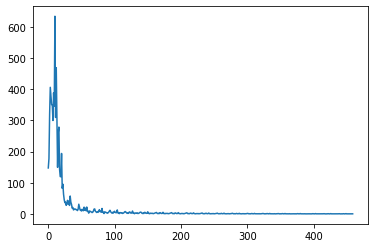

In [36]:
#Evaluation and TensorBoard plots of the optimal model selected in the previous code block

batch_size = 64
hid_size = 50
learning_rate = 0.05
num_epochs = 20
regularization_strength = 0.001
input_size = X_train.shape[1]
output_size = 10

X = tf.placeholder("float32", shape=[None, input_size])
y = tf.placeholder("int32", shape=[None])

W_h = init_weights([input_size, hid_size])
b_h = init_weights([hid_size])
W_o = init_weights([hid_size, output_size])
b_o = init_weights([output_size])
h = tf.nn.sigmoid(tf.matmul(X,W_h)+b_h)
out_act = tf.matmul(h, W_o)+b_o + regularization_strength * tf.nn.l2_loss(W_h) + regularization_strength * tf.nn.l2_loss(W_o)
    
# build the loss, predict, and train operator
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out_act, labels=y)
loss = tf.reduce_sum(cross_entropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

predict = tf.nn.softmax(out_act)

#writer = tf.summary.FileWriter('events_log', sess.graph)
#writer.add_graph(graph=sess.graph)

loss_summ = tf.summary.scalar("cross_entropy_loss", loss)
W_h_summ = tf.summary.histogram("weights", W_h)
b_h_summ = tf.summary.histogram("biases", b_h)

#merge all summaries into a single "operation" which we can execute in a session
merged_summary_op = tf.summary.merge_all()

# Initialization of all variables in the graph
init = tf.global_variables_initializer()

# run training
with tf.Session() as sess: 
    sess.run(init)
    
    # For monitoring purposes
    writer = tf.summary.FileWriter('./events_log', sess.graph)
    
    losses = []
    
    for e in range(num_epochs):
        for i in range(X_train.shape[0] // batch_size):
            idx, idxn = i * batch_size, min(X_train.shape[0]-1, (i+1) * batch_size)
            batch_xs, batch_ys = X_train[idx: idxn], y_train[idx: idxn]            
           
            _,l=sess.run([train_op, loss], feed_dict={X: batch_xs, y: batch_ys})
            
             #create a summary object and set its value
            summary = tf.Summary(value=[tf.Summary.Value(tag="cross_entropy_loss", simple_value=l)])
            writer.add_summary(summary, e * X_train.shape[0] // batch_size + i)
            
            losses.append(l)
            
            predicts_test = sess.run(predict, feed_dict={X: X_test})
            predicts_train = sess.run(predict, feed_dict={X: X_train})
        
            '''
            summary2 = tf.Summary(value=[tf.Summary.Value(tag="train_accuracy", simple_value=accuracy(predicts_train, y_train))])
            writer.add_summary(summary2,e)

            summary3 = tf.Summary(value=[tf.Summary.Value(tag="test_accuracy", simple_value=accuracy(predicts_test))])
            writer.add_summary(summary3,e)
            '''
        print("epoch: %d train accuracy: %0.3f test accuracy: %0.3f" % (e, accuracy(predicts_train, y_train), accuracy(predicts_test)))
        
plt.plot(losses);

writer.flush()
writer.close()